In [1]:
###########################################################################################################

### **1. Declare Imports**

In [2]:
import pandas as pd
import datetime
datetime.datetime.strptime
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [4]:
cd D:\GeorgiaTech\ClassWork\Project3\US_Accidents_Dec19

D:\GeorgiaTech\ClassWork\Project3\US_Accidents_Dec19


In [ ]:
###########################################################################################################

### **2. Load DataFrame from CSV**

In [5]:
mainFile = pd.read_csv("US_Accidents_Dec19.csv")

In [6]:
usAcci = mainFile

In [7]:
feature_lst=["Bump","No_Exit","Junction","City","State","Amenity","Traffic_Calming","Roundabout","Crossing","Stop","Give_Way","Start_Lat","Start_Lng","Traffic_Signal","Severity","TMC","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)","Weather_Condition","Hour","Weekday","Time_Duration(min)","State"]

In [8]:
usAcci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [ ]:
###########################################################################################################

### **3. Add Date Components to DataFrame**

In [9]:
usAcci['Start_Time'] = pd.to_datetime(usAcci['Start_Time'], errors='coerce')
usAcci['End_Time'] = pd.to_datetime(usAcci['End_Time'], errors='coerce')

In [10]:
# Extract year, month, day, hour and weekday
usAcci['Year']=usAcci['Start_Time'].dt.year
usAcci['Month']=usAcci['Start_Time'].dt.strftime('%b')
usAcci['Day']=usAcci['Start_Time'].dt.day
usAcci['Hour']=usAcci['Start_Time'].dt.hour
usAcci['Weekday']=usAcci['Start_Time'].dt.strftime('%a')

In [11]:
td='Time_Duration(min)'
usAcci[td]=round((usAcci['End_Time']-usAcci['Start_Time'])/np.timedelta64(1,'m'))

In [12]:
usAcci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 55 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float

In [ ]:
###########################################################################################################

### **4. Drop Null values**


In [13]:
usAcci = usAcci[feature_lst].dropna()

In [14]:
usAcci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560721 entries, 5 to 2246259
Data columns (total 28 columns):
Bump                  560721 non-null bool
No_Exit               560721 non-null bool
Junction              560721 non-null bool
City                  560721 non-null object
State                 560721 non-null object
Amenity               560721 non-null bool
Traffic_Calming       560721 non-null bool
Roundabout            560721 non-null bool
Crossing              560721 non-null bool
Stop                  560721 non-null bool
Give_Way              560721 non-null bool
Start_Lat             560721 non-null float64
Start_Lng             560721 non-null float64
Traffic_Signal        560721 non-null bool
Severity              560721 non-null int64
TMC                   560721 non-null float64
Temperature(F)        560721 non-null float64
Wind_Chill(F)         560721 non-null float64
Humidity(%)           560721 non-null float64
Pressure(in)          560721 non-null float64
Vi

In [ ]:
###########################################################################################################

### **5. Replace Char values with numbers**

In [15]:
usAcci = usAcci.replace({"State": { 'OH':1,
 'WV'	:	2	,
 'CA'	:	3	,
 'FL'	:	4	,
 'GA'	:	5	,
 'SC'	:	6	,
 'NE'	:	7	,
 'IA'	:	8	,
 'IL'	:	9	,
 'MO'	:	10	,
 'WI'	:	11	,
 'IN'	:	12	,
 'MI'	:	13	,
 'NJ'	:	14	,
 'NY'	:	15	,
 'CT'	:	16	,
 'MA'	:	17	,
 'RI'	:	18	,
 'NH'	:	19	,
 'PA'	:	20	,
 'KY'	:	21	,
 'MD'	:	22	,
 'VA'	:	23	,
 'DC'	:	24	,
 'DE'	:	25	,
 'TX'	:	26	,
 'WA'	:	27	,
 'OR'	:	28	,
 'AL'	:	29	,
 'NC'	:	30	,
 'MN'	:	31	,
 'OK'	:	32	,
 'LA'	:	33	,
 'TN'	:	34	,
 'UT'	:	35	,
 'CO'	:	36	,
 'AZ'	:	37	,
 'NV'	:	38	,
 'KS'	:	39	,
 'MS'	:	40	,
 'NM'	:	41	,
 'ME'	:	42	,
 'AR'	:	43	,
 'WY'	:	44	,
 'VT'	:	45	,
 'ID'	:	46	,
 'ND'	:	47	,
 'MT'	:	48	,
 'SD'	:	49	
}
               })

In [ ]:
###########################################################################################################

In [16]:
usAcci = usAcci.replace({"Weather_Condition": {'Light Rain':1,
	'Overcast'		:	2	,
	'Mostly Cloudy'		:	3	,
	'Rain'		:	4	,
	'Light Snow'		:	5	,
	'Haze'		:	6	,
	'Scattered Clouds'		:	7	,
	'Partly Cloudy'		:	8	,
	'Clear'		:	9	,
	'Snow'		:	10	,
	'Light Freezing Drizzle'		:	11	,
	'Light Drizzle'		:	12	,
	'Fog'		:	13	,
	'Shallow Fog'		:	14	,
	'Heavy Rain'		:	15	,
	'Light Freezing Rain'		:	16	,
	'Cloudy'		:	17	,
	'Drizzle'		:	18	,
	'nan'		:	19	,
	'Light Rain Showers'		:	20	,
	'Mist'		:	21	,
	'Smoke'		:	22	,
	'Patches of Fog'		:	23	,
	'Light Freezing Fog'		:	24	,
	'Light Haze'		:	25	,
	'Light Thunderstorms and Rain'		:	26	,
	'Thunderstorms and Rain'		:	27	,
	'Fair'		:	28	,
	'Volcanic Ash'		:	29	,
	'Blowing Sand'		:	30	,
	'Blowing Dust / Windy'		:	31	,
	'Widespread Dust'		:	32	,
	'Fair / Windy'		:	33	,
	'Rain Showers'		:	34	,
	'Mostly Cloudy / Windy'		:	35	,
	'Light Rain / Windy'		:	36	,
	'Hail'		:	37	,
	'Heavy Drizzle'		:	38	,
	'Showers in the Vicinity'		:	39	,
	'Thunderstorm'		:	40	,
	'Light Rain Shower'		:	41	,
	'Light Rain with Thunder'		:	42	,
	'Partly Cloudy / Windy'		:	43	,
	'Thunder in the Vicinity'		:	44	,
	'T-Storm'		:	45	,
	'Heavy Thunderstorms and Rain'		:	46	,
	'Thunder'		:	47	,
	'Heavy T-Storm'		:	48	,
	'Funnel Cloud'		:	49	,
	'Heavy T-Storm / Windy'		:	50	,
	'Blowing Snow'		:	51	,
	'Light Thunderstorms and Snow'		:	52	,
	'Heavy Snow'		:	53	,
	'Low Drifting Snow'		:	54	,
	'Light Ice Pellets'		:	55	,
	'Ice Pellets'		:	56	,
	'Squalls'		:	57	,
	'N/A Precipitation'		:	58	,
	'Cloudy / Windy'		:	59	,
	'Light Fog'		:	60	,
	'Sand'		:	61	,
	'Snow Grains'		:	62	,
	'Snow Showers'		:	63	,
	'Heavy Thunderstorms and Snow'		:	64	,
	'Rain / Windy'		:	65	,
	'Heavy Rain / Windy'		:	66	,
	'Heavy Ice Pellets'		:	67	,
	'Light Snow / Windy'		:	68	,
	'Heavy Freezing Rain'		:	69	,
	'Small Hail'		:	70	,
	'Heavy Rain Showers'		:	71	,
	'Wintry Mix'		:	72	,
	'Freezing Rain'		:	73	,
	'Snow / Windy'		:	74	,
	'Snow and Sleet'		:	75	,
	'Sleet'		:	76	,
	'Light Drizzle / Windy'		:	77	,
	'Light Freezing Rain / Windy'		:	78	,
	'Light Sleet'		:	79	,
	'Heavy Sleet'		:	80	,
	'Wintry Mix / Windy'		:	81	,
	'Light Snow Shower'		:	82	,
	'Drizzle and Fog'		:	83	,
	'T-Storm / Windy'		:	84	,
	'Heavy Snow / Windy'		:	85	,
	'Fog / Windy'		:	86	,
	'Light Snow and Sleet'		:	87	,
	'Light Snow Grains'		:	88	,
	'Thunder / Windy'		:	89	,
	'Haze / Windy'		:	90	,
	'Sand / Dust Whirlwinds'		:	91	,
	'Blowing Dust'		:	92	,
	'Light Rain Shower / Windy'		:	93	,
	'Squalls / Windy'		:	94	,
	'Drizzle / Windy'		:	95	,
	'Partial Fog / Windy'		:	96	,
	'Light Snow with Thunder'		:	97	,
	'Blowing Snow / Windy'		:	98	,
	'Partial Fog'		:	99	,
	'Rain Shower'		:	100	,
	'Widespread Dust / Windy'		:	101	,
	'Sand / Dust Whirlwinds / Windy'		:	102	,
	'Tornado'		:	103	,
	'Snow and Thunder'		:	104	,
	'Light Snow and Sleet / Windy'		:	105	,
	'Snow and Sleet / Windy'		:	106	,
	'Heavy Snow with Thunder'		:	107	,
	'Thunder / Wintry Mix / Windy'		:	108	,
	'Light Snow Showers'		:	109	,
	'Heavy Blowing Snow'		:	110	,
	'Light Hail'		:	111	,
	'Heavy Smoke'		:	112	,
	'Heavy Thunderstorms with Small Hail'		:	113	,
	'Light Thunderstorm'		:	114	,
	'Heavy Freezing Drizzle'		:	115	,
	'Light Blowing Snow'		:	116	,
	'Thunderstorms and Snow'		:	117	,
	'Smoke / Windy'		:	118	,
	'Freezing Rain / Windy'		:	119	,
	'Dust Whirls'		:	120	,
	'Thunder and Hail / Windy'		:	121	}
                                      }
)

In [ ]:
###########################################################################################################

In [17]:
usAcci = usAcci.replace({"City": {
'Dayton'	:	1	,
'Reynoldsburg'	:	2	,
'Williamsburg'	:	3	,
'Westerville'	:	4	,
'Columbus'	:	5	,
'Miamisburg'	:	6	,
'Johnstown'	:	7	,
'Dublin'	:	8	,
'Canal Winchester'	:	9	,
'Lebanon'	:	10	,
'Sabina'	:	11	,
'Goshen'	:	12	,
'Waynesville'	:	13	,
'Springboro'	:	14	,
'Carroll'	:	15	,
'Oregonia'	:	16	,
'Independence'	:	17	,
'Maple Heights'	:	18	,
'Grove City'	:	19	,
'Findlay'	:	20	,
'Fairborn'	:	21	,
'Piqua'	:	22	,
'New Richmond'	:	23	,
'Batavia'	:	24	,
'Galena'	:	25	,
'Barberton'	:	26	,
'Akron'	:	27	,
'Mansfield'	:	28	,
'Cleveland'	:	29	,
'Bethel'	:	30	,
'Pataskala'	:	31	,
'Seville'	:	32	,
'Bellville'	:	33	,
'Troy'	:	34	,
'Wilmington'	:	35	,
'North Olmsted'	:	36	,
'Groveport'	:	37	,
'Orient'	:	38	,
'Tiro'	:	39	,
'Strongsville'	:	40	,
'Beavercreek'	:	41	,
'Circleville'	:	42	,
'Peebles'	:	43	,
'Hurricane'	:	44	,
'Xenia'	:	45	,
'Elyria'	:	46	,
'Pickerington'	:	47	,
'Burbank'	:	48	,
'Zanesville'	:	49	,
'North Baltimore'	:	50	,
'Mount Sterling'	:	51	,
'Tipp City'	:	52	,
'Moraine'	:	53	,
'Hilliard'	:	54	,
'Bowling Green'	:	55	,
'Maineville'	:	56	,
'Vermilion'	:	57	,
'Milford'	:	58	,
'Brookpark'	:	59	,
'Fraziers Bottom'	:	60	,
'Cambridge'	:	61	,
'Delaware'	:	62	,
'Moscow'	:	63	,
'Oberlin'	:	64	,
'Sardinia'	:	65	,
'Lewis Center'	:	66	,
'Urbancrest'	:	67	,
'Brecksville'	:	68	,
'Frankfort'	:	69	,
'Blanchester'	:	70	,
'Casstown'	:	71	,
'Lima'	:	72	,
'Amelia'	:	73	,
'Newark'	:	74	,
'Springfield'	:	75	,
'Vandalia'	:	76	,
'Galloway'	:	77	,
'Bloomingburg'	:	78	,
'Gallipolis'	:	79	,
'Lockbourne'	:	80	,
'Milan'	:	81	,
'Mason'	:	82	,
'Millersport'	:	83	,
'New Carlisle'	:	84	,
'Sunbury'	:	85	,
'Owensville'	:	86	,
'London'	:	87	,
'Vallejo'	:	88	,
'Hayward'	:	89	,
'Walnut Creek'	:	90	,
'Cupertino'	:	91	,
'San Jose'	:	92	,
'Pleasanton'	:	93	,
'San Francisco'	:	94	,
'Orinda'	:	95	,
'Livermore'	:	96	,
'Cotati'	:	97	,
'Concord'	:	98	,
'Sunnyvale'	:	99	,
'Sacramento'	:	100	,
'Oakland'	:	101	,
'Alviso'	:	102	,
'Morgan Hill'	:	103	,
'Petaluma'	:	104	,
'Martinez'	:	105	,
'Millbrae'	:	106	,
'North Highlands'	:	107	,
'Windsor'	:	108	,
'Alamo'	:	109	,
'San Martin'	:	110	,
'Healdsburg'	:	111	,
'Brisbane'	:	112	,
'Palo Alto'	:	113	,
'Milpitas'	:	114	,
'Davis'	:	115	,
'Elk Grove'	:	116	,
'Half Moon Bay'	:	117	,
'Menlo Park'	:	118	,
'Tracy'	:	119	,
'Carmichael'	:	120	,
'Granite Bay'	:	121	,
'Union City'	:	122	,
'Pleasant Hill'	:	123	,
'San Mateo'	:	124	,
'Rancho Cordova'	:	125	,
'Nevada City'	:	126	,
'Vacaville'	:	127	,
'Roseville'	:	128	,
'Isleton'	:	129	,
'Lincoln'	:	130	,
'El Dorado'	:	131	,
'Corte Madera'	:	132	,
'San Leandro'	:	133	,
'Danville'	:	134	,
'Los Gatos'	:	135	,
'Castro Valley'	:	136	,
'Stockton'	:	137	,
'Willits'	:	138	,
'Santa Rosa'	:	139	,
'Los Altos'	:	140	,
'Richmond'	:	141	,
'Dixon'	:	142	,
'Nice'	:	143	,
'Antioch'	:	144	,
'Angwin'	:	145	,
'Novato'	:	146	,
'Burlingame'	:	147	,
'Sunol'	:	148	,
'Placerville'	:	149	,
'Fairfield'	:	150	,
'Scotts Valley'	:	151	,
'Linden'	:	152	,
'Santa Clara'	:	153	,
'San Pablo'	:	154	,
'Pinole'	:	155	,
'Redwood City'	:	156	,
'Salinas'	:	157	,
'Soquel'	:	158	,
'Monterey'	:	159	,
'Fremont'	:	160	,
'Hercules'	:	161	,
'Seaside'	:	162	,
'Saratoga'	:	163	,
'American Canyon'	:	164	,
'Wilton'	:	165	,
'Pittsburg'	:	166	,
'Grass Valley'	:	167	,
'Santa Cruz'	:	168	,
'Lodi'	:	169	,
'Sonoma'	:	170	,
'Auburn'	:	171	,
'Orangevale'	:	172	,
'Emeryville'	:	173	,
'South San Francisco'	:	174	,
'Lathrop'	:	175	,
'Cameron Park'	:	176	,
'San Bruno'	:	177	,
'Modesto'	:	178	,
'Berkeley'	:	179	,
'Gilroy'	:	180	,
'Escalon'	:	181	,
'Byron'	:	182	,
'Penryn'	:	183	,
'Citrus Heights'	:	184	,
'El Dorado Hills'	:	185	,
'El Cerrito'	:	186	,
'Suisun City'	:	187	,
'Fair Oaks'	:	188	,
'Napa'	:	189	,
'Colfax'	:	190	,
'Rocklin'	:	191	,
'Mather'	:	192	,
'Mill Valley'	:	193	,
'San Carlos'	:	194	,
'Aptos'	:	195	,
'San Ramon'	:	196	,
'Woodland'	:	197	,
'Loomis'	:	198	,
'Folsom'	:	199	,
'Walnut Grove'	:	200	,
'Rodeo'	:	201	,
'San Lorenzo'	:	202	,
'Sausalito'	:	203	,
'Portola Valley'	:	204	,
'Pope Valley'	:	205	,
'Manteca'	:	206	,
'Daly City'	:	207	,
'Mokelumne Hill'	:	208	,
'Occidental'	:	209	,
'Newcastle'	:	210	,
'Guerneville'	:	211	,
'Calistoga'	:	212	,
'Galt'	:	213	,
'Crockett'	:	214	,
'Glen Ellen'	:	215	,
'Rohnert Park'	:	216	,
'Jackson'	:	217	,
'Ripon'	:	218	,
'Lafayette'	:	219	,
'Fulton'	:	220	,
'Sebastopol'	:	221	,
'San Quentin'	:	222	,
'Forestville'	:	223	,
'Hollister'	:	224	,
'West Sacramento'	:	225	,
'Angels Camp'	:	226	,
'Acampo'	:	227	,
'Valley Springs'	:	228	,
'Delhi'	:	229	,
'Shingle Springs'	:	230	,
'Ione'	:	231	,
'Yountville'	:	232	,
'French Camp'	:	233	,
'Meadow Vista'	:	234	,
'Penn Valley'	:	235	,
'San Rafael'	:	236	,
'Herald'	:	237	,
'Castroville'	:	238	,
'Camino'	:	239	,
'The Sea Ranch'	:	240	,
'Ben Lomond'	:	241	,
'Moss Landing'	:	242	,
'Aromas'	:	243	,
'Elverta'	:	244	,
'Soledad'	:	245	,
'Yuba City'	:	246	,
'Dos Palos'	:	247	,
'Salida'	:	248	,
'Lucerne'	:	249	,
'Antelope'	:	250	,
'Rio Linda'	:	251	,
'Benicia'	:	252	,
'Lower Lake'	:	253	,
'Winters'	:	254	,
'Oakdale'	:	255	,
'Turlock'	:	256	,
'Belmont'	:	257	,
'Boulder Creek'	:	258	,
'Carmel'	:	259	,
'Mountain View'	:	260	,
'Royal Oaks'	:	261	,
'Foresthill'	:	262	,
'Mendota'	:	263	,
'Keyes'	:	264	,
'Firebaugh'	:	265	,
'Monte Rio'	:	266	,
'Campbell'	:	267	,
'Larkspur'	:	268	,
'Nicasio'	:	269	,
'Bodega Bay'	:	270	,
'Brentwood'	:	271	,
'San Gregorio'	:	272	,
'El Sobrante'	:	273	,
'Travis Afb'	:	274	,
'Newman'	:	275	,
'Kelseyville'	:	276	,
'Carmel Valley'	:	277	,
'Meridian'	:	278	,
'Capitola'	:	279	,
'Lakeport'	:	280	,
'Rumsey'	:	281	,
'Middletown'	:	282	,
'Georgetown'	:	283	,
'Biggs'	:	284	,
'Waterford'	:	285	,
'Nicolaus'	:	286	,
'Gonzales'	:	287	,
'Greenbrae'	:	288	,
'Patterson'	:	289	,
'Rio Vista'	:	290	,
'Dunnigan'	:	291	,
'Copperopolis'	:	292	,
'Alta'	:	293	,
'Willows'	:	294	,
'Marysville'	:	295	,
'Winton'	:	296	,
'Hilmar'	:	297	,
'Ukiah'	:	298	,
'Penngrove'	:	299	,
'Clarksburg'	:	300	,
'Esparto'	:	301	,
'McClellan'	:	302	,
'Garden Valley'	:	303	,
'Oroville'	:	304	,
'Pacifica'	:	305	,
'Los Banos'	:	306	,
'La Grange'	:	307	,
'Arbuckle'	:	308	,
'San Juan Bautista'	:	309	,
'Geyserville'	:	310	,
'Jenner'	:	311	,
'Stanford'	:	312	,
'Oregon House'	:	313	,
'San Andreas'	:	314	,
'Dobbins'	:	315	,
'Brooks'	:	316	,
'Sloughhouse'	:	317	,
'Pollock Pines'	:	318	,
'Hopland'	:	319	,
'Discovery Bay'	:	320	,
'Ceres'	:	321	,
'Bay Point'	:	322	,
'Rescue'	:	323	,
'Mcclellan'	:	324	,
'Little River'	:	325	,
'Watsonville'	:	326	,
'Emerald Hills'	:	327	,
'Diamond Springs'	:	328	,
'Felton'	:	329	,
'Cool'	:	330	,
'Pine Grove'	:	331	,
'Upper Lake'	:	332	,
'Clearlake Oaks'	:	333	,
'Woodside'	:	334	,
'Atwater'	:	335	,
'Sutter Creek'	:	336	,
'Lockeford'	:	337	,
'Coyote'	:	338	,
'Pescadero'	:	339	,
'La Honda'	:	340	,
'Pioneer'	:	341	,
'Lotus'	:	342	,
'Gustine'	:	343	,
'Ballico'	:	344	,
'Cloverdale'	:	345	,
'Fairfax'	:	346	,
'Plymouth'	:	347	,
'Port Costa'	:	348	,
'Smartsville'	:	349	,
'Saint Helena'	:	350	,
'Mount Hamilton'	:	351	,
'North San Juan'	:	352	,
'Courtland'	:	353	,
'Monte Sereno'	:	354	,
'Applegate'	:	355	,
'Freedom'	:	356	,
'Mountain Ranch'	:	357	,
'Merced'	:	358	,
'Clearlake'	:	359	,
'Graton'	:	360	,
'Pacheco'	:	361	,
'Maxwell'	:	362	,
'Kentfield'	:	363	,
'Stevinson'	:	364	,
'Somerset'	:	365	,
'Capay'	:	366	,
'Hughson'	:	367	,
'Yorkville'	:	368	,
'Clayton'	:	369	,
'Crows Landing'	:	370	,
'Belvedere Tiburon'	:	371	,
'Farmington'	:	372	,
'Rough and Ready'	:	373	,
'Zamora'	:	374	,
'Gualala'	:	375	,
'Marina'	:	376	,
'Emigrant Gap'	:	377	,
'Rough And Ready'	:	378	,
'Point Reyes Station'	:	379	,
'Southeast Marin'	:	380	,
'Soda Springs'	:	381	,
'Moss Beach'	:	382	,
'Vernalis'	:	383	,
'Redwood Valley'	:	384	,
'Pebble Beach'	:	385	,
'Williams'	:	386	,
'Dutch Flat'	:	387	,
'Paicines'	:	388	,
'Oakley'	:	389	,
'Browns Valley'	:	390	,
'Sutter'	:	391	,
'Gold River'	:	392	,
'Downieville'	:	393	,
'Fort Bragg'	:	394	,
'Birds Landing'	:	395	,
'Fiddletown'	:	396	,
'Annapolis'	:	397	,
'Rancho Murieta'	:	398	,
'Big Sur'	:	399	,
'Muir Beach'	:	400	,
'Norden'	:	401	,
'Sierra City'	:	402	,
'Livingston'	:	403	,
'Jamestown'	:	404	,
'Gridley'	:	405	,
'Pleasant Grove'	:	406	,
'Davenport'	:	407	,
'Bodega'	:	408	,
'Sheridan'	:	409	,
'Alameda'	:	410	,
'Gold Run'	:	411	,
'Olivehurst'	:	412	,
'Denair'	:	413	,
'Colusa'	:	414	,
'Marshall'	:	415	,
'Valley Ford'	:	416	,
'Volcano'	:	417	,
'Kenwood'	:	418	,
'Potter Valley'	:	419	,
'Comptche'	:	420	,
'Cazadero'	:	421	,
'Camptonville'	:	422	,
'Wheatland'	:	423	,
'Challenge'	:	424	,
'Pilot Hill'	:	425	,
'Chualar'	:	426	,
'Grizzly Flats'	:	427	,
'Stonyford'	:	428	,
'Mendocino'	:	429	,
'Princeton'	:	430	,
'Woodbridge'	:	431	,
'Butte City'	:	432	,
'Bolinas'	:	433	,
'Madison'	:	434	,
'Tomales'	:	435	,
'Glenhaven'	:	436	,
'Palermo'	:	437	,
'Woodacre'	:	438	,
'Montara'	:	439	,
'Inverness'	:	440	,
'Greenwood'	:	441	,
'Glenn'	:	442	,
'Albion'	:	443	,
'Hickman'	:	444	,
'Atherton'	:	445	,
'Albany'	:	446	,
'Dillon Beach'	:	447	,
'East Palo Alto'	:	448	,
'Knights Landing'	:	449	,
'West Point'	:	450	,
'Cobb'	:	451	,
'El Macero'	:	452	,
'Guinda'	:	453	,
'West Contra Costa'	:	454	,
'Hillsborough'	:	455	,
'San Anselmo'	:	456	,
'Diablo'	:	457	,
'Foster City'	:	458	,
'Berry Creek'	:	459	,
'Santa Barbara'	:	460	,
'Ventura'	:	461	,
'Simi Valley'	:	462	,
'Sylmar'	:	463	,
'North Hollywood'	:	464	,
'Los Angeles'	:	465	,
'La Canada Flintridge'	:	466	,
'South El Monte'	:	467	,
'La Puente'	:	468	,
'Orange'	:	469	,
'Santa Ana'	:	470	,
'Pomona'	:	471	,
'Riverside'	:	472	,
'Vista'	:	473	,
'Temecula'	:	474	,
'Running Springs'	:	475	,
'Newhall'	:	476	,
'Inglewood'	:	477	,
'Downey'	:	478	,
'San Diego'	:	479	,
'Escondido'	:	480	,
'Mentone'	:	481	,
'Ontario'	:	482	,
'Fontana'	:	483	,
'Colton'	:	484	,
'Redlands'	:	485	,
'Moreno Valley'	:	486	,
'Spring Valley'	:	487	,
'Sun Valley'	:	488	,
'Cerritos'	:	489	,
'Anaheim'	:	490	,
'Tustin'	:	491	,
'Highland'	:	492	,
'Santee'	:	493	,
'Buena Park'	:	494	,
'Sherman Oaks'	:	495	,
'Torrance'	:	496	,
'Long Beach'	:	497	,
'Montebello'	:	498	,
'Norwalk'	:	499	,
'Pacoima'	:	500	,
'Pasadena'	:	501	,
'La Jolla'	:	502	,
'Oxnard'	:	503	,
'Chino'	:	504	,
'Irvine'	:	505	,
'Diamond Bar'	:	506	,
'Hacienda Heights'	:	507	,
'El Monte'	:	508	,
'Hemet'	:	509	,
'Calabasas'	:	510	,
'Glendale'	:	511	,
'Compton'	:	512	,
'Lynwood'	:	513	,
'Van Nuys'	:	514	,
'Mira Loma'	:	515	,
'Encinitas'	:	516	,
'Pala'	:	517	,
'Valencia'	:	518	,
'Corona'	:	519	,
'Carlsbad'	:	520	,
'Commerce'	:	521	,
'Carson'	:	522	,
'Valley Village'	:	523	,
'Gardena'	:	524	,
'Whittier'	:	525	,
'Oceanside'	:	526	,
'Perris'	:	527	,
'Hesperia'	:	528	,
'Lawndale'	:	529	,
'Fullerton'	:	530	,
'Lake Elsinore'	:	531	,
'Santa Fe Springs'	:	532	,
'Canyon Country'	:	533	,
'El Cajon'	:	534	,
'Stevenson Ranch'	:	535	,
'Valley Center'	:	536	,
'Culver City'	:	537	,
'San Pedro'	:	538	,
'San Bernardino'	:	539	,
'National City'	:	540	,
'Camarillo'	:	541	,
'San Ysidro'	:	542	,
'Covina'	:	543	,
'Bloomington'	:	544	,
'Baldwin Park'	:	545	,
'Rialto'	:	546	,
'Alhambra'	:	547	,
'Rosemead'	:	548	,
'Brea'	:	549	,
'Porter Ranch'	:	550	,
'Westminster'	:	551	,
'Acton'	:	552	,
'Newbury Park'	:	553	,
'Walnut'	:	554	,
'Mission Viejo'	:	555	,
'Altadena'	:	556	,
'Forest Falls'	:	557	,
'Rowland Heights'	:	558	,
'Arcadia'	:	559	,
'Menifee'	:	560	,
'Chula Vista'	:	561	,
'Landers'	:	562	,
'Moorpark'	:	563	,
'Santa Monica'	:	564	,
'Murrieta'	:	565	,
'La Crescenta'	:	566	,
'Encino'	:	567	,
'Topanga'	:	568	,
'March Air Reserve Base'	:	569	,
'Harbor City'	:	570	,
'Upland'	:	571	,
'Yorba Linda'	:	572	,
'Solana Beach'	:	573	,
'Alpine'	:	574	,
'Montclair'	:	575	,
'Santa Clarita'	:	576	,
'Santa Ysabel'	:	577	,
'Seal Beach'	:	578	,
'La Mesa'	:	579	,
'Big Bear City'	:	580	,
'Westlake Village'	:	581	,
'Tarzana'	:	582	,
'South Pasadena'	:	583	,
'Grand Terrace'	:	584	,
'Huntington Beach'	:	585	,
'Mission Hills'	:	586	,
'San Fernando'	:	587	,
'Hawthorne'	:	588	,
'Bellflower'	:	589	,
'Lake Arrowhead'	:	590	,
'Ramona'	:	591	,
'Studio City'	:	592	,
'Beaumont'	:	593	,
'Garden Grove'	:	594	,
'Rancho Cucamonga'	:	595	,
'Julian'	:	596	,
'Glendora'	:	597	,
'San Gabriel'	:	598	,
'Paramount'	:	599	,
'City Of Industry'	:	600	,
'San Marcos'	:	601	,
'Azusa'	:	602	,
'San Dimas'	:	603	,
'South Gate'	:	604	,
'Huntington Park'	:	605	,
'Oak Park'	:	606	,
'Marina Del Rey'	:	607	,
'North Hills'	:	608	,
'Cardiff By the Sea'	:	609	,
'Woodland Hills'	:	610	,
'Monterey Park'	:	611	,
'Pacific Palisades'	:	612	,
'Fallbrook'	:	613	,
'Calimesa'	:	614	,
'Victorville'	:	615	,
'Placentia'	:	616	,
'Bonsall'	:	617	,
'San Clemente'	:	618	,
'Fountain Valley'	:	619	,
'Granada Hills'	:	620	,
'West Covina'	:	621	,
'Del Mar'	:	622	,
'Thousand Palms'	:	623	,
'Banning'	:	624	,
'Pico Rivera'	:	625	,
'Monrovia'	:	626	,
'Costa Mesa'	:	627	,
'San Juan Capistrano'	:	628	,
'San Jacinto'	:	629	,
'Homeland'	:	630	,
'La Mirada'	:	631	,
'Bell Gardens'	:	632	,
'Norco'	:	633	,
'Artesia'	:	634	,
'Littlerock'	:	635	,
'Chatsworth'	:	636	,
'Laguna Hills'	:	637	,
'Agoura Hills'	:	638	,
'Pauma Valley'	:	639	,
'Desert Hot Springs'	:	640	,
'Indio'	:	641	,
'Duarte'	:	642	,
'Stanton'	:	643	,
'Ojai'	:	644	,
'Winchester'	:	645	,
'Castaic'	:	646	,
'Silverado'	:	647	,
'Rancho Santa Fe'	:	648	,
'Lakeside'	:	649	,
'Coronado'	:	650	,
'Potrero'	:	651	,
'Ladera Ranch'	:	652	,
'Fillmore'	:	653	,
'Marina del Rey'	:	654	,
'Palm Springs'	:	655	,
'Foothill Ranch'	:	656	,
'Descanso'	:	657	,
'Pine Valley'	:	658	,
'Cabazon'	:	659	,
'North Palm Springs'	:	660	,
'Camp Pendleton'	:	661	,
'Toluca Lake'	:	662	,
'Palmdale'	:	663	,
'Loma Linda'	:	664	,
'Carpinteria'	:	665	,
'Cathedral City'	:	666	,
'La Verne'	:	667	,
'Valyermo'	:	668	,
'Aguanga'	:	669	,
'Bonita'	:	670	,
'Newport Beach'	:	671	,
'Wildomar'	:	672	,
'Lemon Grove'	:	673	,
'Malibu'	:	674	,
'Lucerne Valley'	:	675	,
'Phelan'	:	676	,
'Laguna Niguel'	:	677	,
'Nuevo'	:	678	,
'Trabuco Canyon'	:	679	,
'Palm Desert'	:	680	,
'View Park'	:	681	,
'Lakewood'	:	682	,
'Boulevard'	:	683	,
'Mountain Center'	:	684	,
'Goleta'	:	685	,
'Idyllwild'	:	686	,
'Twin Peaks'	:	687	,
'Santa Paula'	:	688	,
'Rimforest'	:	689	,
'La Palma'	:	690	,
'Winnetka'	:	691	,
'Vernon'	:	692	,
'La Habra'	:	693	,
'Signal Hill'	:	694	,
'Claremont'	:	695	,
'Sun City'	:	696	,
'Montrose'	:	697	,
'Wrightwood'	:	698	,
'Sunland'	:	699	,
'Yucaipa'	:	700	,
'Chino Hills'	:	701	,
'Jamul'	:	702	,
'El Segundo'	:	703	,
'Crestline'	:	704	,
'Rolling Hills Estates'	:	705	,
'Tujunga'	:	706	,
'Thousand Oaks'	:	707	,
'Pinon Hills'	:	708	,
'Llano'	:	709	,
'Campo'	:	710	,
'Capistrano Beach'	:	711	,
'Anza'	:	712	,
'Rancho Dominguez'	:	713	,
'Canoga Park'	:	714	,
'Los Alamitos'	:	715	,
'Oak Hills'	:	716	,
'Venice'	:	717	,
'Lake Forest'	:	718	,
'Cedar Glen'	:	719	,
'Laguna Beach'	:	720	,
'Aliso Viejo'	:	721	,
'Santa Rosa Valley'	:	722	,
'Angelus Oaks'	:	723	,
'Joshua Tree'	:	724	,
'Somis'	:	725	,
'Midway City'	:	726	,
'San Marino'	:	727	,
'Playa del Rey'	:	728	,
'Temple City'	:	729	,
'Ranchita'	:	730	,
'Sugarloaf'	:	731	,
'Maywood'	:	732	,
'La Habra Heights'	:	733	,
'Corona del Mar'	:	734	,
'Oak View'	:	735	,
'Apple Valley'	:	736	,
'Redondo Beach'	:	737	,
'Hawaiian Gardens'	:	738	,
'Yucca Valley'	:	739	,
'Whitewater'	:	740	,
'Blue Jay'	:	741	,
'Skyforest'	:	742	,
'Dulzura'	:	743	,
'Irwindale'	:	744	,
'Palos Verdes Peninsula'	:	745	,
'Morongo Valley'	:	746	,
'Windsor Hills'	:	747	,
'Point Mugu Nawc'	:	748	,
'Universal City'	:	749	,
'Poway'	:	750	,
'Bell'	:	751	,
'Bermuda Dunes'	:	752	,
'West Hollywood'	:	753	,
'Lompoc'	:	754	,
'Borrego Springs'	:	755	,
'Warner Springs'	:	756	,
'Mt Baldy'	:	757	,
'Cedarpines Park'	:	758	,
'Tecate'	:	759	,
'Newport Coast'	:	760	,
'Northridge'	:	761	,
'Cherry Valley'	:	762	,
'Rancho Santa Margarita'	:	763	,
'Rancho Mirage'	:	764	,
'Pearblossom'	:	765	,
'Big Bear Lake'	:	766	,
'Panorama City'	:	767	,
'Summerland'	:	768	,
'Playa Del Rey'	:	769	,
'Bell Canyon'	:	770	,
'Arleta'	:	771	,
'Cypress'	:	772	,
'Dana Point'	:	773	,
'Beverly Hills'	:	774	,
'Rancho Palos Verdes'	:	775	,
'Port Hueneme'	:	776	,
'Reseda'	:	777	,
'La Quinta'	:	778	,
'Adelanto'	:	779	,
'Piru'	:	780	,
'Hidden Hills'	:	781	,
'Lytle Creek'	:	782	,
'West Hills'	:	783	,
'nan'	:	784	,
'Sunset Beach'	:	785	,
'Imperial Beach'	:	786	,
'Manhattan Beach'	:	787	,
'Indian Wells'	:	788	,
'Cudahy'	:	789	,
'Lomita'	:	790	,
'Villa Park'	:	791	,
'Lake Sherwood'	:	792	,
'Tampa'	:	793	,
'Miami'	:	794	,
'Hialeah'	:	795	,
'Pompano Beach'	:	796	,
'Orlando'	:	797	,
'Palm Coast'	:	798	,
'Miami Beach'	:	799	,
'West Palm Beach'	:	800	,
'Clearwater'	:	801	,
'Lake Worth'	:	802	,
'Bradenton'	:	803	,
'Winter Park'	:	804	,
'Palm Bay'	:	805	,
'Merritt Island'	:	806	,
'Pinellas Park'	:	807	,
'Saint Petersburg'	:	808	,
'Fort Myers'	:	809	,
'Boca Raton'	:	810	,
'Hollywood'	:	811	,
'Palmetto'	:	812	,
'Fort Lauderdale'	:	813	,
'Boynton Beach'	:	814	,
'Christmas'	:	815	,
'Fellsmere'	:	816	,
'Port Saint Lucie'	:	817	,
'Sarasota'	:	818	,
'Vero Beach'	:	819	,
'Wesley Chapel'	:	820	,
'Titusville'	:	821	,
'Plant City'	:	822	,
'Windermere'	:	823	,
'Gibsonton'	:	824	,
'Cape Coral'	:	825	,
'Port Richey'	:	826	,
'New Port Richey'	:	827	,
'Debary'	:	828	,
'Melbourne'	:	829	,
'Spring Hill'	:	830	,
'Opa Locka'	:	831	,
'Howey in the Hills'	:	832	,
'North Fort Myers'	:	833	,
'Brooksville'	:	834	,
'Lutz'	:	835	,
'Tarpon Springs'	:	836	,
'Palm Harbor'	:	837	,
'Hallandale'	:	838	,
'Lakewood Ranch'	:	839	,
'Bonita Springs'	:	840	,
'Seffner'	:	841	,
'Lakeland'	:	842	,
'Odessa'	:	843	,
'Micanopy'	:	844	,
'Sun City Center'	:	845	,
'Groveland'	:	846	,
'Kissimmee'	:	847	,
'Estero'	:	848	,
'Labelle'	:	849	,
'Land O Lakes'	:	850	,
'Lehigh Acres'	:	851	,
'Palm Beach Gardens'	:	852	,
'Coral Gables'	:	853	,
'Okahumpka'	:	854	,
'Delray Beach'	:	855	,
'Maitland'	:	856	,
'Miami Gardens'	:	857	,
'North Port'	:	858	,
'Deerfield Beach'	:	859	,
'San Antonio'	:	860	,
'Naples'	:	861	,
'Zephyrhills'	:	862	,
'Riverview'	:	863	,
'Dunedin'	:	864	,
'Davie'	:	865	,
'Saint Cloud'	:	866	,
'Seminole'	:	867	,
'Oldsmar'	:	868	,
'Dade City'	:	869	,
'Apollo Beach'	:	870	,
'St Pete Beach'	:	871	,
'Homestead'	:	872	,
'Osprey'	:	873	,
'Wildwood'	:	874	,
'Minneola'	:	875	,
'Rockledge'	:	876	,
'Bunnell'	:	877	,
'Lantana'	:	878	,
'Ochopee'	:	879	,
'Ellenton'	:	880	,
'Parrish'	:	881	,
'Sanford'	:	882	,
'Fort Pierce'	:	883	,
'Mims'	:	884	,
'Saint James City'	:	885	,
'Stuart'	:	886	,
'Largo'	:	887	,
'Winter Garden'	:	888	,
'Zolfo Springs'	:	889	,
'Hudson'	:	890	,
'Deltona'	:	891	,
'Eustis'	:	892	,
'Tavares'	:	893	,
'Apopka'	:	894	,
'Pomona Park'	:	895	,
'Punta Gorda'	:	896	,
'Osteen'	:	897	,
'Sebastian'	:	898	,
'Holiday'	:	899	,
'Altamonte Springs'	:	900	,
'Orange City'	:	901	,
'Leesburg'	:	902	,
'Deland'	:	903	,
'Rocky Point'	:	904	,
'Sorrento'	:	905	,
'Longwood'	:	906	,
'Homosassa'	:	907	,
'Brandon'	:	908	,
'Ocala'	:	909	,
'Bushnell'	:	910	,
'Clermont'	:	911	,
'Gotha'	:	912	,
'Cocoa'	:	913	,
'Immokalee'	:	914	,
'Ormond Beach'	:	915	,
'Safety Harbor'	:	916	,
'Hernando Beach'	:	917	,
'Daytona Beach'	:	918	,
'Sebring'	:	919	,
'Englewood'	:	920	,
'Port Charlotte'	:	921	,
'Myakka City'	:	922	,
'Nokomis'	:	923	,
'Dania'	:	924	,
'Wimauma'	:	925	,
'Oviedo'	:	926	,
'Lake Mary'	:	927	,
'Thonotosassa'	:	928	,
'Alva'	:	929	,
'Polk City'	:	930	,
'Conservation'	:	931	,
'Valrico'	:	932	,
'Moore Haven'	:	933	,
'Ocoee'	:	934	,
'New Smyrna Beach'	:	935	,
'Lake Wales'	:	936	,
'Okeechobee'	:	937	,
'Miramar'	:	938	,
'Jupiter'	:	939	,
'Palm City'	:	940	,
'Satsuma'	:	941	,
'Bartow'	:	942	,
'Belleair'	:	943	,
'Haines City'	:	944	,
'Lecanto'	:	945	,
'Pembroke Pines'	:	946	,
'Lady Lake'	:	947	,
'Dover'	:	948	,
'Indialantic'	:	949	,
'Miami Lakes'	:	950	,
'Lake Placid'	:	951	,
'Sidell'	:	952	,
'Sumterville'	:	953	,
'Cape Canaveral'	:	954	,
'Auburndale'	:	955	,
'Mount Dora'	:	956	,
'Hallandale Beach'	:	957	,
'Oxford'	:	958	,
'Weeki Wachee'	:	959	,
'Ruskin'	:	960	,
'The Villages'	:	961	,
'Grant'	:	962	,
'Clewiston'	:	963	,
'Wauchula'	:	964	,
'Port Orange'	:	965	,
'Crystal River'	:	966	,
'Flagler Beach'	:	967	,
'Casselberry'	:	968	,
'Sunrise'	:	969	,
'Lake Alfred'	:	970	,
'Frostproof'	:	971	,
'Fort Meade'	:	972	,
'Altoona'	:	973	,
'Palmetto Bay'	:	974	,
'Umatilla'	:	975	,
'Crescent City'	:	976	,
'Winter Springs'	:	977	,
'Reddick'	:	978	,
'Bradenton Beach'	:	979	,
'Venus'	:	980	,
'Plantation'	:	981	,
'Fort Myers Beach'	:	982	,
'Jensen Beach'	:	983	,
'Interlachen'	:	984	,
'North Miami Beach'	:	985	,
'Avon Park'	:	986	,
'Clearwater Beach'	:	987	,
'Belleair Beach'	:	988	,
'Anna Maria'	:	989	,
'Hobe Sound'	:	990	,
'West Miami'	:	991	,
'Kenneth City'	:	992	,
'University Park'	:	993	,
'Coral Springs'	:	994	,
'Hernando'	:	995	,
'Webster'	:	996	,
'Dunnellon'	:	997	,
'Belle Isle'	:	998	,
'Malabar'	:	999	,
'Pierson'	:	1000	,
'Silver Springs'	:	1001	,
'Winter Haven'	:	1002	,
'Gainesville'	:	1003	,
'Floral City'	:	1004	,
'Oak Hill'	:	1005	,
'Center Hill'	:	1006	,
'De Leon Springs'	:	1007	,
'Loxahatchee'	:	1008	,
'Edgewater'	:	1009	,
'Surfside'	:	1010	,
'Margate'	:	1011	,
'Longboat Key'	:	1012	,
'Gulfport'	:	1013	,
'Williston'	:	1014	,
'Treasure Island'	:	1015	,
'Geneva'	:	1016	,
'Zellwood'	:	1017	,
'Fruitland Park'	:	1018	,
'Satellite Beach'	:	1019	,
'Mulberry'	:	1020	,
'Ona'	:	1021	,
'Royal Palm Beach'	:	1022	,
'Palatka'	:	1023	,
'Belleair Bluffs'	:	1024	,
'Medley'	:	1025	,
'Belleview'	:	1026	,
'Summerfield'	:	1027	,
'North Venice'	:	1028	,
'Patrick AFB'	:	1029	,
'Madeira Beach'	:	1030	,
'Cutler Bay'	:	1031	,
'Matlacha'	:	1032	,
'Chuluota'	:	1033	,
'Cocoa Beach'	:	1034	,
'Key Biscayne'	:	1035	,
'Citra'	:	1036	,
'Crystal Beach'	:	1037	,
'Lauderdale Lakes'	:	1038	,
'Doral'	:	1039	,
'Miami Shores'	:	1040	,
'Reunion'	:	1041	,
'Pahokee'	:	1042	,
'Melbourne Beach'	:	1043	,
'Sunny Isles Beach'	:	1044	,
'Duette'	:	1045	,
'Lake Helen'	:	1046	,
'North Miami'	:	1047	,
'Oakland Park'	:	1048	,
'South Miami'	:	1049	,
'Wellington'	:	1050	,
'Mascotte'	:	1051	,
'Kenansville'	:	1052	,
'Lithia'	:	1053	,
'Astor'	:	1054	,
'Arcadia West'	:	1055	,
'Montverde'	:	1056	,
'Grand Island'	:	1057	,
'St. Petersburg'	:	1058	,
'Cocoa Beach-Cape Canaveral'	:	1059	,
'Bokeelia'	:	1060	,
'Cocoa-Rockledge'	:	1061	,
'Weston'	:	1062	,
'Kathleen'	:	1063	,
'Champions Gate'	:	1064	,
'Cortez'	:	1065	,
'Coconut Creek'	:	1066	,
'Lake Panasoffkee'	:	1067	,
'Coral Springs-Margate'	:	1068	,
'Captiva'	:	1069	,
'Paisley'	:	1070	,
'Indian Rocks Beach'	:	1071	,
'Yalaha'	:	1072	,
'Trinity'	:	1073	,
'Tamarac'	:	1074	,
'Indiantown'	:	1075	,
'Fern Park'	:	1076	,
'North Lauderdale'	:	1077	,
'Everglades City'	:	1078	,
'Astatula'	:	1079	,
'Anthony'	:	1080	,
'Weirsdale'	:	1081	,
'Fairburn'	:	1082	,
'Atlanta'	:	1083	,
'Ellenwood'	:	1084	,
'Decatur'	:	1085	,
'Tucker'	:	1086	,
'Lawrenceville'	:	1087	,
'Iva'	:	1088	,
'Augusta'	:	1089	,
'Peachtree City'	:	1090	,
'Duluth'	:	1091	,
'Newberry'	:	1092	,
'Beech Island'	:	1093	,
'Ridge Spring'	:	1094	,
'Ware Shoals'	:	1095	,
'North Augusta'	:	1096	,
'Aiken'	:	1097	,
'Grantville'	:	1098	,
'Hephzibah'	:	1099	,
'Graniteville'	:	1100	,
'Clinton'	:	1101	,
'Waterloo'	:	1102	,
'Marietta'	:	1103	,
'Dacula'	:	1104	,
'Stockbridge'	:	1105	,
'Alpharetta'	:	1106	,
'Canton'	:	1107	,
'Smyrna'	:	1108	,
'Kennesaw'	:	1109	,
'Anderson'	:	1110	,
'Social Circle'	:	1111	,
'Woodstock'	:	1112	,
'Norcross'	:	1113	,
'Powder Springs'	:	1114	,
'Cumming'	:	1115	,
'Buford'	:	1116	,
'Sumner'	:	1117	,
'Fayetteville'	:	1118	,
'Kinards'	:	1119	,
'Coleman'	:	1120	,
'Forest Park'	:	1121	,
'Stone Mountain'	:	1122	,
'Austell'	:	1123	,
'Newnan'	:	1124	,
'Forsyth'	:	1125	,
'Molena'	:	1126	,
'Donalds'	:	1127	,
'Tifton'	:	1128	,
'Leesville'	:	1129	,
'Fort Valley'	:	1130	,
'Winder'	:	1131	,
'Saluda'	:	1132	,
'Clarkston'	:	1133	,
'Jefferson'	:	1134	,
'Milledgeville'	:	1135	,
'Gray'	:	1136	,
'Batesburg'	:	1137	,
'McDonough'	:	1138	,
'Lavonia'	:	1139	,
'Villa Rica'	:	1140	,
'Temple'	:	1141	,
'Prosperity'	:	1142	,
'Cartersville'	:	1143	,
'Adairsville'	:	1144	,
'Macon'	:	1145	,
'Conyers'	:	1146	,
'Covington'	:	1147	,
'Roswell'	:	1148	,
'Lithonia'	:	1149	,
'Harlem'	:	1150	,
'Belton'	:	1151	,
'Lithia Springs'	:	1152	,
'Perry'	:	1153	,
'Monetta'	:	1154	,
'Washington'	:	1155	,
'Hodges'	:	1156	,
'Pine Mountain'	:	1157	,
'Brooklet'	:	1158	,
'Greensboro'	:	1159	,
'Hawkinsville'	:	1160	,
'Laurens'	:	1161	,
'Brookhaven'	:	1162	,
'Snellville'	:	1163	,
'Starr'	:	1164	,
'Mc Cormick'	:	1165	,
'Ninety Six'	:	1166	,
'Pembroke'	:	1167	,
'Due West'	:	1168	,
'Pomaria'	:	1169	,
'Acworth'	:	1170	,
'Braselton'	:	1171	,
'Hoschton'	:	1172	,
'Flowery Branch'	:	1173	,
'Oakwood'	:	1174	,
'Abbeville'	:	1175	,
'Mountville'	:	1176	,
'Suwanee'	:	1177	,
'Douglasville'	:	1178	,
'Glennville'	:	1179	,
'New Ellenton'	:	1180	,
'Edgefield'	:	1181	,
'Mableton'	:	1182	,
'Warner Robins'	:	1183	,
'Jonesboro'	:	1184	,
'Riverdale'	:	1185	,
'Warrenville'	:	1186	,
'Aragon'	:	1187	,
'Fair Play'	:	1188	,
'Poulan'	:	1189	,
'Statesboro'	:	1190	,
'Peachtree Corners'	:	1191	,
'Modoc'	:	1192	,
'Morrow'	:	1193	,
'Jasper'	:	1194	,
'Athens'	:	1195	,
'Grovetown'	:	1196	,
'Rutledge'	:	1197	,
'Ward'	:	1198	,
'Wagener'	:	1199	,
'Good Hope'	:	1200	,
'Lilburn'	:	1201	,
'Locust Grove'	:	1202	,
'Cordele'	:	1203	,
'Calhoun Falls'	:	1204	,
'Alapaha'	:	1205	,
'Hiram'	:	1206	,
'Summerville'	:	1207	,
'Cornelia'	:	1208	,
'Carrollton'	:	1209	,
'Bogart'	:	1210	,
'Mount Carmel'	:	1211	,
'Chula'	:	1212	,
'White'	:	1213	,
'Johnston'	:	1214	,
'Rome'	:	1215	,
'Honea Path'	:	1216	,
'Vienna'	:	1217	,
'Conley'	:	1218	,
'Lexington'	:	1219	,
'Bradley'	:	1220	,
'Dallas'	:	1221	,
'Monroe'	:	1222	,
'Silver Creek'	:	1223	,
'Franklin'	:	1224	,
'Homer'	:	1225	,
'Trenton'	:	1226	,
'Flovilla'	:	1227	,
'Calhoun'	:	1228	,
'Grayson'	:	1229	,
'Chappells'	:	1230	,
'Cross Hill'	:	1231	,
'Senoia'	:	1232	,
'Winston'	:	1233	,
'Griffin'	:	1234	,
'Sylvester'	:	1235	,
'LaGrange'	:	1236	,
'Lyons'	:	1237	,
'Dry Branch'	:	1238	,
'Gloverville'	:	1239	,
'Maysville'	:	1240	,
'Cuthbert'	:	1241	,
'Sugar Hill'	:	1242	,
'Rex'	:	1243	,
'Joanna'	:	1244	,
'Clarks Hill'	:	1245	,
'Alto'	:	1246	,
'Bonaire'	:	1247	,
'Silverstreet'	:	1248	,
'Unadilla'	:	1249	,
'Fort Stewart'	:	1250	,
'Plum Branch'	:	1251	,
'Moreland'	:	1252	,
'Cochran'	:	1253	,
'Rockmart'	:	1254	,
'Soperton'	:	1255	,
'Loganville'	:	1256	,
'Swainsboro'	:	1257	,
'Juliette'	:	1258	,
'Barnwell'	:	1259	,
'Pitts'	:	1260	,
'Dawsonville'	:	1261	,
'Norwood'	:	1262	,
'Parrott'	:	1263	,
'Warrenton'	:	1264	,
'Woodbury'	:	1265	,
'Carnesville'	:	1266	,
'Hampton'	:	1267	,
'Mcdonough'	:	1268	,
'Lumpkin'	:	1269	,
'Barnesville'	:	1270	,
'Buckhead'	:	1271	,
'Salley'	:	1272	,
'Cedartown'	:	1273	,
'Tyrone'	:	1274	,
'Hull'	:	1275	,
'Wrens'	:	1276	,
'Blythe'	:	1277	,
'Elberton'	:	1278	,
'Waynesboro'	:	1279	,
'Ellaville'	:	1280	,
'Canon'	:	1281	,
'Thomson'	:	1282	,
'Pinehurst'	:	1283	,
'Hazlehurst'	:	1284	,
'Jenkinsburg'	:	1285	,
'Keysville'	:	1286	,
'Eastman'	:	1287	,
'Statham'	:	1288	,
'Midland'	:	1289	,
'Roopville'	:	1290	,
'Alma'	:	1291	,
'Ludowici'	:	1292	,
'Elko'	:	1293	,
'Watkinsville'	:	1294	,
'Waco'	:	1295	,
'Milner'	:	1296	,
'Pendergrass'	:	1297	,
'Kingston'	:	1298	,
'Richland'	:	1299	,
'Emerson'	:	1300	,
'Appling'	:	1301	,
'Reynolds'	:	1302	,
'Dudley'	:	1303	,
'East Dublin'	:	1304	,
'Metter'	:	1305	,
'Register'	:	1306	,
'Ellabell'	:	1307	,
'Talmo'	:	1308	,
'Bremen'	:	1309	,
'Greenville'	:	1310	,
'Avondale Estates'	:	1311	,
'Hartwell'	:	1312	,
'Martin'	:	1313	,
'Bowersville'	:	1314	,
'Baxley'	:	1315	,
'Talbotton'	:	1316	,
'Americus'	:	1317	,
'Ball Ground'	:	1318	,
'Twin City'	:	1319	,
'Camak'	:	1320	,
'Wrightsville'	:	1321	,
'Whitmire'	:	1322	,
'Preston'	:	1323	,
'Thomaston'	:	1324	,
'Sharpsburg'	:	1325	,
'Jeffersonville'	:	1326	,
'Bethlehem'	:	1327	,
'Rydal'	:	1328	,
'Fitzgerald'	:	1329	,
'Hogansville'	:	1330	,
'Sparta'	:	1331	,
'Fairmount'	:	1332	,
'Hamilton'	:	1333	,
'Townsend'	:	1334	,
'Crawford'	:	1335	,
'Davisboro'	:	1336	,
'Comer'	:	1337	,
'Lagrange'	:	1338	,
'Sycamore'	:	1339	,
'Fortson'	:	1340	,
'Andersonville'	:	1341	,
'Montezuma'	:	1342	,
'Portal'	:	1343	,
'Dewy Rose'	:	1344	,
'Danielsville'	:	1345	,
'Oglethorpe'	:	1346	,
'Bluffton'	:	1347	,
'Omaha'	:	1348	,
'Council Bluffs'	:	1349	,
'Red Oak'	:	1350	,
'Bellevue'	:	1351	,
'Elkhorn'	:	1352	,
'Cedar Rapids'	:	1353	,
'Boys Town'	:	1354	,
'Papillion'	:	1355	,
'Windsor Heights'	:	1356	,
'Plattsmouth'	:	1357	,
'Gretna'	:	1358	,
'La Vista'	:	1359	,
'Hornick'	:	1360	,
'Bennington'	:	1361	,
'Casey'	:	1362	,
'Des Moines'	:	1363	,
'West des Moines'	:	1364	,
'Marion'	:	1365	,
'Ankeny'	:	1366	,
'Ashland'	:	1367	,
'Urbandale'	:	1368	,
'Brooklyn'	:	1369	,
'Valley'	:	1370	,
'Dexter'	:	1371	,
'Granger'	:	1372	,
'Coralville'	:	1373	,
'Woodward'	:	1374	,
'Adair'	:	1375	,
'Clive'	:	1376	,
'Missouri Valley'	:	1377	,
'Sioux City'	:	1378	,
'Prole'	:	1379	,
'Earlham'	:	1380	,
'Blair'	:	1381	,
'Marengo'	:	1382	,
'Adel'	:	1383	,
'Indianola'	:	1384	,
'North Liberty'	:	1385	,
'Iowa City'	:	1386	,
'Salix'	:	1387	,
'Arlington'	:	1388	,
'Latimer'	:	1389	,
'Pacific Junction'	:	1390	,
'Neola'	:	1391	,
'Union'	:	1392	,
'Crescent'	:	1393	,
'Steamboat Rock'	:	1394	,
'Shelby'	:	1395	,
'Waukee'	:	1396	,
'Evansdale'	:	1397	,
'Ames'	:	1398	,
'South Sioux City'	:	1399	,
'Glenwood'	:	1400	,
'Carlisle'	:	1401	,
'Mitchellville'	:	1402	,
'Ottumwa'	:	1403	,
'Blencoe'	:	1404	,
'Anita'	:	1405	,
'Minden'	:	1406	,
'Osceola'	:	1407	,
'Story City'	:	1408	,
'Newton'	:	1409	,
'Bondurant'	:	1410	,
'Runnells'	:	1411	,
'Swisher'	:	1412	,
'Sigourney'	:	1413	,
'Lamoni'	:	1414	,
'Iowa Falls'	:	1415	,
'Swan'	:	1416	,
'Avoca'	:	1417	,
'Nevada'	:	1418	,
'Victor'	:	1419	,
'Cedar Falls'	:	1420	,
'West Des Moines'	:	1421	,
'Minburn'	:	1422	,
'Fort Dodge'	:	1423	,
'Clear Lake'	:	1424	,
'Center Point'	:	1425	,
'Knoxville'	:	1426	,
'Sioux Center'	:	1427	,
'Elkhart'	:	1428	,
'Boone'	:	1429	,
'Saint Charles'	:	1430	,
'Malvern'	:	1431	,
'Waverly'	:	1432	,
'Plainfield'	:	1433	,
'Whiting'	:	1434	,
'Grimes'	:	1435	,
'Mount Pleasant'	:	1436	,
'Emmetsburg'	:	1437	,
'Malcom'	:	1438	,
'Webster City'	:	1439	,
'Underwood'	:	1440	,
'Mondamin'	:	1441	,
'Tama'	:	1442	,
'Albia'	:	1443	,
'Van Horne'	:	1444	,
'Watkins'	:	1445	,
'Menlo'	:	1446	,
'Odebolt'	:	1447	,
'Mingo'	:	1448	,
'Brayton'	:	1449	,
'Hiawatha'	:	1450	,
'Alden'	:	1451	,
'Dows'	:	1452	,
'Grinnell'	:	1453	,
'Syracuse'	:	1454	,
'Carter Lake'	:	1455	,
'Truro'	:	1456	,
'Fort Calhoun'	:	1457	,
'Humboldt'	:	1458	,
'Rudd'	:	1459	,
'Floyd'	:	1460	,
'Sergeant Bluff'	:	1461	,
'Oskaloosa'	:	1462	,
'Ogden'	:	1463	,
'Offutt AFB'	:	1464	,
'Le Mars'	:	1465	,
'Modale'	:	1466	,
'Gladbrook'	:	1467	,
'Little Sioux'	:	1468	,
'Montour'	:	1469	,
'Bloomfield'	:	1470	,
'Traer'	:	1471	,
'Herman'	:	1472	,
'Dunkerton'	:	1473	,
'Strawberry Point'	:	1474	,
'Honey Creek'	:	1475	,
'Winnebago'	:	1476	,
'Thurman'	:	1477	,
'Mason City'	:	1478	,
'Treynor'	:	1479	,
'Manly'	:	1480	,
'Lytton'	:	1481	,
'Prairie City'	:	1482	,
'Glen Ellyn'	:	1483	,
'Lombard'	:	1484	,
'Waukegan'	:	1485	,
'Hinsdale'	:	1486	,
'McHenry'	:	1487	,
'Saint Louis'	:	1488	,
'Bartlett'	:	1489	,
'Wheaton'	:	1490	,
'Chicago'	:	1491	,
'Oak Brook'	:	1492	,
'Elmhurst'	:	1493	,
'Elgin'	:	1494	,
'Coal City'	:	1495	,
'Berwyn'	:	1496	,
'Elmwood Park'	:	1497	,
'East Saint Louis'	:	1498	,
'North Chicago'	:	1499	,
'Libertyville'	:	1500	,
'Lisle'	:	1501	,
'Sugar Grove'	:	1502	,
'Round Lake'	:	1503	,
'Vernon Hills'	:	1504	,
'Evergreen Park'	:	1505	,
'Grayslake'	:	1506	,
'Algonquin'	:	1507	,
'Naperville'	:	1508	,
'Mundelein'	:	1509	,
'Wadsworth'	:	1510	,
'Clarendon Hills'	:	1511	,
'Sturtevant'	:	1512	,
'Chicago Ridge'	:	1513	,
'Bridgeton'	:	1514	,
'Roselle'	:	1515	,
'Aurora'	:	1516	,
'Willowbrook'	:	1517	,
'Highland Park'	:	1518	,
'Woodridge'	:	1519	,
'Belvidere'	:	1520	,
'Hanover Park'	:	1521	,
'Downers Grove'	:	1522	,
'Winfield'	:	1523	,
'West Chicago'	:	1524	,
'Addison'	:	1525	,
'Crystal Lake'	:	1526	,
'Calumet City'	:	1527	,
'Oak Lawn'	:	1528	,
'Markham'	:	1529	,
'Hazel Crest'	:	1530	,
'Justice'	:	1531	,
'Montgomery'	:	1532	,
'Carol Stream'	:	1533	,
'Bettendorf'	:	1534	,
'West Alton'	:	1535	,
'Poplar Grove'	:	1536	,
'River Forest'	:	1537	,
'Maryland Heights'	:	1538	,
'Bolingbrook'	:	1539	,
'Dundee'	:	1540	,
'Hoffman Estates'	:	1541	,
'Palatine'	:	1542	,
'Hazelwood'	:	1543	,
'Lemont'	:	1544	,
'Lake Zurich'	:	1545	,
'Melrose Park'	:	1546	,
'Caseyville'	:	1547	,
'Des Plaines'	:	1548	,
'Oakbrook Terrace'	:	1549	,
'Roscoe'	:	1550	,
'Medinah'	:	1551	,
'Palos Hills'	:	1552	,
'Wauconda'	:	1553	,
'Mokena'	:	1554	,
'Riverwoods'	:	1555	,
'Arnold'	:	1556	,
'Effingham'	:	1557	,
'Gurnee'	:	1558	,
'Rock Island'	:	1559	,
'Zion'	:	1560	,
'Morton'	:	1561	,
'Harwood Heights'	:	1562	,
'Matteson'	:	1563	,
'Calumet Park'	:	1564	,
'Rolling Meadows'	:	1565	,
'Schaumburg'	:	1566	,
'Barrington'	:	1567	,
'Hillside'	:	1568	,
'Arlington Heights'	:	1569	,
'Tinley Park'	:	1570	,
'Chesterfield'	:	1571	,
'Burr Ridge'	:	1572	,
'East Peoria'	:	1573	,
'Eureka'	:	1574	,
'Marseilles'	:	1575	,
'Urbana'	:	1576	,
'Posen'	:	1577	,
'Darien'	:	1578	,
'Collinsville'	:	1579	,
'Northbrook'	:	1580	,
'Streamwood'	:	1581	,
'Lake in the Hills'	:	1582	,
'Glencoe'	:	1583	,
'Ingleside'	:	1584	,
'Lake Villa'	:	1585	,
'Channahon'	:	1586	,
'South Elgin'	:	1587	,
'Fairview Heights'	:	1588	,
'Saint Ann'	:	1589	,
'Fox Lake'	:	1590	,
'Beloit'	:	1591	,
'Florissant'	:	1592	,
'Pecatonica'	:	1593	,
'Volo'	:	1594	,
'Buffalo Grove'	:	1595	,
'Elk Grove Village'	:	1596	,
'Bridgeview'	:	1597	,
'Lansing'	:	1598	,
'Hammond'	:	1599	,
'Greenup'	:	1600	,
'Lincolnwood'	:	1601	,
'Hainesville'	:	1602	,
'Wood Dale'	:	1603	,
'Greenview'	:	1604	,
'Chicago Heights'	:	1605	,
'Mount Carroll'	:	1606	,
'Round Lake Beach'	:	1607	,
'Huntley'	:	1608	,
'Niles'	:	1609	,
'Great Lakes'	:	1610	,
'Itasca'	:	1611	,
'Earth City'	:	1612	,
'Alsip'	:	1613	,
'Cicero'	:	1614	,
'Cary'	:	1615	,
'Lindenhurst'	:	1616	,
'Hickory Hills'	:	1617	,
'Beach Park'	:	1618	,
'Farmer City'	:	1619	,
'Dolton'	:	1620	,
'New Lenox'	:	1621	,
'Joliet'	:	1622	,
'Dekalb'	:	1623	,
'Pleasant Prairie'	:	1624	,
'Carlock'	:	1625	,
'Dwight'	:	1626	,
'Rockford'	:	1627	,
'New Baden'	:	1628	,
'Okawville'	:	1629	,
'Braidwood'	:	1630	,
'Edwardsville'	:	1631	,
'Ottawa'	:	1632	,
'Kenosha'	:	1633	,
'Altamont'	:	1634	,
'High Ridge'	:	1635	,
'Romeoville'	:	1636	,
'Le Claire'	:	1637	,
'Dubuque'	:	1638	,
'South Holland'	:	1639	,
'Lake Bluff'	:	1640	,
'Rock Falls'	:	1641	,
'Bourbonnais'	:	1642	,
'Hampshire'	:	1643	,
'Orland Park'	:	1644	,
'Spring Grove'	:	1645	,
'Island Lake'	:	1646	,
'Franklin Park'	:	1647	,
'Walworth'	:	1648	,
'Ballwin'	:	1649	,
'Skokie'	:	1650	,
'Lincolnshire'	:	1651	,
'Old Mill Creek'	:	1652	,
'Williams Bay'	:	1653	,
'Delavan'	:	1654	,
'Worth'	:	1655	,
'Morris'	:	1656	,
'Peoria'	:	1657	,
'Kell'	:	1658	,
'Janesville'	:	1659	,
'Centralia'	:	1660	,
'Crete'	:	1661	,
'Homer Glen'	:	1662	,
'Country Club Hills'	:	1663	,
'Granite City'	:	1664	,
'Dalzell'	:	1665	,
'Columbia'	:	1666	,
'Bloomingdale'	:	1667	,
'Mount Prospect'	:	1668	,
'Bellwood'	:	1669	,
'Glenview'	:	1670	,
'Richton Park'	:	1671	,
'Wataga'	:	1672	,
'Ringwood'	:	1673	,
'Willow Springs'	:	1674	,
'O Fallon'	:	1675	,
'Saint Peters'	:	1676	,
'Mchenry'	:	1677	,
'Peotone'	:	1678	,
'Annawan'	:	1679	,
'Schiller Park'	:	1680	,
'Marine'	:	1681	,
'Rochelle'	:	1682	,
'Machesney Park'	:	1683	,
'Minooka'	:	1684	,
'Peru'	:	1685	,
'Caledonia'	:	1686	,
'Stone Park'	:	1687	,
'Rockdale'	:	1688	,
'Westmont'	:	1689	,
'Park Ridge'	:	1690	,
'Wheeling'	:	1691	,
'Long Grove'	:	1692	,
'Metamora'	:	1693	,
'Glen Carbon'	:	1694	,
'Deerfield'	:	1695	,
'Munster'	:	1696	,
'Kirkland'	:	1697	,
'Hawthorn Woods'	:	1698	,
'Palos Heights'	:	1699	,
'Bensenville'	:	1700	,
'Prospect Heights'	:	1701	,
'Chana'	:	1702	,
'Valley Park'	:	1703	,
'Normal'	:	1704	,
'Hazleton'	:	1705	,
'Beecher'	:	1706	,
'South Beloit'	:	1707	,
'Lostant'	:	1708	,
'Manteno'	:	1709	,
'Utica'	:	1710	,
'Pekin'	:	1711	,
'Champaign'	:	1712	,
'Ashkum'	:	1713	,
'Westchester'	:	1714	,
'East Dundee'	:	1715	,
'Lanark'	:	1716	,
'Clare'	:	1717	,
'Fox River Grove'	:	1718	,
'Oswego'	:	1719	,
'Minier'	:	1720	,
'Palos Park'	:	1721	,
'North Aurora'	:	1722	,
'Morton Grove'	:	1723	,
'Wilmette'	:	1724	,
'Harvey'	:	1725	,
'Fenton'	:	1726	,
'Saint Elmo'	:	1727	,
'Thornton'	:	1728	,
'Glendale Heights'	:	1729	,
'Mattoon'	:	1730	,
'Lake In The Hills'	:	1731	,
'Wayne'	:	1732	,
'Kildeer'	:	1733	,
'Hodgkins'	:	1734	,
'Shorewood'	:	1735	,
'Mascoutah'	:	1736	,
'Belleville'	:	1737	,
'Evanston'	:	1738	,
'Mooseheart'	:	1739	,
'Taylorville'	:	1740	,
'Le Roy'	:	1741	,
'Round Lake Heights'	:	1742	,
'Galesburg'	:	1743	,
'Oak Forest'	:	1744	,
'Martinsville'	:	1745	,
'Northlake'	:	1746	,
'Dupo'	:	1747	,
'Gratiot'	:	1748	,
'Creve Coeur'	:	1749	,
'Waterman'	:	1750	,
'Braceville'	:	1751	,
'Crestwood'	:	1752	,
'Norridge'	:	1753	,
'Lake Barrington'	:	1754	,
'Malta'	:	1755	,
'Odell'	:	1756	,
'Lockport'	:	1757	,
'Philo'	:	1758	,
'Gardner'	:	1759	,
'Park City'	:	1760	,
'Western Springs'	:	1761	,
'Monee'	:	1762	,
'East Dubuque'	:	1763	,
'Highwood'	:	1764	,
'Capron'	:	1765	,
'De Witt'	:	1766	,
'Herscher'	:	1767	,
'Sherman'	:	1768	,
'Elburn'	:	1769	,
'Summit Argo'	:	1770	,
'Indian Head Park'	:	1771	,
'Worden'	:	1772	,
'Hazel Green'	:	1773	,
'La Salle'	:	1774	,
'Winthrop Harbor'	:	1775	,
'La Grange Park'	:	1776	,
'Kankakee'	:	1777	,
'North Pekin'	:	1778	,
'Loves Park'	:	1779	,
'Broadview'	:	1780	,
'Garden Prairie'	:	1781	,
'Charleston'	:	1782	,
'Paxton'	:	1783	,
'River Grove'	:	1784	,
'Midlothian'	:	1785	,
'Merrionette Park'	:	1786	,
'Maple Park'	:	1787	,
'Mackinaw'	:	1788	,
'Kenilworth'	:	1789	,
'Hartford'	:	1790	,
'Delmar'	:	1791	,
'Cornell'	:	1792	,
'Bonfield'	:	1793	,
'Wonder Lake'	:	1794	,
'North Barrington'	:	1795	,
'Round Lake Park'	:	1796	,
'Swansea'	:	1797	,
'Savanna'	:	1798	,
'Grant Park'	:	1799	,
'Northwoods'	:	1800	,
'Geneseo'	:	1801	,
'Salem'	:	1802	,
'Homewood'	:	1803	,
'Elwood'	:	1804	,
'Abingdon'	:	1805	,
'Grand Rapids'	:	1806	,
'Flushing'	:	1807	,
'Grand Blanc'	:	1808	,
'Detroit'	:	1809	,
'Flint'	:	1810	,
'Novi'	:	1811	,
'Burton'	:	1812	,
'Madison Heights'	:	1813	,
'Swartz Creek'	:	1814	,
'Coopersville'	:	1815	,
'Davison'	:	1816	,
'Hudsonville'	:	1817	,
'Ann Arbor'	:	1818	,
'Hamtramck'	:	1819	,
'Taylor'	:	1820	,
'Auburn Hills'	:	1821	,
'Royal Oak'	:	1822	,
'Northville'	:	1823	,
'Jenison'	:	1824	,
'Clio'	:	1825	,
'Harper Woods'	:	1826	,
'Southfield'	:	1827	,
'Romulus'	:	1828	,
'Mount Morris'	:	1829	,
'Sterling Heights'	:	1830	,
'Hazel Park'	:	1831	,
'Portland'	:	1832	,
'Warren'	:	1833	,
'Otisville'	:	1834	,
'Saint Clair Shores'	:	1835	,
'Bridgeport'	:	1836	,
'New Baltimore'	:	1837	,
'Allen Park'	:	1838	,
'Casnovia'	:	1839	,
'Millington'	:	1840	,
'Bloomfield Hills'	:	1841	,
'East Lansing'	:	1842	,
'Pinckney'	:	1843	,
'Southgate'	:	1844	,
'Goodrich'	:	1845	,
'Holland'	:	1846	,
'Comstock Park'	:	1847	,
'Otsego'	:	1848	,
'Brighton'	:	1849	,
'Lowell'	:	1850	,
'Wyoming'	:	1851	,
'Toledo'	:	1852	,
'Kent City'	:	1853	,
'Manchester'	:	1854	,
'Redford'	:	1855	,
'Center Line'	:	1856	,
'Grandville'	:	1857	,
'Belding'	:	1858	,
'New Hudson'	:	1859	,
'Clinton Township'	:	1860	,
'Byron Center'	:	1861	,
'Lincoln Park'	:	1862	,
'Livonia'	:	1863	,
'Dearborn'	:	1864	,
'Ypsilanti'	:	1865	,
'Flat Rock'	:	1866	,
'Harrison Township'	:	1867	,
'Battle Creek'	:	1868	,
'Bay City'	:	1869	,
'Grand Haven'	:	1870	,
'Wayland'	:	1871	,
'Lenox'	:	1872	,
'Portage'	:	1873	,
'Kalamazoo'	:	1874	,
'Genesee'	:	1875	,
'Holt'	:	1876	,
'Okemos'	:	1877	,
'Whitmore Lake'	:	1878	,
'New Era'	:	1879	,
'South Haven'	:	1880	,
'Bridgman'	:	1881	,
'Marne'	:	1882	,
'Zeeland'	:	1883	,
'Port Huron'	:	1884	,
'Benton Harbor'	:	1885	,
'Paw Paw'	:	1886	,
'Gaines'	:	1887	,
'Durand'	:	1888	,
'Corunna'	:	1889	,
'Muskegon'	:	1890	,
'Covert'	:	1891	,
'Charlotte'	:	1892	,
'Grosse Pointe Farms'	:	1893	,
'Rockwood'	:	1894	,
'Wixom'	:	1895	,
'Spring Lake'	:	1896	,
'Holly'	:	1897	,
'Rochester'	:	1898	,
'Watervliet'	:	1899	,
'Stevensville'	:	1900	,
'Lennon'	:	1901	,
'Howell'	:	1902	,
'Allendale'	:	1903	,
'Clarksville'	:	1904	,
'Olivet'	:	1905	,
'Saint Clair'	:	1906	,
'Allegan'	:	1907	,
'Fowlerville'	:	1908	,
'Williamston'	:	1909	,
'Saginaw'	:	1910	,
'Frederic'	:	1911	,
'Bingham Farms'	:	1912	,
'Nunica'	:	1913	,
'Parma'	:	1914	,
'Erie'	:	1915	,
'Goodells'	:	1916	,
'Kimball'	:	1917	,
'Melvindale'	:	1918	,
'Mattawan'	:	1919	,
'Fraser'	:	1920	,
'Grass Lake'	:	1921	,
'Sunfield'	:	1922	,
'West Olive'	:	1923	,
'Birch Run'	:	1924	,
'Columbiaville'	:	1925	,
'Plainwell'	:	1926	,
'Mancelona'	:	1927	,
'Standish'	:	1928	,
'Cedar Springs'	:	1929	,
'Pontiac'	:	1930	,
'Hastings'	:	1931	,
'Saint Joseph'	:	1932	,
'Carleton'	:	1933	,
'Lawrence'	:	1934	,
'Mesick'	:	1935	,
'Onsted'	:	1936	,
'Morrice'	:	1937	,
'Big Rapids'	:	1938	,
'Memphis'	:	1939	,
'Ortonville'	:	1940	,
'Eastpointe'	:	1941	,
'Macomb'	:	1942	,
'Shelbyville'	:	1943	,
'Saugatuck'	:	1944	,
'Saranac'	:	1945	,
'Gowen'	:	1946	,
'Ada'	:	1947	,
'Constantine'	:	1948	,
'Mount Clemens'	:	1949	,
'New Haven'	:	1950	,
'Lapeer'	:	1951	,
'White Lake'	:	1952	,
'Conklin'	:	1953	,
'South Lyon'	:	1954	,
'Brownstown Twp'	:	1955	,
'Luna Pier'	:	1956	,
'Sand Lake'	:	1957	,
'Temperance'	:	1958	,
'Chelsea'	:	1959	,
'Dearborn Heights'	:	1960	,
'Ferndale'	:	1961	,
'Garden City'	:	1962	,
'Shelby Township'	:	1963	,
'Grosse Pointe Park'	:	1964	,
'Dimondale'	:	1965	,
'Lawton'	:	1966	,
'Ionia'	:	1967	,
'Inkster'	:	1968	,
'Hart'	:	1969	,
'Sylvania'	:	1970	,
'Mayville'	:	1971	,
'Webberville'	:	1972	,
'Fruitport'	:	1973	,
'Three Rivers'	:	1974	,
'Bath'	:	1975	,
'Schoolcraft'	:	1976	,
'West Bloomfield'	:	1977	,
'Coloma'	:	1978	,
'New Lothrop'	:	1979	,
'Newport'	:	1980	,
'Middleville'	:	1981	,
'Armada'	:	1982	,
'Grosse Ile'	:	1983	,
'Tecumseh'	:	1984	,
'Walled Lake'	:	1985	,
'Norton Shores'	:	1986	,
'Otter Lake'	:	1987	,
'Rochester Hills'	:	1988	,
'Birmingham'	:	1989	,
'Brown City'	:	1990	,
'Linwood'	:	1991	,
'Baldwin'	:	1992	,
'Ithaca'	:	1993	,
'Fennville'	:	1994	,
'Caro'	:	1995	,
'Farmington Hills'	:	1996	,
'Elk Rapids'	:	1997	,
'Hartland'	:	1998	,
'Lake'	:	1999	,
'Lake Orion'	:	2000	,
'Ravenna'	:	2001	,
'Kawkawlin'	:	2002	,
'Cassopolis'	:	2003	,
'Pentwater'	:	2004	,
'Mears'	:	2005	,
'Romeo'	:	2006	,
'Eagle'	:	2007	,
'Pinconning'	:	2008	,
'Leroy'	:	2009	,
'Ceresco'	:	2010	,
'Smiths Creek'	:	2011	,
'Roscommon'	:	2012	,
'Howe'	:	2013	,
'East China'	:	2014	,
'Grayling'	:	2015	,
'Cadillac'	:	2016	,
'New Boston'	:	2017	,
'Freeport'	:	2018	,
'Chesaning'	:	2019	,
'DeWitt'	:	2020	,
'Tekonsha'	:	2021	,
'Berrien Springs'	:	2022	,
'Bristol'	:	2023	,
'South Bend'	:	2024	,
'Burt'	:	2025	,
'Prudenville'	:	2026	,
'Traverse City'	:	2027	,
'Hemlock'	:	2028	,
'Evart'	:	2029	,
'Bear Lake'	:	2030	,
'Potterville'	:	2031	,
'Clarklake'	:	2032	,
'Petersburg'	:	2033	,
'Bruce Twp'	:	2034	,
'Davisburg'	:	2035	,
'Climax'	:	2036	,
'Grosse Pointe'	:	2037	,
'Sloatsburg'	:	2038	,
'Suffern'	:	2039	,
'White Plains'	:	2040	,
'Brewster'	:	2041	,
'Babylon'	:	2042	,
'Chicopee'	:	2043	,
'Providence'	:	2044	,
'Pawtucket'	:	2045	,
'Wellesley'	:	2046	,
'Burlington'	:	2047	,
'Peabody'	:	2048	,
'Fair Lawn'	:	2049	,
'Little Ferry'	:	2050	,
'Bay Shore'	:	2051	,
'Cranston'	:	2052	,
'Medford'	:	2053	,
'Rye'	:	2054	,
'Quincy'	:	2055	,
'Elizabeth'	:	2056	,
'West Harrison'	:	2057	,
'Andover'	:	2058	,
'Schenectady'	:	2059	,
'Dorchester'	:	2060	,
'East Greenwich'	:	2061	,
'Haverhill'	:	2062	,
'Tewksbury'	:	2063	,
'West Nyack'	:	2064	,
'Hopewell Junction'	:	2065	,
'Nanuet'	:	2066	,
'Valhalla'	:	2067	,
'Latham'	:	2068	,
'Demarest'	:	2069	,
'Medfield'	:	2070	,
'Bronx'	:	2071	,
'Waban'	:	2072	,
'Yonkers'	:	2073	,
'Somers'	:	2074	,
'Chelmsford'	:	2075	,
'Irvington'	:	2076	,
'Denville'	:	2077	,
'Paterson'	:	2078	,
'Briarcliff Manor'	:	2079	,
'Kearny'	:	2080	,
'Perth Amboy'	:	2081	,
'Boston'	:	2082	,
'Greenwich'	:	2083	,
'Mount Vernon'	:	2084	,
'Scarsdale'	:	2085	,
'Everett'	:	2086	,
'Staten Island'	:	2087	,
'South Ozone Park'	:	2088	,
'Keasbey'	:	2089	,
'Clifton'	:	2090	,
'Glastonbury'	:	2091	,
'Iselin'	:	2092	,
'East Islip'	:	2093	,
'Windsor Locks'	:	2094	,
'Chester'	:	2095	,
'Buchanan'	:	2096	,
'Wappingers Falls'	:	2097	,
'Great River'	:	2098	,
'Bellport'	:	2099	,
'Avon'	:	2100	,
'Blairstown'	:	2101	,
'Roseland'	:	2102	,
'Wyckoff'	:	2103	,
'Roslyn'	:	2104	,
'Berlin'	:	2105	,
'South Windsor'	:	2106	,
'Reading'	:	2107	,
'Edison'	:	2108	,
'South Amboy'	:	2109	,
'Bronxville'	:	2110	,
'Rensselaer'	:	2111	,
'Worcester'	:	2112	,
'Seymour'	:	2113	,
'Hamden'	:	2114	,
'Northampton'	:	2115	,
'East Walpole'	:	2116	,
'Middleboro'	:	2117	,
'Jersey City'	:	2118	,
'Katonah'	:	2119	,
'Wantagh'	:	2120	,
'Billerica'	:	2121	,
'Florham Park'	:	2122	,
'New Providence'	:	2123	,
'New York'	:	2124	,
'Tuckahoe'	:	2125	,
'Plainville'	:	2126	,
'Branford'	:	2127	,
'Allston'	:	2128	,
'East Brunswick'	:	2129	,
'Croton on Hudson'	:	2130	,
'Howard Beach'	:	2131	,
'Ossining'	:	2132	,
'Saint Albans'	:	2133	,
'Brockton'	:	2134	,
'Roslyn Heights'	:	2135	,
'Rockaway'	:	2136	,
'Tarrytown'	:	2137	,
'South Richmond Hill'	:	2138	,
'East Orange'	:	2139	,
'Deer Park'	:	2140	,
'Red Hook'	:	2141	,
'Meriden'	:	2142	,
'Hopkinton'	:	2143	,
'Dix Hills'	:	2144	,
'Queens Village'	:	2145	,
'Woodhaven'	:	2146	,
'Valley Stream'	:	2147	,
'Sandy Hook'	:	2148	,
'Riverhead'	:	2149	,
'New Hyde Park'	:	2150	,
'Danbury'	:	2151	,
'Hadley'	:	2152	,
'Poughkeepsie'	:	2153	,
'Dorchester Center'	:	2154	,
'Huntington Station'	:	2155	,
'Lagrangeville'	:	2156	,
'Waltham'	:	2157	,
'Ridge'	:	2158	,
'Dracut'	:	2159	,
'Cortlandt Manor'	:	2160	,
'Morristown'	:	2161	,
'Nassau'	:	2162	,
'East Providence'	:	2163	,
'West Orange'	:	2164	,
'Pleasant Valley'	:	2165	,
'Manhattan'	:	2166	,
'Elmsford'	:	2167	,
'Whippany'	:	2168	,
'Schodack Landing'	:	2169	,
'Nyack'	:	2170	,
'Cambria Heights'	:	2171	,
'Southport'	:	2172	,
'Stratford'	:	2173	,
'Wharton'	:	2174	,
'Cedar Knolls'	:	2175	,
'East Elmhurst'	:	2176	,
'Jamaica'	:	2177	,
'Maspeth'	:	2178	,
'Springfield Gardens'	:	2179	,
'West Hartford'	:	2180	,
'Smithtown'	:	2181	,
'Shoreham'	:	2182	,
'Mattapan'	:	2183	,
'Waterbury'	:	2184	,
'Boxford'	:	2185	,
'Randolph'	:	2186	,
'Littleton'	:	2187	,
'West Babylon'	:	2188	,
'Hyde Park'	:	2189	,
'Melville'	:	2190	,
'West Roxbury'	:	2191	,
'Westford'	:	2192	,
'Fort Lee'	:	2193	,
'Charlestown'	:	2194	,
'Stamford'	:	2195	,
'Ronkonkoma'	:	2196	,
'Braintree'	:	2197	,
'Selden'	:	2198	,
'Millbury'	:	2199	,
'Leominster'	:	2200	,
'Duxbury'	:	2201	,
'Ridgewood'	:	2202	,
'Methuen'	:	2203	,
'Paramus'	:	2204	,
'Manhasset'	:	2205	,
'Saint James'	:	2206	,
'Dover Plains'	:	2207	,
'Somerville'	:	2208	,
'Saugerties'	:	2209	,
'Foxboro'	:	2210	,
'Clark'	:	2211	,
'Canaan'	:	2212	,
'Oakland Gardens'	:	2213	,
'Newtonville'	:	2214	,
'Pleasantville'	:	2215	,
'Millbrook'	:	2216	,
'Marlborough'	:	2217	,
'Marshfield'	:	2218	,
'Hasbrouck Heights'	:	2219	,
'Ozone Park'	:	2220	,
'Northborough'	:	2221	,
'Peekskill'	:	2222	,
'Wellesley Hills'	:	2223	,
'Woburn'	:	2224	,
'Larchmont'	:	2225	,
'Warwick'	:	2226	,
'Fresh Meadows'	:	2227	,
'North Grafton'	:	2228	,
'Chappaqua'	:	2229	,
'West Coxsackie'	:	2230	,
'Selkirk'	:	2231	,
'Armonk'	:	2232	,
'East Hartford'	:	2233	,
'Cross River'	:	2234	,
'Cromwell'	:	2235	,
'Center Moriches'	:	2236	,
'Fishkill'	:	2237	,
'Clinton Corners'	:	2238	,
'Pompton Lakes'	:	2239	,
'Fords'	:	2240	,
'Passaic'	:	2241	,
'Middle Village'	:	2242	,
'Purdys'	:	2243	,
'South Hackensack'	:	2244	,
'Hillburn'	:	2245	,
'Catskill'	:	2246	,
'Farmingdale'	:	2247	,
'North Salem'	:	2248	,
'Port Jervis'	:	2249	,
'Mohegan Lake'	:	2250	,
'Pawling'	:	2251	,
'Putnam Valley'	:	2252	,
'Beacon'	:	2253	,
'Shirley'	:	2254	,
'Palmer'	:	2255	,
'Roslindale'	:	2256	,
'Rhinebeck'	:	2257	,
'Sturbridge'	:	2258	,
'New London'	:	2259	,
'West Newton'	:	2260	,
'Southbury'	:	2261	,
'Unionville'	:	2262	,
'South Glastonbury'	:	2263	,
'West Greenwich'	:	2264	,
'Northbridge'	:	2265	,
'Westborough'	:	2266	,
'Middlebury'	:	2267	,
'Tyngsboro'	:	2268	,
'Pelham'	:	2269	,
'North Oxford'	:	2270	,
'North Billerica'	:	2271	,
'Needham Heights'	:	2272	,
'Uxbridge'	:	2273	,
'West Boylston'	:	2274	,
'Manville'	:	2275	,
'Nashua'	:	2276	,
'Bayside'	:	2277	,
'Enfield'	:	2278	,
'Whitestone'	:	2279	,
'Massapequa'	:	2280	,
'Rockland'	:	2281	,
'Totowa'	:	2282	,
'Bohemia'	:	2283	,
'Rutland'	:	2284	,
'Westport'	:	2285	,
'Morris Plains'	:	2286	,
'Uniondale'	:	2287	,
'East Meadow'	:	2288	,
'Eastport'	:	2289	,
'Beverly'	:	2290	,
'Weehawken'	:	2291	,
'Newton Upper Falls'	:	2292	,
'Parsippany'	:	2293	,
'Merrick'	:	2294	,
'Wheatley Heights'	:	2295	,
'Roxbury Crossing'	:	2296	,
'Cranford'	:	2297	,
'Blackstone'	:	2298	,
'Harvard'	:	2299	,
'West Haven'	:	2300	,
'Framingham'	:	2301	,
'Secaucus'	:	2302	,
'South Salem'	:	2303	,
'Lancaster'	:	2304	,
'Newburgh'	:	2305	,
'Millerton'	:	2306	,
'Milton'	:	2307	,
'Islip Terrace'	:	2308	,
'West Brookfield'	:	2309	,
'Chestnut Hill'	:	2310	,
'East Rutherford'	:	2311	,
'New Brunswick'	:	2312	,
'Castleton On Hudson'	:	2313	,
'North Weymouth'	:	2314	,
'New Rochelle'	:	2315	,
'Astoria'	:	2316	,
'Bedford'	:	2317	,
'Sharon'	:	2318	,
'Holmes'	:	2319	,
'New Bedford'	:	2320	,
'Gloucester'	:	2321	,
'Little Neck'	:	2322	,
'Bellerose'	:	2323	,
'Bridgewater'	:	2324	,
'Seaford'	:	2325	,
'West Hempstead'	:	2326	,
'Raynham'	:	2327	,
'East Wareham'	:	2328	,
'Yorktown Heights'	:	2329	,
'Malden'	:	2330	,
'Leonia'	:	2331	,
'Westhampton Beach'	:	2332	,
'North Smithfield'	:	2333	,
'Watertown'	:	2334	,
'Wakefield'	:	2335	,
'Mastic'	:	2336	,
'Bear Mountain'	:	2337	,
'Seekonk'	:	2338	,
'Newton Highlands'	:	2339	,
'Lynnfield'	:	2340	,
'South Dartmouth'	:	2341	,
'Revere'	:	2342	,
'New Canaan'	:	2343	,
'Jamaica Plain'	:	2344	,
'Plympton'	:	2345	,
'Stoneham'	:	2346	,
'Cold Spring'	:	2347	,
'Central Valley'	:	2348	,
'Hackensack'	:	2349	,
'Abington'	:	2350	,
'Pepperell'	:	2351	,
'Danvers'	:	2352	,
'Westerlo'	:	2353	,
'Old Westbury'	:	2354	,
'Fitchburg'	:	2355	,
'Highland Falls'	:	2356	,
'Templeton'	:	2357	,
'Killingworth'	:	2358	,
'Dobbs Ferry'	:	2359	,
'North Haven'	:	2360	,
'Newington'	:	2361	,
'Roxbury'	:	2362	,
'Kew Gardens'	:	2363	,
'New Britain'	:	2364	,
'Croton On Hudson'	:	2365	,
'Sag Harbor'	:	2366	,
'Norwich'	:	2367	,
'Acushnet'	:	2368	,
'Bergenfield'	:	2369	,
'Mahopac'	:	2370	,
'Upper Saddle River'	:	2371	,
'Orangeburg'	:	2372	,
'Elizabethport'	:	2373	,
'Vernon Rockville'	:	2374	,
'Hollis'	:	2375	,
'Hingham'	:	2376	,
'Elmont'	:	2377	,
'Patchogue'	:	2378	,
'Farmingville'	:	2379	,
'North Branford'	:	2380	,
'Tolland'	:	2381	,
'Weymouth'	:	2382	,
'Mamaroneck'	:	2383	,
'Belchertown'	:	2384	,
'Natick'	:	2385	,
'Durham'	:	2386	,
'Amenia'	:	2387	,
'Miller Place'	:	2388	,
'Port Chester'	:	2389	,
'Upton'	:	2390	,
'Montvale'	:	2391	,
'Waccabuc'	:	2392	,
'East Greenbush'	:	2393	,
'Hamburg'	:	2394	,
'Hoboken'	:	2395	,
'Jericho'	:	2396	,
'Mount Kisco'	:	2397	,
'Wethersfield'	:	2398	,
'Rutherford'	:	2399	,
'Greenlawn'	:	2400	,
'Floral Park'	:	2401	,
'Greenfield'	:	2402	,
'Port Murray'	:	2403	,
'Austerlitz'	:	2404	,
'Cheshire'	:	2405	,
'Bayonne'	:	2406	,
'North Babylon'	:	2407	,
'Teaticket'	:	2408	,
'Bolton'	:	2409	,
'Commack'	:	2410	,
'Coram'	:	2411	,
'New Paltz'	:	2412	,
'Westbury'	:	2413	,
'Saddle Brook'	:	2414	,
'Ellington'	:	2415	,
'Storrs Mansfield'	:	2416	,
'Goldens Bridge'	:	2417	,
'Forest Hills'	:	2418	,
'Palisades Park'	:	2419	,
'Bayport'	:	2420	,
'Teaneck'	:	2421	,
'Annandale'	:	2422	,
'Naugatuck'	:	2423	,
'Hempstead'	:	2424	,
'Germantown'	:	2425	,
'Hackettstown'	:	2426	,
'Shelton'	:	2427	,
'Great Neck'	:	2428	,
'Syosset'	:	2429	,
'Shrewsbury'	:	2430	,
'Guilford'	:	2431	,
'Richmond Hill'	:	2432	,
'Castleton on Hudson'	:	2433	,
'Ledgewood'	:	2434	,
'Willington'	:	2435	,
'Franklin Lakes'	:	2436	,
'Wrentham'	:	2437	,
'Highland Mills'	:	2438	,
'Elizaville'	:	2439	,
'Southfields'	:	2440	,
'Holyoke'	:	2441	,
'Wallingford'	:	2442	,
'New Hampton'	:	2443	,
'Salisbury Mills'	:	2444	,
'Greenvale'	:	2445	,
'Ancramdale'	:	2446	,
'Kings Park'	:	2447	,
'Plainview'	:	2448	,
'Newton Center'	:	2449	,
'Bethpage'	:	2450	,
'Hazlet'	:	2451	,
'Hauppauge'	:	2452	,
'Sterling'	:	2453	,
'Township of Washington'	:	2454	,
'North Andover'	:	2455	,
'Craryville'	:	2456	,
'North Kingstown'	:	2457	,
'Wenham'	:	2458	,
'Mattituck'	:	2459	,
'Flemington'	:	2460	,
'Beacon Falls'	:	2461	,
'Jewett City'	:	2462	,
'Cohoes'	:	2463	,
'West Milford'	:	2464	,
'Plantsville'	:	2465	,
'Mahwah'	:	2466	,
'Midland Park'	:	2467	,
'Piscataway'	:	2468	,
'Duanesburg'	:	2469	,
'Dedham'	:	2470	,
'Wyandanch'	:	2471	,
'Rockville Centre'	:	2472	,
'Trumbull'	:	2473	,
'Monticello'	:	2474	,
'Rosedale'	:	2475	,
'Holmdel'	:	2476	,
'Wading River'	:	2477	,
'Purchase'	:	2478	,
'Ravena'	:	2479	,
'Poestenkill'	:	2480	,
'Montville'	:	2481	,
'Marblehead'	:	2482	,
'Sea Cliff'	:	2483	,
'Hicksville'	:	2484	,
'Uncasville'	:	2485	,
'Chatham'	:	2486	,
'North Chelmsford'	:	2487	,
'North Brunswick'	:	2488	,
'Westfield'	:	2489	,
'Rocky Hill'	:	2490	,
'Manorville'	:	2491	,
'Saddle River'	:	2492	,
'Holtsville'	:	2493	,
'Central Islip'	:	2494	,
'East Northport'	:	2495	,
'Centereach'	:	2496	,
'Glen Rock'	:	2497	,
'Shelburne Falls'	:	2498	,
'Rahway'	:	2499	,
'South Plainfield'	:	2500	,
'Devens'	:	2501	,
'Metuchen'	:	2502	,
'Assonet'	:	2503	,
'West Islip'	:	2504	,
'Copiague'	:	2505	,
'Willimantic'	:	2506	,
'Northford'	:	2507	,
'Old Lyme'	:	2508	,
'North Bellmore'	:	2509	,
'Yaphank'	:	2510	,
'Fall River'	:	2511	,
'Wood Ridge'	:	2512	,
'Bound Brook'	:	2513	,
'Far Rockaway'	:	2514	,
'Flanders'	:	2515	,
'Pine Plains'	:	2516	,
'New Windsor'	:	2517	,
'Basking Ridge'	:	2518	,
'Summit'	:	2519	,
'Cumberland'	:	2520	,
'West Bridgewater'	:	2521	,
'Bedminster'	:	2522	,
'Cropseyville'	:	2523	,
'Carle Place'	:	2524	,
'Southington'	:	2525	,
'New City'	:	2526	,
'Harwinton'	:	2527	,
'Carlstadt'	:	2528	,
'Short Hills'	:	2529	,
'Attleboro'	:	2530	,
'Mount Sinai'	:	2531	,
'Islandia'	:	2532	,
'Wingdale'	:	2533	,
'Newtown'	:	2534	,
'Levittown'	:	2535	,
'Hastings On Hudson'	:	2536	,
'Amityville'	:	2537	,
'Attleboro Falls'	:	2538	,
'Brookline'	:	2539	,
'Ridgefield Park'	:	2540	,
'Cliffside Park'	:	2541	,
'Englewood Cliffs'	:	2542	,
'Branchburg'	:	2543	,
'North Arlington'	:	2544	,
'Avenel'	:	2545	,
'Saugus'	:	2546	,
'Ridgefield'	:	2547	,
'Taunton'	:	2548	,
'Athol'	:	2549	,
'Woodcliff Lake'	:	2550	,
'North Attleboro'	:	2551	,
'Fairview'	:	2552	,
'Little Falls'	:	2553	,
'Poughquag'	:	2554	,
'Groton'	:	2555	,
'Rock Tavern'	:	2556	,
'Florence'	:	2557	,
'East Setauket'	:	2558	,
'South Deerfield'	:	2559	,
'Stafford Springs'	:	2560	,
'Lynbrook'	:	2561	,
'Newton Lower Falls'	:	2562	,
'Bernardston'	:	2563	,
'North Bergen'	:	2564	,
'Southampton'	:	2565	,
'Waldwick'	:	2566	,
'Wallington'	:	2567	,
'East Falmouth'	:	2568	,
'Staatsburg'	:	2569	,
'Bellingham'	:	2570	,
'Kinderhook'	:	2571	,
'Moriches'	:	2572	,
'Salt Point'	:	2573	,
'East Quogue'	:	2574	,
'Garfield'	:	2575	,
'College Point'	:	2576	,
'East Haven'	:	2577	,
'Valatie'	:	2578	,
'Byfield'	:	2579	,
'Hastings on Hudson'	:	2580	,
'Stuyvesant'	:	2581	,
'Hillsdale'	:	2582	,
'Wolcott'	:	2583	,
'Carteret'	:	2584	,
'Huntington'	:	2585	,
'Old Chatham'	:	2586	,
'Stanfordville'	:	2587	,
'Colonia'	:	2588	,
'East Nassau'	:	2589	,
'Ardsley'	:	2590	,
'Averill Park'	:	2591	,
'Port Jefferson Station'	:	2592	,
'Millburn'	:	2593	,
'Wareham'	:	2594	,
'Oyster Bay'	:	2595	,
'Stony Point'	:	2596	,
'Cornwall'	:	2597	,
'Lynn'	:	2598	,
'Wassaic'	:	2599	,
'Falmouth'	:	2600	,
'East Patchogue'	:	2601	,
'Monmouth Junction'	:	2602	,
'Stoughton'	:	2603	,
'Far Hills'	:	2604	,
'Chichester'	:	2605	,
'Leverett'	:	2606	,
'Sayreville'	:	2607	,
'Netcong'	:	2608	,
'New Lebanon'	:	2609	,
'Montague'	:	2610	,
'Lee'	:	2611	,
'Sussex'	:	2612	,
'Campbell Hall'	:	2613	,
'North Dartmouth'	:	2614	,
'Ghent'	:	2615	,
'Amherst'	:	2616	,
'Hatfield'	:	2617	,
'Matawan'	:	2618	,
'Claverack'	:	2619	,
'Stockholm'	:	2620	,
'Wynantskill'	:	2621	,
'Richmondville'	:	2622	,
'Pittstown'	:	2623	,
'Hubbardston'	:	2624	,
'Leicester'	:	2625	,
'Green Brook'	:	2626	,
'New Ipswich'	:	2627	,
'Windham'	:	2628	,
'North Easton'	:	2629	,
'Sayville'	:	2630	,
'Putnam'	:	2631	,
'Long Island City'	:	2632	,
'Rindge'	:	2633	,
'Massapequa Park'	:	2634	,
'Amawalk'	:	2635	,
'Harrison'	:	2636	,
'Pawcatuck'	:	2637	,
'Winthrop'	:	2638	,
'Old Bridge'	:	2639	,
'Westerly'	:	2640	,
'South Setauket'	:	2641	,
'Ho Ho Kus'	:	2642	,
'Lake Grove'	:	2643	,
'North Brookfield'	:	2644	,
'Stormville'	:	2645	,
'Hartsdale'	:	2646	,
'New Milford'	:	2647	,
'Blauvelt'	:	2648	,
'Colchester'	:	2649	,
'Stonington'	:	2650	,
'Hampton Bays'	:	2651	,
'East Taunton'	:	2652	,
'Barre'	:	2653	,
'Lunenburg'	:	2654	,
'Higganum'	:	2655	,
'Fitzwilliam'	:	2656	,
'Pine Brook'	:	2657	,
'Whitehouse Station'	:	2658	,
'Buzzards Bay'	:	2659	,
'Pocasset'	:	2660	,
'Watchung'	:	2661	,
'Longmeadow'	:	2662	,
'Berkeley Heights'	:	2663	,
'Westbrook'	:	2664	,
'Westwood'	:	2665	,
'Great Meadows'	:	2666	,
'Danielson'	:	2667	,
'Derby'	:	2668	,
'Holbrook'	:	2669	,
'Smithfield'	:	2670	,
'Hanover'	:	2671	,
'Stony Brook'	:	2672	,
'Royalston'	:	2673	,
'Stone Ridge'	:	2674	,
'East Hampton'	:	2675	,
'Budd Lake'	:	2676	,
'North Middletown'	:	2677	,
'New Braintree'	:	2678	,
'Harriman'	:	2679	,
'South Windham'	:	2680	,
'Lake Hopatcong'	:	2681	,
'Roosevelt'	:	2682	,
'Butler'	:	2683	,
'East Windsor'	:	2684	,
'Neshanic Station'	:	2685	,
'Gladstone'	:	2686	,
'West Wareham'	:	2687	,
'New Hartford'	:	2688	,
'Halifax'	:	2689	,
'Middle Island'	:	2690	,
'West Sand Lake'	:	2691	,
'Tivoli'	:	2692	,
'Ashuelot'	:	2693	,
'Scotch Plains'	:	2694	,
'Tenafly'	:	2695	,
'Middleburgh'	:	2696	,
'Wilbraham'	:	2697	,
'Roselle Park'	:	2698	,
'Ledyard'	:	2699	,
'Shrub Oak'	:	2700	,
'Asbury'	:	2701	,
'Boxborough'	:	2702	,
'North Plainfield'	:	2703	,
'Lake Hiawatha'	:	2704	,
'Cedar Grove'	:	2705	,
'West Springfield'	:	2706	,
'Bellmore'	:	2707	,
'Pound Ridge'	:	2708	,
'Queens'	:	2709	,
'Boonton'	:	2710	,
'Sutton'	:	2711	,
'Rochelle Park'	:	2712	,
'Caldwell'	:	2713	,
'South Weymouth'	:	2714	,
'Woodmere'	:	2715	,
'Maynard'	:	2716	,
'Lyndhurst'	:	2717	,
'South River'	:	2718	,
'Parksville'	:	2719	,
'East Brookfield'	:	2720	,
'Monson'	:	2721	,
'Brookfield'	:	2722	,
'Central Falls'	:	2723	,
'North Reading'	:	2724	,
'Jackson Heights'	:	2725	,
'Port Washington'	:	2726	,
'Mystic'	:	2727	,
'Ayer'	:	2728	,
'Nutley'	:	2729	,
'Jaffrey'	:	2730	,
'West Warwick'	:	2731	,
'Chaplin'	:	2732	,
'Prospect Park'	:	2733	,
'Haverstraw'	:	2734	,
'New Preston Marble Dale'	:	2735	,
'East Moriches'	:	2736	,
'Middleton'	:	2737	,
'East Weymouth'	:	2738	,
'West Newbury'	:	2739	,
'Monsey'	:	2740	,
'Tariffville'	:	2741	,
'Dayville'	:	2742	,
'Howes Cave'	:	2743	,
'Haskell'	:	2744	,
'Schoharie'	:	2745	,
'Northport'	:	2746	,
'Ashford'	:	2747	,
'Whitman'	:	2748	,
'Ludlow'	:	2749	,
'Nesconset'	:	2750	,
'Ramsey'	:	2751	,
'Stephentown'	:	2752	,
'Garrison'	:	2753	,
'Quaker Hill'	:	2754	,
'Rego Park'	:	2755	,
'Torrington'	:	2756	,
'Agawam'	:	2757	,
'Cos Cob'	:	2758	,
'Vauxhall'	:	2759	,
'Pittsfield'	:	2760	,
'North Providence'	:	2761	,
'Delanson'	:	2762	,
'East Granby'	:	2763	,
'Verona'	:	2764	,
'Cornwall Bridge'	:	2765	,
'Norton'	:	2766	,
'Glen Head'	:	2767	,
'Pomfret Center'	:	2768	,
'Islip'	:	2769	,
'Walden'	:	2770	,
'Calverton'	:	2771	,
'Ansonia'	:	2772	,
'Mineola'	:	2773	,
'Needham'	:	2774	,
'Wallkill'	:	2775	,
'Saunderstown'	:	2776	,
'Congers'	:	2777	,
'Mastic Beach'	:	2778	,
'Ellenville'	:	2779	,
'Granite Springs'	:	2780	,
'Coventry'	:	2781	,
'Raritan'	:	2782	,
'East Lyme'	:	2783	,
'Spencertown'	:	2784	,
'Simsbury'	:	2785	,
'Mendham'	:	2786	,
'Pine Island'	:	2787	,
'Mattapoisett'	:	2788	,
'Woonsocket'	:	2789	,
'Russell'	:	2790	,
'North Windham'	:	2791	,
'Bedford Hills'	:	2792	,
'Hope Valley'	:	2793	,
'Bernardsville'	:	2794	,
'Coeymans Hollow'	:	2795	,
'Colonie'	:	2796	,
'Hopatcong'	:	2797	,
'Topsfield'	:	2798	,
'Southborough'	:	2799	,
'Water Mill'	:	2800	,
'Accord'	:	2801	,
'Cold Spring Harbor'	:	2802	,
'Exeter'	:	2803	,
'Dalton'	:	2804	,
'East Chatham'	:	2805	,
'Fairhaven'	:	2806	,
'Haledon'	:	2807	,
'Turners Falls'	:	2808	,
'Feura Bush'	:	2809	,
'Gill'	:	2810	,
'West Townsend'	:	2811	,
'Essex Fells'	:	2812	,
'Tappan'	:	2813	,
'Erving'	:	2814	,
'Branchville'	:	2815	,
'River Edge'	:	2816	,
'Dunellen'	:	2817	,
'Mansfield Center'	:	2818	,
'Fiskdale'	:	2819	,
'Keansburg'	:	2820	,
'Litchfield'	:	2821	,
'Mountainside'	:	2822	,
'Carver'	:	2823	,
'Leonardo'	:	2824	,
'Peconic'	:	2825	,
'Easthampton'	:	2826	,
'Charlton'	:	2827	,
'Gales Ferry'	:	2828	,
'Landing'	:	2829	,
'West Simsbury'	:	2830	,
'Succasunna'	:	2831	,
'Douglas'	:	2832	,
'South Orange'	:	2833	,
'Baldwin Place'	:	2834	,
'Port Reading'	:	2835	,
'Greenport'	:	2836	,
'Portsmouth'	:	2837	,
'North Baldwin'	:	2838	,
'Broad Brook'	:	2839	,
'East Hanover'	:	2840	,
'Closter'	:	2841	,
'Deep River'	:	2842	,
'Old Saybrook'	:	2843	,
'Ashby'	:	2844	,
'Sunderland'	:	2845	,
'Sudbury'	:	2846	,
'Ipswich'	:	2847	,
'North Scituate'	:	2848	,
'Shohola'	:	2849	,
'Melrose'	:	2850	,
'Ancram'	:	2851	,
'Maplewood'	:	2852	,
'Winsted'	:	2853	,
'Newfoundland'	:	2854	,
'Hewitt'	:	2855	,
'Berkley'	:	2856	,
'West Sayville'	:	2857	,
'Ashaway'	:	2858	,
'Rockaway Park'	:	2859	,
'Washingtonville'	:	2860	,
'Niantic'	:	2861	,
'Westhampton'	:	2862	,
'Stanhope'	:	2863	,
'Parlin'	:	2864	,
'Blue Point'	:	2865	,
'Sleepy Hollow'	:	2866	,
'Cresskill'	:	2867	,
'Clifton Park'	:	2868	,
'Norfolk'	:	2869	,
'Southold'	:	2870	,
'Oakville'	:	2871	,
'Lakeville'	:	2872	,
'Hobart'	:	2873	,
'Franklin Square'	:	2874	,
'Rye Brook'	:	2875	,
'Dunstable'	:	2876	,
'Sherborn'	:	2877	,
'Moosup'	:	2878	,
'Canterbury'	:	2879	,
'Rock Hill'	:	2880	,
'Township Of Washington'	:	2881	,
'Edgewood'	:	2882	,
'Margaretville'	:	2883	,
'Millers Falls'	:	2884	,
'Glen Oaks'	:	2885	,
'Otis'	:	2886	,
'Cliffwood'	:	2887	,
'Sheffield'	:	2888	,
'Stow'	:	2889	,
'Worthington'	:	2890	,
'Indian Orchard'	:	2891	,
'Montauk'	:	2892	,
'West Hurley'	:	2893	,
'Sewaren'	:	2894	,
'Dumont'	:	2895	,
'Rehoboth'	:	2896	,
'Hopedale'	:	2897	,
'Newbury'	:	2898	,
'Williston Park'	:	2899	,
'Cutchogue'	:	2900	,
'Tiverton'	:	2901	,
'Carolina'	:	2902	,
'Pompton Plains'	:	2903	,
'Laurelton'	:	2904	,
'Clintondale'	:	2905	,
'Wanaque'	:	2906	,
'Wurtsboro'	:	2907	,
'East Norwich'	:	2908	,
'Woodbourne'	:	2909	,
'Rochdale'	:	2910	,
'Slingerlands'	:	2911	,
'Leeds'	:	2912	,
'Tuxedo Park'	:	2913	,
'Barkhamsted'	:	2914	,
'East Marion'	:	2915	,
'Barryville'	:	2916	,
'Glen Gardner'	:	2917	,
'South Huntington'	:	2918	,
'Amagansett'	:	2919	,
'Ringoes'	:	2920	,
'West Caldwell'	:	2921	,
'Great Barrington'	:	2922	,
'Northfield'	:	2923	,
'Skillman'	:	2924	,
'Whitinsville'	:	2925	,
'Rockaway Beach'	:	2926	,
'Woods Hole'	:	2927	,
'Claryville'	:	2928	,
'Airmont'	:	2929	,
'Blandford'	:	2930	,
'East Haddam'	:	2931	,
'North Franklin'	:	2932	,
'West Stockbridge'	:	2933	,
'Belle Mead'	:	2934	,
'Mc Arthur'	:	2935	,
'New Albany'	:	2936	,
'Castalia'	:	2937	,
'Thornville'	:	2938	,
'Richfield'	:	2939	,
'Hebron'	:	2940	,
'Chillicothe'	:	2941	,
'Peninsula'	:	2942	,
'Mc Comb'	:	2943	,
'West Jefferson'	:	2944	,
'Alexandria'	:	2945	,
'Washington Township'	:	2946	,
'East Liberty'	:	2947	,
'Broadview Heights'	:	2948	,
'Medway'	:	2949	,
'Etna'	:	2950	,
'Sidney'	:	2951	,
'Enon'	:	2952	,
'Kimbolton'	:	2953	,
'Heath'	:	2954	,
'Gahanna'	:	2955	,
'Dunkirk'	:	2956	,
'Navarre'	:	2957	,
'Vickery'	:	2958	,
'Mechanicsburg'	:	2959	,
'Centerville'	:	2960	,
'Powell'	:	2961	,
'Lorain'	:	2962	,
'Leipsic'	:	2963	,
'Conover'	:	2964	,
'Blue Rock'	:	2965	,
'Blacklick'	:	2966	,
'Fostoria'	:	2967	,
'Obetz'	:	2968	,
'Medina'	:	2969	,
'Loveland'	:	2970	,
'Brunswick'	:	2971	,
'Pleasant Plain'	:	2972	,
'Copley'	:	2973	,
'Millersburg'	:	2974	,
'Hinckley'	:	2975	,
'North Ridgeville'	:	2976	,
'Washington Court House'	:	2977	,
'Coolville'	:	2978	,
'Fairlawn'	:	2979	,
'Yellow Springs'	:	2980	,
'New Concord'	:	2981	,
'Columbia Station'	:	2982	,
'Van Buren'	:	2983	,
'Plain City'	:	2984	,
'South Bloomfield'	:	2985	,
'Wapakoneta'	:	2986	,
'New Bavaria'	:	2987	,
'Kettering'	:	2988	,
'Glenford'	:	2989	,
'Killbuck'	:	2990	,
'Croton'	:	2991	,
'South Vienna'	:	2992	,
'Centerburg'	:	2993	,
'Bradner'	:	2994	,
'Pomeroy'	:	2995	,
'Logan'	:	2996	,
'Mount Orab'	:	2997	,
'Berea'	:	2998	,
'Sheffield Village'	:	2999	,
'Baltimore'	:	3000	,
'Ray'	:	3001	,
'Cable'	:	3002	,
'Bellbrook'	:	3003	,
'Lithopolis'	:	3004	,
'Shiloh'	:	3005	,
'Olmsted Falls'	:	3006	,
'Seven Hills'	:	3007	,
'Nashport'	:	3008	,
'Clyde'	:	3009	,
'Ashville'	:	3010	,
'Anna'	:	3011	,
'Beavercreek Township'	:	3012	,
'Stockport'	:	3013	,
'Waldo'	:	3014	,
'Willard'	:	3015	,
'Orrville'	:	3016	,
'Granville'	:	3017	,
'Foster'	:	3018	,
'Piketon'	:	3019	,
'Forest'	:	3020	,
'Grafton'	:	3021	,
'Sandusky'	:	3022	,
'South Lebanon'	:	3023	,
'South Charleston'	:	3024	,
'Doylestown'	:	3025	,
'Cygnet'	:	3026	,
'York'	:	3027	,
'Severn'	:	3028	,
'Pottstown'	:	3029	,
'Royersford'	:	3030	,
'Haverford'	:	3031	,
'Blue Bell'	:	3032	,
'Bala Cynwyd'	:	3033	,
'Mullica Hill'	:	3034	,
'Jenkintown'	:	3035	,
'Lawnside'	:	3036	,
'Belcamp'	:	3037	,
'Souderton'	:	3038	,
'Mc Lean'	:	3039	,
'North Wales'	:	3040	,
'Merchantville'	:	3041	,
'Lawrence Township'	:	3042	,
'Hagerstown'	:	3043	,
'Manheim'	:	3044	,
'Lititz'	:	3045	,
'Ephrata'	:	3046	,
'Cherry Hill'	:	3047	,
'Carnegie'	:	3048	,
'Camp Hill'	:	3049	,
'Harrisburg'	:	3050	,
'Allentown'	:	3051	,
'Ligonier'	:	3052	,
'Wynnewood'	:	3053	,
'Huntingdon Valley'	:	3054	,
'York Springs'	:	3055	,
'Bryn Mawr'	:	3056	,
'Chantilly'	:	3057	,
'Ashburn'	:	3058	,
'Horsham'	:	3059	,
'Plymouth Meeting'	:	3060	,
'Hatboro'	:	3061	,
'Philadelphia'	:	3062	,
'Elizabethtown'	:	3063	,
'Ambler'	:	3064	,
'Willow Grove'	:	3065	,
'Cranberry Township'	:	3066	,
'King Of Prussia'	:	3067	,
'Rockville'	:	3068	,
'Hyattsville'	:	3069	,
'King of Prussia'	:	3070	,
'Sewickley'	:	3071	,
'Lorton'	:	3072	,
'Lutherville Timonium'	:	3073	,
'Collingswood'	:	3074	,
'Centreville'	:	3075	,
'Frederick'	:	3076	,
'Elkridge'	:	3077	,
'Barto'	:	3078	,
'Telford'	:	3079	,
'Pittsburgh'	:	3080	,
'Parkton'	:	3081	,
'Fort Washington'	:	3082	,
'Norristown'	:	3083	,
'Glenshaw'	:	3084	,
'Aberdeen'	:	3085	,
'Colmar'	:	3086	,
'Silver Spring'	:	3087	,
'Laurel'	:	3088	,
'Bel Air'	:	3089	,
'Clairton'	:	3090	,
'Owings Mills'	:	3091	,
'Woodlyn'	:	3092	,
'West Mifflin'	:	3093	,
'Hunker'	:	3094	,
'New Freedom'	:	3095	,
'Schwenksville'	:	3096	,
'Merion Station'	:	3097	,
'Flourtown'	:	3098	,
'Elkins Park'	:	3099	,
'Blackwood'	:	3100	,
'Willow Street'	:	3101	,
'Purcellville'	:	3102	,
'Beltsville'	:	3103	,
'Catonsville'	:	3104	,
'Millersville'	:	3105	,
'Beaver'	:	3106	,
'Windsor Mill'	:	3107	,
'Falls Church'	:	3108	,
'Ardmore'	:	3109	,
'Manassas'	:	3110	,
'Palmyra'	:	3111	,
'Green Lane'	:	3112	,
'Riverton'	:	3113	,
'Elmer'	:	3114	,
'Exton'	:	3115	,
'Bordentown'	:	3116	,
'Crownsville'	:	3117	,
'Media'	:	3118	,
'Jeannette'	:	3119	,
'Cheltenham'	:	3120	,
'Mount Joy'	:	3121	,
'Marcus Hook'	:	3122	,
'Bellmawr'	:	3123	,
'Feasterville Trevose'	:	3124	,
'Lansdale'	:	3125	,
'Mount Laurel'	:	3126	,
'State College'	:	3127	,
'Ellicott City'	:	3128	,
'Broomall'	:	3129	,
'Fort Belvoir'	:	3130	,
'Collegeville'	:	3131	,
'Oreland'	:	3132	,
'Brandywine'	:	3133	,
'Bowie'	:	3134	,
'Warminster'	:	3135	,
'Davidsonville'	:	3136	,
'Latrobe'	:	3137	,
'Langhorne'	:	3138	,
'Leola'	:	3139	,
'Jessup'	:	3140	,
'Temple Hills'	:	3141	,
'Suitland'	:	3142	,
'Phillipsburg'	:	3143	,
'New Oxford'	:	3144	,
'Dallastown'	:	3145	,
'Allison Park'	:	3146	,
'Conshohocken'	:	3147	,
'Parkville'	:	3148	,
'Glenside'	:	3149	,
'Northumberland'	:	3150	,
'Morrisville'	:	3151	,
'Haddonfield'	:	3152	,
'Dunn Loring'	:	3153	,
'Lafayette Hill'	:	3154	,
'Camden'	:	3155	,
'Boyertown'	:	3156	,
'Herndon'	:	3157	,
'Pikesville'	:	3158	,
'Coal Township'	:	3159	,
'Churchville'	:	3160	,
'Bethesda'	:	3161	,
'New Cumberland'	:	3162	,
'Gloucester City'	:	3163	,
'Dresher'	:	3164	,
'Palm'	:	3165	,
'Red Lion'	:	3166	,
'Myersville'	:	3167	,
'Wyncote'	:	3168	,
'Maple Shade'	:	3169	,
'Morgantown'	:	3170	,
'Gladwyne'	:	3171	,
'Clifton Heights'	:	3172	,
'Thomasville'	:	3173	,
'Jarrettsville'	:	3174	,
'Narberth'	:	3175	,
'Oakmont'	:	3176	,
'Belle Vernon'	:	3177	,
'Nottingham'	:	3178	,
'Fort George G Meade'	:	3179	,
'Chambersburg'	:	3180	,
'Greensburg'	:	3181	,
'College Park'	:	3182	,
'Landisville'	:	3183	,
'Curtis Bay'	:	3184	,
'Montgomeryville'	:	3185	,
'Perkiomenville'	:	3186	,
'Lenhartsville'	:	3187	,
'Hammonton'	:	3188	,
'Bridgeville'	:	3189	,
'Annapolis Junction'	:	3190	,
'Linthicum Heights'	:	3191	,
'Gilbertsville'	:	3192	,
'New Brighton'	:	3193	,
'Stevens'	:	3194	,
'Tarentum'	:	3195	,
'Easton'	:	3196	,
'Potomac'	:	3197	,
'Clementon'	:	3198	,
'Mertztown'	:	3199	,
'Upper Marlboro'	:	3200	,
'Harleysville'	:	3201	,
'Gettysburg'	:	3202	,
'Lewisberry'	:	3203	,
'Stewartstown'	:	3204	,
'Terre Hill'	:	3205	,
'Mc Sherrystown'	:	3206	,
'Lanham'	:	3207	,
'Greenbelt'	:	3208	,
'Perryville'	:	3209	,
'Ridley Park'	:	3210	,
'Gwynn Oak'	:	3211	,
'Kennett Square'	:	3212	,
'Pottsville'	:	3213	,
'Aldie'	:	3214	,
'Bensalem'	:	3215	,
'Walkersville'	:	3216	,
'Oxon Hill'	:	3217	,
'New Market'	:	3218	,
'Chalfont'	:	3219	,
'Dundalk'	:	3220	,
'Paeonian Springs'	:	3221	,
'Saltsburg'	:	3222	,
'Burke'	:	3223	,
'Halethorpe'	:	3224	,
'Middleburg'	:	3225	,
'Dalmatia'	:	3226	,
'Sewell'	:	3227	,
'Port Matilda'	:	3228	,
'Bryn Athyn'	:	3229	,
'Haymarket'	:	3230	,
'Conestoga'	:	3231	,
'Etters'	:	3232	,
'Glen Burnie'	:	3233	,
'Shippensburg'	:	3234	,
'New Holland'	:	3235	,
'Round Hill'	:	3236	,
'Annville'	:	3237	,
'Elkton'	:	3238	,
'Chevy Chase'	:	3239	,
'Gaithersburg'	:	3240	,
'Accokeek'	:	3241	,
'Dillsburg'	:	3242	,
'Damascus'	:	3243	,
'Andrews Air Force Base'	:	3244	,
'Dickerson'	:	3245	,
'Essex'	:	3246	,
'Reston'	:	3247	,
'Mars'	:	3248	,
'Gambrills'	:	3249	,
'Vineland'	:	3250	,
'Wexford'	:	3251	,
'Aston'	:	3252	,
'Wellsville'	:	3253	,
'Reinholds'	:	3254	,
'Maurertown'	:	3255	,
'East Greenville'	:	3256	,
'Stewartsville'	:	3257	,
'Whitehall'	:	3258	,
'Seven Valleys'	:	3259	,
'York Haven'	:	3260	,
'Villanova'	:	3261	,
'Sykesville'	:	3262	,
'Princeton Junction'	:	3263	,
'Fairfax Station'	:	3264	,
'Irwin'	:	3265	,
'Cabin John'	:	3266	,
'Maple Glen'	:	3267	,
'Mount Airy'	:	3268	,
'Lovettsville'	:	3269	,
'Montgomery Village'	:	3270	,
'Joppa'	:	3271	,
'Ronks'	:	3272	,
'Marlton'	:	3273	,
'Indiana'	:	3274	,
'Sarver'	:	3275	,
'Mckeesport'	:	3276	,
'White Post'	:	3277	,
'Zelienople'	:	3278	,
'Westover'	:	3279	,
'Dravosburg'	:	3280	,
'West Berlin'	:	3281	,
'Jonestown'	:	3282	,
'Burgettstown'	:	3283	,
'Centre Hall'	:	3284	,
'Delta'	:	3285	,
'Bainbridge'	:	3286	,
'Great Falls'	:	3287	,
'East Berlin'	:	3288	,
'Mount Jackson'	:	3289	,
'Tuscarora'	:	3290	,
'Clear Brook'	:	3291	,
'La Jose'	:	3292	,
'West Decatur'	:	3293	,
'Wampum'	:	3294	,
'Fallston'	:	3295	,
'Bellefonte'	:	3296	,
'Willingboro'	:	3297	,
'Center Valley'	:	3298	,
'Bristow'	:	3299	,
'Downingtown'	:	3300	,
'Derwood'	:	3301	,
'Waldorf'	:	3302	,
'Fleetwood'	:	3303	,
'Kensington'	:	3304	,
'Ashton'	:	3305	,
'Pennsville'	:	3306	,
'Edinburg'	:	3307	,
'Warrington'	:	3308	,
'District Heights'	:	3309	,
'Queenstown'	:	3310	,
'Cape May Court House'	:	3311	,
'Hollidaysburg'	:	3312	,
'Chadds Ford'	:	3313	,
'Thurmont'	:	3314	,
'Randallstown'	:	3315	,
'Cockeysville'	:	3316	,
'Voorhees'	:	3317	,
'Mount Wolf'	:	3318	,
'Milmay'	:	3319	,
'Phoenixville'	:	3320	,
'Hockessin'	:	3321	,
'Mont Clare'	:	3322	,
'Claymont'	:	3323	,
'Ruffs Dale'	:	3324	,
'Glen Hope'	:	3325	,
'Fannettsburg'	:	3326	,
'Gibsonia'	:	3327	,
'Monongahela'	:	3328	,
'Philipsburg'	:	3329	,
'Birdsboro'	:	3330	,
'West Chester'	:	3331	,
'Donegal'	:	3332	,
'Delaplane'	:	3333	,
'Pennsburg'	:	3334	,
'Bluemont'	:	3335	,
'Swarthmore'	:	3336	,
'Upperco'	:	3337	,
'Leesport'	:	3338	,
'Quakertown'	:	3339	,
'Monroeville'	:	3340	,
'Emmaus'	:	3341	,
'Red Hill'	:	3342	,
'Havre de Grace'	:	3343	,
'Bentonville'	:	3344	,
'Cresson'	:	3345	,
'Gore'	:	3346	,
'Highspire'	:	3347	,
'Finksburg'	:	3348	,
'Enola'	:	3349	,
'West Friendship'	:	3350	,
'Havertown'	:	3351	,
'Conway'	:	3352	,
'Sandy Spring'	:	3353	,
'Trevorton'	:	3354	,
'Newville'	:	3355	,
'Mc Donald'	:	3356	,
'Hampstead'	:	3357	,
'Pipersville'	:	3358	,
'Martinsburg'	:	3359	,
'Coalport'	:	3360	,
'Conowingo'	:	3361	,
'Towson'	:	3362	,
'Hellertown'	:	3363	,
'Mickleton'	:	3364	,
'New Stanton'	:	3365	,
'Pilesgrove'	:	3366	,
'Flinton'	:	3367	,
'Breinigsville'	:	3368	,
'Bally'	:	3369	,
'Front Royal'	:	3370	,
'Sicklerville'	:	3371	,
'Severna Park'	:	3372	,
'Trappe'	:	3373	,
'Denver'	:	3374	,
'Sparks Glencoe'	:	3375	,
'New Castle'	:	3376	,
'Williamsport'	:	3377	,
'Lemoyne'	:	3378	,
'Perry Hall'	:	3379	,
'Brogue'	:	3380	,
'Millville'	:	3381	,
'Mount Holly'	:	3382	,
'Thorofare'	:	3383	,
'Bloomsbury'	:	3384	,
'Gibbstown'	:	3385	,
'Runnemede'	:	3386	,
'Westville'	:	3387	,
'Stroudsburg'	:	3388	,
'Brookeville'	:	3389	,
'Strasburg'	:	3390	,
'Robesonia'	:	3391	,
'Toms Brook'	:	3392	,
'Finleyville'	:	3393	,
'Reisterstown'	:	3394	,
'Phoenix'	:	3395	,
'Gap'	:	3396	,
'Mount Ephraim'	:	3397	,
'Bird In Hand'	:	3398	,
'New Ringgold'	:	3399	,
'Deale'	:	3400	,
'Atco'	:	3401	,
'Cheswick'	:	3402	,
'Ijamsville'	:	3403	,
'New Tripoli'	:	3404	,
'Greencastle'	:	3405	,
'Blandon'	:	3406	,
'Swedesboro'	:	3407	,
'Boyds'	:	3408	,
'Sparrows Point'	:	3409	,
'Church Hill'	:	3410	,
'Falling Waters'	:	3411	,
'Rising Sun'	:	3412	,
'Quarryville'	:	3413	,
'Egg Harbor City'	:	3414	,
'Berryville'	:	3415	,
'Havre De Grace'	:	3416	,
'East Earl'	:	3417	,
'Smithsburg'	:	3418	,
'Littlestown'	:	3419	,
'Shamokin'	:	3420	,
'Fredericktown'	:	3421	,
'Peach Bottom'	:	3422	,
'Marriottsville'	:	3423	,
'New Galilee'	:	3424	,
'Mantua'	:	3425	,
'McAdoo'	:	3426	,
'Spring Run'	:	3427	,
'Lehighton'	:	3428	,
'Gardners'	:	3429	,
'Line Lexington'	:	3430	,
'Capitol Heights'	:	3431	,
'Lothian'	:	3432	,
'Takoma Park'	:	3433	,
'Alburtis'	:	3434	,
'Schuylkill Haven'	:	3435	,
'Federalsburg'	:	3436	,
'Harwood'	:	3437	,
'Leetsdale'	:	3438	,
'Gwynedd'	:	3439	,
'Narvon'	:	3440	,
'Stephens City'	:	3441	,
'Oakton'	:	3442	,
'Coaldale'	:	3443	,
'Apollo'	:	3444	,
'Clear Spring'	:	3445	,
'Aspers'	:	3446	,
'Kutztown'	:	3447	,
'Zieglerville'	:	3448	,
'Big Pool'	:	3449	,
'Kingsville'	:	3450	,
'Orefield'	:	3451	,
'Wilmerding'	:	3452	,
'Shoemakersville'	:	3453	,
'Rocky Ridge'	:	3454	,
'Pennington'	:	3455	,
'Douglassville'	:	3456	,
'Taneytown'	:	3457	,
'Bulger'	:	3458	,
'Woodbine'	:	3459	,
'Quicksburg'	:	3460	,
'Cedarville'	:	3461	,
'Hummelstown'	:	3462	,
'Mc Kees Rocks'	:	3463	,
'Odenton'	:	3464	,
'Ocean View'	:	3465	,
'Bentleyville'	:	3466	,
'Middle River'	:	3467	,
'Waynesburg'	:	3468	,
'Derry'	:	3469	,
'Leechburg'	:	3470	,
'Hallam'	:	3471	,
'Evans City'	:	3472	,
'North East'	:	3473	,
'Pennsauken'	:	3474	,
'Canonsburg'	:	3475	,
'Saint Michaels'	:	3476	,
'Saylorsburg'	:	3477	,
'Gallitzin'	:	3478	,
'Cherry Tree'	:	3479	,
'Pedricktown'	:	3480	,
'Creighton'	:	3481	,
'Spencerville'	:	3482	,
'Aliquippa'	:	3483	,
'New Alexandria'	:	3484	,
'Breezewood'	:	3485	,
'Union Bridge'	:	3486	,
'Fulks Run'	:	3487	,
'Oley'	:	3488	,
'Darlington'	:	3489	,
'Keymar'	:	3490	,
'Woodsboro'	:	3491	,
'Lincoln University'	:	3492	,
'Atglen'	:	3493	,
'Scenery Hill'	:	3494	,
'Biglerville'	:	3495	,
'Avella'	:	3496	,
'Natrona Heights'	:	3497	,
'Schellsburg'	:	3498	,
'Portersville'	:	3499	,
'Nazareth'	:	3500	,
'Denton'	:	3501	,
'Bechtelsville'	:	3502	,
'Brinklow'	:	3503	,
'Hellam'	:	3504	,
'New Philadelphia'	:	3505	,
'Elysburg'	:	3506	,
'Delano'	:	3507	,
'Essington'	:	3508	,
'Bangor'	:	3509	,
'Crofton'	:	3510	,
'Kinzers'	:	3511	,
'Grantsville'	:	3512	,
'Lonaconing'	:	3513	,
'Elk Garden'	:	3514	,
'North Versailles'	:	3515	,
'Turtle Creek'	:	3516	,
'Olney'	:	3517	,
'McKeesport'	:	3518	,
'Drexel Hill'	:	3519	,
'Tabernacle'	:	3520	,
'Crum Lynne'	:	3521	,
'Schnecksville'	:	3522	,
'Glenelg'	:	3523	,
'Dilliner'	:	3524	,
'Frackville'	:	3525	,
'The Plains'	:	3526	,
'Christiana'	:	3527	,
'Warrendale'	:	3528	,
'Uniontown'	:	3529	,
'Mays Landing'	:	3530	,
'Yoe'	:	3531	,
'Womelsdorf'	:	3532	,
'Bernville'	:	3533	,
'Abbottstown'	:	3534	,
'Paradise'	:	3535	,
'Glassboro'	:	3536	,
'East Petersburg'	:	3537	,
'Amity'	:	3538	,
'Catasauqua'	:	3539	,
'Point of Rocks'	:	3540	,
'Hancock'	:	3541	,
'Warfordsburg'	:	3542	,
'Newfield'	:	3543	,
'Mahaffey'	:	3544	,
'Export'	:	3545	,
'East Mc Keesport'	:	3546	,
'Wind Gap'	:	3547	,
'Gordonville'	:	3548	,
'Washington Boro'	:	3549	,
'Holtwood'	:	3550	,
'Hershey'	:	3551	,
'Hopewell'	:	3552	,
'Hopwood'	:	3553	,
'Connellsville'	:	3554	,
'Franklinville'	:	3555	,
'Eighty Four'	:	3556	,
'Imperial'	:	3557	,
'Emmitsburg'	:	3558	,
'Beaver Falls'	:	3559	,
'Glen Mills'	:	3560	,
'Marmora'	:	3561	,
'Moorestown'	:	3562	,
'Penns Grove'	:	3563	,
'Delmont'	:	3564	,
'Whiteford'	:	3565	,
'Coatesville'	:	3566	,
'Elizabethville'	:	3567	,
'Spring City'	:	3568	,
'Dauphin'	:	3569	,
'Hainesport'	:	3570	,
'Boonsboro'	:	3571	,
'Airville'	:	3572	,
'New Park'	:	3573	,
'Pen Argyl'	:	3574	,
'Broadlands'	:	3575	,
'Myerstown'	:	3576	,
'Haddon Township'	:	3577	,
'Pine Hill'	:	3578	,
'Luray'	:	3579	,
'Rural Valley'	:	3580	,
'Darby'	:	3581	,
'Fort Littleton'	:	3582	,
'Tamaqua'	:	3583	,
'Buena'	:	3584	,
'New Hope'	:	3585	,
'Fork'	:	3586	,
'Hedgesville'	:	3587	,
'Jobstown'	:	3588	,
'Hickory'	:	3589	,
'Perkasie'	:	3590	,
'Coraopolis'	:	3591	,
'Dorothy'	:	3592	,
'Tremont'	:	3593	,
'Kittanning'	:	3594	,
'Fairless Hills'	:	3595	,
'Harmony'	:	3596	,
'Lumberton'	:	3597	,
'Kempton'	:	3598	,
'Forest Hill'	:	3599	,
'Lansdowne'	:	3600	,
'Rohrersville'	:	3601	,
'Cleona'	:	3602	,
'Newtown Square'	:	3603	,
'Wernersville'	:	3604	,
'Kintnersville'	:	3605	,
'Magnolia'	:	3606	,
'Mohnton'	:	3607	,
'Somerdale'	:	3608	,
'Burtonsville'	:	3609	,
'Haddon Heights'	:	3610	,
'White Oak'	:	3611	,
'Glenville'	:	3612	,
'Duncannon'	:	3613	,
'Glassport'	:	3614	,
'West Deptford'	:	3615	,
'White Marsh'	:	3616	,
'Selinsgrove'	:	3617	,
'Smithton'	:	3618	,
'Accident'	:	3619	,
'Tracys Landing'	:	3620	,
'Murrysville'	:	3621	,
'Kirkwood'	:	3622	,
'Cheyney'	:	3623	,
'New Bethlehem'	:	3624	,
'Hyndman'	:	3625	,
'Malaga'	:	3626	,
'Vandergrift'	:	3627	,
'Cordova'	:	3628	,
'Coal Center'	:	3629	,
'Freeland'	:	3630	,
'Queen Anne'	:	3631	,
'Glen Arm'	:	3632	,
'Jacobus'	:	3633	,
'Bird in Hand'	:	3634	,
'Linfield'	:	3635	,
'Waterford Works'	:	3636	,
'Oaklyn'	:	3637	,
'Williamstown'	:	3638	,
'Orwigsburg'	:	3639	,
'Shamong'	:	3640	,
'South Park'	:	3641	,
'Charleroi'	:	3642	,
'Sabillasville'	:	3643	,
'Ewing'	:	3644	,
'Zionsville'	:	3645	,
'Newmanstown'	:	3646	,
'Bear'	:	3647	,
'Kresgeville'	:	3648	,
'Vanderbilt'	:	3649	,
'Lambertville'	:	3650	,
'Baden'	:	3651	,
'Radnor'	:	3652	,
'Inwood'	:	3653	,
'Alum Bank'	:	3654	,
'Adelphi'	:	3655	,
'Coopersburg'	:	3656	,
'Seward'	:	3657	,
'Cochranville'	:	3658	,
'Fredericksburg'	:	3659	,
'Little Orleans'	:	3660	,
'Lewistown'	:	3661	,
'Chicora'	:	3662	,
'Sellersville'	:	3663	,
'Summerhill'	:	3664	,
'Renfrew'	:	3665	,
'Penllyn'	:	3666	,
'Ambridge'	:	3667	,
'Monaca'	:	3668	,
'Cooksville'	:	3669	,
'Fawn Grove'	:	3670	,
'Neelyton'	:	3671	,
'Upperville'	:	3672	,
'Jamison'	:	3673	,
'Hydes'	:	3674	,
'Boswell'	:	3675	,
'Sudlersville'	:	3676	,
'Spring Mills'	:	3677	,
'Pemberton'	:	3678	,
'Kulpmont'	:	3679	,
'Avondale'	:	3680	,
'Rawlings'	:	3681	,
'Mifflintown'	:	3682	,
'Boalsburg'	:	3683	,
'Paxinos'	:	3684	,
'Braddock'	:	3685	,
'Croydon'	:	3686	,
'Prospect'	:	3687	,
'Manassas Park'	:	3688	,
'Paoli'	:	3689	,
'Fairmont'	:	3690	,
'Churchton'	:	3691	,
'Ellwood City'	:	3692	,
'New Kensington'	:	3693	,
'Oaks'	:	3694	,
'Upper Darby'	:	3695	,
'Tower City'	:	3696	,
'Duncansville'	:	3697	,
'Ebensburg'	:	3698	,
'Industry'	:	3699	,
'Spring House'	:	3700	,
'Upper Black Eddy'	:	3701	,
'Liverpool'	:	3702	,
'Maytown'	:	3703	,
'Grasonville'	:	3704	,
'Frostburg'	:	3705	,
'Millmont'	:	3706	,
'Claysville'	:	3707	,
'Manns Choice'	:	3708	,
'Bethel Park'	:	3709	,
'Duquesne'	:	3710	,
'Furlong'	:	3711	,
'Lindenwold'	:	3712	,
'Homer City'	:	3713	,
'Garnet Valley'	:	3714	,
'Devon'	:	3715	,
'Delran'	:	3716	,
'Mount Bethel'	:	3717	,
'Home'	:	3718	,
'Chestertown'	:	3719	,
'Honey Brook'	:	3720	,
'Brodheadsville'	:	3721	,
'Howard'	:	3722	,
'Markleysburg'	:	3723	,
'Macungie'	:	3724	,
'Cinnaminson'	:	3725	,
'Shenandoah'	:	3726	,
'Paulsboro'	:	3727	,
'White Hall'	:	3728	,
'Frenchtown'	:	3729	,
'District 5'	:	3730	,
'Burnham'	:	3731	,
'Fairplay'	:	3732	,
'Fenelton'	:	3733	,
'Elliottsburg'	:	3734	,
'Enon Valley'	:	3735	,
'Monessen'	:	3736	,
'Fogelsville'	:	3737	,
'Villas'	:	3738	,
'Crystal Spring'	:	3739	,
'Port Carbon'	:	3740	,
'Worton'	:	3741	,
'Antrim'	:	3742	,
'Owings'	:	3743	,
'Harrisonville'	:	3744	,
'Klingerstown'	:	3745	,
'Estell Manor'	:	3746	,
'Blairsville'	:	3747	,
'Port Trevorton'	:	3748	,
'Presto'	:	3749	,
'Mc Clure'	:	3750	,
'Rio Grande'	:	3751	,
'Boyce'	:	3752	,
'Wyomissing'	:	3753	,
'Cecil'	:	3754	,
'Slatington'	:	3755	,
'Earleville'	:	3756	,
'Austin'	:	3757	,
'Fort Worth'	:	3758	,
'Garland'	:	3759	,
'Houston'	:	3760	,
'Katy'	:	3761	,
'Mesquite'	:	3762	,
'Waxahachie'	:	3763	,
'Manor'	:	3764	,
'Keller'	:	3765	,
'Hutchins'	:	3766	,
'Grand Prairie'	:	3767	,
'Humble'	:	3768	,
'Pearland'	:	3769	,
'Duncanville'	:	3770	,
'Del Valle'	:	3771	,
'Bellaire'	:	3772	,
'Pflugerville'	:	3773	,
'Irving'	:	3774	,
'Round Rock'	:	3775	,
'Kyle'	:	3776	,
'North Richland Hills'	:	3777	,
'Grapevine'	:	3778	,
'Coupland'	:	3779	,
'Buda'	:	3780	,
'New Braunfels'	:	3781	,
'Forney'	:	3782	,
'Jarrell'	:	3783	,
'Spring'	:	3784	,
'Spicewood'	:	3785	,
'Balch Springs'	:	3786	,
'Manvel'	:	3787	,
'Stafford'	:	3788	,
'Hillsboro'	:	3789	,
'Woodway'	:	3790	,
'South Houston'	:	3791	,
'Cedar Park'	:	3792	,
'Weatherford'	:	3793	,
'Sugar Land'	:	3794	,
'Tomball'	:	3795	,
'Richland Hills'	:	3796	,
'Rowlett'	:	3797	,
'Live Oak'	:	3798	,
'Alvarado'	:	3799	,
'Millsap'	:	3800	,
'Haltom City'	:	3801	,
'Azle'	:	3802	,
'Manchaca'	:	3803	,
'Leander'	:	3804	,
'Rosenberg'	:	3805	,
'Hurst'	:	3806	,
'Italy'	:	3807	,
'Rockwall'	:	3808	,
'Aledo'	:	3809	,
'Euless'	:	3810	,
'Madisonville'	:	3811	,
'Flatonia'	:	3812	,
'Kingwood'	:	3813	,
'Richardson'	:	3814	,
'Converse'	:	3815	,
'Porter'	:	3816	,
'Lakeway'	:	3817	,
'Conroe'	:	3818	,
'Kennedale'	:	3819	,
'Coppell'	:	3820	,
'Volente'	:	3821	,
'Desoto'	:	3822	,
'Terrell'	:	3823	,
'Hutto'	:	3824	,
'Lago Vista'	:	3825	,
'Tyler'	:	3826	,
'New Caney'	:	3827	,
'Missouri City'	:	3828	,
'Buffalo'	:	3829	,
'Johnson City'	:	3830	,
'Seguin'	:	3831	,
'Brookshire'	:	3832	,
'West'	:	3833	,
'Dripping Springs'	:	3834	,
'Sunset Valley'	:	3835	,
'Eddy'	:	3836	,
'Ennis'	:	3837	,
'Bruceville'	:	3838	,
'Rice'	:	3839	,
'Burleson'	:	3840	,
'Alba'	:	3841	,
'Smithville'	:	3842	,
'Burnet'	:	3843	,
'Granbury'	:	3844	,
'Hudson Oaks'	:	3845	,
'Schertz'	:	3846	,
'Haslet'	:	3847	,
'Bastrop'	:	3848	,
'Lockhart'	:	3849	,
'Benbrook'	:	3850	,
'Rosharon'	:	3851	,
'West Lake Hills'	:	3852	,
'College Station'	:	3853	,
'Forreston'	:	3854	,
'Mabank'	:	3855	,
'Teague'	:	3856	,
'Elmendorf'	:	3857	,
'New Waverly'	:	3858	,
'Willis'	:	3859	,
'Wilmer'	:	3860	,
'Ferris'	:	3861	,
'Colleyville'	:	3862	,
'Marble Falls'	:	3863	,
'Schulenburg'	:	3864	,
'Round Mountain'	:	3865	,
'Salado'	:	3866	,
'Abbott'	:	3867	,
'Meadows Place'	:	3868	,
'Hockley'	:	3869	,
'Pantego'	:	3870	,
'Cleburne'	:	3871	,
'Blanco'	:	3872	,
'Waller'	:	3873	,
'Sealy'	:	3874	,
'Wills Point'	:	3875	,
'Lindale'	:	3876	,
'Creedmoor'	:	3877	,
'Windcrest'	:	3878	,
'Liberty Hill'	:	3879	,
'Kaufman'	:	3880	,
'Wimberley'	:	3881	,
'Cedar Hill'	:	3882	,
'Lorena'	:	3883	,
'Corsicana'	:	3884	,
'Bluff Dale'	:	3885	,
'Cedar Creek'	:	3886	,
'Weimar'	:	3887	,
'Huntsville'	:	3888	,
'Jbsa Ft Sam Houston'	:	3889	,
'Streetman'	:	3890	,
'Grandview'	:	3891	,
'Eustace'	:	3892	,
'Navasota'	:	3893	,
'Frankston'	:	3894	,
'Crandall'	:	3895	,
'Springtown'	:	3896	,
'Waelder'	:	3897	,
'Spring Branch'	:	3898	,
'Plantersville'	:	3899	,
'Van'	:	3900	,
'Yoakum'	:	3901	,
'Royse City'	:	3902	,
'Alleyton'	:	3903	,
'Lipan'	:	3904	,
'Bryan'	:	3905	,
'Hearne'	:	3906	,
'Crowley'	:	3907	,
'Kempner'	:	3908	,
'Iredell'	:	3909	,
'Alvin'	:	3910	,
'Bee Cave'	:	3911	,
'Bedias'	:	3912	,
'East Bernard'	:	3913	,
'Bremond'	:	3914	,
'Bulverde'	:	3915	,
'Luling'	:	3916	,
'Ranger'	:	3917	,
'Needville'	:	3918	,
'Briggs'	:	3919	,
'Elm Mott'	:	3920	,
'Killeen'	:	3921	,
'Seagoville'	:	3922	,
'Nixon'	:	3923	,
'Granite Shoals'	:	3924	,
'Selma'	:	3925	,
'Milano'	:	3926	,
'Beasley'	:	3927	,
'Leona'	:	3928	,
'Driftwood'	:	3929	,
'Kingsbury'	:	3930	,
'Santo'	:	3931	,
'Cibolo'	:	3932	,
'Olympia'	:	3933	,
'Seattle'	:	3934	,
'Spokane'	:	3935	,
'Federal Way'	:	3936	,
'Kent'	:	3937	,
'Renton'	:	3938	,
'Mountlake Terrace'	:	3939	,
'Lynnwood'	:	3940	,
'Pacific'	:	3941	,
'Poulsbo'	:	3942	,
'Port Orchard'	:	3943	,
'Tacoma'	:	3944	,
'Puyallup'	:	3945	,
'Bothell'	:	3946	,
'Redmond'	:	3947	,
'Tukwila'	:	3948	,
'Edmonds'	:	3949	,
'Brinnon'	:	3950	,
'Maple Valley'	:	3951	,
'Clatskanie'	:	3952	,
'Snohomish'	:	3953	,
'Mercer Island'	:	3954	,
'Shoreline'	:	3955	,
'Issaquah'	:	3956	,
'Lake Stevens'	:	3957	,
'Kelso'	:	3958	,
'Quilcene'	:	3959	,
'Bremerton'	:	3960	,
'Chehalis'	:	3961	,
'Tulalip'	:	3962	,
'Winlock'	:	3963	,
'Spanaway'	:	3964	,
'Gig Harbor'	:	3965	,
'Spokane Valley'	:	3966	,
'Dupont'	:	3967	,
'Langley'	:	3968	,
'Woodinville'	:	3969	,
'Lake Forest Park'	:	3970	,
'Tenino'	:	3971	,
'Longview'	:	3972	,
'Orting'	:	3973	,
'Rainier'	:	3974	,
'Elbe'	:	3975	,
'Montesano'	:	3976	,
'Eatonville'	:	3977	,
'Algona'	:	3978	,
'Camano Island'	:	3979	,
'Snoqualmie'	:	3980	,
'Yakima'	:	3981	,
'Mead'	:	3982	,
'Kennewick'	:	3983	,
'Mineral'	:	3984	,
'Milton Freewater'	:	3985	,
'Cle Elum'	:	3986	,
'Cheney'	:	3987	,
'North Bend'	:	3988	,
'Bainbridge Island'	:	3989	,
'Veradale'	:	3990	,
'Benton City'	:	3991	,
'Port Townsend'	:	3992	,
'Spangle'	:	3993	,
'Gold Bar'	:	3994	,
'Silverdale'	:	3995	,
'Allyn'	:	3996	,
'Stanwood'	:	3997	,
'Colbert'	:	3998	,
'Mill Creek'	:	3999	,
'Sultan'	:	4000	,
'Otis Orchards'	:	4001	,
'Normandy Park'	:	4002	,
'Roy'	:	4003	,
'Cathlamet'	:	4004	,
'Coupeville'	:	4005	,
'Greenbank'	:	4006	,
'Castle Rock'	:	4007	,
'Port Ludlow'	:	4008	,
'Skykomish'	:	4009	,
'McCleary'	:	4010	,
'Ellensburg'	:	4011	,
'Walla Walla'	:	4012	,
'Chattaroy'	:	4013	,
'Kalama'	:	4014	,
'Greenacres'	:	4015	,
'Duvall'	:	4016	,
'Enumclaw'	:	4017	,
'Liberty Lake'	:	4018	,
'Black Diamond'	:	4019	,
'Nine Mile Falls'	:	4020	,
'Medical Lake'	:	4021	,
'Ritzville'	:	4022	,
'Port Angeles'	:	4023	,
'Fall City'	:	4024	,
'Graham'	:	4025	,
'Vernonia'	:	4026	,
'Valleyford'	:	4027	,
'Seatac'	:	4028	,
'Chimacum'	:	4029	,
'Buckley'	:	4030	,
'Pullman'	:	4031	,
'Belfair'	:	4032	,
'Vashon'	:	4033	,
'Sequim'	:	4034	,
'Sammamish'	:	4035	,
'Suquamish'	:	4036	,
'Carnation'	:	4037	,
'Lake Tapps'	:	4038	,
'Goldendale'	:	4039	,
'Elma'	:	4040	,
'Wapato'	:	4041	,
'South Yakima'	:	4042	,
'Deer Island'	:	4043	,
'Helix'	:	4044	,
'Brier'	:	4045	,
'Pasco'	:	4046	,
'Wenatchee'	:	4047	,
'Olalla'	:	4048	,
'Lacey'	:	4049	,
'East Wenatchee'	:	4050	,
'Sprague'	:	4051	,
'Bonney Lake'	:	4052	,
'Leavenworth'	:	4053	,
'Airway Heights'	:	4054	,
'Salkum'	:	4055	,
'Fife'	:	4056	,
'Randle'	:	4057	,
'Lilliwaup'	:	4058	,
'Joint Base Lewis Mcchord'	:	4059	,
'Mccleary'	:	4060	,
'Yelm'	:	4061	,
'Skokomish Nation'	:	4062	,
'Onalaska'	:	4063	,
'Inglis'	:	4064	,
'Marco Island'	:	4065	,
'Lauderhill'	:	4066	,
'Belle Glade'	:	4067	,
'Temple Terrace'	:	4068	,
'Tignall'	:	4069	,
'Claxton'	:	4070	,
'Merrill'	:	4071	,
'Atkins'	:	4072	,
'Hinton'	:	4073	,
'Graettinger'	:	4074	,
'Farragut'	:	4075	,
'Denison'	:	4076	,
'New Virginia'	:	4077	,
'Carpentersville'	:	4078	,
'Orland Hills'	:	4079	,
'Leland'	:	4080	,
'Park Forest'	:	4081	,
'Robbins'	:	4082	,
'Grand Ledge'	:	4083	,
'Twin Lake'	:	4084	,
'South Rockwood'	:	4085	,
'Sturgis'	:	4086	,
'Westland'	:	4087	,
'Saline'	:	4088	,
'Bancroft'	:	4089	,
'Holton'	:	4090	,
'Malverne'	:	4091	,
'Ware'	:	4092	,
'Califon'	:	4093	,
'Pine Bush'	:	4094	,
'Charlemont'	:	4095	,
'Fallsburg'	:	4096	,
'Kerhonkson'	:	4097	,
'Glen Ridge'	:	4098	,
'Schenevus'	:	4099	,
'Maryland'	:	4100	,
'Cummington'	:	4101	,
'Mendon'	:	4102	,
'Swampscott'	:	4103	,
'Gillette'	:	4104	,
'Bozrah'	:	4105	,
'Centerbrook'	:	4106	,
'Long Valley'	:	4107	,
'Oradell'	:	4108	,
'West Hatfield'	:	4109	,
'Prattsville'	:	4110	,
'North Falmouth'	:	4111	,
'North Stonington'	:	4112	,
'Ulster Park'	:	4113	,
'Mount Gilead'	:	4114	,
'South Fork'	:	4115	,
'Barclay'	:	4116	,
'Bruceton Mills'	:	4117	,
'Huntingtown'	:	4118	,
'Glenolden'	:	4119	,
'Westampton'	:	4120	,
'Parkesburg'	:	4121	,
'Stockertown'	:	4122	,
'Street'	:	4123	,
'Mount Rainier'	:	4124	,
'Armagh'	:	4125	,
'Topton'	:	4126	,
'Walnutport'	:	4127	,
'Lyndora'	:	4128	,
'Pylesville'	:	4129	,
'Westernport'	:	4130	,
'Bladensburg'	:	4131	,
'Quinlan'	:	4132	,
'Rosalia'	:	4133	,
'Irrigon'	:	4134	,
'Naches'	:	4135	,
'Soap Lake'	:	4136	,
'Peshastin'	:	4137	,
'Mukilteo'	:	4138	,
'Baring'	:	4139	,
'Carbonado'	:	4140	,
'University Place'	:	4141	,
'Mattawa'	:	4142	,
'Moraga'	:	4143	,
'Hidden Valley Lake'	:	4144	,
'Briones'	:	4145	,
'Ross Valley'	:	4146	,
'Alleghany'	:	4147	,
'Laguna Woods'	:	4148	,
'Sierra Madre'	:	4149	,
'Riviera Beach'	:	4150	,
'Chiefland'	:	4151	,
'Boca Grande'	:	4152	,
'Babson Park'	:	4153	,
'Indian Harbour Beach'	:	4154	,
'Fort Mc Coy'	:	4155	,
'Canal Point'	:	4156	,
'Miami Springs'	:	4157	,
'Morriston'	:	4158	,
'North Palm Beach'	:	4159	,
'Bronson'	:	4160	,
'Williamson'	:	4161	,
'Crawfordville'	:	4162	,
'Oakfield'	:	4163	,
'Evans'	:	4164	,
'Little Mountain'	:	4165	,
'Dawson'	:	4166	,
'Van Wert'	:	4167	,
'Walker'	:	4168	,
'Oelwein'	:	4169	,
'Gilmore City'	:	4170	,
'Blairsburg'	:	4171	,
'Onawa'	:	4172	,
'Dallas Center'	:	4173	,
'Lindenwood'	:	4174	,
'Teutopolis'	:	4175	,
'Towanda'	:	4176	,
'Blue Island'	:	4177	,
'Plano'	:	4178	,
'La Fayette'	:	4179	,
'Shabbona'	:	4180	,
'Staunton'	:	4181	,
'Woodhull'	:	4182	,
'Orland'	:	4183	,
'Lake Odessa'	:	4184	,
'River Rouge'	:	4185	,
'Hersey'	:	4186	,
'Coldwater'	:	4187	,
'East Tawas'	:	4188	,
'Oak Ridge'	:	4189	,
'Cedarhurst'	:	4190	,
'Breezy Point'	:	4191	,
'Rumford'	:	4192	,
'Teterboro'	:	4193	,
'Winchendon'	:	4194	,
'Holden'	:	4195	,
'Towaco'	:	4196	,
'Bethany'	:	4197	,
'Voorheesville'	:	4198	,
'Cohasset'	:	4199	,
'Centerport'	:	4200	,
'Nahant'	:	4201	,
'Ashburnham'	:	4202	,
'Garwood'	:	4203	,
'Old Tappan'	:	4204	,
'Fanwood'	:	4205	,
'Grahamsville'	:	4206	,
'Mountain Dale'	:	4207	,
'South Easton'	:	4208	,
'East Freetown'	:	4209	,
'Brimfield'	:	4210	,
'West Suffield'	:	4211	,
'Warnerville'	:	4212	,
'Becket'	:	4213	,
'Harpersfield'	:	4214	,
'Walpole'	:	4215	,
'Kendall Park'	:	4216	,
'Cobleskill'	:	4217	,
'Suffield'	:	4218	,
'Chepachet'	:	4219	,
'Malden Bridge'	:	4220	,
'Sound Beach'	:	4221	,
'Broad Channel'	:	4222	,
'Granby'	:	4223	,
'Ashfield'	:	4224	,
'Glenmont'	:	4225	,
'Menands'	:	4226	,
'Coxsackie'	:	4227	,
'Amanda'	:	4228	,
'Richwood'	:	4229	,
'New Straitsville'	:	4230	,
'Bellefontaine'	:	4231	,
'Stout'	:	4232	,
'South Portsmouth'	:	4233	,
'Wooster'	:	4234	,
'Glouster'	:	4235	,
'Tiffin'	:	4236	,
'East Pittsburgh'	:	4237	,
'Saxonburg'	:	4238	,
'Audubon'	:	4239	,
'Acme'	:	4240	,
'Corbin City'	:	4241	,
'Clarksboro'	:	4242	,
'Glenmoore'	:	4243	,
'Nesquehoning'	:	4244	,
'West Sunbury'	:	4245	,
'New Florence'	:	4246	,
'Friendsville'	:	4247	,
'Hereford'	:	4248	,
'Masontown'	:	4249	,
'Brownsville'	:	4250	,
'Reedsville'	:	4251	,
'Sharon Hill'	:	4252	,
'Willow Hill'	:	4253	,
'Bakerstown'	:	4254	,
'Woodstown'	:	4255	,
'Cape May'	:	4256	,
'Avalon'	:	4257	,
'Curwensville'	:	4258	,
'Monkton'	:	4259	,
'Gibbsboro'	:	4260	,
'Avonmore'	:	4261	,
'Swanton'	:	4262	,
'Whitney'	:	4263	,
'Lovelady'	:	4264	,
'Mexia'	:	4265	,
'Mineral Wells'	:	4266	,
'Adkins'	:	4267	,
'Giddings'	:	4268	,
'Buckholts'	:	4269	,
'Purdon'	:	4270	,
'Horseshoe Bay'	:	4271	,
'Jacksonville'	:	4272	,
'Ford'	:	4273	,
'Reardan'	:	4274	,
'Glenoma'	:	4275	,
'Kenmore'	:	4276	,
'Hoodsport'	:	4277	,
'Lagunitas'	:	4278	,
'Forest Knolls'	:	4279	,
'Loma Mar'	:	4280	,
'Riverbank'	:	4281	,
'Sanibel'	:	4282	,
'North Bay Village'	:	4283	,
'South Daytona'	:	4284	,
'Ocklawaha'	:	4285	,
'West Park'	:	4286	,
'Archer'	:	4287	,
'Placida'	:	4288	,
'Citrus Springs'	:	4289	,
'Redington Shores'	:	4290	,
'South Bay'	:	4291	,
'Plains'	:	4292	,
'Midway'	:	4293	,
'Lincolnton'	:	4294	,
'Lockridge'	:	4295	,
'Eddyville'	:	4296	,
'Alton'	:	4297	,
'Atlantic'	:	4298	,
'Searsboro'	:	4299	,
'Maurice'	:	4300	,
'Kennard'	:	4301	,
'Boyden'	:	4302	,
'Charles City'	:	4303	,
'Otley'	:	4304	,
'Albers'	:	4305	,
'Franklin Grove'	:	4306	,
'Moline'	:	4307	,
'Farmersville'	:	4308	,
'Chenoa'	:	4309	,
'Vincennes'	:	4310	,
'Monroe Center'	:	4311	,
'Goodfield'	:	4312	,
'Maybee'	:	4313	,
'Leslie'	:	4314	,
'Perrinton'	:	4315	,
'Au Gres'	:	4316	,
'Laingsburg'	:	4317	,
'Thompson'	:	4318	,
'Keyport'	:	4319	,
'Locust Valley'	:	4320	,
'Sharon Springs'	:	4321	,
'Brightwaters'	:	4322	,
'Eastchester'	:	4323	,
'Mine Hill'	:	4324	,
'Middlefield'	:	4325	,
'West Haverstraw'	:	4326	,
'Brooklyn Heights'	:	4327	,
'Wilkesville'	:	4328	,
'Nokesville'	:	4329	,
'Belmont Hills'	:	4330	,
'Poolesville'	:	4331	,
'New Carrollton'	:	4332	,
'Ramey'	:	4333	,
'West Grove'	:	4334	,
'Punxsutawney'	:	4335	,
'Fort Myer'	:	4336	,
'Kennedyville'	:	4337	,
'Mount Royal'	:	4338	,
'Mc Connellsburg'	:	4339	,
'Tarrs'	:	4340	,
'Fieldsboro'	:	4341	,
'Thorndale'	:	4342	,
'Catlett'	:	4343	,
'Laurel Springs'	:	4344	,
'The Hills'	:	4345	,
'Carmine'	:	4346	,
'Bertram'	:	4347	,
'Elk'	:	4348	,
'El Portal'	:	4349	,
'Florida City'	:	4350	,
'Bridgeboro'	:	4351	,
'Eufaula'	:	4352	,
'Albert City'	:	4353	,
'Sherrard'	:	4354	,
'Oreana'	:	4355	,
'Armington'	:	4356	,
'Holliston'	:	4357	,
'Weatogue'	:	4358	,
'Middlesex'	:	4359	,
'East Williston'	:	4360	,
'Hanson'	:	4361	,
'Glen Wild'	:	4362	,
'Ostrander'	:	4363	,
'Ripley'	:	4364	,
'Rockport'	:	4365	,
'Meyersdale'	:	4366	,
'Dunbar'	:	4367	,
'West River'	:	4368	,
'Catawissa'	:	4369	,
'Orrtanna'	:	4370	,
'Bradfordwoods'	:	4371	,
'Dale'	:	4372	,
'Hallettsville'	:	4373	,
'Vader'	:	4374	,
'Loon Lake'	:	4375	,
'Los Altos Hills'	:	4376	,
'Aventura'	:	4377	,
'Virginia Gardens'	:	4378	,
'Buena Vista'	:	4379	,
'Bishop'	:	4380	,
'Arabi'	:	4381	,
'Louisville'	:	4382	,
'Armuchee'	:	4383	,
'Phenix City'	:	4384	,
'Sandersville'	:	4385	,
'Colo'	:	4386	,
'Rhodes'	:	4387	,
'Harlan'	:	4388	,
'Keystone'	:	4389	,
'Fertile'	:	4390	,
'Hospers'	:	4391	,
'Green Valley'	:	4392	,
'Ridott'	:	4393	,
'Olympia Fields'	:	4394	,
'Lena'	:	4395	,
'Raymond'	:	4396	,
'Steward'	:	4397	,
'Indian Creek'	:	4398	,
'Seneca'	:	4399	,
'Genoa City'	:	4400	,
'Johnsburg'	:	4401	,
'Baileyville'	:	4402	,
'Owosso'	:	4403	,
'Alger'	:	4404	,
'Mishawaka'	:	4405	,
'Marine City'	:	4406	,
'Saint Johns'	:	4407	,
'Southwick'	:	4408	,
'Union Beach'	:	4409	,
'Bogota'	:	4410	,
'Pequannock'	:	4411	,
'Mountain Lakes'	:	4412	,
'Lake Katrine'	:	4413	,
'Loch Sheldrake'	:	4414	,
'Glen Cove'	:	4415	,
'Colrain'	:	4416	,
'North Adams'	:	4417	,
'Thornwood'	:	4418	,
'Spencer'	:	4419	,
'West New York'	:	4420	,
'Gilbertville'	:	4421	,
'Cutler'	:	4422	,
'Massillon'	:	4423	,
'Lynchburg'	:	4424	,
'Ravenswood'	:	4425	,
'Ashley'	:	4426	,
'West Union'	:	4427	,
'Milroy'	:	4428	,
'Bunker Hill'	:	4429	,
'Broad Run'	:	4430	,
'Mount Clare'	:	4431	,
'Smock'	:	4432	,
'Coplay'	:	4433	,
'New Freeport'	:	4434	,
'Lewes'	:	4435	,
'Morrisdale'	:	4436	,
'Adamstown'	:	4437	,
'Charles Town'	:	4438	,
'Vincentown'	:	4439	,
'Henderson'	:	4440	,
'Grampian'	:	4441	,
'Wallis'	:	4442	,
'Glen Rose'	:	4443	,
'Mart'	:	4444	,
'Moody'	:	4445	,
'Steilacoom'	:	4446	,
'Clyde Hill'	:	4447	,
'Connell'	:	4448	,
'Manson'	:	4449	,
'Sunnyside'	:	4450	,
'Granite Falls'	:	4451	,
'Ariel'	:	4452	,
'Pateros'	:	4453	,
'Rio Oso'	:	4454	,
'Strawberry Valley'	:	4455	,
'Wilton Manors'	:	4456	,
'Pittsview'	:	4457	,
'De Soto'	:	4458	,
'Union Point'	:	4459	,
'Rocky Ford'	:	4460	,
'Cusseta'	:	4461	,
'Tallapoosa'	:	4462	,
'Ellsworth'	:	4463	,
'East Hazel Crest'	:	4464	,
'Gilberts'	:	4465	,
'Pocahontas'	:	4466	,
'Streator'	:	4467	,
'Ludington'	:	4468	,
'Gaylord'	:	4469	,
'Eaton Rapids'	:	4470	,
'Orchard Lake'	:	4471	,
'Sandyston'	:	4472	,
'New Salem'	:	4473	,
'Hope'	:	4474	,
'Rosendale'	:	4475	,
'Esperance'	:	4476	,
'New Vienna'	:	4477	,
'Minersville'	:	4478	,
'Point Of Rocks'	:	4479	,
'Blue Ridge Summit'	:	4480	,
'Savage'	:	4481	,
'Nemo'	:	4482	,
'Martindale'	:	4483	,
'Hanford Site'	:	4484	,
'Mica'	:	4485	,
'Packwood'	:	4486	,
'Skamokawa'	:	4487	,
'Ottawa Lake'	:	4488	,
'Queensbury'	:	4489	,
'Ballston Lake'	:	4490	,
'Pittsford'	:	4491	,
'Spencerport'	:	4492	,
'Toms River'	:	4493	,
'Wall Township'	:	4494	,
'Du Bois'	:	4495	,
'Mechanicsville'	:	4496	,
'Indianapolis'	:	4497	,
'Latonia'	:	4498	,
'Cincinnati'	:	4499	,
'Salisbury'	:	4500	,
'Hildebran'	:	4501	,
'China Grove'	:	4502	,
'Chesnee'	:	4503	,
'Newport News'	:	4504	,
'Benson'	:	4505	,
'Cape Charles'	:	4506	,
'Raleigh'	:	4507	,
'Virginia Beach'	:	4508	,
'Zebulon'	:	4509	,
'Suffolk'	:	4510	,
'Roanoke Rapids'	:	4511	,
'Fountain Inn'	:	4512	,
'Myrtle Beach'	:	4513	,
'Taylors'	:	4514	,
'Spartanburg'	:	4515	,
'Piedmont'	:	4516	,
'Gaston'	:	4517	,
'Ridgeway'	:	4518	,
'Yemassee'	:	4519	,
'Walterboro'	:	4520	,
'Pineland'	:	4521	,
'Saint Matthews'	:	4522	,
'Moncks Corner'	:	4523	,
'Minneapolis'	:	4524	,
'Watseka'	:	4525	,
'North Platte'	:	4526	,
'Saint Paul'	:	4527	,
'Chisago City'	:	4528	,
'Anoka'	:	4529	,
'Marine on Saint Croix'	:	4530	,
'Kansas City'	:	4531	,
'Carlton'	:	4532	,
'Oklahoma City'	:	4533	,
'Baton Rouge'	:	4534	,
'Tulsa'	:	4535	,
'Saint Rose'	:	4536	,
'Kenner'	:	4537	,
'Tuscaloosa'	:	4538	,
'Pensacola'	:	4539	,
'Nashville'	:	4540	,
'Maplesville'	:	4541	,
'Mc Ewen'	:	4542	,
'Pike Road'	:	4543	,
'Grady'	:	4544	,
'Blountsville'	:	4545	,
'Letohatchee'	:	4546	,
'Clanton'	:	4547	,
'Deatsville'	:	4548	,
'Shreveport'	:	4549	,
'Cedar City'	:	4550	,
'New Harmony'	:	4551	,
'Provo'	:	4552	,
'Sandy'	:	4553	,
'Midvale'	:	4554	,
'Coalville'	:	4555	,
'Mesa'	:	4556	,
'Scottsdale'	:	4557	,
'Chandler'	:	4558	,
'Flagstaff'	:	4559	,
'El Paso'	:	4560	,
'Woodburn'	:	4561	,
'Floriston'	:	4562	,
'Shaver Lake'	:	4563	,
'Reno'	:	4564	,
'Goldfield'	:	4565	,
'San Ardo'	:	4566	,
'Tulare'	:	4567	,
'Nipomo'	:	4568	,
'California Hot Springs'	:	4569	,
'Lindsay'	:	4570	,
'Mc Farland'	:	4571	,
'Clovis'	:	4572	,
'Jurupa Valley'	:	4573	,
'Lebec'	:	4574	,
'Warrensburg'	:	4575	,
'Scotrun'	:	4576	,
'Blakeslee'	:	4577	,
'Spangler'	:	4578	,
'Elton'	:	4579	,
'Bloomsburg'	:	4580	,
'Triangle'	:	4581	,
'Spotsylvania'	:	4582	,
'Lake Station'	:	4583	,
'Remington'	:	4584	,
'Chattanooga'	:	4585	,
'Crossville'	:	4586	,
'Mint Hill'	:	4587	,
'Boiling Springs'	:	4588	,
'Inman'	:	4589	,
'Troutville'	:	4590	,
'Winston Salem'	:	4591	,
'Lambsburg'	:	4592	,
'Kings Mountain'	:	4593	,
'Henrico'	:	4594	,
'North Chesterfield'	:	4595	,
'Powhatan'	:	4596	,
'Boydton'	:	4597	,
'La Crosse'	:	4598	,
'Irmo'	:	4599	,
'Dillon'	:	4600	,
'Simpsonville'	:	4601	,
'Atlanta-Decatur'	:	4602	,
'Bishopville'	:	4603	,
'Mauldin'	:	4604	,
'Pelzer'	:	4605	,
'Duncan'	:	4606	,
'Greer'	:	4607	,
'Townville'	:	4608	,
'Tallahassee'	:	4609	,
'Beaufort'	:	4610	,
'Nesmith'	:	4611	,
'Hemingway'	:	4612	,
'Ladson'	:	4613	,
'Murrells Inlet'	:	4614	,
'Holly Hill'	:	4615	,
'Bowman'	:	4616	,
'Lanett'	:	4617	,
'Estill'	:	4618	,
'Chaska'	:	4619	,
'North Mankato'	:	4620	,
'Jordan'	:	4621	,
'Shakopee'	:	4622	,
'Hopkins'	:	4623	,
'Winona'	:	4624	,
'Albert Lea'	:	4625	,
'Swan River'	:	4626	,
'Maple Grove'	:	4627	,
'Elk River'	:	4628	,
'Sauk Centre'	:	4629	,
'Osseo'	:	4630	,
'Milwaukee'	:	4631	,
'Tamarack'	:	4632	,
'Aitkin'	:	4633	,
'Coal Valley'	:	4634	,
'Jones'	:	4635	,
'Joshua'	:	4636	,
'Daphne'	:	4637	,
'New Orleans'	:	4638	,
'Hanceville'	:	4639	,
'Warrior'	:	4640	,
'Jemison'	:	4641	,
'Cullman'	:	4642	,
'Gardendale'	:	4643	,
'Harvest'	:	4644	,
'Alabaster'	:	4645	,
'Fort Deposit'	:	4646	,
'Brundidge'	:	4647	,
'Crestview'	:	4648	,
'Mount Juliet'	:	4649	,
'Banks'	:	4650	,
'Ellisville'	:	4651	,
'Nephi'	:	4652	,
'Helper'	:	4653	,
'Lone Tree'	:	4654	,
'Snowville'	:	4655	,
'Pueblo'	:	4656	,
'Paragonah'	:	4657	,
'West Jordan'	:	4658	,
'Fort Collins'	:	4659	,
'Mountain Home'	:	4660	,
'Taylorsville'	:	4661	,
'Draper'	:	4662	,
'Salt Lake City'	:	4663	,
'Clearfield'	:	4664	,
'Surprise'	:	4665	,
'Goodyear'	:	4666	,
'Apache Junction'	:	4667	,
'Albuquerque'	:	4668	,
'Wolf Creek'	:	4669	,
'Myrtle Point'	:	4670	,
'Silverton'	:	4671	,
'Eugene'	:	4672	,
'Corvallis'	:	4673	,
'Anacortes'	:	4674	,
'Vancouver'	:	4675	,
'Bridal Veil'	:	4676	,
'Beaverton'	:	4677	,
'Mount Hood Parkdale'	:	4678	,
'Schurz'	:	4679	,
'Battle Mountain'	:	4680	,
'Fresno'	:	4681	,
'Bakersfield'	:	4682	,
'Tehachapi'	:	4683	,
'Lake Hughes'	:	4684	,
'Mojave'	:	4685	,
'Duke Center'	:	4686	,
'Moultonborough'	:	4687	,
'Madbury'	:	4688	,
'Amesbury'	:	4689	,
'Londonderry'	:	4690	,
'Dunbarton'	:	4691	,
'Weare'	:	4692	,
'Hallstead'	:	4693	,
'Saratoga Springs'	:	4694	,
'Guilderland'	:	4695	,
'Middlebury Center'	:	4696	,
'Montour Falls'	:	4697	,
'Coudersport'	:	4698	,
'Hightstown'	:	4699	,
'Moosic'	:	4700	,
'Monroe Township'	:	4701	,
'Harrisonburg'	:	4702	,
'Shippenville'	:	4703	,
'Alliance'	:	4704	,
'Huntingdon'	:	4705	,
'Imler'	:	4706	,
'Rebersburg'	:	4707	,
'Keswick'	:	4708	,
'Edinburgh'	:	4709	,
'Knightstown'	:	4710	,
'Gary'	:	4711	,
'Hendersonville'	:	4712	,
'Asheville'	:	4713	,
'Unicoi'	:	4714	,
'Blacksburg'	:	4715	,
'Huntersville'	:	4716	,
'Evington'	:	4717	,
'Clover'	:	4718	,
'Clifton Forge'	:	4719	,
'Cowpens'	:	4720	,
'Bluefield'	:	4721	,
'Glen Allen'	:	4722	,
'Knightdale'	:	4723	,
'Emporia'	:	4724	,
'Garner'	:	4725	,
'Fuquay Varina'	:	4726	,
'Wendell'	:	4727	,
'Scottsville'	:	4728	,
'Skippers'	:	4729	,
'Victoria'	:	4730	,
'Bennettsville'	:	4731	,
'Bethune'	:	4732	,
'Lyman'	:	4733	,
'Six Mile'	:	4734	,
'West Columbia'	:	4735	,
'Kershaw'	:	4736	,
'Sumter'	:	4737	,
'Pendleton'	:	4738	,
'Wedgefield'	:	4739	,
'Coward'	:	4740	,
'Lugoff'	:	4741	,
'Lamar'	:	4742	,
'Hartsville'	:	4743	,
'Nichols'	:	4744	,
'Travelers Rest'	:	4745	,
'Wellborn'	:	4746	,
'Lake City'	:	4747	,
'Fernandina Beach'	:	4748	,
'Atlantic Beach'	:	4749	,
'Dothan'	:	4750	,
'Hardeeville'	:	4751	,
'Huger'	:	4752	,
'Round O'	:	4753	,
'Kingstree'	:	4754	,
'Salters'	:	4755	,
'Cameron'	:	4756	,
'North Charleston'	:	4757	,
'Summerton'	:	4758	,
'Cottageville'	:	4759	,
'Saint George'	:	4760	,
'Ridgeville'	:	4761	,
'St. Louis'	:	4762	,
'Waupaca'	:	4763	,
'Elko New Market'	:	4764	,
'Prior Lake'	:	4765	,
'Cannon Falls'	:	4766	,
'Hutchinson'	:	4767	,
'Morgan'	:	4768	,
'Wykoff'	:	4769	,
'Sweet Springs'	:	4770	,
'Shawnee'	:	4771	,
'Finlayson'	:	4772	,
'Deerwood'	:	4773	,
'Scott'	:	4774	,
'West Monroe'	:	4775	,
'Slaton'	:	4776	,
'Lewisville'	:	4777	,
'Yukon'	:	4778	,
'Mustang'	:	4779	,
'Edmond'	:	4780	,
'Aubrey'	:	4781	,
'Zachary'	:	4782	,
'Greenwell Springs'	:	4783	,
'Slaughter'	:	4784	,
'Mobile'	:	4785	,
'Loxley'	:	4786	,
'Fairhope'	:	4787	,
'Cherokee'	:	4788	,
'Pearl'	:	4789	,
'Houma'	:	4790	,
'Hartselle'	:	4791	,
'Evergreen'	:	4792	,
'Hayneville'	:	4793	,
'Goodlettsville'	:	4794	,
'Montevallo'	:	4795	,
'Elkmont'	:	4796	,
'Tanner'	:	4797	,
'Eglin AFB'	:	4798	,
'Remlap'	:	4799	,
'Oneonta'	:	4800	,
'Wetumpka'	:	4801	,
'Verbena'	:	4802	,
'Meridianville'	:	4803	,
'Scottsboro'	:	4804	,
'Shorter'	:	4805	,
'Hattiesburg'	:	4806	,
'Channelview'	:	4807	,
'Price'	:	4808	,
'Broomfield'	:	4809	,
'Springville-Mapleton'	:	4810	,
'Tooele'	:	4811	,
'Lehi'	:	4812	,
'Santaquin'	:	4813	,
'North Salt Lake'	:	4814	,
'Lake Havasu City'	:	4815	,
'Buckeye'	:	4816	,
'Wickenburg'	:	4817	,
'Las Vegas'	:	4818	,
'Tucson'	:	4819	,
'Tempe'	:	4820	,
'Maricopa'	:	4821	,
'Youngtown'	:	4822	,
'New River'	:	4823	,
'Gilbert'	:	4824	,
'Sedona'	:	4825	,
'Grants'	:	4826	,
'Bluewater'	:	4827	,
'Thoreau'	:	4828	,
'Socorro'	:	4829	,
'Jordan Valley'	:	4830	,
'Trail'	:	4831	,
'Coquille'	:	4832	,
'Bend'	:	4833	,
'Hubbard'	:	4834	,
'Prineville'	:	4835	,
'La Grande'	:	4836	,
'Ilwaco'	:	4837	,
'Fish Camp'	:	4838	,
'Coleville'	:	4839	,
'June Lake'	:	4840	,
'Corning'	:	4841	,
'Salyer'	:	4842	,
'Corcoran'	:	4843	,
'Shandon'	:	4844	,
'Santa Maria'	:	4845	,
'Lost Hills'	:	4846	,
'Paso Robles'	:	4847	,
'Madera'	:	4848	,
'Kettleman City'	:	4849	,
'Rosamond'	:	4850	,
'Caliente'	:	4851	,
'Ballston Spa'	:	4852	,
'Absecon'	:	4853	,
'Pittston'	:	4854	,
'Greentown'	:	4855	,
'Middlebrook'	:	4856	,
'Orangeville'	:	4857	,
'Muncy'	:	4858	,
'Dumfries'	:	4859	,
'Otto'	:	4860	,
'Crab Orchard'	:	4861	,
'Gaffney'	:	4862	,
'Fort Mill'	:	4863	,
'Amelia Court House'	:	4864	,
'Colonial Heights'	:	4865	,
'Loris'	:	4866	,
'Gray Court'	:	4867	,
'Enoree'	:	4868	,
'Clemson'	:	4869	,
'Yulee'	:	4870	,
'Orange Park'	:	4871	,
'Heflin'	:	4872	,
'Mankato'	:	4873	,
'Saint Peter'	:	4874	,
'Rosemount'	:	4875	,
'Burnsville'	:	4876	,
'Cottage Grove'	:	4877	,
'Inver Grove Heights'	:	4878	,
'South Saint Paul'	:	4879	,
'Eden Prairie'	:	4880	,
'Wilson'	:	4881	,
'Excelsior'	:	4882	,
'Minnetonka'	:	4883	,
'Ellendale'	:	4884	,
'Rogers'	:	4885	,
'Forest Lake'	:	4886	,
'Circle Pines'	:	4887	,
'Rush City'	:	4888	,
'Overland Park'	:	4889	,
'Lenexa'	:	4890	,
'Olathe'	:	4891	,
'Oak Grove'	:	4892	,
'Tekamah'	:	4893	,
'West Liberty'	:	4894	,
'Norman'	:	4895	,
'Pauls Valley'	:	4896	,
'Lake Dallas'	:	4897	,
'Joelton'	:	4898	,
'Mc Kenzie'	:	4899	,
'Westlake'	:	4900	,
'Owasso'	:	4901	,
'Baird'	:	4902	,
'Aguilar'	:	4903	,
'Idaho Springs'	:	4904	,
'Commerce City'	:	4905	,
'Byers'	:	4906	,
'Golden'	:	4907	,
'Parker'	:	4908	,
'Wamsutter'	:	4909	,
'Canon City'	:	4910	,
'American Fork'	:	4911	,
'Payson'	:	4912	,
'Pine Bluffs'	:	4913	,
'Angel Fire'	:	4914	,
'Eloy'	:	4915	,
'Prewitt'	:	4916	,
'Blue River'	:	4917	,
'Newberg'	:	4918	,
'Bow'	:	4919	,
'Winnemucca'	:	4920	,
'Lockwood'	:	4921	,
'Morro Bay'	:	4922	,
'Boron'	:	4923	,
'Mechanicville'	:	4924	,
'Brick'	:	4925	,
'Culpeper'	:	4926	,
'Watsontown'	:	4927	,
'Charlottesville'	:	4928	,
'Ruther Glen'	:	4929	,
'Tappahannock'	:	4930	,
'Brazil'	:	4931	,
'Fishers'	:	4932	,
'Thorntown'	:	4933	,
'Elberfeld'	:	4934	,
'Erlanger'	:	4935	,
'Ft Mitchell'	:	4936	,
'Olive Hill'	:	4937	,
'Kodak'	:	4938	,
'Clintwood'	:	4939	,
'Saltville'	:	4940	,
'Rural Retreat'	:	4941	,
'Swords Creek'	:	4942	,
'Rustburg'	:	4943	,
'Jarratt'	:	4944	,
'Dinwiddie'	:	4945	,
'Hayes'	:	4946	,
'Chesapeake'	:	4947	,
'Tavernier'	:	4948	,
'Pickens'	:	4949	,
'Saint Pauls'	:	4950	,
'Walhalla'	:	4951	,
'Mountain Rest'	:	4952	,
'Roebuck'	:	4953	,
'Alcolu'	:	4954	,
'Woodruff'	:	4955	,
'Saint Augustine'	:	4956	,
'Jacksonville Beach'	:	4957	,
'Port Wentworth'	:	4958	,
'Blomkest'	:	4959	,
'Slinger'	:	4960	,
'Milaca'	:	4961	,
'Hugo'	:	4962	,
'Waukesha'	:	4963	,
'Martelle'	:	4964	,
'Port Allen'	:	4965	,
'Eldridge'	:	4966	,
'Billingsley'	:	4967	,
'La Vergne'	:	4968	,
'Moore'	:	4969	,
'Usaf Academy'	:	4970	,
'Colorado Springs'	:	4971	,
'Tonopah'	:	4972	,
'Mayhill'	:	4973	,
'Anton Chico'	:	4974	,
'Black Canyon City'	:	4975	,
'Dewey'	:	4976	,
'Mayer'	:	4977	,
'Cubero'	:	4978	,
'Terrebonne'	:	4979	,
'Scappoose'	:	4980	,
'Chowchilla'	:	4981	,
'Chico'	:	4982	,
'Hooksett'	:	4983	,
'Campton'	:	4984	,
'Grantham'	:	4985	,
'Putney'	:	4986	,
'Taberg'	:	4987	,
'Pottersville'	:	4988	,
'Vestal'	:	4989	,
'Smethport'	:	4990	,
'Aldan'	:	4991	,
'White Haven'	:	4992	,
'Tinton Falls'	:	4993	,
'Neptune'	:	4994	,
'Upper Merion'	:	4995	,
'East Sandwich'	:	4996	,
'Hyannis'	:	4997	,
'Harwich'	:	4998	,
'Windber'	:	4999	,
'Conneaut Lake'	:	5000	,
'Morningside'	:	5001	,
'Benton'	:	5002	,
'District 2'	:	5003	,
'Snow Shoe'	:	5004	,
'Walton'	:	5005	,
'Crestview Hills'	:	5006	,
'Crescent Springs'	:	5007	,
'Candler'	:	5008	,
'Arden'	:	5009	,
'Fletcher'	:	5010	,
'Rural Hall'	:	5011	,
'Holly Springs'	:	5012	,
'Arrington'	:	5013	,
'Hillsville'	:	5014	,
'Cornelius'	:	5015	,
'Davidson'	:	5016	,
'South Chesterfield'	:	5017	,
'White Stone'	:	5018	,
'Warfield'	:	5019	,
'Mc Kenney'	:	5020	,
'Chapin'	:	5021	,
'Easley'	:	5022	,
'Wellford'	:	5023	,
'Timmonsville'	:	5024	,
'Rembert'	:	5025	,
'Longs'	:	5026	,
'Richburg'	:	5027	,
'Jonesville'	:	5028	,
'North Myrtle Beach'	:	5029	,
'Blythewood'	:	5030	,
'Lake View'	:	5031	,
'Jennings'	:	5032	,
'Panama City'	:	5033	,
'Macclenny'	:	5034	,
'Savannah'	:	5035	,
'Pooler'	:	5036	,
'Okatie'	:	5037	,
'Cope'	:	5038	,
'Manning'	:	5039	,
'Pawleys Island'	:	5040	,
'North'	:	5041	,
'Festus'	:	5042	,
'Chanhassen'	:	5043	,
'Waseca'	:	5044	,
'Le Sueur'	:	5045	,
'Brownton'	:	5046	,
'Elk Mound'	:	5047	,
'Sleepy Eye'	:	5048	,
'Custer'	:	5049	,
'Eau Claire'	:	5050	,
'Wausau'	:	5051	,
'Plover'	:	5052	,
'Oshkosh'	:	5053	,
'Zumbrota'	:	5054	,
'Stevens Point'	:	5055	,
'Racine'	:	5056	,
'Minnesota Lake'	:	5057	,
'Fountain'	:	5058	,
'Ainsworth'	:	5059	,
'Paynesville'	:	5060	,
'Howard Lake'	:	5061	,
'Sauk Rapids'	:	5062	,
'Foley'	:	5063	,
'Braham'	:	5064	,
'Stillwater'	:	5065	,
'Olathe city'	:	5066	,
'Leawood'	:	5067	,
'Dodgeville'	:	5068	,
'New Berlin'	:	5069	,
'Edgerton'	:	5070	,
'Oconomowoc'	:	5071	,
'Brook Park'	:	5072	,
'Motley'	:	5073	,
'Willow River'	:	5074	,
'Barnum'	:	5075	,
'Southlake'	:	5076	,
'Keithville'	:	5077	,
'Allen'	:	5078	,
'Metairie'	:	5079	,
'Whites Creek'	:	5080	,
'Baileyton'	:	5081	,
'Marbury'	:	5082	,
'Owens Cross Roads'	:	5083	,
'Enterprise'	:	5084	,
'Panama City Beach'	:	5085	,
'Catoosa'	:	5086	,
'Central'	:	5087	,
'Orem'	:	5088	,
'Heber City'	:	5089	,
'West Valley City'	:	5090	,
'Wendover'	:	5091	,
'Dugway'	:	5092	,
'Wells'	:	5093	,
'Magna'	:	5094	,
'Deeth'	:	5095	,
'Casa Grande'	:	5096	,
'Laveen'	:	5097	,
'Grants Pass'	:	5098	,
'McMinnville'	:	5099	,
'Cosmopolis'	:	5100	,
'Olympic Valley'	:	5101	,
'Klamath'	:	5102	,
'Huron'	:	5103	,
'Atascadero'	:	5104	,
'Los Alamos'	:	5105	,
'Taft'	:	5106	,
'San Luis Obispo'	:	5107	,
'North Tonawanda'	:	5108	,
'East Boston'	:	5109	,
'Epping'	:	5110	,
'Gansevoort'	:	5111	,
'Argyle'	:	5112	,
'Union Pier'	:	5113	,
'Casco'	:	5114	,
'Fairport'	:	5115	,
'Alpha'	:	5116	,
'Eagleville'	:	5117	,
'Chesterland'	:	5118	,
'North Jackson'	:	5119	,
'Patton'	:	5120	,
'Shamokin Dam'	:	5121	,
'Penfield'	:	5122	,
'Emporium'	:	5123	,
'Daleville'	:	5124	,
'Lenoir City'	:	5125	,
'Slater'	:	5126	,
'Fancy Gap'	:	5127	,
'Clemmons'	:	5128	,
'Asheboro'	:	5129	,
'Mullins'	:	5130	,
'Eastover'	:	5131	,
'Pageland'	:	5132	,
'Cayce'	:	5133	,
'Scranton'	:	5134	,
'Smoaks'	:	5135	,
'Varnville'	:	5136	,
'Andrews'	:	5137	,
'Norway'	:	5138	,
'Reevesville'	:	5139	,
'Greeleyville'	:	5140	,
'Seabrook'	:	5141	,
'Saint Helena Island'	:	5142	,
'Bonneau'	:	5143	,
'Poseyville'	:	5144	,
'Oronoco'	:	5145	,
'Green Bay'	:	5146	,
'Norwood Young America'	:	5147	,
'Fond du Lac'	:	5148	,
'Eyota'	:	5149	,
'Lees Summit'	:	5150	,
'Lake Mills'	:	5151	,
'Perham'	:	5152	,
'Proviso'	:	5153	,
'Ela'	:	5154	,
'Roanoke'	:	5155	,
'Justin'	:	5156	,
'Little Elm'	:	5157	,
'Luther'	:	5158	,
'Saraland'	:	5159	,
'Theodore'	:	5160	,
'Horn Lake'	:	5161	,
'Vinemont'	:	5162	,
'Falkville'	:	5163	,
'Cornersville'	:	5164	,
'Hope Hull'	:	5165	,
'Ramer'	:	5166	,
'Tuskegee'	:	5167	,
'Broken Arrow'	:	5168	,
'League City'	:	5169	,
'Kerrville'	:	5170	,
'Ely'	:	5171	,
'Longmont'	:	5172	,
'Fort Morgan'	:	5173	,
'Paradise Valley'	:	5174	,
'Tolleson'	:	5175	,
'Central Point'	:	5176	,
'Harper'	:	5177	,
'Gleneden Beach'	:	5178	,
'Buxton'	:	5179	,
'Clackamas'	:	5180	,
'Stateline'	:	5181	,
'Washoe Valley'	:	5182	,
'Oakhurst'	:	5183	,
'Carson City'	:	5184	,
'Sparks'	:	5185	,
'Fortuna'	:	5186	,
'Arroyo Grande'	:	5187	,
'Hanford'	:	5188	,
'Sanger'	:	5189	,
'Strathmore'	:	5190	,
'Tipton'	:	5191	,
'Corfu'	:	5192	,
'Tonawanda'	:	5193	,
'Cyclone'	:	5194	,
'Lake George'	:	5195	,
'Henrietta'	:	5196	,
'Shortsville'	:	5197	,
'Gouldsboro'	:	5198	,
'Throop'	:	5199	,
'Archbald'	:	5200	,
'Jim Thorpe'	:	5201	,
'Egg Harbor Township'	:	5202	,
'Tannersville'	:	5203	,
'Nicholson'	:	5204	,
'Central City'	:	5205	,
'Wilkes Barre'	:	5206	,
'Tunkhannock'	:	5207	,
'Mill Hall'	:	5208	,
'Loganton'	:	5209	,
'Lilly'	:	5210	,
'Wilcox'	:	5211	,
'Dushore'	:	5212	,
'Cogan Station'	:	5213	,
'Mountain Top'	:	5214	,
'Heiskell'	:	5215	,
'Black Mountain'	:	5216	,
'Niota'	:	5217	,
'Fall Branch'	:	5218	,
'White Pine'	:	5219	,
'Cosby'	:	5220	,
'Cookeville'	:	5221	,
'Troutdale'	:	5222	,
'Bland'	:	5223	,
'Max Meadows'	:	5224	,
'Glade Spring'	:	5225	,
'Cana'	:	5226	,
'Keeling'	:	5227	,
'Blairs'	:	5228	,
'Kenly'	:	5229	,
'Gable'	:	5230	,
'Aynor'	:	5231	,
'Rowland'	:	5232	,
'Winnsboro'	:	5233	,
'Warsaw'	:	5234	,
'Havana'	:	5235	,
'Vance'	:	5236	,
'Opelika'	:	5237	,
'Peculiar'	:	5238	,
'Sheboygan'	:	5239	,
'Jonesburg'	:	5240	,
'Holladay'	:	5241	,
'Oakman'	:	5242	,
'Cottondale'	:	5243	,
'Castleberry'	:	5244	,
'Cross Plains'	:	5245	,
'Brewton'	:	5246	,
'Prattville'	:	5247	,
'Silver Point'	:	5248	,
'Kanab'	:	5249	,
'Arvada'	:	5250	,
'Wellton'	:	5251	,
'Overton'	:	5252	,
'Ash Fork'	:	5253	,
'Roseburg'	:	5254	,
'Willamina'	:	5255	,
'Baker City'	:	5256	,
'Halsey'	:	5257	,
'Wasco'	:	5258	,
'Mariposa'	:	5259	,
'Glenbrook'	:	5260	,
'Truckee'	:	5261	,
'Verdi'	:	5262	,
'Kings Beach'	:	5263	,
'Weed'	:	5264	,
'Redding'	:	5265	,
'Susanville'	:	5266	,
'Hornbrook'	:	5267	,
'Pixley'	:	5268	,
'Rew'	:	5269	,
'Huntington Woods'	:	5270	,
'Eagle Bridge'	:	5271	,
'Canastota'	:	5272	,
'Westmoreland'	:	5273	,
'East Rochester'	:	5274	,
'North Chili'	:	5275	,
'Brockport'	:	5276	,
'Bergen'	:	5277	,
'Upper Macungie'	:	5278	,
'Belmar'	:	5279	,
'Waretown'	:	5280	,
'Ocean City'	:	5281	,
'Morganville'	:	5282	,
'Olyphant'	:	5283	,
'Englishtown'	:	5284	,
'Kane'	:	5285	,
'Saint Marys'	:	5286	,
'Woodford'	:	5287	,
'Lewisburg'	:	5288	,
'Lawrenceburg'	:	5289	,
'Sunman'	:	5290	,
'Fairdale'	:	5291	,
'Gate City'	:	5292	,
'Matthews'	:	5293	,
'Gastonia'	:	5294	,
'Spindale'	:	5295	,
'Christiansburg'	:	5296	,
'Radford'	:	5297	,
'Chilhowie'	:	5298	,
'Apex'	:	5299	,
'Campobello'	:	5300	,
'Wake Forest'	:	5301	,
'Dunn'	:	5302	,
'Scottsburg'	:	5303	,
'Quinton'	:	5304	,
'Blackstock'	:	5305	,
'Latta'	:	5306	,
'Cheraw'	:	5307	,
'Liberty'	:	5308	,
'Pamplico'	:	5309	,
'Resaca'	:	5310	,
'Callahan'	:	5311	,
'Marianna'	:	5312	,
'Chipley'	:	5313	,
'Goose Creek'	:	5314	,
'Harleyville'	:	5315	,
'Pattonsburg'	:	5316	,
'Herculaneum'	:	5317	,
'House Springs'	:	5318	,
'Neenah'	:	5319	,
'Dane'	:	5320	,
'Lake Elmo'	:	5321	,
'Esko'	:	5322	,
'Broussard'	:	5323	,
'Carencro'	:	5324	,
'Youngsville'	:	5325	,
'Newalla'	:	5326	,
'Baker'	:	5327	,
'Sachse'	:	5328	,
'Frisco'	:	5329	,
'Cut Off'	:	5330	,
'Trafford'	:	5331	,
'Bessemer'	:	5332	,
'Murfreesboro'	:	5333	,
'Bonifay'	:	5334	,
'South Pittsburg'	:	5335	,
'Ocean Springs'	:	5336	,
'Cotopaxi'	:	5337	,
'Northglenn'	:	5338	,
'Greeley'	:	5339	,
'Boulder'	:	5340	,
'Yuma'	:	5341	,
'Rickreall'	:	5342	,
'Dorena'	:	5343	,
'Camp Sherman'	:	5344	,
'Battle Ground'	:	5345	,
'West Linn'	:	5346	,
'Imbler'	:	5347	,
'Gardnerville'	:	5348	,
'McArthur'	:	5349	,
'Red Bluff'	:	5350	,
'Fowler'	:	5351	,
'Dinuba'	:	5352	,
'Visalia'	:	5353	,
'Buttonwillow'	:	5354	,
'Lemon Cove'	:	5355	,
'Rowley'	:	5356	,
'South Hamilton'	:	5357	,
'Candia'	:	5358	,
'Marathon'	:	5359	,
'Rush'	:	5360	,
'Wrightstown'	:	5361	,
'Browns Mills'	:	5362	,
'Port Jefferson'	:	5363	,
'Unityville'	:	5364	,
'Henryville'	:	5365	,
'Whitestown'	:	5366	,
'Maumee'	:	5367	,
'Limestone'	:	5368	,
'Mars Hill'	:	5369	,
'Hixson'	:	5370	,
'Castlewood'	:	5371	,
'Appomattox'	:	5372	,
'Mooresville'	:	5373	,
'Siler City'	:	5374	,
'Bassett'	:	5375	,
'Landrum'	:	5376	,
'Willow Spring'	:	5377	,
'Dutton'	:	5378	,
'Lanexa'	:	5379	,
'Manakin Sabot'	:	5380	,
'Hamer'	:	5381	,
'Cades'	:	5382	,
'High Springs'	:	5383	,
'Alachua'	:	5384	,
'Green Cove Springs'	:	5385	,
'Fort White'	:	5386	,
'Campbellton'	:	5387	,
'Kingsland'	:	5388	,
'Fleming Island'	:	5389	,
'Ozark'	:	5390	,
'Saint Stephen'	:	5391	,
'Ridgeland'	:	5392	,
'Plato'	:	5393	,
'Olivia'	:	5394	,
'Elysian'	:	5395	,
'Deforest'	:	5396	,
'Adrian'	:	5397	,
'Franksville'	:	5398	,
'Brainerd'	:	5399	,
'West Branch'	:	5400	,
'Wichita'	:	5401	,
'Mcallen'	:	5402	,
'Donna'	:	5403	,
'Grosse Tete'	:	5404	,
'Brackettville'	:	5405	,
'Grand Bay'	:	5406	,
'Boligee'	:	5407	,
'Eutaw'	:	5408	,
'Crawfordsville'	:	5409	,
'Flowood'	:	5410	,
'Southaven'	:	5411	,
'Chalmette'	:	5412	,
'Hermitage'	:	5413	,
'Old Hickory'	:	5414	,
'Mcminnville'	:	5415	,
'Sumrall'	:	5416	,
'South Jordan'	:	5417	,
'Kamas'	:	5418	,
'Wallsburg'	:	5419	,
'Vernal'	:	5420	,
'Springville'	:	5421	,
'Bountiful'	:	5422	,
'Coolidge'	:	5423	,
'Dairy'	:	5424	,
'Klamath Falls'	:	5425	,
'Oregon City'	:	5426	,
'Tualatin'	:	5427	,
'Yamhill'	:	5428	,
'Timber'	:	5429	,
'Twain Harte'	:	5430	,
'Coarsegold'	:	5431	,
'Catheys Valley'	:	5432	,
'Los Molinos'	:	5433	,
'Myers Flat'	:	5434	,
'Reedley'	:	5435	,
'Woodlake'	:	5436	,
'Oceano'	:	5437	,
'Clarence'	:	5438	,
'Edinboro'	:	5439	,
'Girard'	:	5440	,
'Allenstown'	:	5441	,
'Elwell'	:	5442	,
'Amsterdam'	:	5443	,
'Chester Springs'	:	5444	,
'Kenvil'	:	5445	,
'Rockingham'	:	5446	,
'Weyers Cave'	:	5447	,
'Mount Sidney'	:	5448	,
'North Canton'	:	5449	,
'West Middlesex'	:	5450	,
'Ridgway'	:	5451	,
'Heathsville'	:	5452	,
'Saxton'	:	5453	,
'Kokomo'	:	5454	,
'Floyds Knobs'	:	5455	,
'Taylor Mill'	:	5456	,
'Blue Ash'	:	5457	,
'Perrysburg'	:	5458	,
'Jonesborough'	:	5459	,
'Sylva'	:	5460	,
'Alcoa'	:	5461	,
'Caryville'	:	5462	,
'Natural Bridge'	:	5463	,
'Kernersville'	:	5464	,
'Axton'	:	5465	,
'Hurt'	:	5466	,
'Blue Ridge'	:	5467	,
'Statesville'	:	5468	,
'Horseshoe Beach'	:	5469	,
'Islamorada'	:	5470	,
'Lorida'	:	5471	,
'Turbeville'	:	5472	,
'Pauline'	:	5473	,
'Smiths Station'	:	5474	,
'Lane'	:	5475	,
'Dittmer'	:	5476	,
'Lynd'	:	5477	,
'Saint Michael'	:	5478	,
'Center City'	:	5479	,
'Marine On Saint Croix'	:	5480	,
'Wentzville'	:	5481	,
'Blue Springs'	:	5482	,
'Moose Lake'	:	5483	,
'Parkers Prairie'	:	5484	,
'Wichita Falls'	:	5485	,
'Eastland'	:	5486	,
'Choctaw'	:	5487	,
'Channing'	:	5488	,
'Vina'	:	5489	,
'Semmes'	:	5490	,
'Eight Mile'	:	5491	,
'Toney'	:	5492	,
'Dickinson'	:	5493	,
'Toquerville'	:	5494	,
'Salina'	:	5495	,
'Wheat Ridge'	:	5496	,
'Superior'	:	5497	,
'Rimrock'	:	5498	,
'Tuba City'	:	5499	,
'White City'	:	5500	,
'Chiloquin'	:	5501	,
'Blachly'	:	5502	,
'Ocean Shores'	:	5503	,
'Saint Helens'	:	5504	,
'Wilsonville'	:	5505	,
'Palo Cedro'	:	5506	,
'Hayfork'	:	5507	,
'Lemoore'	:	5508	,
'Armona'	:	5509	,
'Helendale'	:	5510	,
'Sanbornton'	:	5511	,
'Oriskany Falls'	:	5512	,
'Halfmoon'	:	5513	,
'Landenberg'	:	5514	,
'Elverson'	:	5515	,
'Forked River'	:	5516	,
'Stoystown'	:	5517	,
'Broadway'	:	5518	,
'Euclid'	:	5519	,
'Hooversville'	:	5520	,
'Cuyahoga Falls'	:	5521	,
'Montoursville'	:	5522	,
'Gordonsville'	:	5523	,
'Lakeside Park'	:	5524	,
'Sevierville'	:	5525	,
'Ooltewah'	:	5526	,
'Wirtz'	:	5527	,
'Glade Hill'	:	5528	,
'Pittsboro'	:	5529	,
'Goldsboro'	:	5530	,
'Cassatt'	:	5531	,
'Hickory Grove'	:	5532	,
'Castle Hayne'	:	5533	,
'Youngstown'	:	5534	,
'Elloree'	:	5535	,
'Eutawville'	:	5536	,
'Surfside Beach'	:	5537	,
'Belview'	:	5538	,
'Belle Plaine'	:	5539	,
'Stewart'	:	5540	,
'Becker'	:	5541	,
'Willmar'	:	5542	,
'Oak Creek'	:	5543	,
'Pillager'	:	5544	,
'Cloquet'	:	5545	,
'Mission'	:	5546	,
'Prairieville'	:	5547	,
'The Colony'	:	5548	,
'Fort Walton Beach'	:	5549	,
'Fultondale'	:	5550	,
'Gulf Breeze'	:	5551	,
'Guntersville'	:	5552	,
'Defuniak Springs'	:	5553	,
'Lake Charles'	:	5554	,
'Saucier'	:	5555	,
'Bixby'	:	5556	,
'Green River'	:	5557	,
'Bailey'	:	5558	,
'Tremonton'	:	5559	,
'Sevier'	:	5560	,
'Berthoud'	:	5561	,
'Honeyville'	:	5562	,
'Layton'	:	5563	,
'Brigham City'	:	5564	,
'Woods Cross'	:	5565	,
'Cave Creek'	:	5566	,
'Sierra Blanca'	:	5567	,
'Monmouth'	:	5568	,
'Hermiston'	:	5569	,
'Earlimart'	:	5570	,
'Orosi'	:	5571	,
'Porterville'	:	5572	,
'Middleport'	:	5573	,
'Northwood'	:	5574	,
'Stratham'	:	5575	,
'South Boston'	:	5576	,
'Alton Bay'	:	5577	,
'Townshend'	:	5578	,
'Hoosick Falls'	:	5579	,
'Shutesbury'	:	5580	,
'Boscawen'	:	5581	,
'Remsen'	:	5582	,
'Schroon Lake'	:	5583	,
'Madrid'	:	5584	,
'Kendall'	:	5585	,
'Hamlin'	:	5586	,
'West Henrietta'	:	5587	,
'Preble'	:	5588	,
'Florida'	:	5589	,
'Solon'	:	5590	,
'Amissville'	:	5591	,
'Beech Grove'	:	5592	,
'Merrillville'	:	5593	,
'Cleves'	:	5594	,
'Ryland Hght'	:	5595	,
'Ryland Heights'	:	5596	,
'Pineville'	:	5597	,
'Sandston'	:	5598	,
'Kenbridge'	:	5599	,
'Cross City'	:	5600	,
'Mount Croghan'	:	5601	,
'Galivants Ferry'	:	5602	,
'Denmark'	:	5603	,
'Green Pond'	:	5604	,
'Benkelman'	:	5605	,
'Appleton'	:	5606	,
'Montevideo'	:	5607	,
'De Pere'	:	5608	,
'Hixton'	:	5609	,
'Hanna City'	:	5610	,
'Menahga'	:	5611	,
'Higginsville'	:	5612	,
'Gulf Shores'	:	5613	,
'Tuscumbia'	:	5614	,
'West Memphis'	:	5615	,
'Collierville'	:	5616	,
'Mc Calla'	:	5617	,
'Muscle Shoals'	:	5618	,
'Lester'	:	5619	,
'Forest Home'	:	5620	,
'Attalla'	:	5621	,
'New Brockton'	:	5622	,
'Locust Fork'	:	5623	,
'Albertville'	:	5624	,
'Gurdon'	:	5625	,
'Diamondhead'	:	5626	,
'Cotulla'	:	5627	,
'Laredo'	:	5628	,
'Northeast Jefferson'	:	5629	,
'Centennial'	:	5630	,
'Moab'	:	5631	,
'Ballard'	:	5632	,
'Sun City West'	:	5633	,
'Guadalupe'	:	5634	,
'Fort Bliss'	:	5635	,
'Junction City'	:	5636	,
'Blodgett'	:	5637	,
'Gresham'	:	5638	,
'Sonora'	:	5639	,
'Hoopa'	:	5640	,
'Pismo Beach'	:	5641	,
'Plaistow'	:	5642	,
'Hawley'	:	5643	,
'Yadkinville'	:	5644	,
'Freeman'	:	5645	,
'Key West'	:	5646	,
'Rising Fawn'	:	5647	,
'Cottonwood Falls'	:	5648	,
'Buffalo Lake'	:	5649	,
'Goodhue'	:	5650	,
'Horse Cave'	:	5651	,
'Fruitdale'	:	5652	,
'Elba'	:	5653	,
'Herriman'	:	5654	,
'Imlay'	:	5655	,
'Mckinleyville'	:	5656	,
'Redcrest'	:	5657	,
'Fultonville'	:	5658	,
'Herkimer'	:	5659	,
'Bakers Mills'	:	5660	,
'Jefferson Township'	:	5661	,
'Jersey Shore'	:	5662	,
'Swannanoa'	:	5663	,
'New Hill'	:	5664	,
'Valdese'	:	5665	,
'Bear Creek'	:	5666	,
'Mebane'	:	5667	,
'Altavista'	:	5668	,
'Rolesville'	:	5669	,
'Providence Forge'	:	5670	,
'Hope Mills'	:	5671	,
'Alford'	:	5672	,
'Bay Minette'	:	5673	,
'Robertsdale'	:	5674	,
'Manti'	:	5675	,
'Winterhaven'	:	5676	,
'Oracle'	:	5677	,
'Incline Village'	:	5678	,
'Snelling'	:	5679	,
'Santa Margarita'	:	5680	,
'Hinkley'	:	5681	,
'Warner'	:	5682	,
'Fort Gratiot'	:	5683	,
'Oswayo'	:	5684	,
'Tobyhanna'	:	5685	,
'Somers Point'	:	5686	,
'South Yarmouth'	:	5687	,
'Macedonia'	:	5688	,
'Crozet'	:	5689	,
'King George'	:	5690	,
'Smithmill'	:	5691	,
'North Manchester'	:	5692	,
'Whiteland'	:	5693	,
'Liberty Twp'	:	5694	,
'Brookville'	:	5695	,
'Blountville'	:	5696	,
'Kannapolis'	:	5697	,
'Fincastle'	:	5698	,
'Wytheville'	:	5699	,
'Rocky Mount'	:	5700	,
'Cherryville'	:	5701	,
'New Kent'	:	5702	,
'Stony Creek'	:	5703	,
'North Dinwiddie'	:	5704	,
'North Westside'	:	5705	,
'Key Largo'	:	5706	,
'Pacolet'	:	5707	,
'Pinewood'	:	5708	,
'Wallace'	:	5709	,
'Mc Coll'	:	5710	,
'Olar'	:	5711	,
'Brunson'	:	5712	,
'Ruffin'	:	5713	,
'Defiance'	:	5714	,
'Eldon'	:	5715	,
'Faribault'	:	5716	,
'Danube'	:	5717	,
'Black River Falls'	:	5718	,
'Kaukauna'	:	5719	,
'Wisconsin Dells'	:	5720	,
'Rushmore'	:	5721	,
'Stacy'	:	5722	,
'Maple Lake'	:	5723	,
'Jesup'	:	5724	,
'La Porte City'	:	5725	,
'Pewaukee'	:	5726	,
'Sturgeon Lake'	:	5727	,
'Fort Ripley'	:	5728	,
'Scott City'	:	5729	,
'Saint Jo'	:	5730	,
'Schriever'	:	5731	,
'Diboll'	:	5732	,
'Depew'	:	5733	,
'Cantonment'	:	5734	,
'Moundville'	:	5735	,
'Notasulga'	:	5736	,
'Anniston'	:	5737	,
'Highland Home'	:	5738	,
'Springhill'	:	5739	,
'Evansville'	:	5740	,
'Morrison'	:	5741	,
'Spanish Fork'	:	5742	,
'Henefer'	:	5743	,
'Manila'	:	5744	,
'Kingman'	:	5745	,
'El Mirage'	:	5746	,
'Las Cruces'	:	5747	,
'Ganado'	:	5748	,
'Boise'	:	5749	,
'Gold Hill'	:	5750	,
'Creswell'	:	5751	,
'Tillamook'	:	5752	,
'Big Pine'	:	5753	,
'Coalinga'	:	5754	,
'North Dighton'	:	5755	,
'Blossvale'	:	5756	,
'Chittenango'	:	5757	,
'Hilton'	:	5758	,
'Fishersville'	:	5759	,
'Barboursville'	:	5760	,
'District 14'	:	5761	,
'Louisa'	:	5762	,
'Chuckey'	:	5763	,
'Rockwell'	:	5764	,
'Elliston'	:	5765	,
'Mc Leansville'	:	5766	,
'Old Fort'	:	5767	,
'Moseley'	:	5768	,
'Pelion'	:	5769	,
'Johnsonville'	:	5770	,
'Florahome'	:	5771	,
'Millen'	:	5772	,
'Owatonna'	:	5773	,
'Luxemburg'	:	5774	,
'Mequon'	:	5775	,
'Big Lake'	:	5776	,
'Crivitz'	:	5777	,
'Scandia'	:	5778	,
'Topeka'	:	5779	,
'Rayne'	:	5780	,
'Warr Acres'	:	5781	,
'Mcloud'	:	5782	,
'Pride'	:	5783	,
'Breaux Bridge'	:	5784	,
'Nesbit'	:	5785	,
'District 1'	:	5786	,
'Westwego'	:	5787	,
'Vicksburg'	:	5788	,
'Nauvoo'	:	5789	,
'Leighton'	:	5790	,
'Molino'	:	5791	,
'Arab'	:	5792	,
'Trussville'	:	5793	,
'Kinston'	:	5794	,
'Jack'	:	5795	,
'Biloxi'	:	5796	,
'Grand Junction'	:	5797	,
'Marana'	:	5798	,
'Los Ranchos'	:	5799	,
'Eagle Point'	:	5800	,
'Hebo'	:	5801	,
'Madras'	:	5802	,
'Depoe Bay'	:	5803	,
'Forest Grove'	:	5804	,
'Hood River'	:	5805	,
'Auberry'	:	5806	,
'Cottonwood'	:	5807	,
'Kerman'	:	5808	,
'Eden'	:	5809	,
'Orchard Park'	:	5810	,
'Cassville'	:	5811	,
'New York Mills'	:	5812	,
'Honeoye Falls'	:	5813	,
'Macedon'	:	5814	,
'Hewlett'	:	5815	,
'Tuckerton'	:	5816	,
'Jefferson Valley'	:	5817	,
'Marlboro'	:	5818	,
'Elmhurst Township'	:	5819	,
'West Barnstable'	:	5820	,
'Harrisville'	:	5821	,
'Volant'	:	5822	,
'Nanjemoy'	:	5823	,
'Glenn Dale'	:	5824	,
'Ruckersville'	:	5825	,
'Berwick'	:	5826	,
'Dysart'	:	5827	,
'Weaverville'	:	5828	,
'Troutman'	:	5829	,
'Ringgold'	:	5830	,
'Roaring River'	:	5831	,
'Pinebluff'	:	5832	,
'Bracey'	:	5833	,
'Butner'	:	5834	,
'Fort Lawn'	:	5835	,
'Waxhaw'	:	5836	,
'Garnett'	:	5837	,
'Missouri River'	:	5838	,
'Pevely'	:	5839	,
'Chippewa Falls'	:	5840	,
'Menasha'	:	5841	,
'Mc Nabb'	:	5842	,
'Lake Saint Louis'	:	5843	,
'Wellston'	:	5844	,
'Lamesa'	:	5845	,
'Kennedy'	:	5846	,
'McKinney'	:	5847	,
'Earle'	:	5848	,
'Slidell'	:	5849	,
'Jay'	:	5850	,
'Hoover'	:	5851	,
'Brownsboro'	:	5852	,
'Limon'	:	5853	,
'Fort Duchesne'	:	5854	,
'Spring Creek'	:	5855	,
'Estes Park'	:	5856	,
'Lindon'	:	5857	,
'Kaysville'	:	5858	,
'Gold Canyon'	:	5859	,
'Queen Creek'	:	5860	,
'Lordsburg'	:	5861	,
'San Simon'	:	5862	,
'Kerby'	:	5863	,
'Seal Rock'	:	5864	,
'Pacific Beach'	:	5865	,
'Deming'	:	5866	,
'Soulsbyville'	:	5867	,
'San Miguel'	:	5868	,
'Bradford'	:	5869	,
'Niagara Falls'	:	5870	,
'Newburyport'	:	5871	,
'Breckenridge'	:	5872	,
'Keene'	:	5873	,
'Manahawkin'	:	5874	,
'East Stroudsburg'	:	5875	,
'Mashpee'	:	5876	,
'Chardon'	:	5877	,
'Hughesville'	:	5878	,
'Quantico'	:	5879	,
'James Creek'	:	5880	,
'Boones Mill'	:	5881	,
'Hurley'	:	5882	,
'Farmville'	:	5883	,
'Brodnax'	:	5884	,
'South and East Osceola'	:	5885	,
'Heath Springs'	:	5886	,
'Lawtey'	:	5887	,
'Isle of Palms'	:	5888	,
'Winneconne'	:	5889	,
'Edina'	:	5890	,
'Mosinee'	:	5891	,
'Edgar'	:	5892	,
'Detroit Lakes'	:	5893	,
'Park Rapids'	:	5894	,
'Champlin'	:	5895	,
'Grain Valley'	:	5896	,
'Saint Francis'	:	5897	,
'Delafield'	:	5898	,
'Wadena'	:	5899	,
'Schuyler'	:	5900	,
'Loraine'	:	5901	,
'Batesville'	:	5902	,
'Vaughan'	:	5903	,
'Hayden'	:	5904	,
'Gadsden'	:	5905	,
'Alexander City'	:	5906	,
'Mc Lain'	:	5907	,
'Harrold'	:	5908	,
'Duchesne'	:	5909	,
'South Salt Lake'	:	5910	,
'Rock River'	:	5911	,
'Salome'	:	5912	,
'Powell Butte'	:	5913	,
'Mitchell'	:	5914	,
'Camas'	:	5915	,
'Boardman'	:	5916	,
'The Dalles'	:	5917	,
'Dufur'	:	5918	,
'East Sierra'	:	5919	,
'Old Station'	:	5920	,
'East San Gabriel Valley'	:	5921	,
'Little Valley'	:	5922	,
'East Bridgewater'	:	5923	,
'Almont'	:	5924	,
'Greenfield Center'	:	5925	,
'Roebling'	:	5926	,
'South Abington Township'	:	5927	,
'West Yarmouth'	:	5928	,
'Wickliffe'	:	5929	,
'Confluence'	:	5930	,
'Fort Defiance'	:	5931	,
'Reynoldsville'	:	5932	,
'Glen Echo'	:	5933	,
'Flintstone'	:	5934	,
'Muncy Valley'	:	5935	,
'Osterburg'	:	5936	,
'Camby'	:	5937	,
'Corydon'	:	5938	,
'West Alexandria'	:	5939	,
'Nicholasville'	:	5940	,
'Indian Trail'	:	5941	,
'Pulaski'	:	5942	,
'Biscoe'	:	5943	,
'Whitsett'	:	5944	,
'Mocksville'	:	5945	,
'Wade'	:	5946	,
'Mc Bee'	:	5947	,
'Tamassee'	:	5948	,
'Slocomb'	:	5949	,
'Blackville'	:	5950	,
'Red Wing'	:	5951	,
'Menomonie'	:	5952	,
'New Ulm'	:	5953	,
'North Branch'	:	5954	,
'Tomahawk'	:	5955	,
'Eudora'	:	5956	,
'Onamia'	:	5957	,
'Nisswa'	:	5958	,
'Steger'	:	5959	,
'East Moline'	:	5960	,
'Summerdale'	:	5961	,
'Moss Point'	:	5962	,
'District 3'	:	5963	,
'Dadeville'	:	5964	,
'Boaz'	:	5965	,
'Brantley'	:	5966	,
'Gibsland'	:	5967	,
'Dammeron Valley'	:	5968	,
'Silver Plume'	:	5969	,
'Sigurd'	:	5970	,
'Platteville'	:	5971	,
'Craig'	:	5972	,
'Waddell'	:	5973	,
'Siletz'	:	5974	,
'North Powder'	:	5975	,
'Ahwahnee'	:	5976	,
'Travis AFB'	:	5977	,
'Yreka'	:	5978	,
'King City'	:	5979	,
'Los Osos'	:	5980	,
'Solvang'	:	5981	,
'Parlier'	:	5982	,
'Victorville-Hesperia'	:	5983	,
'Fort Ann'	:	5984	,
'Phelps'	:	5985	,
'Shinglehouse'	:	5986	,
'Weedsport'	:	5987	,
'Sayre'	:	5988	,
'Oak Hall'	:	5989	,
'Huntsburg'	:	5990	,
'Scottdale'	:	5991	,
'Lexington Park'	:	5992	,
'Bird Island'	:	5993	,
'Weyauwega'	:	5994	,
'Virginia'	:	5995	,
'Bemidji'	:	5996	,
'Pennock'	:	5997	,
'Wayzata'	:	5998	,
'Smiths Grove'	:	5999	,
'Mc Rae'	:	6000	,
'Friendswood'	:	6001	,
'Joseph'	:	6002	,
'Cedar Valley'	:	6003	,
'Rincon'	:	6004	,
'Oakridge'	:	6005	,
'Cascade Locks'	:	6006	,
'Shingletown'	:	6007	,
'Forest Ranch'	:	6008	,
'Canajoharie'	:	6009	,
'Red Bank'	:	6010	,
'Davidsville'	:	6011	,
'Mifflinburg'	:	6012	,
'Terre Haute'	:	6013	,
'Riceville'	:	6014	,
'Chapel Hill'	:	6015	,
'Spruce Pine'	:	6016	,
'Bonne Terre'	:	6017	,
'Foristell'	:	6018	,
'Platte City'	:	6019	,
'Graysville'	:	6020	,
'Burns'	:	6021	,
'Glenwood Springs'	:	6022	,
'Carnelian Bay'	:	6023	,
'Arcata'	:	6024	,
'Kingsburg'	:	6025	,
'Orange Cove'	:	6026	,
'Merrimack'	:	6027	,
'Marcy'	:	6028	,
'North Creek'	:	6029	,
'Wellsboro'	:	6030	,
'Nescopeck'	:	6031	,
'Houtzdale'	:	6032	,
'Kents Store'	:	6033	,
'Chesterton'	:	6034	,
'Claypool'	:	6035	,
'Fort Wayne'	:	6036	,
'Brownsburg'	:	6037	,
'Dandridge'	:	6038	,
'High Point'	:	6039	,
'North Tazewell'	:	6040	,
'Burkeville'	:	6041	,
'Chase City'	:	6042	,
'Norlina'	:	6043	,
'Garysburg'	:	6044	,
'Zuni'	:	6045	,
'South Hill'	:	6046	,
'Trion'	:	6047	,
'Rowesville'	:	6048	,
'Early Branch'	:	6049	,
'Mazeppa'	:	6050	,
'Lake Crystal'	:	6051	,
'Hanley Falls'	:	6052	,
'Hector'	:	6053	,
'Roxana'	:	6054	,
'Comfort'	:	6055	,
'Ruston'	:	6056	,
'Egan'	:	6057	,
'Vancleave'	:	6058	,
'Fosters'	:	6059	,
'LA Place'	:	6060	,
'College Grove'	:	6061	,
'Elmore'	:	6062	,
'Columbiana'	:	6063	,
'Byhalia'	:	6064	,
'Claremore'	:	6065	,
'Baytown'	:	6066	,
'Olney Springs'	:	6067	,
'Panguitch'	:	6068	,
'Everson'	:	6069	,
'Mound House'	:	6070	,
'Fallon'	:	6071	,
'Big Bar'	:	6072	,
'Barstow'	:	6073	,
'Wellfleet'	:	6074	,
'Merrimac'	:	6075	,
'Glens Falls'	:	6076	,
'Lee Center'	:	6077	,
'Binghamton'	:	6078	,
'Baldwinsville'	:	6079	,
'Cuba'	:	6080	,
'Asbury Park'	:	6081	,
'Eatontown'	:	6082	,
'Pocono Summit'	:	6083	,
'Bantam'	:	6084	,
'Sandwich'	:	6085	,
'South Chatham'	:	6086	,
'Yarmouth Port'	:	6087	,
'Bealeton'	:	6088	,
'Spiceland'	:	6089	,
'Rossford'	:	6090	,
'Yankeetown'	:	6091	,
'Sellers'	:	6092	,
'Chattahoochee'	:	6093	,
'Ponte Vedra Beach'	:	6094	,
'Ravenel'	:	6095	,
'Newburg'	:	6096	,
'Barnhart'	:	6097	,
'Villa Ridge'	:	6098	,
'East St. Louis'	:	6099	,
'Afton'	:	6100	,
'Welch'	:	6101	,
'Cedar'	:	6102	,
'Shafer'	:	6103	,
'Lakemoor'	:	6104	,
'Long Prairie'	:	6105	,
'Addis'	:	6106	,
'Oil City'	:	6107	,
'Sand Springs'	:	6108	,
'Ponchatoula'	:	6109	,
'Cruger'	:	6110	,
'Mc David'	:	6111	,
'Killen'	:	6112	,
'Santa Rosa Beach'	:	6113	,
'Chancellor'	:	6114	,
'Bryant'	:	6115	,
'Tucumcari'	:	6116	,
'Prescott Valley'	:	6117	,
'Lake Oswego'	:	6118	,
'Brush Prairie'	:	6119	,
'Kyburz'	:	6120	,
'Magalia'	:	6121	,
'Shafter'	:	6122	,
'Brattleboro'	:	6123	,
'West Lebanon'	:	6124	,
'Elkland'	:	6125	,
'Painted Post'	:	6126	,
'Albrightsville'	:	6127	,
'Bayville'	:	6128	,
'Taftville'	:	6129	,
'Dennis'	:	6130	,
'Mentor'	:	6131	,
'Carrolltown'	:	6132	,
'Noblesville'	:	6133	,
'Erwin'	:	6134	,
'Whitwell'	:	6135	,
'Locust'	:	6136	,
'Tarboro'	:	6137	,
'Tunnel Hill'	:	6138	,
'East Ellijay'	:	6139	,
'Edgemoor'	:	6140	,
'Eastanollee'	:	6141	,
'Blountstown'	:	6142	,
'Hanahan'	:	6143	,
'Ehrhardt'	:	6144	,
'New Germany'	:	6145	,
'Kenyon'	:	6146	,
'Leyden'	:	6147	,
'North Little Rock'	:	6148	,
'Grove Hill'	:	6149	,
'Corrigan'	:	6150	,
'Atoka'	:	6151	,
'Mandeville'	:	6152	,
'Mary Esther'	:	6153	,
'Holly Pond'	:	6154	,
'Moselle'	:	6155	,
'Blanding'	:	6156	,
'Litchfield Park'	:	6157	,
'San Tan Valley'	:	6158	,
'Gilchrist'	:	6159	,
'Garberville'	:	6160	,
'Del Rey'	:	6161	,
'Oro Grande'	:	6162	,
'Ransomville'	:	6163	,
'Sandown'	:	6164	,
'Whitesboro'	:	6165	,
'Galway'	:	6166	,
'Chagrin Falls'	:	6167	,
'Willoughby'	:	6168	,
'Oaktown'	:	6169	,
'Nickelsville'	:	6170	,
'Snow Camp'	:	6171	,
'Howey In The Hills'	:	6172	,
'Mayesville'	:	6173	,
'Calabash'	:	6174	,
'Headland'	:	6175	,
'New Prague'	:	6176	,
'Decorah'	:	6177	,
'Century'	:	6178	,
'Elberta'	:	6179	,
'Bossier City'	:	6180	,
'Galveston'	:	6181	,
'Lakeview'	:	6182	,
'Bonanza'	:	6183	,
'Westfir'	:	6184	,
'Usk'	:	6185	,
'Mosier'	:	6186	,
'Yerington'	:	6187	,
'Vallecito'	:	6188	,
'Badger'	:	6189	,
'North Hudson'	:	6190	,
'Durhamville'	:	6191	,
'East Syracuse'	:	6192	,
'Hanover Township'	:	6193	,
'Sperryville'	:	6194	,
'Crown Point'	:	6195	,
'Delphi'	:	6196	,
'Duffield'	:	6197	,
'Moneta'	:	6198	,
'Township 1 Charlotte'	:	6199	,
'Blenheim'	:	6200	,
'Gaylesville'	:	6201	,
'Port Royal'	:	6202	,
'Cross'	:	6203	,
'Gordon'	:	6204	,
'Sainte Genevieve'	:	6205	,
'Withee'	:	6206	,
'Fulshear'	:	6207	,
'Kellyville'	:	6208	,
'Pell City'	:	6209	,
'Miramar Beach'	:	6210	,
'Gurley'	:	6211	,
'Conifer'	:	6212	,
'Ajo'	:	6213	,
'Prescott'	:	6214	,
'Myrtle Creek'	:	6215	,
'Blaine'	:	6216	,
'Fernley'	:	6217	,
'Adah'	:	6218	,
'Yorktown'	:	6219	,
'Sunset'	:	6220	,
'Valdosta'	:	6221	,
'Saint Mary'	:	6222	,
'Dundas'	:	6223	,
'Sterrett'	:	6224	,
'White House'	:	6225	,
'Drain'	:	6226	,
'Maupin'	:	6227	,
'Covelo'	:	6228	,
'Rexford'	:	6229	,
'Emlenton'	:	6230	,
'Von Ormy'	:	6231	,
'Huffman'	:	6232	,
'Sweet Home'	:	6233	,
'Lee Vining'	:	6234	,
'Cayucos'	:	6235	,
'Berkshire'	:	6236	,
'Youngwood'	:	6237	,
'Park Hills'	:	6238	,
'Rocky Gap'	:	6239	,
'Morganton'	:	6240	,
'Grundy'	:	6241	,
'Barhamsville'	:	6242	,
'Drewryville'	:	6243	,
'Cosmos'	:	6244	,
'Watersmeet'	:	6245	,
'Duson'	:	6246	,
'Jenks'	:	6247	,
'Atmore'	:	6248	,
'Calera'	:	6249	,
'Andalusia'	:	6250	,
'Tenmile'	:	6251	,
'Gardiner'	:	6252	,
'Happy Valley'	:	6253	,
'Lakeshore'	:	6254	,
'Tahoe City'	:	6255	,
'Zephyr Cove'	:	6256	,
'Lewis Run'	:	6257	,
'Oriskany'	:	6258	,
'Lake Harmony'	:	6259	,
'Lisbon'	:	6260	,
'Convoy'	:	6261	,
'Saint Louisville'	:	6262	,
'West Salem'	:	6263	,
'Fieldale'	:	6264	,
'Rutherfordton'	:	6265	,
'Pilot Mountain'	:	6266	,
'Wilsons'	:	6267	,
'Supply'	:	6268	,
'Lake Butler'	:	6269	,
'Ponte Vedra'	:	6270	,
'Graceville'	:	6271	,
'Sanderson'	:	6272	,
'Manito'	:	6273	,
'Hokah'	:	6274	,
'Good Thunder'	:	6275	,
'Joplin'	:	6276	,
'Dickson'	:	6277	,
'Laceys Spring'	:	6278	,
'Eads'	:	6279	,
'Peyton'	:	6280	,
'Elmo'	:	6281	,
'Loa'	:	6282	,
'Fruitland'	:	6283	,
'San Elizario'	:	6284	,
'Molalla'	:	6285	,
'Veneta'	:	6286	,
'Neskowin'	:	6287	,
'Mammoth Lakes'	:	6288	,
'MI Wuk Village'	:	6289	,
'Murphys'	:	6290	,
'Crescent Valley'	:	6291	,
'North Hampton'	:	6292	,
'Boerne'	:	6293	,
'Creola'	:	6294	,
'Torrey'	:	6295	,
'Bullhead City'	:	6296	,
'Wittmann'	:	6297	,
'Forest Lakes'	:	6298	,
'Mount Lemmon'	:	6299	,
'Casa Blanca'	:	6300	,
'Gallup'	:	6301	,
'Idanha'	:	6302	,
'Bass Lake'	:	6303	,
'Burney'	:	6304	,
'Leggett'	:	6305	,
'Pearl River'	:	6306	,
'Barnstable'	:	6307	,
'Byesville'	:	6308	,
'Friedens'	:	6309	,
'North Garden'	:	6310	,
'Crothersville'	:	6311	,
'Rocky River'	:	6312	,
'Soddy Daisy'	:	6313	,
'Hoffman'	:	6314	,
'Ruby'	:	6315	,
'Clarkesville'	:	6316	,
'Cologne'	:	6317	,
'Laporte'	:	6318	,
'Ashland City'	:	6319	,
'Woodville'	:	6320	,
'Crosby'	:	6321	,
'Beryl'	:	6322	,
'Gila Bend'	:	6323	,
'Golden Valley'	:	6324	,
'Oro Valley'	:	6325	,
'Tijeras'	:	6326	,
'Chambers'	:	6327	,
'Silverlake'	:	6328	,
'El Nido'	:	6329	,
'Avila Beach'	:	6330	,
'Schuylerville'	:	6331	,
'Terryville'	:	6332	,
'Sciota'	:	6333	,
'Beachwood'	:	6334	,
'Loudon'	:	6335	,
'Haysi'	:	6336	,
'Society Hill'	:	6337	,
'Bryceville'	:	6338	,
'Sheldon'	:	6339	,
'Weldon Spring'	:	6340	,
'Iola'	:	6341	,
'Green Isle'	:	6342	,
'West Bend'	:	6343	,
'Kearney'	:	6344	,
'Hawk Point'	:	6345	,
'High Hill'	:	6346	,
'Muskego'	:	6347	,
'Haysville'	:	6348	,
'Flower Mound'	:	6349	,
'Coker'	:	6350	,
'Destrehan'	:	6351	,
'Sumiton'	:	6352	,
'Perdido'	:	6353	,
'Abilene'	:	6354	,
'Calhan'	:	6355	,
'Castle Dale'	:	6356	,
'Dix'	:	6357	,
'Fort Mohave'	:	6358	,
'Tularosa'	:	6359	,
'Termo'	:	6360	,
'Cambria'	:	6361	,
'Edwards'	:	6362	,
'Peterborough'	:	6363	,
'Port Allegany'	:	6364	,
'Manalapan'	:	6365	,
'Bartonsville'	:	6366	,
'Northvale'	:	6367	,
'Alverton'	:	6368	,
'Novelty'	:	6369	,
'Connersville'	:	6370	,
'Liberty Township'	:	6371	,
'Advance'	:	6372	,
'Dakota'	:	6373	,
'Harris'	:	6374	,
'Bonner Springs'	:	6375	,
'Sandstone'	:	6376	,
'Mora'	:	6377	,
'Countryside'	:	6378	,
'Calamus'	:	6379	,
'Gotebo'	:	6380	,
'Mooringsport'	:	6381	,
'Hosston'	:	6382	,
'Winnie'	:	6383	,
'Sulphur'	:	6384	,
'Talala'	:	6385	,
'Escalante'	:	6386	,
'Greenwood Village'	:	6387	,
'Heber'	:	6388	,
'Gervais'	:	6389	,
'Tidewater'	:	6390	,
'Bella Vista'	:	6391	,
'Blue Lake'	:	6392	,
'Orick'	:	6393	,
'Squaw Valley'	:	6394	,
'Sanborn'	:	6395	,
'Eldred'	:	6396	,
'East Schodack'	:	6397	,
'Ava'	:	6398	,
'Pattersonville'	:	6399	,
'Napanoch'	:	6400	,
'California'	:	6401	,
'Strongstown'	:	6402	,
'Hookstown'	:	6403	,
'Mount Crawford'	:	6404	,
'New Paris'	:	6405	,
'Villa Hills'	:	6406	,
'Tobaccoville'	:	6407	,
'Pinnacle'	:	6408	,
'Sullivan'	:	6409	,
'Rocheport'	:	6410	,
'Eunice'	:	6411	,
'Denham Springs'	:	6412	,
'Long Branch'	:	6413	,
'Texarkana'	:	6414	,
'Horton'	:	6415	,
'Agate'	:	6416	,
'Steamboat Springs'	:	6417	,
'Paynes Creek'	:	6418	,
'Scotia'	:	6419	,
'Terra Bella'	:	6420	,
'Harpursville'	:	6421	,
'New Buffalo'	:	6422	,
'Red Creek'	:	6423	,
'Seaside Heights'	:	6424	,
'Hunt Valley'	:	6425	,
'Karthaus'	:	6426	,
'Beavertown'	:	6427	,
'Rockton'	:	6428	,
'Renovo'	:	6429	,
'Pike'	:	6430	,
'Montpelier'	:	6431	,
'Morning View'	:	6432	,
'Piney Flats'	:	6433	,
'Mosheim'	:	6434	,
'Angier'	:	6435	,
'Faber'	:	6436	,
'Doswell'	:	6437	,
'Hamlet'	:	6438	,
'Glen Saint Mary'	:	6439	,
'Hilton Head Island'	:	6440	,
'Coosawhatchie'	:	6441	,
'Kasota'	:	6442	,
'Roberts'	:	6443	,
'Waterville'	:	6444	,
'Saukville'	:	6445	,
'Blue Earth'	:	6446	,
'Sherburn'	:	6447	,
'Windom'	:	6448	,
'El Reno'	:	6449	,
'Bankston'	:	6450	,
'Lacombe'	:	6451	,
'Pachuta'	:	6452	,
'Monument'	:	6453	,
'Kiowa'	:	6454	,
'Glorieta'	:	6455	,
'Cataldo'	:	6456	,
'Grand Ronde'	:	6457	,
'Fircrest'	:	6458	,
'Echo'	:	6459	,
'Topaz'	:	6460	,
'Carlin'	:	6461	,
'Santa Ynez'	:	6462	,
'Frazier Park'	:	6463	,
'Burnt Hills'	:	6464	,
'Lore City'	:	6465	,
'Bolivar'	:	6466	,
'Trout Run'	:	6467	,
'Straughn'	:	6468	,
'Strawberry Plains'	:	6469	,
'Grand Ridge'	:	6470	,
'Midland City'	:	6471	,
'Beatrice'	:	6472	,
'Roseau'	:	6473	,
'Colorado City'	:	6474	,
'Autaugaville'	:	6475	,
'Vail'	:	6476	,
'Paulden'	:	6477	,
'Stanfield'	:	6478	,
'Fort Edward'	:	6479	,
'Johnsonburg'	:	6480	,
'Catawba'	:	6481	,
'Lyndon Station'	:	6482	,
'Donnellson'	:	6483	,
'Frazee'	:	6484	,
'Wright City'	:	6485	,
'Vining'	:	6486	,
'Georgiana'	:	6487	,
'La Porte'	:	6488	,
'Congress'	:	6489	,
'Carefree'	:	6490	,
'Caruthers'	:	6491	,
'Clawson'	:	6492	,
'Tilton'	:	6493	,
'North Woodstock'	:	6494	,
'Plainsboro'	:	6495	,
'Mineral Ridge'	:	6496	,
'Drums'	:	6497	,
'Shoals'	:	6498	,
'Ft Wright'	:	6499	,
'Beattyville'	:	6500	,
'Guild'	:	6501	,
'Cascade'	:	6502	,
'Zionville'	:	6503	,
'Dillwyn'	:	6504	,
'Central Volusia'	:	6505	,
'Starke'	:	6506	,
'Cordesville'	:	6507	,
'Bamberg'	:	6508	,
'Wittenberg'	:	6509	,
'Mabel'	:	6510	,
'Sun Prairie'	:	6511	,
'Hayfield'	:	6512	,
'Chariton'	:	6513	,
'Osage'	:	6514	,
'Dassel'	:	6515	,
'Del Rio'	:	6516	,
'Stapleton'	:	6517	,
'Larose'	:	6518	,
'Hitchcock'	:	6519	,
'La Veta'	:	6520	,
'Trinidad'	:	6521	,
'Rifle'	:	6522	,
'Laughlin'	:	6523	,
'Eagar'	:	6524	,
'Coos Bay'	:	6525	,
'Fellows'	:	6526	,
'East Otto'	:	6527	,
'Allegany'	:	6528	,
'Whitney Point'	:	6529	,
'Cheverly'	:	6530	,
'Elsmere'	:	6531	,
'Hamptonville'	:	6532	,
'Narrows'	:	6533	,
'Mc Alpin'	:	6534	,
'Neeses'	:	6535	,
'Minnesota City'	:	6536	,
'Chatfield'	:	6537	,
'Blooming Prairie'	:	6538	,
'Granada'	:	6539	,
'Mauston'	:	6540	,
'Kasson'	:	6541	,
'Montello'	:	6542	,
'Oostburg'	:	6543	,
'Stewartville'	:	6544	,
'Butterfield'	:	6545	,
'Fargo'	:	6546	,
'Eveleth'	:	6547	,
'Terry'	:	6548	,
'Townley'	:	6549	,
'Luverne'	:	6550	,
'Picayune'	:	6551	,
'Bay Saint Louis'	:	6552	,
'Coulterville'	:	6553	,
'Grenada'	:	6554	,
'Klamath River'	:	6555	,
'Creston'	:	6556	,
'Malone'	:	6557	,
'Atlantic City'	:	6558	,
'Marstons Mills'	:	6559	,
'South Dennis'	:	6560	,
'Olanta'	:	6561	,
'Mount Union'	:	6562	,
'Cressona'	:	6563	,
'Oregon'	:	6564	,
'Rocky Top'	:	6565	,
'Pearisburg'	:	6566	,
'Nebo'	:	6567	,
'Cooper City'	:	6568	,
'Lula'	:	6569	,
'Keystone Heights'	:	6570	,
'Bentley'	:	6571	,
'Cass Lake'	:	6572	,
'Zimmerman'	:	6573	,
'Clarissa'	:	6574	,
'Oklahoma City Northwest'	:	6575	,
'Shepherd'	:	6576	,
'Franktown'	:	6577	,
'Woodland Park'	:	6578	,
'Nyssa'	:	6579	,
'Yachats'	:	6580	,
'Wood Village'	:	6581	,
'Moro'	:	6582	,
'Claysburg'	:	6583	,
'Crittenden'	:	6584	,
'Oakboro'	:	6585	,
'Haw River'	:	6586	,
'Alberta'	:	6587	,
'Spring Hope'	:	6588	,
'Goodridge'	:	6589	,
'Robertsville'	:	6590	,
'Dennison'	:	6591	,
'Mountain Lake'	:	6592	,
'Okauchee'	:	6593	,
'Ironton'	:	6594	,
'Farmerville'	:	6595	,
'Waskom'	:	6596	,
'Mccomb'	:	6597	,
'Corbett'	:	6598	,
'Planada'	:	6599	,
'Golconda'	:	6600	,
'South Glens Falls'	:	6601	,
'Twin Mountain'	:	6602	,
'Harrison City'	:	6603	,
'Freehold'	:	6604	,
'Millstone Township'	:	6605	,
'Stone Creek'	:	6606	,
'Cross Fork'	:	6607	,
'Montross'	:	6608	,
'Raven'	:	6609	,
'Sutherland'	:	6610	,
'Norris'	:	6611	,
'Rock Spring'	:	6612	,
'Rossville'	:	6613	,
'Altura'	:	6614	,
'Taylors Falls'	:	6615	,
'Magnolia Springs'	:	6616	,
'Orange Beach'	:	6617	,
'Niceville'	:	6618	,
'Beechgrove'	:	6619	,
'Haughton'	:	6620	,
'Caruthersville'	:	6621	,
'Bosque'	:	6622	,
'Morenci'	:	6623	,
'Clint'	:	6624	,
'Loleta'	:	6625	,
'Mc Kittrick'	:	6626	,
'Sherwood Forest'	:	6627	,
'Rock City Falls'	:	6628	,
'Lock Haven'	:	6629	,
'Banner Elk'	:	6630	,
'Gasburg'	:	6631	,
'Britt'	:	6632	,
'Rolla'	:	6633	,
'Hibbing'	:	6634	,
'Irondale'	:	6635	,
'Groveton'	:	6636	,
'Ordway'	:	6637	,
'Quartzsite'	:	6638	,
'Magdalena'	:	6639	,
'Canyon City'	:	6640	,
'Tumwater'	:	6641	,
'Dos Rios'	:	6642	,
'Casmalia'	:	6643	,
'Tully'	:	6644	,
'Matamoras'	:	6645	,
'Lovingston'	:	6646	,
'Hill City'	:	6647	,
'Emily'	:	6648	,
'Staples'	:	6649	,
'Monteagle'	:	6650	,
'Welsh'	:	6651	,
'Bosque Farms'	:	6652	,
'Platina'	:	6653	,
'Elk Creek'	:	6654	,
'Manchester Township'	:	6655	,
'Vintondale'	:	6656	,
'Twinsburg'	:	6657	,
'Clearville'	:	6658	,
'Vinton'	:	6659	,
'Reidsville'	:	6660	,
'Oilville'	:	6661	,
'Green Sea'	:	6662	,
'Tillman'	:	6663	,
'Pesotum'	:	6664	,
'Silver Lake'	:	6665	,
'La Crescent'	:	6666	,
'Madelia'	:	6667	,
'Poynette'	:	6668	,
'Clarks Grove'	:	6669	,
'Saint Augusta'	:	6670	,
'Carriere'	:	6671	,
'West Wendover'	:	6672	,
'Nordland'	:	6673	,
'Epsom'	:	6674	,
'Tamworth'	:	6675	,
'Putnam Station'	:	6676	,
'Champlain'	:	6677	,
'District 9'	:	6678	,
'Locust Dale'	:	6679	,
'Mount Pleasant Mills'	:	6680	,
'Three Springs'	:	6681	,
'Dresden'	:	6682	,
'Bryson City'	:	6683	,
'Spout Spring'	:	6684	,
'Chickamauga'	:	6685	,
'Ocilla'	:	6686	,
'Backus'	:	6687	,
'New Douglas'	:	6688	,
'Strafford'	:	6689	,
'Republic'	:	6690	,
'Calumet'	:	6691	,
'Big Spring'	:	6692	,
'Tupelo'	:	6693	,
'Town Creek'	:	6694	,
'Ariton'	:	6695	,
'Barksdale AFB'	:	6696	,
'Mexican Hat'	:	6697	,
'Brian Head'	:	6698	,
'Seligman'	:	6699	,
'Springerville'	:	6700	,
'Miramonte'	:	6701	,
'West Chazy'	:	6702	,
'Yorklyn'	:	6703	,
'Stahlstown'	:	6704	,
'Mc Veytown'	:	6705	,
'Kingsport'	:	6706	,
'Ten Mile'	:	6707	,
'Crewe'	:	6708	,
'Anamosa'	:	6709	,
'Overbrook'	:	6710	,
'Robstown'	:	6711	,
'Vivian'	:	6712	,
'Marrero'	:	6713	,
'Pinson'	:	6714	,
'Brierfield'	:	6715	,
'Fort Gibson'	:	6716	,
'Lake Jackson'	:	6717	,
'Parowan'	:	6718	,
'Mona'	:	6719	,
'Fort Lupton'	:	6720	,
'Wilderville'	:	6721	,
'Canyonville'	:	6722	,
'McKinleyville'	:	6723	,
'Lewiston'	:	6724	,
'Falconer'	:	6725	,
'Marlette'	:	6726	,
'Boonville'	:	6727	,
'Corinth'	:	6728	,
'Holley'	:	6729	,
'Mainesburg'	:	6730	,
'Six Mile Run'	:	6731	,
'Murphy'	:	6732	,
'Coeburn'	:	6733	,
'Bunnlevel'	:	6734	,
'Lamont'	:	6735	,
'Gay'	:	6736	,
'Geff'	:	6737	,
'Madison Lake'	:	6738	,
'Mapleton'	:	6739	,
'Elmwood'	:	6740	,
'McGregor'	:	6741	,
'La Grange Highlands'	:	6742	,
'Godley'	:	6743	,
'Sudan'	:	6744	,
'Nacogdoches'	:	6745	,
'Winslow'	:	6746	,
'Sylacauga'	:	6747	,
'Lowndesboro'	:	6748	,
'Cropwell'	:	6749	,
'Jersey Village'	:	6750	,
'Del Norte'	:	6751	,
'Aspen'	:	6752	,
'Snowmass'	:	6753	,
'Jal'	:	6754	,
'Overgaard'	:	6755	,
'Caspar'	:	6756	,
'Los Olivos'	:	6757	,
'Arvin'	:	6758	,
'Port Hope'	:	6759	,
'Factoryville'	:	6760	,
'Old Bethpage'	:	6761	,
'Raphine'	:	6762	,
'Ridgely'	:	6763	,
'New Zion'	:	6764	,
'Patrick'	:	6765	,
'Johns Island'	:	6766	,
'Erskine'	:	6767	,
'Warrens'	:	6768	,
'Lakefield'	:	6769	,
'Baraboo'	:	6770	,
'Brownstown'	:	6771	,
'Big Bend'	:	6772	,
'Henning'	:	6773	,
'Deer Creek'	:	6774	,
'Amarillo'	:	6775	,
'Prichard'	:	6776	,
'Chunchula'	:	6777	,
'Gallion'	:	6778	,
'Sperry'	:	6779	,
'Sherwood'	:	6780	,
'Reelsville'	:	6781	,
'Owingsville'	:	6782	,
'Stantonsburg'	:	6783	,
'Webb'	:	6784	,
'Silas'	:	6785	,
'Shasta Lake'	:	6786	,
'Rives Junction'	:	6787	,
'Sandy Level'	:	6788	,
'Ellijay'	:	6789	,
'Seale'	:	6790	,
'Meansville'	:	6791	,
'Northome'	:	6792	,
'Pine Bluff'	:	6793	,
'Merkel'	:	6794	,
'Eclectic'	:	6795	,
'Junction'	:	6796	,
'Walsenburg'	:	6797	,
'Silverthorne'	:	6798	,
'Peridot'	:	6799	,
'Cave Junction'	:	6800	,
'Twisp'	:	6801	,
'Washougal'	:	6802	,
'Gasport'	:	6803	,
'Chaffee'	:	6804	,
'Whitingham'	:	6805	,
'Dagsboro'	:	6806	,
'Grindstone'	:	6807	,
'Lillington'	:	6808	,
'Meadowview'	:	6809	,
'Toano'	:	6810	,
'Cave Spring'	:	6811	,
'Garvin'	:	6812	,
'Bonduel'	:	6813	,
'Shawano'	:	6814	,
'Hawick'	:	6815	,
'Lindstrom'	:	6816	,
'Goddard'	:	6817	,
'Lubbock'	:	6818	,
'Thrall'	:	6819	,
'Melissa'	:	6820	,
'Marion Junction'	:	6821	,
'Purvis'	:	6822	,
'Modena'	:	6823	,
'Myton'	:	6824	,
'Snyder'	:	6825	,
'Oakham'	:	6826	,
'Cleveland Heights'	:	6827	,
'Beech Creek'	:	6828	,
'West Lafayette'	:	6829	,
'Louisville Central'	:	6830	,
'Randleman'	:	6831	,
'Parkland'	:	6832	,
'Little Rock'	:	6833	,
'Delco'	:	6834	,
'Neoga'	:	6835	,
'Guthrie Center'	:	6836	,
'Lucedale'	:	6837	,
'Gautier'	:	6838	,
'Stroud'	:	6839	,
'Pelahatchie'	:	6840	,
'Thorsby'	:	6841	,
'Mountain Brk'	:	6842	,
'Destin'	:	6843	,
'University'	:	6844	,
'Glenns Ferry'	:	6845	,
'Hartsel'	:	6846	,
'Gunnison'	:	6847	,
'Talmage'	:	6848	,
'Concho'	:	6849	,
'Douglas City'	:	6850	,
'Laconia'	:	6851	,
'Errol'	:	6852	,
'Sebewaing'	:	6853	,
'Clayville'	:	6854	,
'Dryden'	:	6855	,
'Meadows of Dan'	:	6856	,
'Bal Harbour'	:	6857	,
'Elliott'	:	6858	,
'Rocky Face'	:	6859	,
'Wewahitchka'	:	6860	,
'Waycross'	:	6861	,
'Warm Springs'	:	6862	,
'Orr'	:	6863	,
'Lonsdale'	:	6864	,
'Waconia'	:	6865	,
'Doniphan'	:	6866	,
'Jacobson'	:	6867	,
'Johnson Creek'	:	6868	,
'Union Grove'	:	6869	,
'Saint Amant'	:	6870	,
'Northeast Dallas'	:	6871	,
'Sapulpa'	:	6872	,
'Diberville'	:	6873	,
'Rogue River'	:	6874	,
'Reedsport'	:	6875	,
'Machias'	:	6876	,
'Kill Buck'	:	6877	,
'Gillsville'	:	6878	,
'Altha'	:	6879	,
'Clopton'	:	6880	,
'Neosho'	:	6881	,
'Longville'	:	6882	,
'Menomonee Falls'	:	6883	,
'Toddville'	:	6884	,
'Crump'	:	6885	,
'Axis'	:	6886	,
'Pegram'	:	6887	,
'Berry'	:	6888	,
'Laurel Hill'	:	6889	,
'Fort Payne'	:	6890	,
'Ponce de Leon'	:	6891	,
'Mathews'	:	6892	,
'Black Hawk'	:	6893	,
'Roggen'	:	6894	,
'Moriarty'	:	6895	,
'Forbestown'	:	6896	,
'Spreckels'	:	6897	,
'East Atlantic Beach'	:	6898	,
'Fountainville'	:	6899	,
'Cotuit'	:	6900	,
'Streetsboro'	:	6901	,
'West Milton'	:	6902	,
'Whitakers'	:	6903	,
'Weldon'	:	6904	,
'Royal Palm Beach-West Jupiter'	:	6905	,
'O Brien'	:	6906	,
'Spicer'	:	6907	,
'Annada'	:	6908	,
'Barrett'	:	6909	,
'Northwest Travis'	:	6910	,
'Ponce De Leon'	:	6911	,
'Equality'	:	6912	,
'Natchitoches'	:	6913	,
'Fort McDowell'	:	6914	,
'Canby'	:	6915	,
'Tupman'	:	6916	,
'Cantil'	:	6917	,
'Wolverine'	:	6918	,
'Metropolis'	:	6919	,
'Friendship'	:	6920	,
'Hiko'	:	6921	,
'Keewatin'	:	6922	,
'Browerville'	:	6923	,
'Rockfall'	:	6924	,
'Stephenson'	:	6925	,
'Walkertown'	:	6926	,
'Jewell Ridge'	:	6927	,
'Jetersville'	:	6928	,
'Four Oaks'	:	6929	,
'Cook'	:	6930	,
'Fergus Falls'	:	6931	,
'Daingerfield'	:	6932	,
'Ledbetter'	:	6933	,
'Fate'	:	6934	,
'Kingston Springs'	:	6935	,
'Silt'	:	6936	,
'Horizon City'	:	6937	,
'Twain'	:	6938	,
'Spofford'	:	6939	,
'Oneida'	:	6940	,
'Sauquoit'	:	6941	,
'Sidman'	:	6942	,
'Tallmadge'	:	6943	,
'Drumore'	:	6944	,
'Dornsife'	:	6945	,
'Greeneville'	:	6946	,
'Big Stone Gap'	:	6947	,
'Dobson'	:	6948	,
'Penhook'	:	6949	,
'Goode'	:	6950	,
'Redwood Falls'	:	6951	,
'Zumbro Falls'	:	6952	,
'Slayton'	:	6953	,
'Welcome'	:	6954	,
'Pascagoula'	:	6955	,
'Lufkin'	:	6956	,
'Prosper'	:	6957	,
'La Place'	:	6958	,
'Helena'	:	6959	,
'Centre'	:	6960	,
'Sun Lakes'	:	6961	,
'Willcox'	:	6962	,
'Gales Creek'	:	6963	,
'Long Barn'	:	6964	,
'Sherrill'	:	6965	,
'Benzonia'	:	6966	,
'Paris'	:	6967	,
'Shirleysburg'	:	6968	,
'Wise'	:	6969	,
'Charlotte Court House'	:	6970	,
'Locust Hill'	:	6971	,
'Jenkinsville'	:	6972	,
'Jefferson City'	:	6973	,
'Dodge Center'	:	6974	,
'Hubertus'	:	6975	,
'Allenton'	:	6976	,
'Rushford'	:	6977	,
'Tomah'	:	6978	,
'Heron Lake'	:	6979	,
'Portage des Sioux'	:	6980	,
'Blue Mounds'	:	6981	,
'Greendale'	:	6982	,
'Royalton'	:	6983	,
'Byram'	:	6984	,
'Toponas'	:	6985	,
'Chino Valley'	:	6986	,
'Riddle'	:	6987	,
'Zillah'	:	6988	,
'Blairsden Graeagle'	:	6989	,
'Contoocook'	:	6990	,
'Honor'	:	6991	,
'Nunda'	:	6992	,
'Moodus'	:	6993	,
'Muncie'	:	6994	,
'Pierz'	:	6995	,
'Helotes'	:	6996	,
'Sedalia'	:	6997	,
'Mount Jewett'	:	6998	,
'Conewango Valley'	:	6999	,
'Underhill'	:	7000	,
'Plattsburgh'	:	7001	,
'West Charleston'	:	7002	,
'Camillus'	:	7003	,
'Kingsley'	:	7004	,
'Island Park'	:	7005	,
'Painesville'	:	7006	,
'Lowellville'	:	7007	,
'Meadville'	:	7008	,
'Mills River'	:	7009	,
'Battleboro'	:	7010	,
'Edenton'	:	7011	,
'Islandton'	:	7012	,
'Eagle Lake'	:	7013	,
'Truman'	:	7014	,
'Holstein'	:	7015	,
'Prophetstown'	:	7016	,
'Jbsa Lackland'	:	7017	,
'Brenham'	:	7018	,
'Greenbrier'	:	7019	,
'Adamsville'	:	7020	,
'Wartrace'	:	7021	,
'Jensen'	:	7022	,
'Ironside'	:	7023	,
'Boring'	:	7024	,
'Cross Junction'	:	7025	,
'Church Road'	:	7026	,
'Anahuac'	:	7027	,
'Muskogee'	:	7028	,
'Loving'	:	7029	,
'White Salmon'	:	7030	,
'New Cuyama'	:	7031	,
'South Portland'	:	7032	,
'Allenwood'	:	7033	,
'Maiden'	:	7034	,
'Angora'	:	7035	,
'Verndale'	:	7036	,
'Pleasant View'	:	7037	,
'Decherd'	:	7038	,
'Vale'	:	7039	,
'North Stratford'	:	7040	,
'Winooski'	:	7041	,
'Portville'	:	7042	,
'East Freedom'	:	7043	,
'Frenchville'	:	7044	,
'Fisherville'	:	7045	,
'Michigan City'	:	7046	,
'Kirklin'	:	7047	,
'Versailles'	:	7048	,
'Austinville'	:	7049	,
'Shawsville'	:	7050	,
'Lower Keys'	:	7051	,
'Lake Ozark'	:	7052	,
'Fond Du Lac'	:	7053	,
'Carthage'	:	7054	,
'Mounds'	:	7055	,
'Mulhall'	:	7056	,
'Veyo'	:	7057	,
'Castle Pines'	:	7058	,
'Cheyenne'	:	7059	,
'Dragoon'	:	7060	,
'Sells'	:	7061	,
'Juntura'	:	7062	,
'Yacolt'	:	7063	,
'Westernville'	:	7064	,
'Broadalbin'	:	7065	,
'Thompsonville'	:	7066	,
'Canadensis'	:	7067	,
'Mercer'	:	7068	,
'Saint Clairsville'	:	7069	,
'Leon'	:	7070	,
'Rapidan'	:	7071	,
'Bolling Afb'	:	7072	,
'Luthersburg'	:	7073	,
'Wabash'	:	7074	,
'Oakland City'	:	7075	,
'Fairland'	:	7076	,
'Iron Station'	:	7077	,
'Goodview'	:	7078	,
'North Redington Beach'	:	7079	,
'Burnt Prairie'	:	7080	,
'Kiester'	:	7081	,
'Fulda'	:	7082	,
'Dyersville'	:	7083	,
'Saint Germain'	:	7084	,
'Russellville'	:	7085	,
'Weleetka'	:	7086	,
'Rogersville'	:	7087	,
'Shalimar'	:	7088	,
'Lynn Haven'	:	7089	,
'Lemitar'	:	7090	,
'Buellton'	:	7091	,
'Norwell'	:	7092	,
'South Burlington'	:	7093	,
'Turbotville'	:	7094	,
'Lebanon Junction'	:	7095	,
'Shepherdsville'	:	7096	,
'Sutherlin'	:	7097	,
'Drakes Branch'	:	7098	,
'Ogilvie'	:	7099	,
'Wausa'	:	7100	,
'Cushing'	:	7101	,
'Rayville'	:	7102	,
'La Junta'	:	7103	,
'Tabernash'	:	7104	,
'Cibola'	:	7105	,
'Laguna'	:	7106	,
'La Pine'	:	7107	,
'Hoquiam'	:	7108	,
'Laytonville'	:	7109	,
'Moran'	:	7110	,
'Vernon Center'	:	7111	,
'Garrettsville'	:	7112	,
'West Alexander'	:	7113	,
'Colonial Beach'	:	7114	,
'Cramerton'	:	7115	,
'Meherrin'	:	7116	,
'Edisto Island'	:	7117	,
'Kilkenny'	:	7118	,
'Le Center'	:	7119	,
'Colgate'	:	7120	,
'Swaledale'	:	7121	,
'Sloan'	:	7122	,
'Colona'	:	7123	,
'Goreville'	:	7124	,
'Pharr'	:	7125	,
'Citronelle'	:	7126	,
'Tuskegee Institute'	:	7127	,
'Haynesville'	:	7128	,
'Highlands Ranch'	:	7129	,
'Mount Angel'	:	7130	,
'Colville'	:	7131	,
'Moses Lake'	:	7132	,
'Stinson Beach'	:	7133	,
'Long Eddy'	:	7134	,
'Clarks Summit'	:	7135	,
'Hobbsville'	:	7136	,
'Wimauma-Riverview'	:	7137	,
'White Springs'	:	7138	,
'Mukwonago'	:	7139	,
'Munford'	:	7140	,
'Bells'	:	7141	,
'Kim'	:	7142	,
'Ferron'	:	7143	,
'Grand View'	:	7144	,
'Le Grand'	:	7145	,
'Avenal'	:	7146	,
'East Berne'	:	7147	,
'Big Cove Tannery'	:	7148	,
'Pound'	:	7149	,
'Pilot Rock'	:	7150	,
'Pinecrest'	:	7151	,
'Beaver Springs'	:	7152	,
'Vidor'	:	7153	,
'Black Forest-Peyton'	:	7154	,
'Globe'	:	7155	,
'Concrete'	:	7156	,
'Island Pond'	:	7157	,
'Delaware City'	:	7158	,
'Nanty Glo'	:	7159	,
'East Carondelet'	:	7160	,
'Eden Valley'	:	7161	,
'McAllen'	:	7162	,
'Jermyn'	:	7163	,
'Nocona'	:	7164	,
'San Angelo'	:	7165	,
'Jackpot'	:	7166	,
'Keno'	:	7167	,
'Laton'	:	7168	,
'Salamanca'	:	7169	,
'Middle Granville'	:	7170	,
'Dansville'	:	7171	,
'Pocono Lake'	:	7172	,
'Neville'	:	7173	,
'Belpre'	:	7174	,
'Magnetic Springs'	:	7175	,
'Lodge'	:	7176	,
'Culbertson'	:	7177	,
'Foreston'	:	7178	,
'Parkersburg'	:	7179	,
'La Feria'	:	7180	,
'Okolona'	:	7181	,
'Portola'	:	7182	,
'Weber City'	:	7183	,
'Oak City'	:	7184	,
'Tower'	:	7185	,
'Gibbon'	:	7186	,
'Bricelyn'	:	7187	,
'Baxter'	:	7188	,
'Littlefield'	:	7189	,
'Crystal Springs'	:	7190	,
'Ebro'	:	7191	,
'Oologah'	:	7192	,
'Big Cabin'	:	7193	,
'South Beach'	:	7194	,
'Tuolumne'	:	7195	,
'Central Contra Costa'	:	7196	,
'Swoope'	:	7197	,
'Camp Dennison'	:	7198	,
'Candor'	:	7199	,
'National Stock Yards'	:	7200	,
'Lovilia'	:	7201	,
'Wahkon'	:	7202	,
'Askov'	:	7203	,
'Mc Grath'	:	7204	,
'Elrod'	:	7205	,
'Starkville'	:	7206	,
'Pryor'	:	7207	,
'Rose'	:	7208	,
'Orleans'	:	7209	,
'Greens'	:	7210	,
'Center Barnstead'	:	7211	,
'Holland Patent'	:	7212	,
'Saint Johnsville'	:	7213	,
'La Plata'	:	7214	,
'Hyden'	:	7215	,
'Huddleston'	:	7216	,
'Tazewell'	:	7217	,
'Bunn'	:	7218	,
'Southwest Orange'	:	7219	,
'Crest Hill'	:	7220	,
'Saint Martinville'	:	7221	,
'Morgan City'	:	7222	,
'Poplarville'	:	7223	,
'Valley Grande'	:	7224	,
'Wiggins'	:	7225	,
'Fort Bridger'	:	7226	,
'Dateland'	:	7227	,
'Show Low'	:	7228	,
'Brock'	:	7229	,
'Ash Grove'	:	7230	,
'Wofford Heights'	:	7231	,
'Schaghticoke'	:	7232	,
'Saint Johnsbury'	:	7233	,
'Garrett'	:	7234	,
'Reliance'	:	7235	,
'Prince George'	:	7236	,
'Masonville'	:	7237	,
'Peoa'	:	7238	,
'Willow Creek'	:	7239	,
'Great Valley'	:	7240	,
'Sawyer'	:	7241	,
'Lido Beach'	:	7242	,
'Fairmount City'	:	7243	,
'East Liverpool'	:	7244	,
'Claudville'	:	7245	,
'Woolwine'	:	7246	,
'Dahlonega'	:	7247	,
'Pinopolis'	:	7248	,
'Gully'	:	7249	,
'Rollingstone'	:	7250	,
'Wisconsin Rapids'	:	7251	,
'Minonk'	:	7252	,
'Correll'	:	7253	,
'Electra'	:	7254	,
'Blanchard'	:	7255	,
'Hickory Creek'	:	7256	,
'Grapeland'	:	7257	,
'Fort Jones'	:	7258	,
'North Antelope Valley'	:	7259	,
'Gilford'	:	7260	,
'Chateaugay'	:	7261	,
'Knox'	:	7262	,
'Eaton'	:	7263	,
'Glasgow'	:	7264	,
'Marston'	:	7265	,
'Fort Branch'	:	7266	,
'Marlin'	:	7267	,
'Jacksons Gap'	:	7268	,
'Axtell'	:	7269	,
'Coeur D Alene'	:	7270	,
'Chemult'	:	7271	,
'Sixes'	:	7272	,
'Beach Haven'	:	7273	,
'Harrington Park'	:	7274	,
'Brookston'	:	7275	,
'Argos'	:	7276	,
'Hayesville'	:	7277	,
'Bessemer City'	:	7278	,
'Bermuda'	:	7279	,
'Melfa'	:	7280	,
'Fort Oglethorpe'	:	7281	,
'Lake Park'	:	7282	,
'Barry'	:	7283	,
'Bloomsdale'	:	7284	,
'Lanesboro'	:	7285	,
'Bingham Lake'	:	7286	,
'Floodwood'	:	7287	,
'Sulphur Springs'	:	7288	,
'Cedar Crest'	:	7289	,
'Pecos'	:	7290	,
'Bates'	:	7291	,
'Noti'	:	7292	,
'French Gulch'	:	7293	,
'Secane'	:	7294	,
'Mount Pocono'	:	7295	,
'Mount Savage'	:	7296	,
'Louisville Airport'	:	7297	,
'Appalachia'	:	7298	,
'Nathalie'	:	7299	,
'Larsen'	:	7300	,
'Suamico'	:	7301	,
'Hometown'	:	7302	,
'Holliday'	:	7303	,
'Guin'	:	7304	,
'Okmulgee'	:	7305	,
'Bryce'	:	7306	,
'Wyola'	:	7307	,
'Needles'	:	7308	,
'Coulee Dam'	:	7309	,
'Lynden'	:	7310	,
'Lakehead'	:	7311	,
'East Tehama'	:	7312	,
'Lake Isabella'	:	7313	,
'Port Republic'	:	7314	,
'Roaring Branch'	:	7315	,
'Efland'	:	7316	,
'Belews Creek'	:	7317	,
'Raeford'	:	7318	,
'Mayview'	:	7319	,
'Leona Valley'	:	7320	,
'Mexico'	:	7321	,
'Swissvale'	:	7322	,
'West Finley'	:	7323	,
'Buckner'	:	7324	,
'Veedersburg'	:	7325	,
'Stoneville'	:	7326	,
'Baskerville'	:	7327	,
'Wadmalaw Island'	:	7328	,
'Iron Ridge'	:	7329	,
'Pierre Part'	:	7330	,
'Simms'	:	7331	,
'Carbon Hill'	:	7332	,
'Double Springs'	:	7333	,
'Opp'	:	7334	,
'Samson'	:	7335	,
'Goodwater'	:	7336	,
'Nehalem'	:	7337	,
'Rio Dell'	:	7338	,
'Loretto'	:	7339	,
'South Jefferson'	:	7340	,
'Dry Fork'	:	7341	,
'Connelly Springs'	:	7342	,
'Sopchoppy'	:	7343	,
'South Pekin'	:	7344	,
'Crystal City'	:	7345	,
'Tingley'	:	7346	,
'Randlett'	:	7347	,
'Hohenwald'	:	7348	,
'Tullahoma'	:	7349	,
'Bennett'	:	7350	,
'Rio Rancho'	:	7351	,
'Ribera'	:	7352	,
'Continental Divide'	:	7353	,
'Stevenson'	:	7354	,
'Ivanhoe'	:	7355	,
'Nedrow'	:	7356	,
'Virgilina'	:	7357	,
'Demorest'	:	7358	,
'Pearson'	:	7359	,
'Negaunee'	:	7360	,
'Billings'	:	7361	,
'Leonard'	:	7362	,
'Clallam Bay'	:	7363	,
'Cove'	:	7364	,
'Rumson'	:	7365	,
'Vanceboro'	:	7366	,
'Ulmer'	:	7367	,
'Kellogg'	:	7368	,
'Wright'	:	7369	,
'Rodessa'	:	7370	,
'Teasdale'	:	7371	,
'Hooper'	:	7372	,
'San Manuel'	:	7373	,
'Scio'	:	7374	,
'Oak Run'	:	7375	,
'Houlton'	:	7376	,
'Lake Milton'	:	7377	,
'Orbisonia'	:	7378	,
'Demotte'	:	7379	,
'Lynch Station'	:	7380	,
'St. Marys'	:	7381	,
'Apalachicola'	:	7382	,
'Waunakee'	:	7383	,
'Sulligent'	:	7384	,
'Burnt Ranch'	:	7385	,
'Northern Cambria'	:	7386	,
'Lohrville'	:	7387	,
'Potter'	:	7388	,
'Essex Junction'	:	7389	,
'Colts Neck'	:	7390	,
'Waleska'	:	7391	,
'Ocean Isle Beach'	:	7392	,
'Whittington'	:	7393	,
'Magee'	:	7394	,
'Paint Rock'	:	7395	,
'Texas City'	:	7396	,
'Manitou Springs'	:	7397	,
'San Acacia'	:	7398	,
'Atkinson'	:	7399	,
'Feeding Hills'	:	7400	,
'Fife Lake'	:	7401	,
'Owego'	:	7402	,
'Effort'	:	7403	,
'Conneautville'	:	7404	,
'Mapleton Depot'	:	7405	,
'Forest City'	:	7406	,
'Manitowoc'	:	7407	,
'Las Animas'	:	7408	,
'Jerome'	:	7409	,
'Carlotta'	:	7410	,
'Sinnamahoning'	:	7411	,
'Seagrove'	:	7412	,
'Grandy'	:	7413	,
'Kewaskum'	:	7414	,
'Akeley'	:	7415	,
'Dora'	:	7416	,
'Ohatchee'	:	7417	,
'Durango'	:	7418	,
'Falls Creek'	:	7419	,
'Roaring Spring'	:	7420	,
'Godwin'	:	7421	,
'Montgomery City'	:	7422	,
'Raymore'	:	7423	,
'Winkelman'	:	7424	,
'Bandon'	:	7425	,
'Culver'	:	7426	,
'Preston Hollow'	:	7427	,
'Interlochen'	:	7428	,
'South Hempstead'	:	7429	,
'Buffalo Mills'	:	7430	,
'Burkittsville'	:	7431	,
'Celina'	:	7432	,
'Moultrie'	:	7433	,
'Farwell'	:	7434	,
'Rosemont'	:	7435	,
'Gordo'	:	7436	,
'Brookwood'	:	7437	,
'Pass Christian'	:	7438	,
'Aneth'	:	7439	,
'Government Camp'	:	7440	,
'Earlysville'	:	7441	,
'Burgess'	:	7442	,
'Cave City'	:	7443	,
'Kit Carson'	:	7444	,
'Bethel Island'	:	7445	,
'Igo'	:	7446	,
'Tranquillity'	:	7447	,
'Roulette'	:	7448	,
'Weedville'	:	7449	,
'Holly Ridge'	:	7450	,
'De Berry'	:	7451	,
'Drumright'	:	7452	,
'Fitzpatrick'	:	7453	,
'Aumsville'	:	7454	,
'Orcutt'	:	7455	,
'Setauket'	:	7456	,
'Brandy Station'	:	7457	,
'Grimesland'	:	7458	,
'Kanorado'	:	7459	,
'Moville'	:	7460	,
'Cookville'	:	7461	,
'Nolensville'	:	7462	,
'Leadville'	:	7463	,
'Sublimity'	:	7464	,
'Toughkenamon'	:	7465	,
'Urbanna'	:	7466	,
'Miltona'	:	7467	,
'Earth'	:	7468	,
'Port Arthur'	:	7469	,
'Hanksville'	:	7470	,
'Philomath'	:	7471	,
'North Lima'	:	7472	,
'Isabella'	:	7473	,
'Guttenberg'	:	7474	,
'Mcgregor'	:	7475	,
'Dyersburg'	:	7476	,
'Lund'	:	7477	,
'Virginia City'	:	7478	,
'Lakehurst'	:	7479	,
'Walcott'	:	7480	,
'Whitethorn'	:	7481	,
'Dry Ridge'	:	7482	,
'Clay City'	:	7483	,
'Fort Davis'	:	7484	,
'Dutch John'	:	7485	,
'Whitmore'	:	7486	,
'Hudson Falls'	:	7487	,
'Roodhouse'	:	7488	,
'Kayenta'	:	7489	,
'Lincoln City'	:	7490	,
'Woodgate'	:	7491	,
'Quogue'	:	7492	,
'Roan Mountain'	:	7493	,
'Cozad'	:	7494	,
'Maple Plain'	:	7495	,
'International Falls'	:	7496	,
'Saltillo'	:	7497	,
'Atwood'	:	7498	,
'Camp Verde'	:	7499	,
'John Day'	:	7500	,
'Gates'	:	7501	,
'Barker'	:	7502	,
'Jamesville'	:	7503	,
'Poplar Branch'	:	7504	,
'Valentines'	:	7505	,
'West Columbia-Cayce'	:	7506	,
'Battle Lake'	:	7507	,
'Millry'	:	7508	,
'Iowa'	:	7509	,
'Palmerton'	:	7510	,
'Dolphin'	:	7511	,
'Little Chute'	:	7512	,
'Clara City'	:	7513	,
'Moorhead'	:	7514	,
'Waubun'	:	7515	,
'Gerber'	:	7516	,
'Hat Creek'	:	7517	,
'Cattaraugus'	:	7518	,
'Buskirk'	:	7519	,
'Delaware Water Gap'	:	7520	,
'New Columbia'	:	7521	,
'Elkin'	:	7522	,
'Accomac'	:	7523	,
'Fort Atkinson'	:	7524	,
'Beemer'	:	7525	,
'Mooreville'	:	7526	,
'Tylertown'	:	7527	,
'Ephraim'	:	7528	,
'Divide'	:	7529	,
'Rush Valley'	:	7530	,
'Dowagiac'	:	7531	,
'Timberville'	:	7532	,
'Holmes Beach'	:	7533	,
'Kronenwetter'	:	7534	,
'Theresa'	:	7535	,
'Kohler'	:	7536	,
'Peck'	:	7537	,
'Monahans'	:	7538	,
'White Bird'	:	7539	,
'Stumpy Point'	:	7540	,
'Bellvue'	:	7541	,
'Pine'	:	7542	,
'Safford'	:	7543	,
'Gothenburg'	:	7544	,
'Remer'	:	7545	,
'Maringouin'	:	7546	,
'Ossipee'	:	7547	,
'New Lexington'	:	7548	,
'Vilas'	:	7549	,
'Indian Shores'	:	7550	,
'Roberta'	:	7551	,
'Deer River'	:	7552	,
'Maple Falls'	:	7553	,
'White River Junction'	:	7554	,
'Sellersburg'	:	7555	,
'Pineview'	:	7556	,
'Fort Benning'	:	7557	,
'Sacred Heart'	:	7558	,
'Pine City'	:	7559	,
'Deweyville'	:	7560	,
'Anthem'	:	7561	,
'Gold Beach'	:	7562	,
'Provincetown'	:	7563	,
'Whispering Pines'	:	7564	,
'Nebraska City'	:	7565	,
'Maquoketa'	:	7566	,
'San Juan'	:	7567	,
'Wylie'	:	7568	,
'Olive Branch'	:	7569	,
'Angleton'	:	7570	,
'La Verkin'	:	7571	,
'Joseph City'	:	7572	,
'Wallowa'	:	7573	,
'Canyon Dam'	:	7574	,
'Cambridge City'	:	7575	,
'Napoleon'	:	7576	,
'South Bloomingville'	:	7577	,
'West Brevard'	:	7578	,
'Scottsbluff'	:	7579	,
'Laramie'	:	7580	,
'Hatch'	:	7581	,
'Tangent'	:	7582	,
'Scarborough'	:	7583	,
'Ticonderoga'	:	7584	,
'Verbank'	:	7585	,
'Schererville'	:	7586	,
'Birchwood'	:	7587	,
'Dewitt'	:	7588	,
'Davis City'	:	7589	,
'Grand Canyon'	:	7590	,
'Naselle'	:	7591	,
'Silverpeak'	:	7592	,
'Wevertown'	:	7593	,
'Greene'	:	7594	,
'Millerstown'	:	7595	,
'Highlands'	:	7596	,
'Firth'	:	7597	,
'Mohave Valley'	:	7598	,
'Port Orford'	:	7599	,
'Greenland'	:	7600	,
'Shade Gap'	:	7601	,
'Rappahannock Academy'	:	7602	,
'Nehawka'	:	7603	,
'Pequot Lakes'	:	7604	,
'Guysville'	:	7605	,
'Belgium'	:	7606	,
'Corpus Christi'	:	7607	,
'Toone'	:	7608	,
'Fayette'	:	7609	,
'Roll'	:	7610	,
'Cornville'	:	7611	,
'Riley'	:	7612	,
'Union Gap'	:	7613	,
'Pine Mountain Club'	:	7614	,
'Endicott'	:	7615	,
'Linville'	:	7616	,
'Covesville'	:	7617	,
'Barco'	:	7618	,
'Lauderdale By The Sea'	:	7619	,
'Cataula'	:	7620	,
'Black Creek'	:	7621	,
'Carr'	:	7622	,
'Hobbs'	:	7623	,
'Broadbent'	:	7624	,
'Dunlap'	:	7625	,
'Frontenac'	:	7626	,
'Mahnomen'	:	7627	,
'Mad River'	:	7628	,
'Turrell'	:	7629	,
'Vermontville'	:	7630	,
'Penn Yan'	:	7631	,
'Pocono Pines'	:	7632	,
'New Springfield'	:	7633	,
'North Wilkesboro'	:	7634	,
'Ivor'	:	7635	,
'Gloucester Point'	:	7636	,
'Orrum'	:	7637	,
'Brady'	:	7638	,
'Centerview'	:	7639	,
'Osakis'	:	7640	,
'Shamrock'	:	7641	,
'Algodones'	:	7642	,
'Center Sandwich'	:	7643	,
'Diamond Point'	:	7644	,
'Bellows Falls'	:	7645	,
'Lake Luzerne'	:	7646	,
'Sea Bright'	:	7647	,
'Aspinwall'	:	7648	,
'Roxboro'	:	7649	,
'Eagle Rock'	:	7650	,
'Shady Spring'	:	7651	,
'Eatonton'	:	7652	,
'Knapp'	:	7653	,
'Hale Center'	:	7654	,
'Steele'	:	7655	,
'Lapine'	:	7656	,
'Bolton Landing'	:	7657	,
'Middle Grove'	:	7658	,
'Monmouth Beach'	:	7659	,
'Russiaville'	:	7660	,
'Almond'	:	7661	,
'Mc Rae Helena'	:	7662	,
'Clarkfield'	:	7663	,
'Levan'	:	7664	,
'Happy Jack'	:	7665	,
'Fall River Mills'	:	7666	,
'Newfane'	:	7667	,
'Atlantic Highlands'	:	7668	,
'Mc Gaheysville'	:	7669	,
'Mc Adenville'	:	7670	,
'State Road'	:	7671	,
'Three Chopt'	:	7672	,
'Bladenboro'	:	7673	,
'Carrabelle'	:	7674	,
'Boulder Junction'	:	7675	,
'Elbow Lake'	:	7676	,
'Arch Cape'	:	7677	,
'North Fork'	:	7678	,
'Mount Shasta'	:	7679	,
'East Concord'	:	7680	,
'Cove City'	:	7681	,
'Knotts Island'	:	7682	,
'Daniel Island'	:	7683	,
'Sarcoxie'	:	7684	,
'Bonnieville'	:	7685	,
'Goldsmith'	:	7686	,
'Mangum'	:	7687	,
'Marysvale'	:	7688	,
'Hamilton City'	:	7689	,
'Osceola Mills'	:	7690	,
'Fallentimber'	:	7691	,
'Cadott'	:	7692	,
'Braman'	:	7693	,
'Clay'	:	7694	,
'Stanardsville'	:	7695	,
'Boyd'	:	7696	,
'Lottie'	:	7697	,
'Coden'	:	7698	,
'Hughes'	:	7699	,
'Indian Springs'	:	7700	,
'Grouse Creek'	:	7701	,
'Garibaldi'	:	7702	,
'Williamsville'	:	7703	,
'Stittville'	:	7704	,
'Upper Chichester'	:	7705	,
'Buckeye Lake'	:	7706	,
'Monona'	:	7707	,
'Davis Junction'	:	7708	,
'Cape Girardeau'	:	7709	,
'Ragland'	:	7710	,
'Eastaboga'	:	7711	,
'Santa Fe'	:	7712	,
'Santo Domingo Pueblo'	:	7713	,
'Talent'	:	7714	,
'Walterville'	:	7715	,
'Franconia'	:	7716	,
'East Rockaway'	:	7717	,
'Gladys'	:	7718	,
'Mayo'	:	7719	,
'Isle'	:	7720	,
'Camanche'	:	7721	,
'Henryetta'	:	7722	,
'Kanarraville'	:	7723	,
'Manzanola'	:	7724	,
'Koosharem'	:	7725	,
'Welches'	:	7726	,
'Chilcoot'	:	7727	,
'Royal Center'	:	7728	,
'Vansant'	:	7729	,
'Chinquapin'	:	7730	,
'Brooker'	:	7731	,
'Neptune Beach'	:	7732	,
'Illiopolis'	:	7733	,
'Cadet'	:	7734	,
'Saint Bonifacius'	:	7735	,
'Mulvane'	:	7736	,
'Purcell'	:	7737	,
'Rio Hondo'	:	7738	,
'Odenville'	:	7739	,
'Camas Valley'	:	7740	,
'East Amherst'	:	7741	,
'Valley Falls'	:	7742	,
'Cranbury'	:	7743	,
'Point Pleasant Beach'	:	7744	,
'North Royalton'	:	7745	,
'Pinetops'	:	7746	,
'Shallotte'	:	7747	,
'Cedar Park-Liberty Hill'	:	7748	,
'Canyon'	:	7749	,
'Paradis'	:	7750	,
'Higdon'	:	7751	,
'Pocatello'	:	7752	,
'Skull Valley'	:	7753	,
'Julesburg'	:	7754	,
'Pima'	:	7755	,
'Oak Harbor'	:	7756	,
'Heppner'	:	7757	,
'Point Arena'	:	7758	,
'Center Harbor'	:	7759	,
'Mooers Forks'	:	7760	,
'Sherburne'	:	7761	,
'Addyston'	:	7762	,
'Apison'	:	7763	,
'Henriette'	:	7764	,
'Cunningham'	:	7765	,
'Clarkdale'	:	7766	,
'Deansboro'	:	7767	,
'South Fallsburg'	:	7768	,
'Orwell'	:	7769	,
'Cranberry'	:	7770	,
'Lykens'	:	7771	,
'West Terre Haute'	:	7772	,
'Greens Fork'	:	7773	,
'Hurdle Mills'	:	7774	,
'Galax'	:	7775	,
'Pansey'	:	7776	,
'Oklee'	:	7777	,
'Young America'	:	7778	,
'Splendora'	:	7779	,
'Model'	:	7780	,
'Stratton'	:	7781	,
'Tonto Basin'	:	7782	,
'Mill City'	:	7783	,
'Royal City'	:	7784	,
'Ridgecrest'	:	7785	,
'Getzville'	:	7786	,
'Levering'	:	7787	,
'Newport Center'	:	7788	,
'Nags Head'	:	7789	,
'Glenbeulah'	:	7790	,
'Luke Air Force Base'	:	7791	,
'Cochranton'	:	7792	,
'East Carbon'	:	7793	,
'Bouse'	:	7794	,
'Darrington'	:	7795	,
'Wheeler'	:	7796	,
'Eastham'	:	7797	,
'Hornell'	:	7798	,
'Redington Beach'	:	7799	,
'Curtis'	:	7800	,
'Swatara'	:	7801	,
'Mount Hope'	:	7802	,
'Cloudcroft'	:	7803	,
'Halfway'	:	7804	,
'Blowing Rock'	:	7805	,
'Vass'	:	7806	,
'Penrose'	:	7807	,
'Kersey'	:	7808	,
'Faison'	:	7809	,
'Hollandale'	:	7810	,
'Pine River'	:	7811	,
'Morse'	:	7812	,
'Buffalo Valley'	:	7813	,
'Eckert'	:	7814	,
'Mc Clave'	:	7815	,
'Hasty'	:	7816	,
'Grover Beach'	:	7817	,
'Seven Springs'	:	7818	,
'Mc Connells'	:	7819	,
'Mexico Beach'	:	7820	,
'Juneau'	:	7821	,
'Wever'	:	7822	,
'Bouton'	:	7823	,
'Epes'	:	7824	,
'High Bridge'	:	7825	,
'Gas City'	:	7826	,
'Nelson'	:	7827	,
'Stilwell'	:	7828	,
'Chanute'	:	7829	,
'Thibodaux'	:	7830	,
'Lisman'	:	7831	,
'Beggs'	:	7832	,
'Alexandria Bay'	:	7833	,
'West Collingswood'	:	7834	,
'Speonk'	:	7835	,
'Loudonville'	:	7836	,
'Columbus Grove'	:	7837	,
'Church View'	:	7838	,
'Robersonville'	:	7839	,
'Steinhatchee'	:	7840	,
'Toxey'	:	7841	,
'Centerfield'	:	7842	,
'Saint Helen'	:	7843	,
'Stowe'	:	7844	,
'Roseboro'	:	7845	,
'Onarga'	:	7846	,
'Merna'	:	7847	,
'Clarkson'	:	7848	,
'Bourg'	:	7849	,
'Vestavia'	:	7850	,
'Kiln'	:	7851	,
'Hanna'	:	7852	,
'Cochise'	:	7853	,
'Zenia'	:	7854	,
'Cadyville'	:	7855	,
'Baltic'	:	7856	,
'Mount Solon'	:	7857	,
'Indian Head'	:	7858	,
'Fountain City'	:	7859	,
'Wilder'	:	7860	,
'Cedar Bluff'	:	7861	,
'Princeville'	:	7862	,
'Chickasha'	:	7863	,
'Proctor'	:	7864	,
'Union Springs'	:	7865	,
'Newman Lake'	:	7866	,
'Danforth'	:	7867	,
'Hotevilla'	:	7868	,
'Meacham'	:	7869	,
'Corsica'	:	7870	,
'Percival'	:	7871	,
'Wildersville'	:	7872	,
'Stayton'	:	7873	,
'Amboy'	:	7874	,
'Pavilion'	:	7875	,
'Manasquan'	:	7876	,
'Callao'	:	7877	,
'Leo'	:	7878	,
'Richlands'	:	7879	,
'Aulander'	:	7880	,
'Dendron'	:	7881	,
'New Richland'	:	7882	,
'Watson'	:	7883	,
'Fair Grove'	:	7884	,
'District 21'	:	7885	,
'Dolan Springs'	:	7886	,
'Kaibeto'	:	7887	,
'Red Rock'	:	7888	,
'Long Beach Township'	:	7889	,
'Fountaintown'	:	7890	,
'Lenoir'	:	7891	,
'Kilmarnock'	:	7892	,
'Belhaven'	:	7893	,
'Clintonville'	:	7894	,
'Wahoo'	:	7895	,
'Carbondale'	:	7896	,
'Lampasas'	:	7897	,
'Beebe'	:	7898	,
'Azalea'	:	7899	,
'Shaniko'	:	7900	,
'Sisters'	:	7901	,
'Sabinsville'	:	7902	,
'Cresco'	:	7903	,
'Boyers'	:	7904	,
'Signal Mountain'	:	7905	,
'Elm City'	:	7906	,
'Royston'	:	7907	,
'South Barrington'	:	7908	,
'Menard'	:	7909	,
'Aztec'	:	7910	,
'Ysleta Del Sur Pueblo'	:	7911	,
'Cammal'	:	7912	,
'District 17 Chillum'	:	7913	,
'Elizabeth City'	:	7914	,
'Sweetwater'	:	7915	,
'Hooks'	:	7916	,
'Inez'	:	7917	,
'Talladega'	:	7918	,
'Conneaut'	:	7919	,
'Albertson'	:	7920	,
'Mifflin'	:	7921	,
'Dillsboro'	:	7922	,
'Long Island'	:	7923	,
'Glen Lyn'	:	7924	,
'Cape Carteret'	:	7925	,
'Hurtsboro'	:	7926	,
'Adams Run'	:	7927	,
'Fairchild'	:	7928	,
'Kilgore'	:	7929	,
'Petrified Forest Natl Pk'	:	7930	,
'South Lake Tahoe'	:	7931	,
'Turtlepoint'	:	7932	,
'Cherry Log'	:	7933	,
'Pleasant Dale'	:	7934	,
'Bates City'	:	7935	,
'Hayti'	:	7936	,
'Crescent Mills'	:	7937	,
'Piercy'	:	7938	,
'Tawas City'	:	7939	,
'Port Penn'	:	7940	,
'Greenfield Park'	:	7941	,
'Dennis Port'	:	7942	,
'Shorterville'	:	7943	,
'Aldrich'	:	7944	,
'Rixford'	:	7945	,
'Swanzey'	:	7946	,
'Stirling'	:	7947	,
'Long Pond'	:	7948	,
'Bridgehampton'	:	7949	,
'Star'	:	7950	,
'New Lisbon'	:	7951	,
'Gramercy'	:	7952	,
'Thompsons Station'	:	7953	,
'Chugwater'	:	7954	,
'California City'	:	7955	,
'Bushkill'	:	7956	,
'Robbinsville'	:	7957	,
'Sheboygan Falls'	:	7958	,
'Horicon'	:	7959	,
'Ozona'	:	7960	,
'Rosebud'	:	7961	,
'Harker Heights'	:	7962	,
'Springdale'	:	7963	,
'Walsh'	:	7964	,
'Lovington'	:	7965	,
'Smith'	:	7966	,
'Carmichaels'	:	7967	,
'Naval Anacost Annex'	:	7968	,
'Wauseon'	:	7969	,
'Bastian'	:	7970	,
'Lake Wilson'	:	7971	,
'Randall'	:	7972	,
'Reform'	:	7973	,
'Zavalla'	:	7974	,
'Sibley'	:	7975	,
'Antimony'	:	7976	,
'North Whidbey Island'	:	7977	,
'Clarence Center'	:	7978	,
'Horseheads'	:	7979	,
'Millwood'	:	7980	,
'Rushville'	:	7981	,
'Winterset'	:	7982	,
'Crossroads'	:	7983	,
'Port Bolivar'	:	7984	,
'Hickory Flat'	:	7985	,
'Vida'	:	7986	,
'Hague'	:	7987	,
'Parsonsburg'	:	7988	,
'Faucett'	:	7989	,
'Del City'	:	7990	,
'Selah'	:	7991	,
'Markleton'	:	7992	,
'Stilesville'	:	7993	,
'Tiller'	:	7994	,
'Korbel'	:	7995	,
'Lincroft'	:	7996	,
'Eskdale'	:	7997	,
'Russellton'	:	7998	,
'Stanley'	:	7999	,
'House Creek'	:	8000	,
'Isle Of Palms'	:	8001	,
'Silex'	:	8002	,
'Lawley'	:	8003	,
'Cortland'	:	8004	,
'Sanders'	:	8005	,
'Glades'	:	8006	,
'Muscatine'	:	8007	,
'Rocksprings'	:	8008	,
'Palisade'	:	8009	,
'Brothers'	:	8010	,
'Northwest Clackamas'	:	8011	,
'Pocomoke City'	:	8012	,
'Axson'	:	8013	,
'Hatley'	:	8014	,
'Silverhill'	:	8015	,
'Gilmore'	:	8016	,
'Valparaiso'	:	8017	,
'Pisgah'	:	8018	,
'La Marque'	:	8019	,
'Uvalde'	:	8020	,
'East Aurora'	:	8021	,
'Shaker Heights'	:	8022	,
'New Palestine'	:	8023	,
'Arverne'	:	8024	,
'Galeton'	:	8025	,
'North Beach'	:	8026	,
'Tar Heel'	:	8027	,
'Gibson'	:	8028	,
'Newbern'	:	8029	,
'Madisonburg'	:	8030	,
'West Frankfort'	:	8031	,
'Ethel'	:	8032	,
'Ravendale'	:	8033	,
'Bock'	:	8034	,
'Toutle'	:	8035	,
'Rumney'	:	8036	,
'Wittman'	:	8037	,
'Hardy'	:	8038	,
'Okemah'	:	8039	,
'Pollok'	:	8040	,
'Keenesburg'	:	8041	,
'Idleyld Park'	:	8042	,
'Longport'	:	8043	,
'Stanleytown'	:	8044	,
'Whiteville'	:	8045	,
'Ina'	:	8046	,
'Colby'	:	8047	,
'Fonda'	:	8048	,
'Alamosa'	:	8049	,
'Port Hadlock'	:	8050	,
'O Neals'	:	8051	,
'Birdseye'	:	8052	,
'Gatlinburg'	:	8053	,
'Fort Mitchell'	:	8054	,
'Belgrade'	:	8055	,
'Skiatook'	:	8056	,
'Brush'	:	8057	,
'Alsea'	:	8058	,
'Grapeview'	:	8059	,
'Indian River'	:	8060	,
'South Grafton'	:	8061	,
'Gulliver'	:	8062	,
'Campbellsburg'	:	8063	,
'Scott Depot'	:	8064	,
'Lucama'	:	8065	,
'Big Pine Key'	:	8066	,
'Nemaha'	:	8067	,
'Lester Prairie'	:	8068	,
'Coahoma'	:	8069	,
'Chinle'	:	8070	,
'Culdesac'	:	8071	,
'Charlotte Hall'	:	8072	,
'Kettle River'	:	8073	,
'Cairo'	:	8074	,
'Forksville'	:	8075	,
'Barneveld'	:	8076	,
'Lusby'	:	8077	,
'Ladoga'	:	8078	,
'Newton Grove'	:	8079	,
'Summerland Key'	:	8080	,
'Camilla'	:	8081	,
'Balaton'	:	8082	,
'Vado'	:	8083	,
'Gig Harbor Peninsula'	:	8084	,
'Cheektowaga'	:	8085	,
'Sylvan Beach'	:	8086	,
'Jane Lew'	:	8087	,
'Huntertown'	:	8088	,
'Bulls Gap'	:	8089	,
'Sims'	:	8090	,
'Manteo'	:	8091	,
'Burgaw'	:	8092	,
'Lomira'	:	8093	,
'Rock Valley'	:	8094	,
'Quitman'	:	8095	,
'White Sands Missile Range'	:	8096	,
'Lookout'	:	8097	,
'Princess Anne'	:	8098	,
'Shermans Dale'	:	8099	,
'Millheim'	:	8100	,
'Arcanum'	:	8101	,
'Hiddenite'	:	8102	,
'Winterville'	:	8103	,
'Tekoa'	:	8104	,
'Truth or Consequences'	:	8105	,
'Teec Nos Pos'	:	8106	,
'Medusa'	:	8107	,
'Boomer'	:	8108	,
'Kelford'	:	8109	,
'Atalissa'	:	8110	,
'Coyanosa'	:	8111	,
'Fort Thomas'	:	8112	,
'Valley Head'	:	8113	,
'Wabasha'	:	8114	,
'Cassadaga'	:	8115	,
'Sodus'	:	8116	,
'Germanton'	:	8117	,
'Mountain City'	:	8118	,
'Staffordsville'	:	8119	,
'Camp Douglas'	:	8120	,
'Boutte'	:	8121	,
'Moulton'	:	8122	,
'Rosburg'	:	8123	,
'Crystal Bay'	:	8124	,
'Tioga'	:	8125	,
'Brooklawn'	:	8126	,
'Spruce Creek'	:	8127	,
'Abbotsford'	:	8128	,
'Isanti'	:	8129	,
'Joiner'	:	8130	,
'Kimberly'	:	8131	,
'Pioche'	:	8132	,
'Angola'	:	8133	,
'Clifton Springs'	:	8134	,
'Kenna'	:	8135	,
'Mooreland'	:	8136	,
'Macclesfield'	:	8137	,
'Holmen'	:	8138	,
'Rockwell City'	:	8139	,
'Castalian Springs'	:	8140	,
'Redway'	:	8141	,
'Kirkville'	:	8142	,
'Stuarts Draft'	:	8143	,
'Wilkesboro'	:	8144	,
'Chadbourn'	:	8145	,
'Nashwauk'	:	8146	,
'Phil Campbell'	:	8147	,
'Wagarville'	:	8148	,
'Haleyville'	:	8149	,
'Munds Park'	:	8150	,
'Whiteriver'	:	8151	,
'Luning'	:	8152	,
'Jeffers'	:	8153	,
'Sparland'	:	8154	,
'Many Farms'	:	8155	,
'Cassel'	:	8156	,
'Hollsopple'	:	8157	,
'Comanche'	:	8158	,
'Flag Pond'	:	8159	,
'Newland'	:	8160	,
'Elon'	:	8161	,
'Pounding Mill'	:	8162	,
'Lizella'	:	8163	,
'Pengilly'	:	8164	,
'Laona'	:	8165	,
'Coushatta'	:	8166	,
'Palestine'	:	8167	,
'City Of Spokane Valley'	:	8168	,
'High Falls'	:	8169	,
'West End'	:	8170	,
'Mondovi'	:	8171	,
'Fort Hood'	:	8172	,
'Richton'	:	8173	,
'Willow Beach'	:	8174	,
'Goffstown'	:	8175	,
'Meredith'	:	8176	,
'Potsdam'	:	8177	,
'Maugansville'	:	8178	,
'Exmore'	:	8179	,
'Carmi'	:	8180	,
'Early'	:	8181	,
'Hot Sulphur Springs'	:	8182	,
'Kunkletown'	:	8183	,
'Barnegat'	:	8184	,
'Mattaponi'	:	8185	,
'Broxton'	:	8186	,
'Vian'	:	8187	,
'Falls'	:	8188	,
'Riceboro'	:	8189	,
'Culleoka'	:	8190	,
'De Beque'	:	8191	,
'Calpine'	:	8192	,
'Rosman'	:	8193	,
'Colma'	:	8194	,
'Painter'	:	8195	,
'Baconton'	:	8196	,
'Basom'	:	8197	,
'Fredonia'	:	8198	,
'Hagaman'	:	8199	,
'Pitcairn'	:	8200	,
'Newton Falls'	:	8201	,
'District 2 Frederick'	:	8202	,
'Eastpoint'	:	8203	,
'Skipperville'	:	8204	,
'Vardaman'	:	8205	,
'Banner'	:	8206	,
'Yale'	:	8207	,
'Hurricane Mills'	:	8208	,
'Buhl'	:	8209	,
'Ivins'	:	8210	,
'Midpines'	:	8211	,
'Tillson'	:	8212	,
'Fort Plain'	:	8213	,
'Ahoskie'	:	8214	,
'Bena'	:	8215	,
'Petal'	:	8216	,
'Goose Lake'	:	8217	,
'La Jara'	:	8218	,
'Fossil'	:	8219	,
'Sierraville'	:	8220	,
'West Seneca'	:	8221	,
'Clifton Township'	:	8222	,
'Green Spring'	:	8223	,
'Honaker'	:	8224	,
'Chocowinity'	:	8225	,
'Riegelwood'	:	8226	,
'Morven'	:	8227	,
'Cotton'	:	8228	,
'Ethelsville'	:	8229	,
'Panaca'	:	8230	,
'Hydesville'	:	8231	,
'Ragged Point'	:	8232	,
'Gibsonville'	:	8233	,
'Sprakers'	:	8234	,
'Hubert'	:	8235	,
'Sebeka'	:	8236	,
'Osyka'	:	8237	,
'West Blocton'	:	8238	,
'Parachute'	:	8239	,
'Whaleyville'	:	8240	,
'Tomkins Cove'	:	8241	,
'Scotland'	:	8242	,
'Tennyson'	:	8243	,
'Ferrum'	:	8244	,
'Grantsboro'	:	8245	,
'Union Park'	:	8246	,
'Pipestone'	:	8247	,
'Only'	:	8248	,
'Keatchie'	:	8249	,
'Flomaton'	:	8250	,
'Tallassee'	:	8251	,
'Rose Valley'	:	8252	,
'Edon'	:	8253	,
'Surry'	:	8254	,
'Oconto'	:	8255	,
'Peshtigo'	:	8256	,
'Inlet Beach'	:	8257	,
'Seaview'	:	8258	,
'Inlet'	:	8259	,
'Topping'	:	8260	,
'Ocean Ridge'	:	8261	,
'Raiford'	:	8262	,
'Eola'	:	8263	,
'Rockvale'	:	8264	,
'Shiprock'	:	8265	,
'Prosser'	:	8266	,
'Playa Vista'	:	8267	,
'Mineral City'	:	8268	,
'Los Fresnos'	:	8269	,
'Caballo'	:	8270	,
'Gloversville'	:	8271	,
'Curtice'	:	8272	,
'La Follette'	:	8273	,
'Kittrell'	:	8274	,
'Vidalia'	:	8275	,
'Wedowee'	:	8276	,
'Bourbon'	:	8277	,
'De Kalb'	:	8278	,
'Montgomery Creek'	:	8279	,
'San Simeon'	:	8280	,
'Ramseur'	:	8281	,
'Hinesville'	:	8282	,
'Saegertown'	:	8283	,
'Blackduck'	:	8284	,
'West Concord'	:	8285	,
'Coleraine'	:	8286	,
'Gypsum'	:	8287	,
'Inyokern'	:	8288	,
'Triadelphia'	:	8289	,
'Penn Laird'	:	8290	,
'Slippery Rock'	:	8291	,
'Tryon'	:	8292	,
'Skipwith'	:	8293	,
'Old Town'	:	8294	,
'Potosi'	:	8295	,
'Hallsville'	:	8296	,
'Braxton'	:	8297	,
'Red Level'	:	8298	,
'Tabiona'	:	8299	,
'Guthrie'	:	8300	,
'Hill AFB'	:	8301	,
'Plumas Lake'	:	8302	,
'Sparrow Bush'	:	8303	,
'Folkston'	:	8304	,
'Mantachie'	:	8305	,
'Heth'	:	8306	,
'Brewerton'	:	8307	,
'Pikeville'	:	8308	,
'Murdock'	:	8309	,
'Sault Sainte Marie'	:	8310	,
'West Farmington'	:	8311	,
'Waddy'	:	8312	,
'Morehead'	:	8313	,
'Laurinburg'	:	8314	,
'White Bluff'	:	8315	,
'Neodesha'	:	8316	,
'Arkadelphia'	:	8317	,
'Irondequoit'	:	8318	,
'Saint Paris'	:	8319	,
'Rich Square'	:	8320	,
'Valley View'	:	8321	,
'North Clarendon'	:	8322	,
'Canandaigua'	:	8323	,
'Ocean Grove'	:	8324	,
'Sale Creek'	:	8325	,
'Buffalo Junction'	:	8326	,
'Tallulah'	:	8327	,
'Bentonia'	:	8328	,
'Meeteetse'	:	8329	,
'Blawnox'	:	8330	,
'Browns Summit'	:	8331	,
'Middle Brook'	:	8332	,
'Fyffe'	:	8333	,
'Nettleton'	:	8334	,
'Turner'	:	8335	,
'Vonore'	:	8336	,
'Durant'	:	8337	,
'Jellico'	:	8338	,
'Cedar Key'	:	8339	,
'Twin Bridges'	:	8340	,
'Olcott'	:	8341	,
'Temperanceville'	:	8342	,
'Mulga'	:	8343	,
'Sandisfield'	:	8344	,
'Hawk Run'	:	8345	,
'Check'	:	8346	,
'Winnabow'	:	8347	,
'Pavo'	:	8348	,
'Maumelle'	:	8349	,
'Moriah'	:	8350	,
'Hardwick'	:	8351	,
'Vineyard Haven'	:	8352	,
'Bucyrus'	:	8353	,
'King and Queen Court House'	:	8354	,
'Pamplin'	:	8355	,
'Clontarf'	:	8356	,
'Millport'	:	8357	,
'Fruit Heights'	:	8358	,
'Snowflake'	:	8359	,
'Swiftwater'	:	8360	,
'Nanticoke'	:	8361	,
'De Mossville'	:	8362	,
'Maxton'	:	8363	,
'Red Bay'	:	8364	,
'Waldron'	:	8365	,
'Mooresboro'	:	8366	,
'Lacon'	:	8367	,
'Darwin'	:	8368	,
'Alice'	:	8369	,
'Trumann'	:	8370	,
'Laceyville'	:	8371	,
'Rougemont'	:	8372	,
'Concordia'	:	8373	,
'Haydenville'	:	8374	,
'Cuero'	:	8375	,
'Hamshire'	:	8376	,
'Clute'	:	8377	,
'Osterville'	:	8378	,
'Saint Stephens Church'	:	8379	,
'Pequea'	:	8380	,
'Township 6 Clear Creek'	:	8381	,
'Big Island'	:	8382	,
'Curtiss'	:	8383	,
'Nevis'	:	8384	,
'Church Point'	:	8385	,
'Sardis'	:	8386	,
'Empire'	:	8387	,
'Log Lane Village'	:	8388	,
'Findley Lake'	:	8389	,
'Kittery'	:	8390	,
'Concord Twp'	:	8391	,
'Laura'	:	8392	,
'Purlear'	:	8393	,
'Bolivia'	:	8394	,
'Southwest Dallas'	:	8395	,
'Camp Wood'	:	8396	,
'Minturn'	:	8397	,
'Hillrose'	:	8398	,
'Merino'	:	8399	,
'Lovelock'	:	8400	,
'Ashley Falls'	:	8401	,
'Mahanoy City'	:	8402	,
'Riner'	:	8403	,
'Bernice'	:	8404	,
'Widener'	:	8405	,
'Chalmers'	:	8406	,
'Port Deposit'	:	8407	,
'Bay Village'	:	8408	,
'Corbin'	:	8409	,
'Crouse'	:	8410	,
'Shawboro'	:	8411	,
'Grifton'	:	8412	,
'Awendaw'	:	8413	,
'Nicollet'	:	8414	,
'Greenleaf'	:	8415	,
'South Milwaukee'	:	8416	,
'Wakeman'	:	8417	,
'Sapphire'	:	8418	,
'Balmorhea'	:	8419	,
'Bumpass'	:	8420	,
'Hot Springs Village'	:	8421	,
'Archbold'	:	8422	,
'Long Creek'	:	8423	,
'Harshaw'	:	8424	,
'Minter'	:	8425	,
'Corona Del Mar'	:	8426	,
'Lempster'	:	8427	,
'Castle Creek'	:	8428	,
'Karns City'	:	8429	,
'West Augusta'	:	8430	,
'Vincent'	:	8431	,
'San Fernando Valley'	:	8432	,
'Gaylordsville'	:	8433	,
'Richwoods'	:	8434	,
'Neshkoro'	:	8435	,
'Guffey'	:	8436	,
'Belden'	:	8437	,
'Cadiz'	:	8438	,
'Palm Beach'	:	8439	,
'Culloden'	:	8440	,
'Westphalia'	:	8441	,
'Renville'	:	8442	,
'Lyle'	:	8443	,
'Chauvin'	:	8444	,
'Lyon'	:	8445	,
'Kemah'	:	8446	,
'South Euclid'	:	8447	,
'Sikeston'	:	8448	,
'Port Ewen'	:	8449	,
'Canfield'	:	8450	,
'Saint Robert'	:	8451	,
'Herminie'	:	8452	,
'Elkwood'	:	8453	,
'Louisburg'	:	8454	,
'King William'	:	8455	,
'Wadley'	:	8456	,
'Otego'	:	8457	,
'Grantsburg'	:	8458	,
'Weinert'	:	8459	,
'Collinston'	:	8460	,
'Berne'	:	8461	,
'Diamond'	:	8462	,
'University Heights'	:	8463	,
'Liberal'	:	8464	,
'Weslaco'	:	8465	,
'Forestport'	:	8466	,
'Kaw'	:	8467	,
'Mckinney'	:	8468	,
'Portageville'	:	8469	,
'Dafter'	:	8470	,
'Random Lake'	:	8471	,
'South Prince George'	:	8472	,
'Hales Corners'	:	8473	,
'Summer Lake'	:	8474	,
'Unity'	:	8475	,
'Eldorado'	:	8476	,
'Blossburg'	:	8477	,
'Stanchfield'	:	8478	,
'Zwingle'	:	8479	,
'Mathis'	:	8480	,
'Clendenin'	:	8481	,
'Ickesburg'	:	8482	,
'Lignum'	:	8483	,
'Boggstown'	:	8484	,
'Lynnville'	:	8485	,
'Brillion'	:	8486	,
'Avalon-Mulat'	:	8487	,
'Pleasant Gap'	:	8488	,
'Mascot'	:	8489	,
'Fort Rucker'	:	8490	,
'Prather'	:	8491	,
'Harwick'	:	8492	,
'Nerstrand'	:	8493	,
'Spirit Lake'	:	8494	,
'Long Lake'	:	8495	,
'Old Greenwich'	:	8496	,
'Attica'	:	8497	,
'Cowarts'	:	8498	,
'Farmersburg'	:	8499	,
'Battlefield'	:	8500	,
'Coweta'	:	8501	,
'Russia'	:	8502	,
'Hallsboro'	:	8503	,
'Tilden'	:	8504	,
'Nichols Hills'	:	8505	,
'Whitewright'	:	8506	,
'Basalt'	:	8507	,
'South Prairie'	:	8508	,
'Waldport'	:	8509	,
'North Rose'	:	8510	,
'Highland Heights'	:	8511	,
'Toccoa'	:	8512	,
'Meigs'	:	8513	,
'North Bennington'	:	8514	,
'Elizabethton'	:	8515	,
'Inola'	:	8516	,
'Wilkinsburg'	:	8517	,
'Summitville'	:	8518	,
'Mc Clellanville'	:	8519	,
'Vesta'	:	8520	,
'San Geronimo'	:	8521	,
'Rockleigh'	:	8522	,
'East Newark'	:	8523	,
'Wells Tannery'	:	8524	,
'Disputanta'	:	8525	,
'Agency'	:	8526	,
'Bois D Arc'	:	8527	,
'Haworth'	:	8528	,
'Ocean'	:	8529	,
'Irvona'	:	8530	,
'Scotland Neck'	:	8531	,
'Eagle Bend'	:	8532	,
'El Campo'	:	8533	,
'La Luz'	:	8534	,
'Kinsale'	:	8535	,
'Winona Lake'	:	8536	,
'Kennebunk'	:	8537	,
'Alanson'	:	8538	,
'Brockway'	:	8539	,
'Lecompte'	:	8540	,
'Blue Mountain'	:	8541	,
'Forks'	:	8542	,
'Laurys Station'	:	8543	,
'Albemarle'	:	8544	,
'Dunnsville'	:	8545	,
'District F'	:	8546	,
'Deer Trail'	:	8547	,
'Alamogordo'	:	8548	,
'Hillsgrove'	:	8549	,
'Losantville'	:	8550	,
'Hahira'	:	8551	,
'Mount Olive'	:	8552	,
'Fort Garland'	:	8553	,
'New Raymer'	:	8554	,
'Estacada'	:	8555	,
'Uhrichsville'	:	8556	,
'Simmesport'	:	8557	,
'Tonkawa'	:	8558	,
'Ault'	:	8559	,
'Ogallala'	:	8560	,
'Garden Plain'	:	8561	,
'Brookeland'	:	8562	,
'Mossyrock'	:	8563	,
'Cashiers'	:	8564	,
'Rich Creek'	:	8565	,
'Waccamaw Neck'	:	8566	,
'Omer'	:	8567	,
'Leasburg'	:	8568	,
'Elk Park'	:	8569	,
'Ambrose'	:	8570	,
'Jolley'	:	8571	,
'Plumerville'	:	8572	,
'Bernard'	:	8573	,
'Paducah'	:	8574	,
'Peach Springs'	:	8575	,
'South Londonderry'	:	8576	,
'Wallops Island'	:	8577	,
'Blakely'	:	8578	,
'Rheiderland'	:	8579	,
'Checotah'	:	8580	,
'Smith Valley'	:	8581	,
'Anaheim-Santa Ana-Garden Grove'	:	8582	,
'West Winfield'	:	8583	,
'Millers Creek'	:	8584	,
'Giltner'	:	8585	,
'Geraldine'	:	8586	,
'Cotton Valley'	:	8587	,
'Beckwourth'	:	8588	,
'East Hampstead'	:	8589	,
'Hot Springs'	:	8590	,
'Noxen'	:	8591	,
'Rhome'	:	8592	,
'Lillian'	:	8593	,
'Tropic'	:	8594	,
'Friant'	:	8595	,
'Whitefield'	:	8596	,
'Kerkhoven'	:	8597	,
'Yarnell'	:	8598	,
'Sunapee'	:	8599	,
'Aurelia'	:	8600	,
'Brookings'	:	8601	,
'Rose Hill'	:	8602	,
'Kelliher'	:	8603	,
'Hermantown'	:	8604	,
'Elmira'	:	8605	,
'Mecosta'	:	8606	,
'Fall Creek'	:	8607	,
'Curryville'	:	8608	,
'San Joaquin'	:	8609	,
'Meramec'	:	8610	,
'La Joya'	:	8611	,
'Briggsdale'	:	8612	,
'West Chesterfield'	:	8613	,
'Rixeyville'	:	8614	,
'Leonardtown'	:	8615	,
'Lottsburg'	:	8616	,
'Oklahoma City Southwest'	:	8617	,
'Poteau'	:	8618	,
'Bernalillo'	:	8619	,
'Cement City'	:	8620	,
'East New Market'	:	8621	,
'Elkhart Lake'	:	8622	,
'Santa Elena'	:	8623	,
'Pacific Grove'	:	8624	,
'Cashmere'	:	8625	,
'Biscayne Park'	:	8626	,
'Tonganoxie'	:	8627	,
'Watauga'	:	8628	,
'Lavallette'	:	8629	,
'Gray Summit'	:	8630	,
'Francestown'	:	8631	,
'Como'	:	8632	,
'Essig'	:	8633	,
'Edna'	:	8634	,
'Hines'	:	8635	,
'Terra Alta'	:	8636	,
'Paige'	:	8637	,
'Park Falls'	:	8638	,
'Oscar'	:	8639	,
'Lorane'	:	8640	,
'South Plymouth'	:	8641	,
'Kenney'	:	8642	,
'Hot Springs National Park'	:	8643	,
'Whiterocks'	:	8644	,
'Lathrup Village'	:	8645	,
'Morris Run'	:	8646	,
'Rossburg'	:	8647	,
'Nitro'	:	8648	,
'Manquin'	:	8649	,
'Wingate'	:	8650	,
'Mallard'	:	8651	,
'Slaughters'	:	8652	,
'Emelle'	:	8653	,
'Mc Kean'	:	8654	,
'Wardsboro'	:	8655	,
'Snow Hill'	:	8656	,
'Myrtle'	:	8657	,
'Haxtun'	:	8658	,
'Levant'	:	8659	,
'Belen'	:	8660	,
'Southeast Jefferson'	:	8661	,
'Moyock'	:	8662	,
'Otter Rock'	:	8663	,
'Alstead'	:	8664	,
'Henniker'	:	8665	,
'Happy Creek'	:	8666	,
'Wanamingo'	:	8667	,
'College Place'	:	8668	,
'Haslett'	:	8669	,
'Newburgh Heights'	:	8670	,
'Louisville South'	:	8671	,
'Palm River-Gibsonton'	:	8672	,
'Jacksonville West'	:	8673	,
'Dunnell'	:	8674	,
'Kewanee'	:	8675	,
'Fort Smith'	:	8676	,
'Parkin'	:	8677	,
'New Egypt'	:	8678	,
'Ottsville'	:	8679	,
'Rothschild'	:	8680	,
'Carterville'	:	8681	,
'North Davis'	:	8682	,
'Gilmanton'	:	8683	,
'Eastford'	:	8684	,
'Adams Center'	:	8685	,
'Eastlake'	:	8686	,
'Haubstadt'	:	8687	,
'Sharpsville'	:	8688	,
'Taopi'	:	8689	,
'Shaw'	:	8690	,
'Blanca'	:	8691	,
'Sedro Woolley'	:	8692	,
'Yarmouth'	:	8693	,
'Holgate'	:	8694	,
'Perrysville'	:	8695	,
'Hookerton'	:	8696	,
'Grand Forks'	:	8697	,
'New Franken'	:	8698	,
'Iuka'	:	8699	,
'Sumas'	:	8700	,
'Marlow'	:	8701	,
'New Madison'	:	8702	,
'Bee'	:	8703	,
'Township 12 Paw Creek'	:	8704	,
'Aylett'	:	8705	,
'Stoddard'	:	8706	,
'Erin'	:	8707	,
'Portland East'	:	8708	,
'Brightwood'	:	8709	,
'Gilboa'	:	8710	,
'Piffard'	:	8711	,
'Rolling Prairie'	:	8712	,
'Spring Green'	:	8713	,
'Refugio'	:	8714	,
'Trent'	:	8715	,
'Lavon'	:	8716	,
'Gallatin'	:	8717	,
'Rawlins'	:	8718	,
'Smoketown'	:	8719	,
'Mcdaniel'	:	8720	,
'Maidens'	:	8721	,
'Clarks'	:	8722	,
'Eagle Grove'	:	8723	,
'Rothsay'	:	8724	,
'Childersburg'	:	8725	,
'Vaughn'	:	8726	,
'Hume'	:	8727	,
'Columbus Junction'	:	8728	,
'Lecompton'	:	8729	,
'Gasquet'	:	8730	,
'Lucasville'	:	8731	,
'Knott'	:	8732	,
'Sekiu'	:	8733	,
'Champion'	:	8734	,
'Woodleaf'	:	8735	,
'Chickasaw'	:	8736	,
'District 19'	:	8737	,
'Saint Ignace'	:	8738	,
'Dungannon'	:	8739	,
'Thaxton'	:	8740	,
'Hobgood'	:	8741	,
'Onley'	:	8742	,
'Port Saint Joe'	:	8743	,
'Ogema'	:	8744	,
'Donnelly'	:	8745	,
'Geismar'	:	8746	,
'Aliceville'	:	8747	,
'Orlinda'	:	8748	,
'Idalia'	:	8749	,
'Zanesfield'	:	8750	,
'Grygla'	:	8751	,
'Schofield'	:	8752	,
'Marshalltown'	:	8753	,
'Lytle'	:	8754	,
'Biddeford'	:	8755	,
'West Collingswood Heights'	:	8756	,
'Mercersburg'	:	8757	,
'Deerbrook'	:	8758	,
'Fairchild Air Force Base'	:	8759	,
'Yellow Jacket'	:	8760	,
'Dunsmuir'	:	8761	,
'Kings Canyon National Pk'	:	8762	,
'Ararat'	:	8763	,
'Hampton Falls'	:	8764	,
'Falls Village'	:	8765	,
'Shickshinny'	:	8766	,
'New Enterprise'	:	8767	,
'Homerville'	:	8768	,
'Logandale'	:	8769	,
'Cimarron'	:	8770	,
'Rileyville'	:	8771	,
'Hustontown'	:	8772	,
'Economy'	:	8773	,
'Machipongo'	:	8774	,
'Susquehanna'	:	8775	,
'Goldvein'	:	8776	,
'Larchwood'	:	8777	,
'Bovey'	:	8778	,
'Waite Park'	:	8779	,
'Scooba'	:	8780	,
'Gabbs'	:	8781	,
'East Rancho Dominguez'	:	8782	,
'Sagamore Beach'	:	8783	,
'Big Indian'	:	8784	,
'Jackson Center'	:	8785	,
'Olin'	:	8786	,
'Pfafftown'	:	8787	,
'Woodlawn'	:	8788	,
'Canyon Lake'	:	8789	,
'Doyle'	:	8790	,
'Fombell'	:	8791	,
'Roswell-Alpharetta'	:	8792	,
'San Isidro'	:	8793	,
'Belle Chasse'	:	8794	,
'Stoneboro'	:	8795	,
'Transfer'	:	8796	,
'Mohawk'	:	8797	,
'Pleasant Garden'	:	8798	,
'Parish'	:	8799	,
'Jacksonville East'	:	8800	,
'East Palatka'	:	8801	,
'Rose Creek'	:	8802	,
'Kensett'	:	8803	,
'Mountain Grove'	:	8804	,
'Smith River'	:	8805	,
'Derrick City'	:	8806	,
'Houghton Lake'	:	8807	,
'Nappanee'	:	8808	,
'Vaiden'	:	8809	,
'Washtucna'	:	8810	,
'Markleeville'	:	8811	,
'Happy Camp'	:	8812	,
'Gilsum'	:	8813	,
'Howard City'	:	8814	,
'Hamel'	:	8815	,
'Mc Carley'	:	8816	,
'Deering'	:	8817	,
'Lyndeborough'	:	8818	,
'Kinnelon'	:	8819	,
'Martins Ferry'	:	8820	,
'Granite Quarry'	:	8821	,
'Lyndonville'	:	8822	,
'West Dover'	:	8823	,
'Penn Run'	:	8824	,
'Warners'	:	8825	,
'Brooten'	:	8826	,
'Okarche'	:	8827	,
'Bakersville'	:	8828	,
'Pelican Rapids'	:	8829	,
'Gunter'	:	8830	,
'Florien'	:	8831	,
'Monclova'	:	8832	,
'Lulu'	:	8833	,
'Toomsuba'	:	8834	,
'Cuddy'	:	8835	,
'Murrayville'	:	8836	,
'Iowa Park'	:	8837	,
'Yazoo City'	:	8838	,
'Franklinton'	:	8839	,
'Moshannon'	:	8840	,
'Botkins'	:	8841	,
'Hortense'	:	8842	,
'Lamoille'	:	8843	,
'Bowmansville'	:	8844	,
'Beaverdam'	:	8845	,
'Five Points'	:	8846	,
'Bicknell'	:	8847	,
'Chisholm'	:	8848	,
'Beaver Crossing'	:	8849	,
'Waynetown'	:	8850	,
'Dewey Beach'	:	8851	,
'Timberlake'	:	8852	,
'Boling'	:	8853	,
'Cokeville'	:	8854	,
'Silver Bay'	:	8855	,
'Macy'	:	8856	,
'Hermann'	:	8857	,
'Saint Maries'	:	8858	,
'Nampa'	:	8859	,
'South Santa Clara Valley'	:	8860	,
'Belford'	:	8861	,
'Penn Hills'	:	8862	,
'Mount Washington'	:	8863	,
'Coshocton'	:	8864	,
'Minster'	:	8865	,
'Sneads Ferry'	:	8866	,
'Cokato'	:	8867	,
'San Antonio North'	:	8868	,
'McLean'	:	8869	,
'Coburn'	:	8870	,
'Larwill'	:	8871	,
'Pierceton'	:	8872	,
'Kenton'	:	8873	,
'Van Meter'	:	8874	,
'Peckville'	:	8875	,
'Mound City'	:	8876	,
'Stotts City'	:	8877	,
'Tillatoba'	:	8878	,
'Chunky'	:	8879	,
'Mckenzie Bridge'	:	8880	,
'Piermont'	:	8881	,
'Raymondville'	:	8882	,
'Rock Springs'	:	8883	,
'Ayden'	:	8884	,
'Rentz'	:	8885	,
'Lamberton'	:	8886	,
'Peterson'	:	8887	,
'Mountain Iron'	:	8888	,
'Ladora'	:	8889	,
'Dove Creek'	:	8890	,
'Sabattus'	:	8891	,
'Morrisonville'	:	8892	,
'Andes'	:	8893	,
'New Fairfield'	:	8894	,
'Hannibal'	:	8895	,
'Rusk'	:	8896	,
'Milliken'	:	8897	,
'Maybrook'	:	8898	,
'Thurmond'	:	8899	,
'Hosford'	:	8900	,
'Webb City'	:	8901	,
'Edcouch'	:	8902	,
'Iliff'	:	8903	,
'Wentworth'	:	8904	,
'Upper Jay'	:	8905	,
'Point Pleasant Boro'	:	8906	,
'New Bern'	:	8907	,
'Emden'	:	8908	,
'Gillett'	:	8909	,
'Big Springs'	:	8910	,
'Lonoke'	:	8911	,
'Kremmling'	:	8912	,
'Mardela Springs'	:	8913	,
'Millis'	:	8914	,
'Whitehouse'	:	8915	,
'Starbuck'	:	8916	,
'Kimballton'	:	8917	,
'Van Alstyne'	:	8918	,
'Wagon Mound'	:	8919	,
'Wilmot'	:	8920	,
'Fairchance'	:	8921	,
'Mifflinville'	:	8922	,
'Effie'	:	8923	,
'Fort Stockton'	:	8924	,
'Ranchester'	:	8925	,
'Shady Cove'	:	8926	,
'Chocorua'	:	8927	,
'Crafton'	:	8928	,
'North Freedom'	:	8929	,
'Coaling'	:	8930	,
'West Adams'	:	8931	,
'Tabor City'	:	8932	,
'Cumberland Furnace'	:	8933	,
'New Wilmington'	:	8934	,
'Redfield'	:	8935	,
'Rehoboth Beach'	:	8936	,
'Iraan'	:	8937	,
'Beckville'	:	8938	,
'Dyess'	:	8939	,
'Hoagland'	:	8940	,
'Nora'	:	8941	,
'Vernon Hill'	:	8942	,
'Dakota City'	:	8943	,
'West Wardsboro'	:	8944	,
'West Creek'	:	8945	,
'Hartville'	:	8946	,
'Prince Frederick'	:	8947	,
'New Iberia'	:	8948	,
'East Kingston'	:	8949	,
'Lighthouse Point'	:	8950	,
'Caneyville'	:	8951	,
'Harpersville'	:	8952	,
'Polkton'	:	8953	,
'Dilworth'	:	8954	,
'Fort Hancock'	:	8955	,
'Johnston City'	:	8956	,
'Loman'	:	8957	,
'Crawley'	:	8958	,
'Chesapeake Beach'	:	8959	,
'Fort A P Hill'	:	8960	,
'Continental'	:	8961	,
'Archdale'	:	8962	,
'Neuse'	:	8963	,
'San Antonio Central'	:	8964	,
'Pipe Creek'	:	8965	,
'Northeast Travis'	:	8966	,
'McComb'	:	8967	,
'Griffith'	:	8968	,
'Miromar Lakes'	:	8969	,
'Kandiyohi'	:	8970	,
'Lillie'	:	8971	,
'Selbyville'	:	8972	,
'East Waterford'	:	8973	,
'Pewee Valley'	:	8974	,
'Stoutsville'	:	8975	,
'Sadieville'	:	8976	,
'Sturgeon'	:	8977	,
'Fielding'	:	8978	,
'Haswell'	:	8979	,
'Portland West'	:	8980	,
'Livingston Manor'	:	8981	,
'Brent'	:	8982	,
'Weldona'	:	8983	,
'Raton'	:	8984	,
'Monroe City'	:	8985	,
'Plaquemine'	:	8986	,
'Gun Barrel City'	:	8987	,
'Pecan Gap'	:	8988	,
'Upatoi'	:	8989	,
'Newfields'	:	8990	,
'Marydel'	:	8991	,
'Dunmore'	:	8992	,
'Aaronsburg'	:	8993	,
'Rio Grande City'	:	8994	,
'Booneville'	:	8995	,
'Hornbeak'	:	8996	,
'Elsinore'	:	8997	,
'Sprague River'	:	8998	,
'Upper Gwynedd'	:	8999	,
'Spraggs'	:	9000	,
'Mayodan'	:	9001	,
'Beeville'	:	9002	,
'Thorp'	:	9003	,
'Brooktondale'	:	9004	,
'Warroad'	:	9005	,
'Wyandotte'	:	9006	,
'Gibsonburg'	:	9007	,
'District C'	:	9008	,
'Caddo Mills'	:	9009	,
'Zirconia'	:	9010	,
'Sunburg'	:	9011	,
'Bondville'	:	9012	,
'Dingmans Ferry'	:	9013	,
'Caret'	:	9014	,
'Catlettsburg'	:	9015	,
'Van Dyne'	:	9016	,
'Fort Knox'	:	9017	,
'Camp Creek'	:	9018	,
'Nederland'	:	9019	,
'Matheson'	:	9020	,
'Scipio'	:	9021	,
'Copalis Beach'	:	9022	,
'Amanda Park'	:	9023	,
'Lucas'	:	9024	,
'Lowry'	:	9025	,
'Heidelberg'	:	9026	,
'Capitan'	:	9027	,
'District 13 Kent'	:	9028	,
'Monon'	:	9029	,
'Pennington Gap'	:	9030	,
'Polo'	:	9031	,
'Bond'	:	9032	,
'Yeagertown'	:	9033	,
'Bluford'	:	9034	,
'Grey Eagle'	:	9035	,
'Jemez Springs'	:	9036	,
'Spotswood'	:	9037	,
'Quaker City'	:	9038	,
'Liberty Townshp'	:	9039	,
'Waupun'	:	9040	,
'Fairway'	:	9041	,
'Lake Geneva'	:	9042	,
'Kermit'	:	9043	,
'Spanish Fort'	:	9044	,
'Kansas'	:	9045	,
'Kellyton'	:	9046	,
'Burien'	:	9047	,
'Seiad Valley'	:	9048	,
'Mount Arlington'	:	9049	,
'Lanoka Harbor'	:	9050	,
'South Point'	:	9051	,
'Panacea'	:	9052	,
'Lincolnville'	:	9053	,
'Hartsburg'	:	9054	,
'Blandinsville'	:	9055	,
'Mulberry Grove'	:	9056	,
'Wrenshall'	:	9057	,
'Pencil Bluff'	:	9058	,
'Yoncalla'	:	9059	,
'Opelousas'	:	9060	,
'San Jon'	:	9061	,
'Lizton'	:	9062	,
'Menno'	:	9063	,
'Nellysford'	:	9064	,
'Mcconnelsville'	:	9065	,
'Frazeysburg'	:	9066	,
'West Peoria'	:	9067	,
'Corinne'	:	9068	,
'Ulysses'	:	9069	,
'Cream Ridge'	:	9070	,
'Rices Landing'	:	9071	,
'Union Hall'	:	9072	,
'New Canton'	:	9073	,
'Bloomer'	:	9074	,
'Leoma'	:	9075	,
'Casper'	:	9076	,
'Kaycee'	:	9077	,
'Green Valley Lake'	:	9078	,
'Cottekill'	:	9079	,
'Valley Cottage'	:	9080	,
'Cowansville'	:	9081	,
'Lilesville'	:	9082	,
'Marquette Heights'	:	9083	,
'Uriah'	:	9084	,
'Wales'	:	9085	,
'Delano-McFarland'	:	9086	,
'Marshville'	:	9087	,
'Natalia'	:	9088	,
'Chouteau'	:	9089	,
'Mayfield'	:	9090	,
'Port Crane'	:	9091	,
'Bethalto'	:	9092	,
'Ecorse'	:	9093	,
'Grand Rapids city'	:	9094	,
'Hyampom'	:	9095	,
'Seaside Park'	:	9096	,
'East Chicago'	:	9097	,
'Clarendon'	:	9098	,
'Tejon Ranch'	:	9099	,
'Holderness'	:	9100	,
'Terrace Park'	:	9101	,
'White Sulphur Springs'	:	9102	,
'Ochlocknee'	:	9103	,
'Letts'	:	9104	,
'Van Horn'	:	9105	,
'Alderpoint'	:	9106	,
'South Williamson'	:	9107	,
'Muscadine'	:	9108	,
'Forrest City'	:	9109	,
'Vanleer'	:	9110	,
'Trona'	:	9111	,
'Clarion'	:	9112	,
'Mccordsville'	:	9113	,
'Moores Hill'	:	9114	,
'Guyton'	:	9115	,
'Labadie'	:	9116	,
'Wooldridge'	:	9117	,
'Salol'	:	9118	,
'Burkburnett'	:	9119	,
'Hominy'	:	9120	,
'Glenpool'	:	9121	,
'Rosemary Beach'	:	9122	,
'Haddam'	:	9123	,
'Mount Horeb'	:	9124	,
'Guymon'	:	9125	,
'Tuttle'	:	9126	,
'Crane'	:	9127	,
'Parsons'	:	9128	,
'Byromville'	:	9129	,
'Reed Point'	:	9130	,
'Drummond'	:	9131	,
'Tafton'	:	9132	,
'Lismore'	:	9133	,
'Echola'	:	9134	,
'Gilmanton Iron Works'	:	9135	,
'Hampden'	:	9136	,
'Bascom'	:	9137	,
'Glasford'	:	9138	,
'West Kingston'	:	9139	,
'Hartfield'	:	9140	,
'Iron'	:	9141	,
'Bertha'	:	9142	,
'Wallisville'	:	9143	,
'Espanola'	:	9144	,
'Forestdale'	:	9145	,
'Linn'	:	9146	,
'Byrdstown'	:	9147	,
'Collyer'	:	9148	,
'Bauxite'	:	9149	,
'Dumas'	:	9150	,
'Sinclair'	:	9151	,
'Granite Canon'	:	9152	,
'Vinita'	:	9153	,
'Helm'	:	9154	,
'Langdon'	:	9155	,
'Orford'	:	9156	,
'Tollesboro'	:	9157	,
'Meeker'	:	9158	,
'Spray'	:	9159	,
'Mannington'	:	9160	,
'Beckley'	:	9161	,
'Shipman'	:	9162	,
'Little Suamico'	:	9163	,
'Goliad'	:	9164	,
'Bayou La Batre'	:	9165	,
'Park Valley'	:	9166	,
'Charlevoix'	:	9167	,
'Porter Corners'	:	9168	,
'Rodney'	:	9169	,
'Mc Camey'	:	9170	,
'Milltown'	:	9171	,
'Nelsonville'	:	9172	,
'Saxe'	:	9173	,
'Eolia'	:	9174	,
'Grove'	:	9175	,
'New Church'	:	9176	,
'Fort Blackmore'	:	9177	,
'Clitherall'	:	9178	,
'Titus'	:	9179	,
'Lone Pine'	:	9180	,
'Richford'	:	9181	,
'Thorn Hill'	:	9182	,
'Buckingham'	:	9183	,
'Outing'	:	9184	,
'Pana'	:	9185	,
'Munfordville'	:	9186	,
'Cottontown'	:	9187	,
'Butte Falls'	:	9188	,
'Crisfield'	:	9189	,
'Kentland'	:	9190	,
'Maryville'	:	9191	,
'Marcus'	:	9192	,
'South Range'	:	9193	,
'Vandiver'	:	9194	,
'Cuervo'	:	9195	,
'Surgoinsville'	:	9196	,
'Gum Spring'	:	9197	,
'Roma'	:	9198	,
'Maljamar'	:	9199	,
'Forks of Salmon'	:	9200	,
'Garwin'	:	9201	,
'Choudrant'	:	9202	,
'Simla'	:	9203	,
'Rainelle'	:	9204	,
'Fries'	:	9205	,
'Ransom'	:	9206	,
'Hico'	:	9207	,
'Ralph'	:	9208	,
'Adams'	:	9209	,
'Timnath'	:	9210	,
'Fort Klamath'	:	9211	,
'Mulino'	:	9212	,
'Harrington'	:	9213	,
'Mount Ulla'	:	9214	,
'Keosauqua'	:	9215	,
'Seminary'	:	9216	,
'West Cornwall'	:	9217	,
'Lumberville'	:	9218	,
'Fayette City'	:	9219	,
'Loma'	:	9220	,
'Eagle Mountain'	:	9221	,
'Manton'	:	9222	,
'Thackerville'	:	9223	,
'Big Timber'	:	9224	,
'Mc Cutchenville'	:	9225	,
'Santa Anna'	:	9226	,
'Seneca Falls'	:	9227	,
'Burr Hill'	:	9228	,
'Mill Spring'	:	9229	,
'Harmans'	:	9230	,
'Harpers Ferry'	:	9231	,
'Minneota'	:	9232	,
'Endeavor'	:	9233	,
'Queen City'	:	9234	,
'Walnut Shade'	:	9235	,
'Winburne'	:	9236	,
'Martell'	:	9237	,
'Tarzan'	:	9238	,
'Haines'	:	9239	,
'Amma'	:	9240	,
'David City'	:	9241	,
'Holdingford'	:	9242	,
'Cabot'	:	9243	,
'Rozet'	:	9244	,
'Waukon'	:	9245	,
'Encinal'	:	9246	,
'Virgin'	:	9247	,
'West Sierra'	:	9248	,
'Polk'	:	9249	,
'Glyndon'	:	9250	,
'Kemp'	:	9251	,
'East Canton'	:	9252	,
'Copper Hill'	:	9253	,
'Center Cross'	:	9254	,
'Villard'	:	9255	,
'Swanville'	:	9256	,
'Perkinston'	:	9257	,
'Orderville'	:	9258	,
'White Sands'	:	9259	,
'Tidioute'	:	9260	,
'Wayne City'	:	9261	,
'Coffeen'	:	9262	,
'Fair Haven'	:	9263	,
'Dugspur'	:	9264	,
'Otwell'	:	9265	,
'Trotwood'	:	9266	,
'Counselor'	:	9267	,
'Rhododendron'	:	9268	,
'West Harwich'	:	9269	,
'Masury'	:	9270	,
'Okeana'	:	9271	,
'Walland'	:	9272	,
'Hill'	:	9273	,
'Dearing'	:	9274	,
'Wesson'	:	9275	,
'Shonto'	:	9276	,
'Tahoe Vista'	:	9277	,
'Olean'	:	9278	,
'Graytown'	:	9279	,
'Lowgap'	:	9280	,
'Waukomis'	:	9281	,
'Senatobia'	:	9282	,
'Midwest'	:	9283	,
'Ririe'	:	9284	,
'East Whatcom'	:	9285	,
'Grambling'	:	9286	,
'Dallesport'	:	9287	,
'Fordoche'	:	9288	,
'South Tamworth'	:	9289	,
'Imlay City'	:	9290	,
'Crooksville'	:	9291	,
'Antonito'	:	9292	,
'Goodyears Bar'	:	9293	,
'White Cloud'	:	9294	,
'Bryantown'	:	9295	,
'Richland VIII'	:	9296	,
'Hazen'	:	9297	,
'Chestnutridge'	:	9298	,
'Mullan'	:	9299	,
'Rich Hill'	:	9300	,
'Schroeder'	:	9301	,
'Caddo'	:	9302	,
'Medon'	:	9303	,
'Cranesville'	:	9304	,
'Tappen'	:	9305	,
'Wall'	:	9306	,
'Tiltonsville'	:	9307	,
'Shelbina'	:	9308	,
'Two Harbors'	:	9309	,
'Baxter Springs'	:	9310	,
'Drummonds'	:	9311	,
'Eagle Creek'	:	9312	,
'Wakeeney'	:	9313	,
'Ashtabula'	:	9314	,
'Washington Depot'	:	9315	,
'Weems'	:	9316	,
'Wathena'	:	9317	,
'Mcarthur'	:	9318	,
'Wadesboro'	:	9319	,
'Waverly Hall'	:	9320	,
'Rathdrum'	:	9321	,
'Federal Way-Auburn'	:	9322	,
'Suncook'	:	9323	,
'Ernul'	:	9324	,
'New Trier'	:	9325	,
'Lineville'	:	9326	,
'Tygh Valley'	:	9327	,
'Cold Brook'	:	9328	,
'Chadwicks'	:	9329	,
'Corryton'	:	9330	,
'Dent'	:	9331	,
'Basile'	:	9332	,
'Dowelltown'	:	9333	,
'Tollhouse'	:	9334	,
'Pall Mall'	:	9335	,
'Alexander'	:	9336	,
'Roland'	:	9337	,
'Potts Camp'	:	9338	,
'North Lawrence'	:	9339	,
'Edgartown'	:	9340	,
'Pigeon Forge'	:	9341	,
'Beaver Dam'	:	9342	,
'Midfield'	:	9343	,
'Duke'	:	9344	,
'Deadwood'	:	9345	,
'Occoquan'	:	9346	,
'South Paris'	:	9347	,
'Lake Ariel'	:	9348	,
'Oglesby'	:	9349	,
'Hesperus'	:	9350	,
'Brinkley'	:	9351	,
'Elk City'	:	9352	,
'Wind Ridge'	:	9353	,
'La Fontaine'	:	9354	,
'Wild Rose'	:	9355	,
'Wapello'	:	9356	,
'Abernathy'	:	9357	,
'Kettle Falls'	:	9358	,
'Edwardsburg'	:	9359	,
'Garnerville'	:	9360	,
'Kimberlin Heights'	:	9361	,
'Cottage Hills'	:	9362	,
'Shavano Park'	:	9363	,
'Prague'	:	9364	,
'Rainsville'	:	9365	,
'Epworth'	:	9366	,
'North El Dorado'	:	9367	,
'Richfield Springs'	:	9368	,
'Dillonvale'	:	9369	,
'Newcomb'	:	9370	,
'Odum'	:	9371	,
'Mc Caulley'	:	9372	,
'Grover'	:	9373	,
'Cantua Creek'	:	9374	,
'Water View'	:	9375	,
'Peachland'	:	9376	,
'Richview'	:	9377	,
'Pontotoc'	:	9378	,
'Elkview'	:	9379	,
'Eidson'	:	9380	,
'Brookneal'	:	9381	,
'Colerain'	:	9382	,
'Krotz Springs'	:	9383	,
'Ascutney'	:	9384	,
'Poland'	:	9385	,
'Pattison'	:	9386	,
'Bacliff'	:	9387	,
'Bingen'	:	9388	,
'Wilseyville'	:	9389	,
'Boylston'	:	9390	,
'Linkwood'	:	9391	,
'Ohio'	:	9392	,
'Tate'	:	9393	,
'Wildorado'	:	9394	,
'Highlandville'	:	9395	,
'Kneeland'	:	9396	,
'Johannesburg'	:	9397	,
'Uvalda'	:	9398	,
'Charleston AFB'	:	9399	,
'Grayville'	:	9400	,
'Lostine'	:	9401	,
'Cougar'	:	9402	,
'Raytown'	:	9403	,
'Ballinger'	:	9404	,
'Amston'	:	9405	,
'Corolla'	:	9406	,
'Walls'	:	9407	,
'Waveland'	:	9408	,
'Hunt'	:	9409	,
'Kansasville'	:	9410	,
'Cape Neddick'	:	9411	,
'District 4 Kent Island'	:	9412	,
'Port Barre'	:	9413	,
'Hagerman'	:	9414	,
'Kinmundy'	:	9415	,
'Collins'	:	9416	,
'Bandera'	:	9417	,
'Chappell'	:	9418	,
'Byram Township'	:	9419	,
'Hudgins'	:	9420	,
'Valles Mines'	:	9421	,
'Brookland'	:	9422	,
'Van Etten'	:	9423	,
'Pleasant City'	:	9424	,
'Wylliesburg'	:	9425	,
'Storm Lake'	:	9426	,
'Rainbow City'	:	9427	,
'Damon'	:	9428	,
'Redvale'	:	9429	,
'Mc Alisterville'	:	9430	,
'Arvonia'	:	9431	,
'Tolono'	:	9432	,
'American Falls'	:	9433	,
'Swisshome'	:	9434	,
'Samoa'	:	9435	,
'Colliers'	:	9436	,
'Shinnston'	:	9437	,
'Clements'	:	9438	,
'White Castle'	:	9439	,
'Sierra'	:	9440	,
'Galena Park'	:	9441	,
'Pella'	:	9442	,
'North Vernon'	:	9443	,
'Otranto'	:	9444	,
'Dixmoor'	:	9445	,
'Golden Meadow'	:	9446	,
'Sandpoint'	:	9447	,
'Shelburn'	:	9448	,
'Pangburn'	:	9449	,
'Petty'	:	9450	,
'Onyx'	:	9451	,
'Springville-Johnsondale'	:	9452	,
'Mitchells'	:	9453	,
'Rock Port'	:	9454	,
'Summertown'	:	9455	,
'Phoenicia'	:	9456	,
'Nicktown'	:	9457	,
'East Bernstadt'	:	9458	,
'Chebanse'	:	9459	,
'Baudette'	:	9460	,
'Logansport'	:	9461	,
'Shubuta'	:	9462	,
'Cody'	:	9463	,
'Tohatchi'	:	9464	,
'Beaverton-Hillsboro'	:	9465	,
'Emory'	:	9466	,
'Lakeside Marblehead'	:	9467	,
'Shacklefords'	:	9468	,
'Guys Mills'	:	9469	,
'Bodfish'	:	9470	,
'Yoder'	:	9471	,
'Bayou la Batre'	:	9472	,
'Laughlintown'	:	9473	,
'Clearbrook'	:	9474	,
'Tahoma'	:	9475	,
'Mc Graw'	:	9476	,
'Ferriday'	:	9477	,
'Woody'	:	9478	,
'Wautoma'	:	9479	,
'Bardstown'	:	9480	,
'Belcher'	:	9481	,
'Cambridge Springs'	:	9482	,
'Mount Victory'	:	9483	,
'Tuscola'	:	9484	,
'Elbert'	:	9485	,
'Baileys Harbor'	:	9486	,
'Ship Bottom'	:	9487	,
'Blue Grass'	:	9488	,
'Coulee City'	:	9489	,
'Brigantine'	:	9490	,
'Frametown'	:	9491	,
'Scarbro'	:	9492	,
'Croatan'	:	9493	,
'Thedford'	:	9494	,
'Coal Hill'	:	9495	,
'Maple Rapids'	:	9496	,
'James City'	:	9497	,
'Nora Springs'	:	9498	,
'Douglass'	:	9499	,
'Trinity Center'	:	9500	,
'Oceanside-Escondido'	:	9501	,
'Bromley'	:	9502	,
'Boykins'	:	9503	,
'Many'	:	9504	,
'Valmora'	:	9505	,
'Sumpter'	:	9506	,
'Sugar Valley'	:	9507	,
'Bogalusa'	:	9508	,
'Lummi Island'	:	9509	,
'West Townshend'	:	9510	,
'Shaw AFB'	:	9511	,
'Harrah'	:	9512	,
'North Pinal'	:	9513	,
'Stokesdale'	:	9514	,
'Dyer'	:	9515	,
'Walford'	:	9516	,
'Alleman'	:	9517	,
'Falfurrias'	:	9518	,
'Wabasso'	:	9519	,
'Bannockburn'	:	9520	,
'San Benito'	:	9521	,
'Bon Secour'	:	9522	,
'Sidney Center'	:	9523	,
'Pinetta'	:	9524	,
'Tenaha'	:	9525	,
'McCloud'	:	9526	,
'Normalville'	:	9527	,
'Grottoes'	:	9528	,
'Carey'	:	9529	,
'Keota'	:	9530	,
'Fluker'	:	9531	,
'Boyne City'	:	9532	,
'Mapleville'	:	9533	,
'Nowata'	:	9534	,
'Kernville'	:	9535	,
'Surf City'	:	9536	,
'Camdenton'	:	9537	,
'Mannford'	:	9538	,
'Hartman'	:	9539	,
'Quinault'	:	9540	,
'Kill Devil Hills'	:	9541	,
'Dongola'	:	9542	,
'Java'	:	9543	,
'Ullin'	:	9544	,
'Devine'	:	9545	,
'Marinette'	:	9546	,
'Farina'	:	9547	,
'Bonham'	:	9548	,
'Adin'	:	9549	,
'Beaver Dams'	:	9550	,
'Charleston Afb'	:	9551	,
'Genoa'	:	9552	,
'Landis'	:	9553	,
'Sneads'	:	9554	,
'Cosmos township'	:	9555	,
'Sac City'	:	9556	,
'Green Village'	:	9557	,
'Mc Henry'	:	9558	,
'Rotterdam Junction'	:	9559	,
'Willards'	:	9560	,
'Alpena'	:	9561	,
'Custer Park'	:	9562	,
'Nunnelly'	:	9563	,
'Wainscott'	:	9564	,
'Mayflower'	:	9565	,
'Bon Aqua'	:	9566	,
'Bly'	:	9567	,
'Chewelah'	:	9568	,
'North Walpole'	:	9569	,
'Saint Leonard'	:	9570	,
'Muldraugh'	:	9571	,
'Otterbein'	:	9572	,
'Harrogate'	:	9573	,
'Wyanet'	:	9574	,
'Sawyerville'	:	9575	,
'Colmesneil'	:	9576	,
'Deer Valley'	:	9577	,
'Newaygo'	:	9578	,
'Point Marion'	:	9579	,
'Bargersville'	:	9580	,
'Colquitt'	:	9581	,
'Weiser'	:	9582	,
'Singers Glen'	:	9583	,
'Strabane'	:	9584	,
'Kitty Hawk'	:	9585	,
'Beaver Creek'	:	9586	,
'Church Creek'	:	9587	,
'Hays'	:	9588	,
'Hanlontown'	:	9589	,
'Poplar'	:	9590	,
'West Plains'	:	9591	,
'Oktaha'	:	9592	,
'Elberon'	:	9593	,
'Towaoc'	:	9594	,
'Harwich Port'	:	9595	,
'Carl Junction'	:	9596	,
'Dummerston'	:	9597	,
'Port Isabel'	:	9598	,
'Linesville'	:	9599	,
'Ettrick'	:	9600	,
'Hodgenville'	:	9601	,
'Kemmerer'	:	9602	,
'Beatty'	:	9603	,
'Childress'	:	9604	,
'East Wakefield'	:	9605	,
'Buncombe'	:	9606	,
'Pilot Point'	:	9607	,
'Faxon'	:	9608	,
'Mercedes'	:	9609	,
'Saint Landry'	:	9610	,
'East Branch'	:	9611	,
'Glen Aubrey'	:	9612	,
'Millsboro'	:	9613	,
'Kuna'	:	9614	,
'Haskins'	:	9615	,
'Antigo'	:	9616	,
'Blanchardville'	:	9617	,
'Hensley'	:	9618	,
'Harlingen'	:	9619	,
'Lobelville'	:	9620	,
'Gleason'	:	9621	,
'Baldwinville'	:	9622	,
'Bowler'	:	9623	,
'Washburn'	:	9624	,
'Post'	:	9625	,
'Langlois'	:	9626	,
'Pickensville'	:	9627	,
'Tonalea'	:	9628	,
'Interlaken'	:	9629	,
'Pottsboro'	:	9630	,
'Cheboygan'	:	9631	,
'Port Byron'	:	9632	,
'Rootstown'	:	9633	,
'Peoria Heights'	:	9634	,
'Fort Sill'	:	9635	,
'White Heath'	:	9636	,
'Irma'	:	9637	,
'Elsinore Valley'	:	9638	,
'Avinger'	:	9639	,
'Ruthton'	:	9640	,
'Neversink'	:	9641	,
'Flint Hill'	:	9642	,
'Post Falls'	:	9643	,
'Chapmanville'	:	9644	,
'Maynardville'	:	9645	,
'Fowlerton'	:	9646	,
'Maiden Rock'	:	9647	,
'Pearsall'	:	9648	,
'Oceanport'	:	9649	,
'Ottawa Hills'	:	9650	,
'Bison'	:	9651	,
'Ponca City'	:	9652	,
'Petrolia'	:	9653	,
'Bigfork'	:	9654	,
'Fox Island'	:	9655	,
'Hardyville'	:	9656	,
'Wadesville'	:	9657	,
'Malad City'	:	9658	,
'Hazlet Township'	:	9659	,
'Robins'	:	9660	,
'Fabens'	:	9661	,
'Cisco'	:	9662	,
'Creede'	:	9663	,
'Outlook'	:	9664	,
'Aroda'	:	9665	,
'Jenkins'	:	9666	,
'Phenix'	:	9667	,
'Enid'	:	9668	,
'Guntown'	:	9669	,
'Sugar City'	:	9670	,
'Hanoverton'	:	9671	,
'Conemaugh'	:	9672	,
'Enders'	:	9673	,
'Nantucket'	:	9674	,
'Donnelsville'	:	9675	,
'Porterdale'	:	9676	,
'Wheatley'	:	9677	,
'Deposit'	:	9678	,
'Fort Johnson'	:	9679	,
'Crosswicks'	:	9680	,
'Edmonton'	:	9681	,
'Sherrills Ford'	:	9682	,
'Estill Springs'	:	9683	,
'Guy'	:	9684	,
'Cheneyville'	:	9685	,
'Mendenhall'	:	9686	,
'Idaho Falls'	:	9687	,
'Arenas Valley'	:	9688	,
'Center Tuftonboro'	:	9689	,
'Honesdale'	:	9690	,
'Ludlow Falls'	:	9691	,
'Parksley'	:	9692	,
'Bartelso'	:	9693	,
'Richards'	:	9694	,
'Southbridge'	:	9695	,
'Little Egg Harbor Twp'	:	9696	,
'Sutersville'	:	9697	,
'Jasonville'	:	9698	,
'Bunkie'	:	9699	,
'Port Lavaca'	:	9700	,
'New Madrid'	:	9701	,
'East Longmeadow'	:	9702	,
'Allenport'	:	9703	,
'Trafalgar'	:	9704	,
'Bahama'	:	9705	,
'Smithboro'	:	9706	,
'Speedwell'	:	9707	,
'Farley'	:	9708	,
'Shavertown'	:	9709	,
'Stem'	:	9710	,
'Wanette'	:	9711	,
'Keeseville'	:	9712	,
'Loogootee'	:	9713	,
'Village Of Indian Springs'	:	9714	,
'Emerald Isle'	:	9715	,
'New Auburn'	:	9716	,
'Fleming'	:	9717	,
'River Ranch'	:	9718	,
'San Patricio'	:	9719	,
'Etowah'	:	9720	,
'Shasta'	:	9721	,
'Venetia'	:	9722	,
'Brevard'	:	9723	,
'Lame Deer'	:	9724	,
'Kerrick'	:	9725	,
'Olmsted Twp'	:	9726	,
'Friedheim'	:	9727	,
'North Bayside'	:	9728	,
'Grand Meadow'	:	9729	,
'Talking Rock'	:	9730	,
'Elkville'	:	9731	,
'Puposky'	:	9732	,
'Dubberly'	:	9733	,
'Valley City'	:	9734	,
'Patrick Springs'	:	9735	,
'Omro'	:	9736	,
'Eagle Pass'	:	9737	,
'Lac Du Flambeau'	:	9738	,
'Flagler'	:	9739	,
'Vevay'	:	9740	,
'Ronda'	:	9741	,
'Gueydan'	:	9742	,
'Abita Springs'	:	9743	,
'Tellico Plains'	:	9744	,
'Edmeston'	:	9745	,
'College Corner'	:	9746	,
'Clinchco'	:	9747	,
'East Alton'	:	9748	,
'Carrizo Springs'	:	9749	,
'Bosler'	:	9750	,
'Brielle'	:	9751	,
'Walbridge'	:	9752	,
'Frankford'	:	9753	,
'Wapwallopen'	:	9754	,
'Bigelow'	:	9755	,
'Twin Lakes'	:	9756	,
'Ardara'	:	9757	,
'English'	:	9758	,
'Tigerton'	:	9759	,
'Plain Dealing'	:	9760	,
'Counce'	:	9761	,
'Honoraville'	:	9762	,
'Shipshewana'	:	9763	,
'Kenedy'	:	9764	,
'Donaldsonville'	:	9765	,
'Maud'	:	9766	,
'Tornillo'	:	9767	,
'Cecilia'	:	9768	,
'Leakesville'	:	9769	,
'Castle'	:	9770	,
'Shongaloo'	:	9771	,
'Lapel'	:	9772	,
'Callaway'	:	9773	,
'Raceland'	:	9774	,
'West Warren'	:	9775	,
'Kendallville'	:	9776	,
'Goldston'	:	9777	,
'Severance'	:	9778	,
'Southern Pines'	:	9779	,
'Bagley'	:	9780	,
'Holy Cross'	:	9781	,
'Belington'	:	9782	,
'New Augusta'	:	9783	,
'Neotsu'	:	9784	,
'Saco'	:	9785	,
'Port Norris'	:	9786	,
'Mount Pulaski'	:	9787	,
'Buckatunna'	:	9788	,
'Amite'	:	9789	,
'Bingham'	:	9790	,
'Birdsnest'	:	9791	,
'Scottville'	:	9792	,
'Siloam Springs'	:	9793	,
'Hilliards'	:	9794	,
'Lovejoy'	:	9795	,
'Lake Benton'	:	9796	,
'River Vale'	:	9797	,
'Loyalton'	:	9798	,
'Claridge'	:	9799	,
'Rhinelander'	:	9800	,
'Leshara'	:	9801	,
'Maylene'	:	9802	,
'Pennsylvania Furnace'	:	9803	,
'Gilmer'	:	9804	,
'Paden City'	:	9805	,
'Luckey'	:	9806	,
'Kinder'	:	9807	,
'Chenango Forks'	:	9808	,
'Marshallton'	:	9809	,
'Orange Grove'	:	9810	,
'Willow Creek-Hoopa Valley'	:	9811	,
'Kingdom City'	:	9812	,
'Oliver Springs'	:	9813	,
'Lucan'	:	9814	,
'Cuba City'	:	9815	,
'Lake Arthur'	:	9816	,
'Brutus'	:	9817	,
'Chase'	:	9818	,
'King'	:	9819	,
'Port St. Lucie'	:	9820	,
'Goodman'	:	9821	,
'Wishon'	:	9822	,
'Borden'	:	9823	,
'Barneston'	:	9824	,
'Reserve'	:	9825	,
'Fabius'	:	9826	,
'Elbridge'	:	9827	,
'Laurel Bloomery'	:	9828	,
'Nunn'	:	9829	,
'Cooperstown'	:	9830	,
'Delphos'	:	9831	,
'Manastash Ridge'	:	9832	,
'Maribel'	:	9833	,
'Natchez'	:	9834	,
'Chassell'	:	9835	,
'Cascadia'	:	9836	,
'Bay Head'	:	9837	,
'Ivoryton'	:	9838	,
'Saint Thomas'	:	9839	,
'Blackwater'	:	9840	,
'Pawnee'	:	9841	,
'Saltese'	:	9842	,
'Miles City'	:	9843	,
'West Yellowstone'	:	9844	,
'Nezperce'	:	9845	,
'Snowmass Village'	:	9846	,
'Gold Creek'	:	9847	,
'Ismay'	:	9848	,
'Great Mills'	:	9849	,
'McCordsville'	:	9850	,
'Village Of Lakewood'	:	9851	,
'Clancy'	:	9852	,
'Los Lunas'	:	9853	,
'Rensselaerville'	:	9854	,
'La Motte'	:	9855	,
'Volborg'	:	9856	,
'Hoyleton'	:	9857	,
'Hardin'	:	9858	,
'Haddock'	:	9859	,
'District 6'	:	9860	,
'Bay Harbor Islands'	:	9861	,
'New Albin'	:	9862	,
'Brazoria'	:	9863	,
'Carrizozo'	:	9864	,
'South Bound Brook'	:	9865	,
'Hertford'	:	9866	,
'Idabel'	:	9867	,
'Dacono'	:	9868	,
'Copalis Crossing'	:	9869	,
'Jackson Springs'	:	9870	,
'Darien Center'	:	9871	,
'Leopolis'	:	9872	,
'Blytheville'	:	9873	,
'North Bonneville'	:	9874	,
'Toppenish'	:	9875	,
'Barnstead'	:	9876	,
'Owensboro'	:	9877	,
'Quapaw'	:	9878	,
'Eagle Nest'	:	9879	,
'Dulce'	:	9880	,
'Teachey'	:	9881	,
'Windthorst'	:	9882	,
'Pyote'	:	9883	,
'Rock Hall'	:	9884	,
'Dunnville'	:	9885	,
'Dilley'	:	9886	,
'Marcola'	:	9887	,
'Weyerhaeuser'	:	9888	,
'Cannon Beach'	:	9889	,
'Halls'	:	9890	,
'Central Jefferson'	:	9891	,
'La Harpe'	:	9892	,
'Coats'	:	9893	,
'Cohutta'	:	9894	,
'Lumber City'	:	9895	,
'Lebo'	:	9896	,
'North Brentwood'	:	9897	,
'Keedysville'	:	9898	,
'Windfall'	:	9899	,
'Manlius'	:	9900	,
'South Brunswick'	:	9901	,
'Mediapolis'	:	9902	,
'Sloansville'	:	9903	,
'Ebony'	:	9904	,
'Simsboro'	:	9905	,
'Crescent Lake'	:	9906	,
'Columbia City'	:	9907	,
'Mont Vernon'	:	9908	,
'Pittsville'	:	9909	,
'Marion Station'	:	9910	,
'Gallagher'	:	9911	,
'Red House'	:	9912	,
'South Hero'	:	9913	,
'Lake Lynn'	:	9914	,
'Rockbridge'	:	9915	,
'Campbellsport'	:	9916	,
'Valley Spring'	:	9917	,
'Darrow'	:	9918	,
'District 13'	:	9919	,
'Berwyn Heights'	:	9920	,
'Vega'	:	9921	,
'Provo-Orem'	:	9922	,
'Waterville Valley'	:	9923	,
'Slickville'	:	9924	,
'Reads Landing'	:	9925	,
'Palmer Lake'	:	9926	,
'Capac'	:	9927	,
'Skaneateles'	:	9928	,
'Ferdinand'	:	9929	,
'Virginia State University'	:	9930	,
'North Grosvenordale'	:	9931	,
'Crookston'	:	9932	,
'Brilliant'	:	9933	,
'Conner'	:	9934	,
'Avon Lake'	:	9935	,
'Gibson City'	:	9936	,
'Plankinton'	:	9937	,
'Reed City'	:	9938	,
'Stevensburg'	:	9939	,
'Esmont'	:	9940	,
'Hesston'	:	9941	,
'Hortonville'	:	9942	,
'Palmview'	:	9943	,
'Bogue Chitto'	:	9944	,
'Pitman'	:	9945	,
'Olmito'	:	9946	,
'Saint Francisville'	:	9947	,
'Ore City'	:	9948	,
'Whatley'	:	9949	,
'Lenore'	:	9950	,
'New Roads'	:	9951	,
'Glenwood Landing'	:	9952	,
'Norris City'	:	9953	,
'Miller'	:	9954	,
'Dyke'	:	9955	,
'Staley'	:	9956	,
'Amherst Junction'	:	9957	,
'Morrilton'	:	9958	,
'Port Monmouth'	:	9959	,
'Itta Bena'	:	9960	,
'Sagle'	:	9961	,
'Delancey'	:	9962	,
'Bristolville'	:	9963	,
'Hiawassee'	:	9964	,
'Ogdensburg'	:	9965	,
'Drake'	:	9966	,
'Tonica'	:	9967	,
'Mammoth'	:	9968	,
'District 10'	:	9969	,
'Cripple Creek'	:	9970	,
'Wenonah'	:	9971	,
'Mc Dowell'	:	9972	,
'Fruita'	:	9973	,
'Mumford'	:	9974	,
'Ohiopyle'	:	9975	,
'Eagle Springs'	:	9976	,
'Bridge City'	:	9977	,
'Fort Polk'	:	9978	,
'Ellicottville'	:	9979	,
'Pewamo'	:	9980	,
'Arona'	:	9981	,
'Bruneau'	:	9982	,
'Glide'	:	9983	,
'West Long Branch'	:	9984	,
'Wagoner'	:	9985	,
'Lake Suzy'	:	9986	,
'Strawn'	:	9987	,
'Paulina'	:	9988	,
'Searcy'	:	9989	,
'Ferrisburgh'	:	9990	,
'Des Allemands'	:	9991	,
'Coldspring'	:	9992	,
'Marcellus'	:	9993	,
'Escanaba'	:	9994	,
'Sandy Creek'	:	9995	,
'Old Forge'	:	9996	,
'Green Forest'	:	9997	,
'Saginaw city'	:	9998	,
'Mannsville'	:	9999	,
'Apalachin'	:	10000	,
'Whigham'	:	10001	,
'Stanberry'	:	10002	,
'Cabery'	:	10003	,
'Picacho'	:	10004	,
'Portales'	:	10005	,
'Phillipston'	:	10006	,
'Crimora'	:	10007	,
'Marshallville'	:	10008	,
'Delcambre'	:	10009	,
'Rock Stream'	:	10010	,
'Mouth Of Wilson'	:	10011	,
'Lauderdale'	:	10012	,
'Alda'	:	10013	,
'North Blenheim'	:	10014	,
'Prairie Grove'	:	10015	,
'Kentwood'	:	10016	,
'Wolfeboro'	:	10017	,
'Moss'	:	10018	,
'Salvisa'	:	10019	,
'Kenmare'	:	10020	,
'Sundance'	:	10021	,
'Spring Arbor'	:	10022	,
'Nicholls'	:	10023	,
'Mullin'	:	10024	,
'Kountze'	:	10025	,
'Pickrell'	:	10026	,
'Dalbo'	:	10027	,
'Saint Gabriel'	:	10028	,
'Heyburn'	:	10029	,
'Sandia Park'	:	10030	,
'East Dummerston'	:	10031	,
'Luana'	:	10032	,
'Atascosa'	:	10033	,
'Yeso'	:	10034	,
'Milwaukie'	:	10035	,
'Willow Park'	:	10036	,
'Minoa'	:	10037	,
'San Augustine'	:	10038	,
'Niwot'	:	10039	,
'Fort Rock'	:	10040	,
'Helenwood'	:	10041	,
'Stockdale'	:	10042	,
'Box Springs'	:	10043	,
'Millstadt'	:	10044	,
'Tahoka'	:	10045	,
'Wray'	:	10046	,
'Grays River'	:	10047	,
'Poultney'	:	10048	,
'Pinckneyville'	:	10049	,
'Correctionville'	:	10050	,
'Wysox'	:	10051	,
'Truesdale'	:	10052	,
'Jewett'	:	10053	,
'New Plymouth'	:	10054	,
'Waterfall'	:	10055	,
'Fort Denaud'	:	10056	,
'Rayle'	:	10057	,
'Pardeeville'	:	10058	,
'Fifield'	:	10059	,
'East Brady'	:	10060	,
'District 16'	:	10061	,
'Cloutierville'	:	10062	,
'Currie'	:	10063	,
'Lime Springs'	:	10064	,
'Altus'	:	10065	,
'Diller'	:	10066	,
'Ixonia'	:	10067	,
'Shannon'	:	10068	,
'Mize'	:	10069	,
'Duryea'	:	10070	,
'Iron River'	:	10071	,
'Calvert City'	:	10072	,
'Marion Center'	:	10073	,
'Ida'	:	10074	,
'Pine Beach'	:	10075	,
'Mineral Point'	:	10076	,
'Callands'	:	10077	,
'Deridder'	:	10078	,
'Filer'	:	10079	,
'Tenstrike'	:	10080	,
'Bono'	:	10081	,
'Belle'	:	10082	,
'Cabin Creek'	:	10083	,
'South Acworth'	:	10084	,
'Burdett'	:	10085	,
'Willowick'	:	10086	,
'Mc Dade'	:	10087	,
'Hartwick'	:	10088	,
'Drewsey'	:	10089	,
'Parkers Lake'	:	10090	,
'Fort Laramie'	:	10091	,
'Readsboro'	:	10092	,
'Little Plymouth'	:	10093	,
'Knob Noster'	:	10094	,
'Verona Beach'	:	10095	,
'Brogan'	:	10096	,
'New Pine Creek'	:	10097	,
'West Halifax'	:	10098	,
'North Chatham'	:	10099	,
'Mayport'	:	10100	,
'Potlatch'	:	10101	,
'Tolovana Park'	:	10102	,
'Tyronza'	:	10103	,
'Pinedale'	:	10104	,
'Tuckasegee'	:	10105	,
'Leary'	:	10106	,
'Saint Hedwig'	:	10107	,
'Scituate'	:	10108	,
'Wood River'	:	10109	,
'Capulin'	:	10110	,
'Gobles'	:	10111	,
'Alloway'	:	10112	,
'Godfrey'	:	10113	,
'Cumby'	:	10114	,
'Walthill'	:	10115	,
'Grenville'	:	10116	,
'Tarawa Terrace'	:	10117	,
'Attapulgus'	:	10118	,
'Blackwell'	:	10119	,
'Tridell'	:	10120	,
'Weirton'	:	10121	,
'Spiritwood'	:	10122	,
'Eland'	:	10123	,
'Petoskey'	:	10124	,
'Rosebush'	:	10125	,
'Luttrell'	:	10126	,
'West Richland'	:	10127	,
'Petersham'	:	10128	,
'Keshena'	:	10129	,
'Cobbs Creek'	:	10130	,
'Kabetogama'	:	10131	,
'Nooksack'	:	10132	,
'Paul'	:	10133	,
'Melba'	:	10134	,
'Plush'	:	10135	,
'Great Bend'	:	10136	,
'Fanning Springs'	:	10137	,
'Kalona'	:	10138	,
'Groves'	:	10139	,
'Lone Oak'	:	10140	,
'Athena'	:	10141	,
'Berkey'	:	10142	,
'Spanishburg'	:	10143	,
'Glenn Heights'	:	10144	,
'Lone Jack'	:	10145	,
'Naubinway'	:	10146	,
'Craigmont'	:	10147	,
'Hannacroix'	:	10148	,
'Barney'	:	10149	,
'Orofino'	:	10150	,
'Copperas Cove'	:	10151	,
'Marblemount'	:	10152	,
'Lynn Center'	:	10153	,
'Bingham Canyon'	:	10154	,
'West Ossipee'	:	10155	,
'Steubenville'	:	10156	,
'Cookstown'	:	10157	,
'Ocate'	:	10158	,
'Abiquiu'	:	10159	,
'Pe Ell'	:	10160	,
'Heuvelton'	:	10161	,
'Intercourse'	:	10162	,
'Wrightsville Beach'	:	10163	,
'Deary'	:	10164	,
'McLoud'	:	10165	,
'Adolphus'	:	10166	,
'Nickerson'	:	10167	,
'Foxworth'	:	10168	,
'Mount Healthy'	:	10169	,
'West Burlington'	:	10170	,
'Iron Mountain'	:	10171	,
'Manitowish Waters'	:	10172	,
'Carney'	:	10173	,
'Saranac Lake'	:	10174	,
'Shedd'	:	10175	,
'Chinook'	:	10176	,
'Keezletown'	:	10177	,
'Chetek'	:	10178	,
'Wingina'	:	10179	,
'Moravia'	:	10180	,
'Vidal'	:	10181	,
'Swea City'	:	10182	,
'Shadyside'	:	10183	,
'Carrboro'	:	10184	,
'Pleasant Hope'	:	10185	,
'Springer'	:	10186	,
'Cumberland City'	:	10187	,
'Powderly'	:	10188	,
'Williamsfield'	:	10189	,
'North Bloomfield'	:	10190	,
'Claude'	:	10191	,
'Wellsburg'	:	10192	,
'Wewoka'	:	10193	,
'Gainesboro'	:	10194	,
'Rothbury'	:	10195	,
'Warba'	:	10196	,
'Hansen'	:	10197	,
'Salmon'	:	10198	,
'Laurel Fork'	:	10199	,
'Park Hill'	:	10200	,
'Cooper'	:	10201	,
'Trout Lake'	:	10202	,
'Likely'	:	10203	,
'Greenback'	:	10204	,
'Henry'	:	10205	,
'Sauk Village'	:	10206	,
'Gilliam'	:	10207	,
'Brocton'	:	10208	,
'Ventnor City'	:	10209	,
'Margate City'	:	10210	,
'Shiner'	:	10211	,
'Ouray'	:	10212	,
'Whittemore'	:	10213	,
'Bliss'	:	10214	,
'Jamesburg'	:	10215	,
'Shelter Island'	:	10216	,
'Conrad'	:	10217	,
'Amana'	:	10218	,
'New Woodstock'	:	10219	,
'North Syracuse'	:	10220	,
'Lockland'	:	10221	,
'Paragould'	:	10222	,
'Quil Ceda Village'	:	10223	,
'Gunpowder'	:	10224	,
'Pawnee City'	:	10225	,
'Rantoul'	:	10226	,
'Rexburg'	:	10227	,
'Sheep Ranch'	:	10228	,
'Branscomb'	:	10229	,
'Owenton'	:	10230	,
'Kiefer'	:	10231	,
'Gering'	:	10232	,
'Allenhurst'	:	10233	,
'Seadrift'	:	10234	,
'Bridgton'	:	10235	,
'Barnardsville'	:	10236	,
'Prairie Village'	:	10237	,
'Pollocksville'	:	10238	,
'Pierre'	:	10239	,
'Redkey'	:	10240	,
'Willshire'	:	10241	,
'Buckhannon'	:	10242	,
'Avilla'	:	10243	,
'Ohio City'	:	10244	,
'Burr Oak'	:	10245	,
'Deputy'	:	10246	,
'Pennville'	:	10247	,
'Hansford'	:	10248	,
'Markleville'	:	10249	,
'Berlin Center'	:	10250	,
'Horner'	:	10251	,
'Sugarcreek'	:	10252	,
'Churubusco'	:	10253	,
'Summersville'	:	10254	,
'Mount Lookout'	:	10255	,
'Sheffield Lake'	:	10256	,
'Sarahsville'	:	10257	,
'Mogadore'	:	10258	,
'Echo Lake'	:	10259	,
'Yosemite National Park'	:	10260	,
'Calexico'	:	10261	,
'Fort Irwin'	:	10262	,
'Yermo'	:	10263	,
'Desert Center'	:	10264	,
'Westmorland'	:	10265	,
'Daggett'	:	10266	,
'Jacumba'	:	10267	,
'Calipatria'	:	10268	,
'Silver City'	:	10269	,
'Niagara'	:	10270	,
'Odem'	:	10271	,
'Mullinville'	:	10272	,
'Bucklin'	:	10273	,
'Convent'	:	10274	,
'Auxvasse'	:	10275	,
'Holts Summit'	:	10276	,
'Amazonia'	:	10277	,
'Clearmont'	:	10278	,
'Burlington Junction'	:	10279	,
'Sioux Falls'	:	10280	,
'Vona'	:	10281	,
'Headrick'	:	10282	,
'Thayer'	:	10283	,
'Wibaux'	:	10284	,
'Asher'	:	10285	,
'Lahoma'	:	10286	,
'Fort Madison'	:	10287	,
'Jena'	:	10288	,
'Deville'	:	10289	,
'Port Gibson'	:	10290	,
'Richland Center'	:	10291	,
'Maple Hill'	:	10292	,
'Clarinda'	:	10293	,
'Rapid City'	:	10294	,
'Beldenville'	:	10295	,
'Sweeny'	:	10296	,
'Moorcroft'	:	10297	,
'Postville'	:	10298	,
'Barron'	:	10299	,
'River Falls'	:	10300	,
'Holcombe'	:	10301	,
'Elm Creek'	:	10302	,
'New Sharon'	:	10303	,
'Merigold'	:	10304	,
'Neillsville'	:	10305	,
'Emmons'	:	10306	,
'Readstown'	:	10307	,
'Pierce'	:	10308	,
'Keokuk'	:	10309	,
'Baldwin City'	:	10310	,
'Lakota'	:	10311	,
'Paxico'	:	10312	,
'Garyville'	:	10313	,
'McAlester'	:	10314	,
'Lusk'	:	10315	,
'Fennimore'	:	10316	,
'Eleva'	:	10317	,
'Ladysmith'	:	10318	,
'Viola'	:	10319	,
'Osborn'	:	10320	,
'Wabbaseka'	:	10321	,
'Roxie'	:	10322	,
'Leonardville'	:	10323	,
'Blakesburg'	:	10324	,
'Minatare'	:	10325	,
'Hager City'	:	10326	,
'Texola'	:	10327	,
'Maurepas'	:	10328	,
'French Settlement'	:	10329	,
'Council Grove'	:	10330	,
'Alta Vista'	:	10331	,
'Quemado'	:	10332	,
'Dorrance'	:	10333	,
'Torbert'	:	10334	,
'Conrath'	:	10335	,
'New Underwood'	:	10336	,
'Mandan'	:	10337	,
'Tribune'	:	10338	,
'Grasston'	:	10339	,
'Rice Lake'	:	10340	,
'Wiley'	:	10341	,
'Dalhart'	:	10342	,
'Peetz'	:	10343	,
'White Deer'	:	10344	,
'Amery'	:	10345	,
'Cheyenne Wells'	:	10346	,
'Arapahoe'	:	10347	,
'Nodaway'	:	10348	,
'Coalgate'	:	10349	,
'Viroqua'	:	10350	,
'Trego'	:	10351	,
'Sheridan Lake'	:	10352	,
'Kadoka'	:	10353	,
'Mc Gregor'	:	10354	,
'Sour Lake'	:	10355	,
'North Penobscot'	:	10356	,
'White Pigeon'	:	10357	,
'Deltaville'	:	10358	,
'South Kent'	:	10359	,
'Alplaus'	:	10360	,
'Clifford Township'	:	10361	,
'Lenoxville'	:	10362	,
'Cumberland Foreside'	:	10363	,
'Edwardsport'	:	10364	,
'Mazomanie'	:	10365	,
'Momence'	:	10366	,
'Beulah'	:	10367	,
'Kennebunkport'	:	10368	,
'South Whitley'	:	10369	,
'Richboro'	:	10370	,
'Cantrall'	:	10371	,
'Mc Dermott'	:	10372	,
'East Troy'	:	10373	,
'Cato'	:	10374	,
'Lindley'	:	10375	,
'Austinburg'	:	10376	,
'Dahlgren'	:	10377	,
'Lewiston Woodville'	:	10378	,
'North Star'	:	10379	,
'Harborcreek'	:	10380	,
'Sublette'	:	10381	,
'Galien'	:	10382	,
'Frankenmuth'	:	10383	,
'Newcomerstown'	:	10384	,
'Cuddebackville'	:	10385	,
'Shelburne'	:	10386	,
'Exchange'	:	10387	,
'Bowdoinham'	:	10388	,
'Altona'	:	10389	,
'Constableville'	:	10390	,
'Grassflat'	:	10391	,
'Bent Mountain'	:	10392	,
'Prospect Hill'	:	10393	,
'Kenova'	:	10394	,
'Argenta'	:	10395	,
'Birnamwood'	:	10396	,
'Ogunquit'	:	10397	,
'Odin'	:	10398	,
'Sandoval'	:	10399	,
'New Gloucester'	:	10400	,
'Three Lakes'	:	10401	,
'Bemus Point'	:	10402	,
'Voluntown'	:	10403	,
'Fort Monroe'	:	10404	,
'Essexville'	:	10405	,
'Morley'	:	10406	,
'Rio'	:	10407	,
'Acra'	:	10408	,
'Fork Union'	:	10409	,
'Pembine'	:	10410	,
'Colebrook'	:	10411	,
'Emmett'	:	10412	,
'Harrells'	:	10413	,
'Maggie Valley'	:	10414	,
'Sea Girt'	:	10415	,
'Burnett'	:	10416	,
'Arkdale'	:	10417	,
'Prairie Du Sac'	:	10418	,
'Lenzburg'	:	10419	,
'Scandinavia'	:	10420	,
'Riga'	:	10421	,
'Butlerville'	:	10422	,
'Frederica'	:	10423	,
'Needmore'	:	10424	,
'Huttonsville'	:	10425	,
'Woolwich'	:	10426	,
'Six Lakes'	:	10427	,
'Bremo Bluff'	:	10428	,
'Topsham'	:	10429	,
'New Waterford'	:	10430	,
'Trumansburg'	:	10431	,
'Slate Hill'	:	10432	,
'Muscoda'	:	10433	,
'South Colton'	:	10434	,
'Childwold'	:	10435	,
'Powers'	:	10436	,
'Fenwick'	:	10437	,
'Ipava'	:	10438	,
'East Palestine'	:	10439	,
'District 18 Seat Pleasant'	:	10440	,
'Bruce'	:	10441	,
'Walnut Bottom'	:	10442	,
'Bradenville'	:	10443	,
'Tybee Island'	:	10444	,
'Lopez'	:	10445	,
'Midville'	:	10446	,
'Hensonville'	:	10447	,
'Juda'	:	10448	,
'Jeffersonton'	:	10449	,
'Gosport'	:	10450	,
'Landisburg'	:	10451	,
'Watkins Glen'	:	10452	,
'Coburn Gore'	:	10453	,
'Colon'	:	10454	,
'Wenona'	:	10455	,
'Mulkeytown'	:	10456	,
'Christopher'	:	10457	,
'Maple City'	:	10458	,
'Rudolph'	:	10459	,
'Odon'	:	10460	,
'West Oneonta'	:	10461	,
'Phillips'	:	10462	,
'Lake Lure'	:	10463	,
'Lake Village'	:	10464	,
'Lost Creek'	:	10465	,
'Bath Springs'	:	10466	,
'Ailey'	:	10467	,
'Reese'	:	10468	,
'Eckerman'	:	10469	,
'Frenchburg'	:	10470	,
'Grand Rivers'	:	10471	,
'Gerry'	:	10472	,
'Sinclairville'	:	10473	,
'Bryans Road'	:	10474	,
'Tower Lakes'	:	10475	,
'Wingo'	:	10476	,
'Reedsburg'	:	10477	,
'Wellersburg'	:	10478	,
'Green Lake'	:	10479	,
'Parsonsfield'	:	10480	,
'Brodhead'	:	10481	,
'Belfast'	:	10482	,
'Hurlock'	:	10483	,
'Carlinville'	:	10484	,
'Cynthiana'	:	10485	,
'Farmdale'	:	10486	,
'Tionesta'	:	10487	,
'Eagle River'	:	10488	,
'Mount Perry'	:	10489	,
'Orfordville'	:	10490	,
'Bean Station'	:	10491	,
'Somonauk'	:	10492	,
'Fourmile'	:	10493	,
'Shullsburg'	:	10494	,
'Pimento'	:	10495	,
'Red Springs'	:	10496	,
'Browntown'	:	10497	,
'Fairmount Heights'	:	10498	,
'Coxs Creek'	:	10499	,
'Cool Ridge'	:	10500	,
'Freeburg'	:	10501	,
'Sobieski'	:	10502	,
'Hogansburg'	:	10503	,
'Kevil'	:	10504	,
'Ellerslie'	:	10505	,
'Reedville'	:	10506	,
'Kiamesha Lake'	:	10507	,
'Spring Dale'	:	10508	,
'Prestonsburg'	:	10509	,
'West Paris'	:	10510	,
'Carrsville'	:	10511	,
'Vanceburg'	:	10512	,
'Sebree'	:	10513	,
'Oakland Mills'	:	10514	,
'Bitely'	:	10515	,
'Beulaville'	:	10516	,
'Rose City'	:	10517	,
'East Durham'	:	10518	,
'Bowdon'	:	10519	,
'Mouthcard'	:	10520	,
'Delevan'	:	10521	,
'Copake Falls'	:	10522	,
'Grassy Meadows'	:	10523	,
'Rimersburg'	:	10524	,
'Moorefield'	:	10525	,
'Dolgeville'	:	10526	,
'Meridale'	:	10527	,
'Dillard'	:	10528	,
'Wanatah'	:	10529	,
'Lachine'	:	10530	,
'Lake Leelanau'	:	10531	,
'Kalkaska'	:	10532	,
'Moncure'	:	10533	,
'Pellston'	:	10534	,
'Glen Arbor'	:	10535	,
'Salt Lick'	:	10536	,
'Upper Sandusky'	:	10537	,
'Murray'	:	10538	,
'Violet'	:	10539	,
'Sequatchie'	:	10540	,
'New Riegel'	:	10541	,
'Jerusalem'	:	10542	,
'Hallwood'	:	10543	,
'Morehead City'	:	10544	,
'Adamsburg'	:	10545	,
'Sarah'	:	10546	,
'North Prince George'	:	10547	,
'Leitchfield'	:	10548	,
'Loda'	:	10549	,
'East Jordan'	:	10550	,
'Godeffroy'	:	10551	,
'Huguenot'	:	10552	,
'Farmland'	:	10553	,
'Parker City'	:	10554	,
'Paulding'	:	10555	,
'Malinta'	:	10556	,
'Glen'	:	10557	,
'Barnhill'	:	10558	,
'Gambier'	:	10559	,
'Birch River'	:	10560	,
'Shellman'	:	10561	,
'Washington Crossing'	:	10562	,
'Fredon Township'	:	10563	,
'Brewer'	:	10564	,
'Lewis'	:	10565	,
'Lake Tomahawk'	:	10566	,
'Lyons Falls'	:	10567	,
'Sligo'	:	10568	,
'Three Oaks'	:	10569	,
'Hawesville'	:	10570	,
'Howland'	:	10571	,
'Cedarburg'	:	10572	,
'Vine Grove'	:	10573	,
'Rockbridge Baths'	:	10574	,
'Salesville'	:	10575	,
'Hopkinsville'	:	10576	,
'Bidwell'	:	10577	,
'Arena'	:	10578	,
'Hernshaw'	:	10579	,
'Hodgdon'	:	10580	,
'Big Clifty'	:	10581	,
'Massena'	:	10582	,
'Galva'	:	10583	,
'Hedrick'	:	10584	,
'Bolckow'	:	10585	,
'Renwick'	:	10586	,
'Peosta'	:	10587	,
'Paullina'	:	10588	,
'Wamego'	:	10589	,
'Beattie'	:	10590	,
'Granite'	:	10591	,
'Power'	:	10592	,
'Sonoita'	:	10593	,
'Parkman'	:	10594	,
'Hazelton'	:	10595	,
'Emigrant'	:	10596	,
'Sierra Vista'	:	10597	,
'Coalmont'	:	10598	,
'Lodge Grass'	:	10599	,
'Nogales'	:	10600	,
'Rio Rico'	:	10601	,
'Blackfoot'	:	10602	,
'Bisbee'	:	10603	,
'Kykotsmovi Village'	:	10604	,
'Polacca'	:	10605	,
'Canutillo'	:	10606	,
'Penasco'	:	10607	,
'Tumacacori'	:	10608	,
'Dubois'	:	10609	,
'Mack'	:	10610	,
'Declo'	:	10611	,
'Lava Hot Springs'	:	10612	,
'Amado'	:	10613	,
'East Helena'	:	10614	,
'Rangely'	:	10615	,
'Twin Falls'	:	10616	,
'Patagonia'	:	10617	,
'Shoshone'	:	10618	,
'Bozeman'	:	10619	,
'Challis'	:	10620	,
'Alberton'	:	10621	,
'Rogerson'	:	10622	,
'Mc Kinnon'	:	10623	,
'Gallatin Gateway'	:	10624	,
'Tie Siding'	:	10625	,
'Murtaugh'	:	10626	,
'Tubac'	:	10627	,
'Embudo'	:	10628	,
'Glendo'	:	10629	,
'Whitefish'	:	10630	,
'Shelley'	:	10631	,
'Monte Vista'	:	10632	,
'Center'	:	10633	,
'Hailey'	:	10634	,
'Sahuarita'	:	10635	,
'Glenrock'	:	10636	,
'Topock'	:	10637	,
'Tombstone'	:	10638	,
'Elfrida'	:	10639	,
'Kalispell'	:	10640	,
'Rigby'	:	10641	,
'Fish Haven'	:	10642	,
'Lukeville'	:	10643	,
'Fort Benton'	:	10644	,
'Greybull'	:	10645	,
'Sun River'	:	10646	,
'Hotchkiss'	:	10647	,
'Butte'	:	10648	,
'Saint Anthony'	:	10649	,
'Thermopolis'	:	10650	,
'Shoshoni'	:	10651	,
'Rollinsville'	:	10652	,
'Martinsdale'	:	10653	,
'Moffat'	:	10654	,
'Worland'	:	10655	,
'Boiceville'	:	10656	,
'Woodbury Heights'	:	10657	,
'Upper'	:	10658	,
'Chesapeake City'	:	10659	,
'Elka Park'	:	10660	,
'Lanesville'	:	10661	,
'Mount Tremper'	:	10662	,
'Shokan'	:	10663	,
'Hartly'	:	10664	,
'Dover AFB'	:	10665	,
'North Granby'	:	10666	,
'Mantoloking'	:	10667	,
'Hubbardsville'	:	10668	,
'Reedy'	:	10669	,
'Rittman'	:	10670	,
'South Shore'	:	10671	,
'Harrod'	:	10672	,
'Markle'	:	10673	,
'West Portsmouth'	:	10674	,
'Waynesfield'	:	10675	,
'Payne'	:	10676	,
'Macksburg'	:	10677	,
'Millfield'	:	10678	,
'Berlin Heights'	:	10679	,
'Minerva'	:	10680	,
'Jacobsburg'	:	10681	,
'Jeromesville'	:	10682	,
'Humptulips'	:	10683	,
'Alturas'	:	10684	,
'Brawley'	:	10685	,
'North Las Vegas'	:	10686	,
'Lind'	:	10687	,
'Lucile'	:	10688	,
'Riggins'	:	10689	,
'Council'	:	10690	,
'Amargosa Valley'	:	10691	,
'Bonners Ferry'	:	10692	,
'Oldtown'	:	10693	,
'Saint Regis'	:	10694	,
'Hammett'	:	10695	,
'Gifford'	:	10696	,
'Nipton'	:	10697	,
'Coachella'	:	10698	,
'Plummer'	:	10699	,
'Smelterville'	:	10700	,
'Othello'	:	10701	,
'King Hill'	:	10702	,
'Jean'	:	10703	,
'Kamiah'	:	10704	,
'Tumtum'	:	10705	,
'Horseshoe Bend'	:	10706	,
'Pollock'	:	10707	,
'Chelan'	:	10708	,
'Pahrump'	:	10709	,
'Indian Valley'	:	10710	,
'Cusick'	:	10711	,
'Kendrick'	:	10712	,
'Payette'	:	10713	,
'Cocolalla'	:	10714	,
'Touchet'	:	10715	,
'Grangeville'	:	10716	,
'El Centro'	:	10717	,
'Castella'	:	10718	,
'Thermal'	:	10719	,
'Hermosa Beach'	:	10720	,
'Mecca'	:	10721	,
'Lapwai'	:	10722	,
'Priest River'	:	10723	,
'Osburn'	:	10724	,
'Newberry Springs'	:	10725	,
'Mccall'	:	10726	,
'McCall'	:	10727	,
'New Meadows'	:	10728	,
'Corral'	:	10729	,
'Tensed'	:	10730	,
'Condon'	:	10731	,
'Robeline'	:	10732	,
'Ryan'	:	10733	,
'Mirando City'	:	10734	,
'McPherson'	:	10735	,
'Kingfisher'	:	10736	,
'Bloxom'	:	10737	,
'Duck'	:	10738	,
'Opdyke'	:	10739	,
'Gilman'	:	10740	,
'Marienville'	:	10741	,
'Sedgwick'	:	10742	,
'Fortville'	:	10743	,
'Evans Mills'	:	10744	,
'Left Hand'	:	10745	,
'Prairie du Sac'	:	10746	,
'New Creek'	:	10747	,
'Shelocta'	:	10748	,
'Freeville'	:	10749	,
'Barton City'	:	10750	,
'Pendroy'	:	10751	,
'Missoula'	:	10752	,
'Shell'	:	10753	,
'Swan Valley'	:	10754	,
'Sweet'	:	10755	,
'Indiahoma'	:	10756	,
'Elmore City'	:	10757	,
'Saint Croix Falls'	:	10758	,
'Centuria'	:	10759	,
'Schaller'	:	10760	,
'Granton'	:	10761	,
'Norborne'	:	10762	,
'Sinton'	:	10763	,
'Woodrow'	:	10764	,
'Elmdale'	:	10765	,
'Big Falls'	:	10766	,
'Moberly'	:	10767	,
'Coyle'	:	10768	,
'Roca'	:	10769	,
'Hydro'	:	10770	,
'Concan'	:	10771	,
'Milo'	:	10772	,
'Canute'	:	10773	,
'Roachdale'	:	10774	,
'Hallowell'	:	10775	,
'South Berwick'	:	10776	,
'New Vineyard'	:	10777	,
'North Hero'	:	10778	,
'North Hartland'	:	10779	,
'Robbinston'	:	10780	,
'Deep Run'	:	10781	,
'Beardstown'	:	10782	,
'Ovid'	:	10783	,
'Northfork'	:	10784	,
'Dennistown'	:	10785	,
'Pedro'	:	10786	,
'Pennsboro'	:	10787	,
'Babcock'	:	10788	,
'Willow'	:	10789	,
'Glen Campbell'	:	10790	,
'Galion'	:	10791	,
'Powhatan Point'	:	10792	,
'Brussels'	:	10793	,
'Norman Park'	:	10794	,
'Beach City'	:	10795	,
'McConnelsville'	:	10796	,
'Newborn'	:	10797	,
'Kewadin'	:	10798	,
'Elkins'	:	10799	,
'Vergennes'	:	10800	,
'Tell City'	:	10801	,
'Fence'	:	10802	,
'Rushsylvania'	:	10803	,
'Belle Center'	:	10804	,
'Elm Grove'	:	10805	,
'West Baldwin'	:	10806	,
'Tripoli'	:	10807	,
'Kingfield'	:	10808	,
'Strykersville'	:	10809	,
'Robinsonville'	:	10810	,
'Allons'	:	10811	,
'Bronwood'	:	10812	,
'Paupack'	:	10813	,
'Kimmell'	:	10814	,
'Wyalusing'	:	10815	,
'Tunica'	:	10816	,
'Wattsburg'	:	10817	,
'Mountain'	:	10818	,
'Barnet'	:	10819	,
'Corry'	:	10820	,
'Tilleda'	:	10821	,
'Durbin'	:	10822	,
'Blue Creek'	:	10823	,
'Fryeburg'	:	10824	,
'Cornish'	:	10825	,
'Craigsville'	:	10826	,
'Rupert'	:	10827	,
'Willacoochee'	:	10828	,
'South Wales'	:	10829	,
'Lisbon Falls'	:	10830	,
'East Leroy'	:	10831	,
'Cecilton'	:	10832	,
'Beallsville'	:	10833	,
'Broadus'	:	10834	,
'Parshall'	:	10835	,
'Huachuca City'	:	10836	,
'McCammon'	:	10837	,
'Dennehotso'	:	10838	,
'Holtville'	:	10839	,
'Moyie Springs'	:	10840	,
'Somerton'	:	10841	,
'Ocotillo'	:	10842	,
'Kooskia'	:	10843	,
'Juliaetta'	:	10844	,
'Binger'	:	10845	,
'Gracemont'	:	10846	,
'Asherton'	:	10847	,
'Rembrandt'	:	10848	,
'Cherryvale'	:	10849	,
'Trinchera'	:	10850	,
'Etoile'	:	10851	,
'South New Berlin'	:	10852	,
'Antwerp'	:	10853	,
'Brinson'	:	10854	,
'Sauk City'	:	10855	,
'Walnut Cove'	:	10856	,
'Catharpin'	:	10857	,
'West Valley'	:	10858	,
'Autryville'	:	10859	,
'Cobbtown'	:	10860	,
'Alfred'	:	10861	,
'Pomfret'	:	10862	,
'Ellenboro'	:	10863	,
'Pope'	:	10864	,
'Harrodsburg'	:	10865	,
'Allerton'	:	10866	,
'North Ferrisburgh'	:	10867	,
'Stryker'	:	10868	,
'Blissfield'	:	10869	,
'Holmesville'	:	10870	,
'Kosciusko'	:	10871	,
'Shreve'	:	10872	,
'Crozier'	:	10873	,
'Bel Alton'	:	10874	,
'Necedah'	:	10875	,
'West Unity'	:	10876	,
'Remus'	:	10877	,
'Clarks Mills'	:	10878	,
'La Fargeville'	:	10879	,
'Saguache'	:	10880	,
'Page'	:	10881	,
'Neihart'	:	10882	,
'Inchelium'	:	10883	,
'Goldthwaite'	:	10884	,
'Ponca'	:	10885	,
'West Mansfield'	:	10886	,
'Fort Loudon'	:	10887	,
'Maroa'	:	10888	,
'Goodland'	:	10889	,
'Edelstein'	:	10890	,
'Bloomville'	:	10891	,
'Velpen'	:	10892	,
'North Berwick'	:	10893	,
'Musella'	:	10894	,
'Wiscasset'	:	10895	,
'Farnham'	:	10896	,
'South Dayton'	:	10897	,
'Gorham'	:	10898	,
'Fithian'	:	10899	,
'New Bloomfield'	:	10900	,
'Trilla'	:	10901	,
'Jones Mills'	:	10902	,
'Edmore'	:	10903	,
'Vestaburg'	:	10904	,
'Marble Canyon'	:	10905	,
'Marsing'	:	10906	,
'La Conner'	:	10907	,
'Merrillan'	:	10908	,
'Seiling'	:	10909	,
'Byars'	:	10910	,
'Fort Towson'	:	10911	,
'Valliant'	:	10912	,
'Jourdanton'	:	10913	,
'Fort Sumner'	:	10914	,
'Keytesville'	:	10915	,
'Meadows Of Dan'	:	10916	,
'Central Square'	:	10917	,
'Burnt Cabins'	:	10918	,
'Hazelhurst'	:	10919	,
'Prentice'	:	10920	,
'Boyne Falls'	:	10921	,
'Marble Hill'	:	10922	,
'Delton'	:	10923	,
'Davenport Center'	:	10924	,
'Gormania'	:	10925	,
'Minocqua'	:	10926	,
'Hollis Center'	:	10927	,
'Spring Bay'	:	10928	,
'Suring'	:	10929	,
'Whitesburg'	:	10930	,
'Seneca Rocks'	:	10931	,
'Harman'	:	10932	,
'Nova'	:	10933	,
'North Bangor'	:	10934	,
'Cumberland Center'	:	10935	,
'Salineville'	:	10936	,
'Huson'	:	10937	,
'Mccammon'	:	10938	,
'Lake Powell'	:	10939	,
'Bayfield'	:	10940	,
'Bylas'	:	10941	,
'White Hills'	:	10942	,
'Searchlight'	:	10943	,
'Coffeyville'	:	10944	,
'Houstonia'	:	10945	,
'Allison'	:	10946	,
'Superior city'	:	10947	,
'Turtle Lake'	:	10948	,
'Fieldon'	:	10949	,
'Cashton'	:	10950	,
'Sarona'	:	10951	,
'Rosholt'	:	10952	,
'Varysburg'	:	10953	,
'Osgood'	:	10954	,
'Kinsman'	:	10955	,
'Wilkinson'	:	10956	,
'Horse Shoe'	:	10957	,
'Limerick'	:	10958	,
'Tunnelton'	:	10959	,
'Mancos'	:	10960	,
'Deer Lodge'	:	10961	,
'Death Valley'	:	10962	,
'Iron City'	:	10963	,
'Alpine Meadows'	:	10964	,
'Royal'	:	10965	,
'Colt'	:	10966	,
'McIntosh'	:	10967	,
'Bejou'	:	10968	,
'Irasburg'	:	10969	,
'Saint Paul Park'	:	10970	,
'Laketown'	:	10971	,
'Ottertail'	:	10972	,
'Lake Lillian'	:	10973	,
'Solway'	:	10974	,
'Winger'	:	10975	,
'Fosston'	:	10976	,
'Hanska'	:	10977	,
'Littlefork'	:	10978	,
'Macdoel'	:	10979	,
'Galesville'	:	10980	,
'Fordyce'	:	10981	,
'Rosanky'	:	10982	,
'Warden'	:	10983	,
'Davis Creek'	:	10984	,
'Island Falls'	:	10985	,
'Shevlin'	:	10986	,
'Chili'	:	10987	,
'Paragon'	:	10988	,
'Nespelem'	:	10989	,
'Omak'	:	10990	,
'Faulkner'	:	10991	,
'State Line'	:	10992	,
'Oxbow'	:	10993	,
'Massey'	:	10994	,
'Embarrass'	:	10995	,
'La Farge'	:	10996	,
'North Coastal'	:	10997	,
'Oscoda'	:	10998	,
'Pelican'	:	10999	,
'Pagosa Springs'	:	11000	,
'Engadine'	:	11001	,
'Biwabik'	:	11002	,
'Lyles'	:	11003	,
'Mi Wuk Village'	:	11004	,
'De Kalb Junction'	:	11005	,
'Millboro'	:	11006	,
'Palos Verdes Estates'	:	11007	,
'Britton'	:	11008	,
'Storden'	:	11009	,
'East Dorset'	:	11010	,
'Cedar Lake'	:	11011	,
'District 6 Spauldings'	:	11012	,
'Finland'	:	11013	,
'Rhoadesville'	:	11014	,
'Carlos'	:	11015	,
'Burtrum'	:	11016	,
'Desmet'	:	11017	,
'Jamieson'	:	11018	,
'Mulliken'	:	11019	,
'Two Rivers'	:	11020	,
'Lake Tahoe'	:	11021	,
'Mackinaw City'	:	11022	,
'West Bountiful'	:	11023	,
'Braddyville'	:	11024	,
'Duluth city'	:	11025	,
'Hauser'	:	11026	,
'Mizpah'	:	11027	,
'Madeline Plains'	:	11028	,
'Glen Flora'	:	11029	,
'Westcliffe'	:	11030	,
'Madeline'	:	11031	,
'Hale'	:	11032	,
'Dorris'	:	11033	,
'Randsburg'	:	11034	,
'Highgate Center'	:	11035	,
'French Lick'	:	11036	,
'Mossville'	:	11037	,
'Bowlus'	:	11038	,
'Rison'	:	11039	,
'De Queen'	:	11040	,
'Limington'	:	11041	,
'Ingalls'	:	11042	,
'Wannaska'	:	11043	,
'North Mono'	:	11044	,
'Mc Clelland'	:	11045	,
'Upsala'	:	11046	,
'Prinsburg'	:	11047	,
'Emmet'	:	11048	,
'Waskish'	:	11049	,
'Squaw Lake'	:	11050	,
'District 4'	:	11051	,
'Rising City'	:	11052	,
'Manchester Center'	:	11053	,
'England'	:	11054	,
'Eddington'	:	11055	,
'Red Boiling Springs'	:	11056	,
'Poncha Springs'	:	11057	,
'Tulelake'	:	11058	,
'Smyrna Mills'	:	11059	,
'Dellrose'	:	11060	,
'Vashon Island'	:	11061	,
'Orono'	:	11062	,
'Marmaduke'	:	11063	,
'Coon Valley'	:	11064	,
'Alcova'	:	11065	,
'Keizer'	:	11066	,
'Wendel'	:	11067	,
'Middle Keys'	:	11068	,
'Arlee'	:	11069	,
'Ravalli'	:	11070	,
'West Edmeston'	:	11071	,
'Bretton Woods'	:	11072	,
'South Amana'	:	11073	,
'Worley'	:	11074	,
'Paonia'	:	11075	,
'Wellesley Island'	:	11076	,
'Mount Ida'	:	11077	,
'Zortman'	:	11078	,
'South Cairo'	:	11079	,
'Trimont'	:	11080	,
'Weiner'	:	11081	,
'Pompeys Pillar'	:	11082	,
'Greycliff'	:	11083	,
'Russian River-Sonoma Coast'	:	11084	,
'Cyrus'	:	11085	,
'Marcell'	:	11086	,
'Mantorville'	:	11087	,
'Holloway'	:	11088	,
'Ellenburg Center'	:	11089	,
'Switz City'	:	11090	,
'West Santa Cruz'	:	11091	,
'Bald Knob'	:	11092	,
'Felts Mills'	:	11093	,
'Black River'	:	11094	,
'Crabtree'	:	11095	,
'Mechanic Falls'	:	11096	,
'Star City'	:	11097	,
'Mountainburg'	:	11098	,
'Wallback'	:	11099	,
'Mount Ayr'	:	11100	,
'Elroy'	:	11101	,
'Campti'	:	11102	,
'Vilonia'	:	11103	,
'Parkston'	:	11104	,
'North Plains'	:	11105	,
'Coffeeville'	:	11106	,
'Dardanelle'	:	11107	,
'Crow Agency'	:	11108	,
'Havelock'	:	11109	,
'Gravette'	:	11110	,
'Gazelle'	:	11111	,
'Driggs'	:	11112	,
'Lavina'	:	11113	,
'Larned'	:	11114	,
'Grannis'	:	11115	,
'Eureka Springs'	:	11116	,
'Cardwell'	:	11117	,
'Anaconda'	:	11118	,
'Stamps'	:	11119	,
'Twain Harte-Tuolumne City'	:	11120	,
'Anadarko'	:	11121	,
'Ojo Caliente'	:	11122	,
'Houghton Lake Heights'	:	11123	,
'Ethridge'	:	11124	,
'Lowman'	:	11125	,
'Ossineke'	:	11126	,
'Fountain Hill'	:	11127	,
'East Bend'	:	11128	,
'East Shasta'	:	11129	,
'Mccloud'	:	11130	,
'Gower'	:	11131	,
'Paul Smiths'	:	11132	,
'Alburgh'	:	11133	,
'Siren'	:	11134	,
'Kelly'	:	11135	,
'Sigel'	:	11136	,
'Kirksville'	:	11137	,
'Tillar'	:	11138	,
'Dermott'	:	11139	,
'Keams Canyon'	:	11140	,
'Chaumont'	:	11141	,
'Bonnie'	:	11142	,
'Barton'	:	11143	,
'Alto Pass'	:	11144	,
'Walkerton'	:	11145	,
'Westby'	:	11146	,
'Thetford Center'	:	11147	,
'Arundel'	:	11148	,
'Wolbach'	:	11149	,
'Levelland'	:	11150	,
'Solomons'	:	11151	,
'Wisner'	:	11152	,
'Glenarm'	:	11153	,
'Winnett'	:	11154	,
'Lickingville'	:	11155	,
'Hemphill'	:	11156	,
'Wickes'	:	11157	,
'Umpire'	:	11158	,
'Turkey'	:	11159	,
'Helen'	:	11160	,
'Emington'	:	11161	,
'Gentry'	:	11162	,
'Maceo'	:	11163	,
'Batesland'	:	11164	,
'Solen'	:	11165	,
'Chidester'	:	11166	,
'Bent'	:	11167	,
'Mescalero'	:	11168	,
'Metaline Falls'	:	11169	,
'Swayzee'	:	11170	,
'Ilion'	:	11171	,
'Beaver City'	:	11172	,
'Mount Calvary'	:	11173	,
'Rubicon'	:	11174	,
'Bonner'	:	11175	,
'Wilbur'	:	11176	,
'West Fork'	:	11177	,
'Lowville'	:	11178	,
'Helmville'	:	11179	,
'Enigma'	:	11180	,
'Eliot'	:	11181	,
'Holdrege'	:	11182	,
'Lockesburg'	:	11183	,
'Minturn-Red Cliff'	:	11184	,
'Center Ridge'	:	11185	,
'Ohkay Owingeh'	:	11186	,
'Nahunta'	:	11187	,
'Raynesford'	:	11188	,
'Lancing'	:	11189	,
'Grandin'	:	11190	,
'Havre'	:	11191	,
'Hickory Corners'	:	11192	,
'Grabill'	:	11193	,
'Burdette'	:	11194	,
'Belle Fourche'	:	11195	,
'Anatone'	:	11196	,
'Walnut Ridge'	:	11197	,
'Seeley Lake'	:	11198	,
'Fordland'	:	11199	,
'Nathrop'	:	11200	,
'North Troy'	:	11201	,
'Roe'	:	11202	,
'Newmarket'	:	11203	,
'Glendive'	:	11204	,
'Judsonia'	:	11205	,
'Bearden'	:	11206	,
'Onancock'	:	11207	,
'Turin'	:	11208	,
'Summit Point'	:	11209	,
'Mound Bayou'	:	11210	,
'Red Lodge'	:	11211	,
'Lolo'	:	11212	,
'De Graff'	:	11213	,
'Township 9'	:	11214	,
'Dolores'	:	11215	,
'Moroni'	:	11216	,
'Copake'	:	11217	,
'Sioux Rapids'	:	11218	,
'Fouke'	:	11219	,
'Gentryville'	:	11220	,
'Saulsbury'	:	11221	,
'East Glacier Park'	:	11222	,
'Alum Creek'	:	11223	,
'Rives'	:	11224	,
'Alledonia'	:	11225	,
'Ash'	:	11226	,
'Nakina'	:	11227	,
'Mena'	:	11228	,
'Mc Gehee'	:	11229	,
'New Matamoras'	:	11230	,
'Redwood'	:	11231	,
'Catoctin'	:	11232	,
'Hagerhill'	:	11233	,
'Wheatfield'	:	11234	,
'Springbrook'	:	11235	,
'Old Monroe'	:	11236	,
'Demopolis'	:	11237	,
'Matfield Green'	:	11238	,
'Carolina Beach'	:	11239	,
'New Limerick'	:	11240	,
'Ackerman'	:	11241	,
'Vineyard'	:	11242	,
'Ranchos de Taos'	:	11243	,
'Ketchum'	:	11244	,
'Grand River'	:	11245	,
'Daniel'	:	11246	,
'Marquette'	:	11247	,
'Prairie du Chien'	:	11248	,
'New Edinburg'	:	11249	,
'Blackshear'	:	11250	,
'Petroleum'	:	11251	,
'Coleman Falls'	:	11252	,
'Eau Galle'	:	11253	,
'Marvell'	:	11254	,
'Holly Grove'	:	11255	,
'Luxora'	:	11256	,
'Moxee'	:	11257	,
'Nobleboro'	:	11258	,
'Southside'	:	11259	,
'Nekoosa'	:	11260	,
'Casar'	:	11261	,
'Lake Cormorant'	:	11262	,
'Gould'	:	11263	,
'Wheelersburg'	:	11264	,
'Marked Tree'	:	11265	,
'Cayuga'	:	11266	,
'Martinton'	:	11267	,
'Woodsville'	:	11268	,
'Sanbornville'	:	11269	,
'Jackman'	:	11270	,
'Ellerbe'	:	11271	,
'Palenville'	:	11272	,
'Copperhill'	:	11273	,
'Lovell'	:	11274	,
'North Washington'	:	11275	,
'Eagle Bay'	:	11276	,
'Ringle'	:	11277	,
'Randolph Center'	:	11278	,
'Keene Valley'	:	11279	,
'Mc Caskill'	:	11280	,
'Texline'	:	11281	,
'Mount Nebo'	:	11282	,
'Adair Village'	:	11283	,
'Hondo'	:	11284	,
'Oswegatchie'	:	11285	,
'Star Lake'	:	11286	,
'Nixa'	:	11287	,
'West Granby'	:	11288	,
'Anabel'	:	11289	,
'Quinebaug'	:	11290	,
'East Central Washington'	:	11291	,
'Orchard'	:	11292	,
'Lakemont'	:	11293	,
'Ola'	:	11294	,
'Norridgewock'	:	11295	,
'Luthersville'	:	11296	,
'Leetonia'	:	11297	,
'Rosston'	:	11298	,
'Dickinson Center'	:	11299	,
'Brushton'	:	11300	,
'Edgecomb'	:	11301	,
'South Royalton'	:	11302	,
'South Solon'	:	11303	,
'Mammoth Spring'	:	11304	,
'Edwall'	:	11305	,
'Trempealeau'	:	11306	,
'Camden Wyoming'	:	11307	,
'Sallisaw'	:	11308	,
'Patoka'	:	11309	,
'Shady Valley'	:	11310	,
'Villa Grove'	:	11311	,
'Wetmore'	:	11312	,
'Saint Joe'	:	11313	,
'Chazy'	:	11314	,
'Duck Hill'	:	11315	,
'Brinkhaven'	:	11316	,
'Vesuvius'	:	11317	,
'Donalsonville'	:	11318	,
'Rhodesdale'	:	11319	,
'Erick'	:	11320	,
'Wink'	:	11321	,
'Stedman'	:	11322	,
'Liebenthal'	:	11323	,
'North Benton'	:	11324	,
'Griggsville'	:	11325	,
'Germfask'	:	11326	,
'Middle Point'	:	11327	,
'Omar'	:	11328	,
'Pownal'	:	11329	,
'De Ruyter'	:	11330	,
'Pitcher'	:	11331	,
'Port Tobacco'	:	11332	,
'Parrottsville'	:	11333	,
'South China'	:	11334	,
'Bell Buckle'	:	11335	,
'Narragansett'	:	11336	,
'Hillman'	:	11337	,
'Saint Georges'	:	11338	,
'Winter Garden-Ocoee'	:	11339	,
'Gladwin'	:	11340	,
'Niagara University'	:	11341	,
'Rapid River'	:	11342	,
'Bluff City'	:	11343	,
'Bruceton'	:	11344	,
'Sula'	:	11345	,
'Cat Spring'	:	11346	,
'Tetonia'	:	11347	,
'Black Rock'	:	11348	,
'Stinnett'	:	11349	,
'Glenwood City'	:	11350	,
'Downing'	:	11351	,
'Noxon'	:	11352	,
'Leeper'	:	11353	,
'Glenfield'	:	11354	,
'Wawaka'	:	11355	,
'Apple Creek'	:	11356	,
'Waltersburg'	:	11357	,
'East Hancock'	:	11358	,
'Horatio'	:	11359	,
'Hunters'	:	11360	,
'Muleshoe'	:	11361	,
'Searsmont'	:	11362	,
'Sears'	:	11363	,
'Salvo'	:	11364	,
'Fort Scott'	:	11365	,
'Buckfield'	:	11366	,
'Orovada'	:	11367	,
'Charlo'	:	11368	,
'Oak Bay-Port Ludlow'	:	11369	,
'Semora'	:	11370	,
'Westwood Hills'	:	11371	,
'Gould City'	:	11372	,
'Chauncey'	:	11373	,
'Thatcher'	:	11374	,
'Bar Harbor'	:	11375	,
'South Mills'	:	11376	,
'Rensselaer Falls'	:	11377	,
'Red Bud'	:	11378	,
'Carbon'	:	11379	,
'Anton'	:	11380	,
'Manistique'	:	11381	,
'Shiocton'	:	11382	,
'Harbinger'	:	11383	,
'New Glarus'	:	11384	,
'Willoughby Hills'	:	11385	,
'Deshler'	:	11386	,
'Bismarck'	:	11387	,
'Placitas'	:	11388	,
'Bucksport'	:	11389	,
'Nettie'	:	11390	,
'Bryant Pond'	:	11391	,
'Cohocton'	:	11392	,
'Lance Creek'	:	11393	,
'Stites'	:	11394	,
'Powells Point'	:	11395	,
'Rawson'	:	11396	,
'Hahnville'	:	11397	,
'East Hartland'	:	11398	,
'Bridport'	:	11399	,
'Port Clinton'	:	11400	,
'Damariscotta'	:	11401	,
'Suttons Bay'	:	11402	,
'Lyerly'	:	11403	,
'Gateway'	:	11404	,
'Alvordton'	:	11405	,
'Wolcottville'	:	11406	,
'Whitelaw'	:	11407	,
'Felicity'	:	11408	,
'Clemons'	:	11409	,
'Laurelville'	:	11410	,
'Huntingburg'	:	11411	,
'Hendricks'	:	11412	,
'Kinard'	:	11413	,
'Trenary'	:	11414	,
'Waves'	:	11415	,
'New Tazewell'	:	11416	,
'Yanceyville'	:	11417	,
'Three Forks'	:	11418	,
'South Otselic'	:	11419	,
'Bandy'	:	11420	,
'Beaver Meadows'	:	11421	,
'Huntly'	:	11422	,
'Gays Mills'	:	11423	,
'Aniwa'	:	11424	,
'Abrams'	:	11425	,
'Flora'	:	11426	,
'Stuttgart'	:	11427	,
'Wagram'	:	11428	,
'Glen Ullin'	:	11429	,
'Benwood'	:	11430	,
'Jerseyville'	:	11431	,
'Oakes'	:	11432	,
'Amidon'	:	11433	,
'Watford City'	:	11434	,
'Cut Bank'	:	11435	,
'Bull Valley'	:	11436	,
'Bethany Beach'	:	11437	,
'Liberty Center'	:	11438	,
'Carrier Mills'	:	11439	,
'Second Mesa'	:	11440	,
'Copenhagen'	:	11441	,
'Cullen'	:	11442	,
'Big Rock'	:	11443	,
'Maize'	:	11444	,
'Flossmoor'	:	11445	,
'Jakin'	:	11446	,
'Valentine'	:	11447	,
'Crossett'	:	11448	,
'Oconto Falls'	:	11449	,
'Savona'	:	11450	,
'Little Hocking'	:	11451	,
'Fort Jennings'	:	11452	,
'Sumerco'	:	11453	,
'Everton'	:	11454	,
'Keyser'	:	11455	,
'Choteau'	:	11456	,
'Harford'	:	11457	,
'Sabin'	:	11458	,
'Decaturville'	:	11459	,
'Port Henry'	:	11460	,
'Woodstock Valley'	:	11461	,
'Auburntown'	:	11462	,
'Burley'	:	11463	,
'Castleton'	:	11464	,
'East Point'	:	11465	,
'Satartia'	:	11466	,
'Amberg'	:	11467	,
'Idaho City'	:	11468	,
'Edgard'	:	11469	,
'Borger'	:	11470	,
'Hedley'	:	11471	,
'Bee Branch'	:	11472	,
'Southwest Ranches'	:	11473	,
'Saxon'	:	11474	,
'Palisades'	:	11475	,
'Lonedell'	:	11476	,
'Glenburn'	:	11477	,
'Idlewild'	:	11478	,
'Manns Harbor'	:	11479	,
'Solon Springs'	:	11480	,
'Middlesboro'	:	11481	,
'Deepwater'	:	11482	,
'S Coffeyville'	:	11483	,
'Rarden'	:	11484	,
'Otway'	:	11485	,
'Black Earth'	:	11486	,
'Garryowen'	:	11487	,
'North Conway'	:	11488	,
'Primm Springs'	:	11489	,
'Kila'	:	11490	,
'Lineboro'	:	11491	,
'Bradley Beach'	:	11492	,
'Dowling'	:	11493	,
'Lemont Furnace'	:	11494	,
'Rock Rapids'	:	11495	,
'Holdenville'	:	11496	,
'Elk Falls'	:	11497	,
'Rose Bud'	:	11498	,
'Ansted'	:	11499	,
'Wakarusa'	:	11500	,
'Eckerty'	:	11501	,
'Presque Isle'	:	11502	,
'Rapids City'	:	11503	,
'Wye Mills'	:	11504	,
'Star Tannery'	:	11505	,
'New Franklin'	:	11506	,
'Gap Mills'	:	11507	,
'Roundup'	:	11508	,
'Mashantucket'	:	11509	,
'Lacona'	:	11510	,
'Martville'	:	11511	,
'South Roxana'	:	11512	,
'Morocco'	:	11513	,
'Slatyfork'	:	11514	,
'Park Hall'	:	11515	,
'Dodge'	:	11516	,
'East Waterboro'	:	11517	,
'Adena'	:	11518	,
'Tickfaw'	:	11519	,
'West Gardiner'	:	11520	,
'Minong'	:	11521	,
'Fitzhugh'	:	11522	,
'Custar'	:	11523	,
'Corrales'	:	11524	,
'Owen'	:	11525	,
'Ocheyedan'	:	11526	,
'Rivesville'	:	11527	,
'Adell'	:	11528	,
'Evensville'	:	11529	,
'Head Waters'	:	11530	,
'Dickens'	:	11531	,
'Wasta'	:	11532	,
'Frewsburg'	:	11533	,
'Lacrosse'	:	11534	,
'Yatesboro'	:	11535	,
'Elida'	:	11536	,
'Varna'	:	11537	,
'Steep Falls'	:	11538	,
'Sale City'	:	11539	,
'Thousandsticks'	:	11540	,
'Springwater'	:	11541	,
'Seney'	:	11542	,
'Key Colony Beach'	:	11543	,
'Humeston'	:	11544	,
'Dameron'	:	11545	,
'Hartsfield'	:	11546	,
'Belt'	:	11547	,
'Fort Gay'	:	11548	,
'Olmstedville'	:	11549	,
'Brook'	:	11550	,
'Amber'	:	11551	,
'Tupper Lake'	:	11552	,
'Buna'	:	11553	,
'Ellenburg Depot'	:	11554	,
'Linton'	:	11555	,
'Belle Haven'	:	11556	,
'Steeleville'	:	11557	,
'Grand Marais'	:	11558	,
'Reagan'	:	11559	,
'Gregory'	:	11560	,
'Grayland'	:	11561	,
'Kenockee'	:	11562	,
'Grovertown'	:	11563	,
'Obion'	:	11564	,
'Lingle'	:	11565	,
'Ellamore'	:	11566	,
'Bunceton'	:	11567	,
'Palatine Bridge'	:	11568	,
'Cooks'	:	11569	,
'Garden'	:	11570	,
'Redgranite'	:	11571	,
'Licking'	:	11572	,
'Minot'	:	11573	,
'Stockton Springs'	:	11574	,
'Lone Rock'	:	11575	,
'Dawson Springs'	:	11576	,
'Center Ossipee'	:	11577	,
'Okaton'	:	11578	,
'Flat Top'	:	11579	,
'Masardis'	:	11580	,
'Blounts Creek'	:	11581	,
'Spooner'	:	11582	,
'Rayland'	:	11583	,
'Lowden'	:	11584	,
'Ackworth'	:	11585	,
'Harbeson'	:	11586	,
'Coalton'	:	11587	,
'Valley Bend'	:	11588	,
'Arco'	:	11589	,
'Decker'	:	11590	,
'Waldoboro'	:	11591	,
'Dixfield'	:	11592	,
'Greenough'	:	11593	,
'Dana'	:	11594	,
'Ishpeming'	:	11595	,
'Codyville Plt'	:	11596	,
'Goodwin'	:	11597	,
'Bude'	:	11598	,
'Bostic'	:	11599	,
'Newell'	:	11600	,
'Sandy Ridge'	:	11601	,
'Trimble'	:	11602	,
'Big Sky'	:	11603	,
'Manistee'	:	11604	,
'Free Soil'	:	11605	,
'Kinsley'	:	11606	,
'Ralls'	:	11607	,
'Killona'	:	11608	,
'Nassawadox'	:	11609	,
'Wynne'	:	11610	,
'Geyser'	:	11611	,
'Joes'	:	11612	,
'Jeanerette'	:	11613	,
'Goochland'	:	11614	,
'Manitou Beach'	:	11615	,
'Arimo'	:	11616	,
'Rebecca'	:	11617	,
'Caddo Gap'	:	11618	,
'Indian Hills'	:	11619	,
'Belfield'	:	11620	,
'Boscobel'	:	11621	,
'Muldrow'	:	11622	,
'Upper Keys'	:	11623	,
'Big Prairie'	:	11624	,
'Avera'	:	11625	,
'Lake Andes'	:	11626	,
'Saint Croix'	:	11627	,
'Scipio Center'	:	11628	,
'Springfield Center'	:	11629	,
'Berlin township'	:	11630	,
'District 1 Abingdon'	:	11631	,
'Natural Bridge Station'	:	11632	,
'Lavaca'	:	11633	,
'Webbers Falls'	:	11634	,
'Lanesborough'	:	11635	,
'Heber Springs'	:	11636	,
'Baggs'	:	11637	,
'Hennepin'	:	11638	,
'Selby'	:	11639	,
'Dierks'	:	11640	,
'Smackover'	:	11641	,
'Ophir'	:	11642	,
'Pinkhams'	:	11643	,
'Pelican Lake'	:	11644	,
'Lemmon'	:	11645	,
'Dozier'	:	11646	,
'Mackay'	:	11647	,
'Heavener'	:	11648	,
'Velarde'	:	11649	,
'Enville'	:	11650	,
'Hiltons'	:	11651	,
'Pinetown'	:	11652	,
'Garland City'	:	11653	,
'Egnar'	:	11654	,
'Higginson'	:	11655	,
'Hernandez'	:	11656	,
'Arriba'	:	11657	,
'Assaria'	:	11658	,
'East Bethany'	:	11659	,
'Bardonia'	:	11660	,
'Imboden'	:	11661	,
'Idledale'	:	11662	,
'New Durham'	:	11663	,
'Pisgah Forest'	:	11664	,
'Swifton'	:	11665	,
'Bradford township'	:	11666	,
'Irwinton'	:	11667	,
'Aberdeen Proving Ground'	:	11668	,
'White River'	:	11669	,
'Leadore'	:	11670	,
'Intervale'	:	11671	,
'Vallecitos'	:	11672	,
'Pinola'	:	11673	,
'Guildhall'	:	11674	,
'Sandy River Plt'	:	11675	,
'Oilmont'	:	11676	,
'Tumbling Shoals'	:	11677	,
'Lublin'	:	11678	,
'Fairbank'	:	11679	,
'Pond Eddy'	:	11680	,
'Jetmore'	:	11681	,
'Ness City'	:	11682	,
'Addy'	:	11683	,
'Paron'	:	11684	,
'Clarksdale'	:	11685	,
'American Fork-Pleasant Grove'	:	11686 }
})

In [ ]:
###########################################################################################################

In [18]:
usAcci = usAcci.replace({"Weekday":{'Mon':1, 'Tue':2, 'Wed':3, 'Thu':4, 'Fri':5, 'Sat':6, 'Sun':7}})

In [19]:
usAcci["Traffic_Signal"] = usAcci["Traffic_Signal"].astype(str)
usAcci = usAcci.replace({"Traffic_Signal": {"False":0,"True":1}})

In [20]:
usAcci["Give_Way"] = usAcci["Give_Way"].astype(str)
usAcci = usAcci.replace({"Give_Way": {"False":0,"True":1}})

In [21]:
usAcci["Crossing"] = usAcci["Crossing"].astype(str)
usAcci = usAcci.replace({"Crossing": {"False":0,"True":1}})

In [22]:
usAcci["Stop"] = usAcci["Stop"].astype(str)
usAcci = usAcci.replace({"Stop": {"False":0,"True":1}})

In [23]:
usAcci["Roundabout"] = usAcci["Roundabout"].astype(str)
usAcci = usAcci.replace({"Roundabout": {"False":0,"True":1}})

In [24]:
usAcci["Traffic_Calming"] = usAcci["Traffic_Calming"].astype(str)
usAcci = usAcci.replace({"Traffic_Calming": {"False":0,"True":1}})

In [25]:
usAcci["Amenity"] = usAcci["Amenity"].astype(str)
usAcci = usAcci.replace({"Amenity": {"False":0,"True":1}})

In [26]:
usAcci["No_Exit"] = usAcci["No_Exit"].astype(str)
usAcci = usAcci.replace({"No_Exit": {"False":0,"True":1}})

In [27]:
usAcci["Junction"] = usAcci["Junction"].astype(str)
usAcci = usAcci.replace({"Junction": {"False":0,"True":1}})

In [28]:
usAcci["Bump"] = usAcci["Bump"].astype(str)
usAcci = usAcci.replace({"Bump": {"False":0,"True":1}})

In [ ]:
###########################################################################################################

In [29]:
usAcci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560721 entries, 5 to 2246259
Data columns (total 28 columns):
Bump                  560721 non-null int64
No_Exit               560721 non-null int64
Junction              560721 non-null int64
City                  560721 non-null object
State                 560721 non-null int64
Amenity               560721 non-null int64
Traffic_Calming       560721 non-null int64
Roundabout            560721 non-null int64
Crossing              560721 non-null int64
Stop                  560721 non-null int64
Give_Way              560721 non-null int64
Start_Lat             560721 non-null float64
Start_Lng             560721 non-null float64
Traffic_Signal        560721 non-null int64
Severity              560721 non-null int64
TMC                   560721 non-null float64
Temperature(F)        560721 non-null float64
Wind_Chill(F)         560721 non-null float64
Humidity(%)           560721 non-null float64
Pressure(in)          560721 non-null f

In [ ]:
###########################################################################################################

### **6. Create a new copy of data frame for futher processing**

In [30]:
df_sel=usAcci[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560721 entries, 5 to 2246259
Data columns (total 30 columns):
Bump                  560721 non-null int64
No_Exit               560721 non-null int64
Junction              560721 non-null int64
City                  560721 non-null object
State                 560721 non-null int64
State                 560721 non-null int64
Amenity               560721 non-null int64
Traffic_Calming       560721 non-null int64
Roundabout            560721 non-null int64
Crossing              560721 non-null int64
Stop                  560721 non-null int64
Give_Way              560721 non-null int64
Start_Lat             560721 non-null float64
Start_Lng             560721 non-null float64
Traffic_Signal        560721 non-null int64
Severity              560721 non-null int64
TMC                   560721 non-null float64
Temperature(F)        560721 non-null float64
Wind_Chill(F)         560721 non-null float64
Humidity(%)           560721 non-null flo

In [ ]:
###########################################################################################################

### **7. Validate null values again**

In [31]:
df_sel.dropna(how='any', axis=0, inplace=True)
df_sel.shape

(560721, 30)

### **8. Define X & y for model creation**

In [32]:
target='Severity'
# # set X and y
y = df_sel[target]
X = df_sel.drop(target, axis=1)

### **9. Split Train & Test data for model**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

### **10. Declare List for Algorithms & Accuracy**

In [34]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [ ]:
###########################################################################################################

### **11. Declare Logistic Regression Model**

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### **12. Train a model**

In [36]:
classifier.fit(X_train, y_train)

C:\Users\magogate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\magogate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\magogate\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7141508536643363
Testing Data Score: 0.715004173176108


In [ ]:
###########################################################################################################

In [38]:
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

C:\Users\magogate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\magogate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\magogate\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Logistic regression algorithm] accuracy_score: 0.715.


In [ ]:
###########################################################################################################

### **13. Declare & Train KNN model**

In [39]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.732.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.732.


In [ ]:
###########################################################################################################

In [40]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(3, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, n_neighbor in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
###########################################################################################################

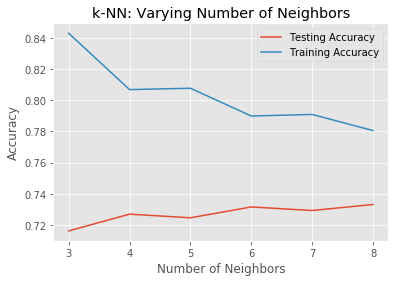

In [41]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
###########################################################################################################

### **14. Declare & Train Decision Tree model**

In [42]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.748.
[Decision Tree -- gini] accuracy_score: 0.749.


In [ ]:
###########################################################################################################

### **15. Declare & Train Random Forest model**

In [43]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.834.


In [ ]:
###########################################################################################################

### **16. Identify Important Features in Random Forest model**

No handles with labels found to put in legend.


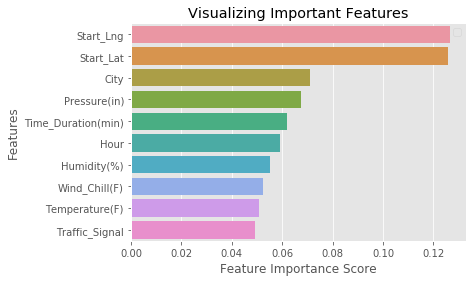

In [44]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
###########################################################################################################

In [45]:
# List top k important features
k=20
feature_imp.sort_values(ascending=False)[:k]

Start_Lng             0.126503
Start_Lat             0.125967
City                  0.070887
Pressure(in)          0.067498
Time_Duration(min)    0.062055
Hour                  0.059075
Humidity(%)           0.055030
Wind_Chill(F)         0.052331
Temperature(F)        0.050710
Traffic_Signal        0.049220
TMC                   0.045940
Weekday               0.045558
Wind_Speed(mph)       0.042264
Weather_Condition     0.026121
Visibility(mi)        0.017530
State                 0.016298
State                 0.015960
State                 0.015829
State                 0.015474
Crossing              0.013474
dtype: float64

In [ ]:
###########################################################################################################

In [46]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

City
Start_Lat
Start_Lng
Traffic_Signal
TMC
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Wind_Speed(mph)
Hour
Weekday
Time_Duration(min)


In [ ]:
###########################################################################################################

### **17. Train Random Forest Model for only Important Features**

In [47]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.834.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.827.


In [ ]:
###########################################################################################################

### **18. Compare accurancy scores for different models**

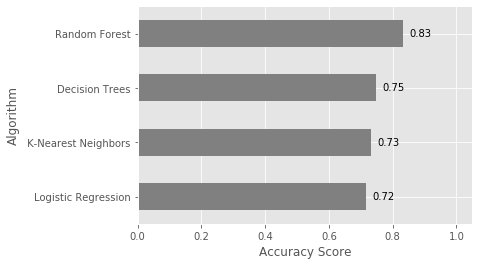

In [49]:
# Make a plot of the accuracy scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.05)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
# plt.title('[{}] Which algorithm is better predicting severity?'.format(state))

plt.show()

In [ ]:
###########################################################################################################

### **19. Prediction using Test dataset**

In [50]:
clf_important.predict([[6357, 38.441975, -88.953049, 0.0, 201.0, 57.0, 19.3, 100.0, 29.55,
       12.0, 7.0, 2, 1.0]])

array([3], dtype=int64)

In [51]:
clf_important.predict([[5748.0, 35.282955, -109.211617, 1.0, 201.0, 34.0, 31.0, 90.0, 29.62,
       9.0, 4.0, 2, 175.0]])

array([2], dtype=int64)

In [52]:
clf_important.predict([[5745.0, 35.191669, -114.06745900000001, 0.0, 201.0, 75.0, 75.0,
       9.0, 26.59, 13.0, 16.0, 1, 88.0]])

array([4], dtype=int64)

In [53]:
pwd

'D:\\GeorgiaTech\\ClassWork\\Project3\\US_Accidents_Dec19'

In [ ]:
###########################################################################################################

### **20. Export Random Forest Model in file**

In [54]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle

In [55]:
pickle.dump(clf_important,  open("random_forest_classifier_important", 'wb'))

### **21. Load Random Forest Model from file**

In [56]:
random_forest_classifier_important = pickle.load(open("random_forest_classifier_important", 'rb'))

### **22. Make the predictions again**

In [57]:
random_forest_classifier_important.predict([[5745.0, 35.191669, -114.06745900000001, 0.0, 201.0, 75.0, 75.0,
       9.0, 26.59, 13.0, 16.0, 1, 88.0]])

array([4], dtype=int64)

In [58]:
random_forest_classifier_important.predict([[5748.0, 35.282955, -109.211617, 1.0, 201.0, 34.0, 31.0, 90.0, 29.62,
       9.0, 4.0, 2, 175.0]])

array([2], dtype=int64)